pip install optuna (in terminal)

In [36]:
import optuna
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


Define the objective function 

In [2]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return np.sin(x**2) + 3*y
    
def objective(trial):
    noise = 5*(np.random.rand(1) - 0.5)
    x = trial.suggest_float("x", xmin, xmax)
    y = trial.suggest_float("y", ymin, ymax)
    return -(func(x,y) + noise) #Optuna finds the minimum so add a negative to the function to find the maximum 

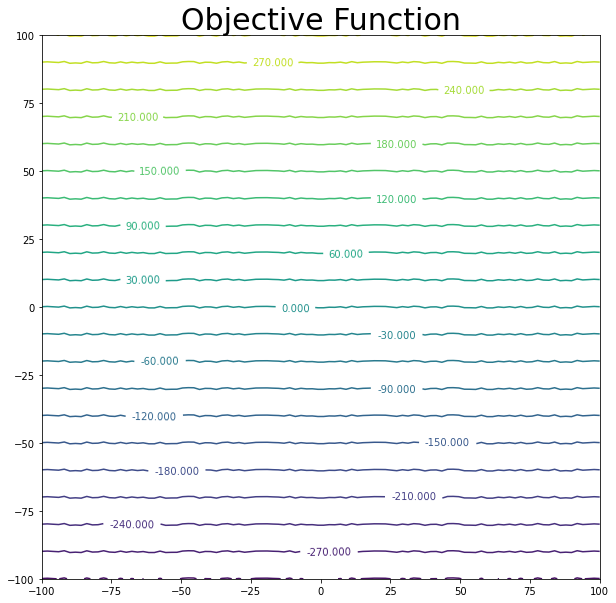

In [3]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()
        

### Pick a type of sampler 
Tree-structured Parzen Estimator algorithm implemented in optuna.samplers.TPESampler

CMA-ES based algorithm implemented in optuna.samplers.CmaEsSampler

Grid Search implemented in optuna.samplers.GridSampler

Random Search implemented in optuna.samplers.RandomSampler

In [4]:
study = optuna.create_study()
study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=10)

[I 2021-02-28 15:55:53,900] A new study created in memory with name: no-name-93d18547-7983-4fa2-8c87-09119b955b9e
[I 2021-02-28 15:55:53,907] A new study created in memory with name: no-name-9093001d-744e-4c0a-a3ff-5781fb0069f9
[I 2021-02-28 15:55:53,916] Trial 0 finished with value: 295.872363672371 and parameters: {'x': 51.9812863725723, 'y': -98.42883897287089}. Best is trial 0 with value: 295.872363672371.
[I 2021-02-28 15:55:53,955] Trial 1 finished with value: -49.1953053528754 and parameters: {'x': -46.380258845535046, 'y': 15.318267617096975}. Best is trial 1 with value: -49.1953053528754.
[I 2021-02-28 15:55:53,962] Trial 2 finished with value: -66.7968242142374 and parameters: {'x': -15.632180595931189, 'y': 21.74321483143582}. Best is trial 2 with value: -66.7968242142374.
[I 2021-02-28 15:55:53,978] Trial 3 finished with value: 31.58964230634031 and parameters: {'x': 18.33977607969821, 'y': -10.055200351001439}. Best is trial 2 with value: -66.7968242142374.
[I 2021-02-28 1

### Extract the Best Parameters

In [5]:
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: -41.89233241286203, f: 204.93121170183994
Found y: 68.00185030350326, f: 204.93121170183994


In [6]:
print(f"Sampler is {study.sampler.__class__.__name__}")

Sampler is CmaEsSampler


## Monte Carlo Simulation to Test the Performance of the Optimizer

This will measure the performance of the optimizer on a specific function. The number of trials and the number of iterations can be varied. 

In [10]:
x = []
y = []
z = []
for i in range(50):    
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
    study.optimize(objective, n_trials=10)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y))
    if i%10 == 0:
        print(i)
    else:
        pass
    

[I 2021-02-28 15:59:04,319] A new study created in memory with name: no-name-104a2b58-f870-4249-b4da-84c18f0816f9
[I 2021-02-28 15:59:04,323] A new study created in memory with name: no-name-d1b68603-757c-4203-9272-8bb7d827e190
[I 2021-02-28 15:59:04,326] Trial 0 finished with value: -272.85081798256914 and parameters: {'x': 8.686517534553502, 'y': 91.25219575174782}. Best is trial 0 with value: -272.85081798256914.
[I 2021-02-28 15:59:04,332] Trial 1 finished with value: 56.78486396614102 and parameters: {'x': 76.20929378075928, 'y': -19.61262085339675}. Best is trial 0 with value: -272.85081798256914.
[I 2021-02-28 15:59:04,336] Trial 2 finished with value: -198.73874651338284 and parameters: {'x': 13.94108617367091, 'y': 66.76623951388811}. Best is trial 0 with value: -272.85081798256914.
[I 2021-02-28 15:59:04,341] Trial 3 finished with value: -62.570180045727874 and parameters: {'x': 9.711481844569022, 'y': 21.273521983014135}. Best is trial 0 with value: -272.85081798256914.
[I 2

[I 2021-02-28 15:59:04,546] Trial 6 finished with value: 68.23416580899 and parameters: {'x': -17.222819359422942, 'y': -23.893249657223663}. Best is trial 4 with value: -87.20124119624994.
[I 2021-02-28 15:59:04,553] Trial 7 finished with value: 144.26166690063042 and parameters: {'x': 35.67694299875021, 'y': -47.97083166675211}. Best is trial 4 with value: -87.20124119624994.
[I 2021-02-28 15:59:04,556] Trial 8 finished with value: -97.59137395379648 and parameters: {'x': 32.891482306271314, 'y': 32.0392888772422}. Best is trial 8 with value: -97.59137395379648.
[I 2021-02-28 15:59:04,558] Trial 9 finished with value: 185.48725962025532 and parameters: {'x': 86.2021133776745, 'y': -61.17681309807745}. Best is trial 8 with value: -97.59137395379648.
[I 2021-02-28 15:59:04,561] A new study created in memory with name: no-name-6fecb088-bd1b-4bb8-960e-879de8e5cf9c
[I 2021-02-28 15:59:04,565] A new study created in memory with name: no-name-9921df9f-01bf-4252-86e4-ff7d8be3be64


Found x: 8.686517534553502, (x - 2)^2: 273.81391899309665
Found y: 91.25219575174782, (x - 2)^2: 273.81391899309665
0
Found x: 95.99005879950346, (x - 2)^2: 240.32040338668034
Found y: 80.04062223763972, (x - 2)^2: 240.32040338668034
Found x: 56.63397131069857, (x - 2)^2: 238.1990436914427
Found y: 79.34677495520361, (x - 2)^2: 238.1990436914427
Found x: 32.891482306271314, (x - 2)^2: 97.02722348140607
Found y: 32.0392888772422, (x - 2)^2: 97.02722348140607


[I 2021-02-28 15:59:04,570] Trial 0 finished with value: -114.82674605948458 and parameters: {'x': 27.692479637175452, 'y': 37.56445282702089}. Best is trial 0 with value: -114.82674605948458.
[I 2021-02-28 15:59:04,577] Trial 1 finished with value: -137.07373173123224 and parameters: {'x': 97.93698708790336, 'y': 46.04680860837132}. Best is trial 1 with value: -137.07373173123224.
[I 2021-02-28 15:59:04,579] Trial 2 finished with value: -6.8957343828026865 and parameters: {'x': 26.38715273945374, 'y': 2.420555417596489}. Best is trial 1 with value: -137.07373173123224.
[I 2021-02-28 15:59:04,597] Trial 3 finished with value: -271.9423789963874 and parameters: {'x': 6.213260888106234, 'y': 90.61596235560981}. Best is trial 3 with value: -271.9423789963874.
[I 2021-02-28 15:59:04,602] Trial 4 finished with value: 165.64075729038268 and parameters: {'x': -84.10046067396826, 'y': -54.66863824258434}. Best is trial 3 with value: -271.9423789963874.
[I 2021-02-28 15:59:04,604] Trial 5 finis

[I 2021-02-28 15:59:04,789] Trial 7 finished with value: -264.08764201583557 and parameters: {'x': 43.7881100951094, 'y': 87.22339650376065}. Best is trial 7 with value: -264.08764201583557.
[I 2021-02-28 15:59:04,794] Trial 8 finished with value: -286.07498603856936 and parameters: {'x': 46.7200867377999, 'y': 95.73163915056872}. Best is trial 8 with value: -286.07498603856936.
[I 2021-02-28 15:59:04,799] Trial 9 finished with value: 80.57182609648274 and parameters: {'x': 91.58990936510003, 'y': -26.786138584854925}. Best is trial 8 with value: -286.07498603856936.
[I 2021-02-28 15:59:04,803] A new study created in memory with name: no-name-c61ebdb0-90bd-48de-b701-ac99fc461c6c
[I 2021-02-28 15:59:04,809] A new study created in memory with name: no-name-54b9cc6d-716e-47db-8e01-4c84c1cbb75d
[I 2021-02-28 15:59:04,811] Trial 0 finished with value: 275.97065179860044 and parameters: {'x': 73.39030269832222, 'y': -91.82414976162667}. Best is trial 0 with value: 275.97065179860044.
[I 2021

Found x: 6.213260888106234, (x - 2)^2: 272.6346203616754
Found y: 90.61596235560981, (x - 2)^2: 272.6346203616754
Found x: 62.91547547868129, (x - 2)^2: 273.7006042883485
Found y: 91.25009088623267, (x - 2)^2: 273.7006042883485
Found x: -15.522483509624905, (x - 2)^2: 238.5916964066294
Found y: 79.25843393250068, (x - 2)^2: 238.5916964066294
Found x: 46.7200867377999, (x - 2)^2: 287.79242522986664
Found y: 95.73163915056872, (x - 2)^2: 287.79242522986664


[I 2021-02-28 15:59:04,836] Trial 3 finished with value: 242.45388262496934 and parameters: {'x': 63.176050109994236, 'y': -81.51116776284273}. Best is trial 2 with value: -216.53307668884455.
[I 2021-02-28 15:59:04,842] Trial 4 finished with value: -291.44764756236845 and parameters: {'x': 39.73314045878635, 'y': 97.55046256085683}. Best is trial 4 with value: -291.44764756236845.
[I 2021-02-28 15:59:04,848] Trial 5 finished with value: 119.35518395005957 and parameters: {'x': -90.69363510553981, 'y': -40.65015677671704}. Best is trial 4 with value: -291.44764756236845.
[I 2021-02-28 15:59:04,853] Trial 6 finished with value: 180.9563905878399 and parameters: {'x': 69.82515939021604, 'y': -59.820746100559006}. Best is trial 4 with value: -291.44764756236845.
[I 2021-02-28 15:59:04,857] Trial 7 finished with value: -54.66808389257418 and parameters: {'x': 80.33973646145108, 'y': 17.69804570709877}. Best is trial 4 with value: -291.44764756236845.
[I 2021-02-28 15:59:04,860] Trial 8 fin

[I 2021-02-28 15:59:05,061] A new study created in memory with name: no-name-491c3b7a-b6b1-42e6-b1a2-55763d42c76d
[I 2021-02-28 15:59:05,065] A new study created in memory with name: no-name-972849c8-dfa5-4526-9bb7-b2134eb73770
[I 2021-02-28 15:59:05,070] Trial 0 finished with value: -82.03824918703326 and parameters: {'x': 2.3947881941288784, 'y': 27.36810186524255}. Best is trial 0 with value: -82.03824918703326.
[I 2021-02-28 15:59:05,074] Trial 1 finished with value: -157.73705239487202 and parameters: {'x': -16.841252175053057, 'y': 52.74675876915185}. Best is trial 1 with value: -157.73705239487202.


Found x: 39.73314045878635, (x - 2)^2: 293.6487865560817
Found y: 97.55046256085683, (x - 2)^2: 293.6487865560817
Found x: -76.8725169540088, (x - 2)^2: 257.8707730287553
Found y: 85.97294531562869, (x - 2)^2: 257.8707730287553
Found x: 50.67766376847044, (x - 2)^2: 262.4818814588803
Found y: 87.82717776068336, (x - 2)^2: 262.4818814588803
10
Found x: 78.54480903310935, (x - 2)^2: 204.96553630582517
Found y: 68.56118362789383, (x - 2)^2: 204.96553630582517


[I 2021-02-28 15:59:05,080] Trial 2 finished with value: -56.472849621257495 and parameters: {'x': -9.708540645403701, 'y': 19.15152927289492}. Best is trial 1 with value: -157.73705239487202.
[I 2021-02-28 15:59:05,083] Trial 3 finished with value: -261.6047201940287 and parameters: {'x': -89.99380243352799, 'y': 86.8330810705387}. Best is trial 3 with value: -261.6047201940287.
[I 2021-02-28 15:59:05,088] Trial 4 finished with value: -170.31357698583514 and parameters: {'x': 97.64050203865895, 'y': 55.99793069449896}. Best is trial 3 with value: -261.6047201940287.
[I 2021-02-28 15:59:05,093] Trial 5 finished with value: -282.9503873092862 and parameters: {'x': 17.627445965813024, 'y': 93.42693108179745}. Best is trial 5 with value: -282.9503873092862.
[I 2021-02-28 15:59:05,100] Trial 6 finished with value: -137.39675938830865 and parameters: {'x': -45.32329228333543, 'y': 45.211037625317516}. Best is trial 5 with value: -282.9503873092862.
[I 2021-02-28 15:59:05,105] Trial 7 finish

[I 2021-02-28 15:59:05,312] Trial 9 finished with value: -192.30014400225352 and parameters: {'x': -79.34438114498047, 'y': 63.361833946825215}. Best is trial 0 with value: -205.24154494755905.


Found x: 17.627445965813024, (x - 2)^2: 280.56753250202956
Found y: 93.42693108179745, (x - 2)^2: 280.56753250202956
Found x: -53.330835355777275, (x - 2)^2: 289.04682123609496
Found y: 96.63584129888196, (x - 2)^2: 289.04682123609496
Found x: -68.32880644332184, (x - 2)^2: 286.56644893194755
Found y: 95.38650142410091, (x - 2)^2: 286.56644893194755


[I 2021-02-28 15:59:05,322] A new study created in memory with name: no-name-f10acfa2-4057-4b5f-a555-eba9cf5c336a
[I 2021-02-28 15:59:05,327] A new study created in memory with name: no-name-3258c95e-c508-42f5-a8d0-38ceec65b093
[I 2021-02-28 15:59:05,330] Trial 0 finished with value: 256.53916311844097 and parameters: {'x': -82.44888171416373, 'y': -85.83250097251045}. Best is trial 0 with value: 256.53916311844097.
[I 2021-02-28 15:59:05,333] Trial 1 finished with value: -160.84384812534992 and parameters: {'x': 27.715970859396194, 'y': 53.59229653995746}. Best is trial 1 with value: -160.84384812534992.
[I 2021-02-28 15:59:05,337] Trial 2 finished with value: 275.7919832001911 and parameters: {'x': 76.0723851024527, 'y': -91.67970799652112}. Best is trial 1 with value: -160.84384812534992.
[I 2021-02-28 15:59:05,344] Trial 3 finished with value: 12.868100958985707 and parameters: {'x': -84.83170650925274, 'y': -4.604630707973186}. Best is trial 1 with value: -160.84384812534992.
[I 2

Found x: 72.18764166511318, (x - 2)^2: 205.53866557699126
Found y: 68.26321045859694, (x - 2)^2: 205.53866557699126
Found x: -72.18328049556528, (x - 2)^2: 196.7079530375695
Found y: 65.23747372552577, (x - 2)^2: 196.7079530375695
Found x: 60.31665510721734, (x - 2)^2: 208.75344844859154
Found y: 69.539754652206, (x - 2)^2: 208.75344844859154
Found x: -37.42611988556448, (x - 2)^2: 262.98737565117915
Found y: 87.80319277528397, (x - 2)^2: 262.98737565117915


[I 2021-02-28 15:59:05,527] Trial 5 finished with value: -38.395834363703024 and parameters: {'x': -32.523460957961575, 'y': 12.866560354472796}. Best is trial 1 with value: -269.83215927953853.
[I 2021-02-28 15:59:05,530] Trial 6 finished with value: -161.4229398814881 and parameters: {'x': -25.990914444512498, 'y': 54.09806998080751}. Best is trial 1 with value: -269.83215927953853.
[I 2021-02-28 15:59:05,533] Trial 7 finished with value: 151.77129029012082 and parameters: {'x': 72.15565748404552, 'y': -50.237982944989604}. Best is trial 1 with value: -269.83215927953853.
[I 2021-02-28 15:59:05,536] Trial 8 finished with value: 153.86689221262918 and parameters: {'x': 83.19402632343397, 'y': -50.722867447668584}. Best is trial 1 with value: -269.83215927953853.
[I 2021-02-28 15:59:05,539] Trial 9 finished with value: 111.43945409908135 and parameters: {'x': 23.451266427279265, 'y': -36.57849806359761}. Best is trial 1 with value: -269.83215927953853.
[I 2021-02-28 15:59:05,544] A new

Found x: -19.32355070691061, (x - 2)^2: 272.08052231023623
Found y: 90.54854478235958, (x - 2)^2: 272.08052231023623
Found x: 23.13036775417119, (x - 2)^2: 286.8212463897942
Found y: 95.33727593718669, (x - 2)^2: 286.8212463897942
20
Found x: -51.10747361305452, (x - 2)^2: 252.99382554208856
Found y: 84.65336809363649, (x - 2)^2: 252.99382554208856
Found x: -40.37289754205895, (x - 2)^2: 291.7141083471115
Found y: 97.0736457365166, (x - 2)^2: 291.7141083471115


[I 2021-02-28 15:59:05,749] A new study created in memory with name: no-name-69b21544-fc0c-4b09-9f5a-48f54a33f6ca
[I 2021-02-28 15:59:05,763] Trial 0 finished with value: 209.43013419634738 and parameters: {'x': -79.74015026086434, 'y': -70.52602872194085}. Best is trial 0 with value: 209.43013419634738.
[I 2021-02-28 15:59:05,767] Trial 1 finished with value: 173.3962051693974 and parameters: {'x': 99.710007612201, 'y': -57.81057116023565}. Best is trial 1 with value: 173.3962051693974.
[I 2021-02-28 15:59:05,770] Trial 2 finished with value: -113.95958059479105 and parameters: {'x': 8.177718094427718, 'y': 38.070880822417394}. Best is trial 2 with value: -113.95958059479105.
[I 2021-02-28 15:59:05,774] Trial 3 finished with value: 296.43438620348036 and parameters: {'x': -83.77405418379762, 'y': -98.68159139795931}. Best is trial 2 with value: -113.95958059479105.
[I 2021-02-28 15:59:05,782] Trial 4 finished with value: -186.67069792028576 and parameters: {'x': -32.93535832884196, 'y

[I 2021-02-28 15:59:05,974] Trial 6 finished with value: 162.84167387145294 and parameters: {'x': 60.34840918138556, 'y': -54.08782546202946}. Best is trial 3 with value: -284.26902810665206.
[I 2021-02-28 15:59:05,977] Trial 7 finished with value: 148.26162840046027 and parameters: {'x': 5.597437938472808, 'y': -50.00900631065501}. Best is trial 3 with value: -284.26902810665206.
[I 2021-02-28 15:59:05,983] Trial 8 finished with value: -233.66311206773753 and parameters: {'x': -95.62134160727618, 'y': 77.72204397557255}. Best is trial 3 with value: -284.26902810665206.
[I 2021-02-28 15:59:05,987] Trial 9 finished with value: -186.14245653424373 and parameters: {'x': 87.24016353389888, 'y': 61.062443721510476}. Best is trial 3 with value: -284.26902810665206.
[I 2021-02-28 15:59:05,989] A new study created in memory with name: no-name-c613d78f-2705-408a-b459-de45ae843372
[I 2021-02-28 15:59:05,994] A new study created in memory with name: no-name-e7bf2447-c794-45a1-8328-4b34556767df
[I

Found x: -74.85192358230336, (x - 2)^2: 272.7990154857271
Found y: 91.25830185958841, (x - 2)^2: 272.7990154857271
Found x: 28.61007434261765, (x - 2)^2: 288.52670921694477
Found y: 95.84605284122901, (x - 2)^2: 288.52670921694477
Found x: -18.365341005430437, (x - 2)^2: 251.06906374998337
Found y: 83.99191328038799, (x - 2)^2: 251.06906374998337
Found x: 59.10147316811364, (x - 2)^2: 285.5047242567587
Found y: 95.31828154774308, (x - 2)^2: 285.5047242567587


[I 2021-02-28 15:59:06,015] Trial 2 finished with value: -185.33003985312155 and parameters: {'x': -38.762600552054295, 'y': 61.50484372293934}. Best is trial 0 with value: -295.16373924776826.
[I 2021-02-28 15:59:06,025] Trial 3 finished with value: 186.38399071764104 and parameters: {'x': -18.581161541373078, 'y': -62.71085788507571}. Best is trial 0 with value: -295.16373924776826.
[I 2021-02-28 15:59:06,030] Trial 4 finished with value: -144.33308445816192 and parameters: {'x': 41.84132142707108, 'y': 48.50369844666784}. Best is trial 0 with value: -295.16373924776826.
[I 2021-02-28 15:59:06,034] Trial 5 finished with value: -60.266126101674686 and parameters: {'x': 29.447105720869104, 'y': 20.90365529520801}. Best is trial 0 with value: -295.16373924776826.
[I 2021-02-28 15:59:06,038] Trial 6 finished with value: 174.31871750846554 and parameters: {'x': -56.27687099570058, 'y': -57.98309050937338}. Best is trial 0 with value: -295.16373924776826.
[I 2021-02-28 15:59:06,043] Trial 

[I 2021-02-28 15:59:06,251] Trial 9 finished with value: -289.3361788304863 and parameters: {'x': -3.265929978890796, 'y': 96.11273350010066}. Best is trial 9 with value: -289.3361788304863.
[I 2021-02-28 15:59:06,255] A new study created in memory with name: no-name-7e62ab78-fa15-4aa4-a789-f20e380c1d6d


Found x: 55.270272241771465, (x - 2)^2: 296.89469264325913
Found y: 98.65734270065235, (x - 2)^2: 296.89469264325913
Found x: -99.14975005451114, (x - 2)^2: 269.55808099669736
Found y: 90.04894669613893, (x - 2)^2: 269.55808099669736
Found x: 83.32641490398532, (x - 2)^2: 143.92366954738907
Found y: 47.85350346063473, (x - 2)^2: 143.92366954738907
Found x: -3.265929978890796, (x - 2)^2: 287.39192368782295
Found y: 96.11273350010066, (x - 2)^2: 287.39192368782295
30


[I 2021-02-28 15:59:06,261] A new study created in memory with name: no-name-a3515752-cfa2-4585-8c23-617412f5e772
[I 2021-02-28 15:59:06,265] Trial 0 finished with value: 267.7929617187125 and parameters: {'x': -89.23908913119382, 'y': -89.1552330731359}. Best is trial 0 with value: 267.7929617187125.
[I 2021-02-28 15:59:06,269] Trial 1 finished with value: 72.10857818594762 and parameters: {'x': 56.3599236634187, 'y': -24.674282178940658}. Best is trial 1 with value: 72.10857818594762.
[I 2021-02-28 15:59:06,272] Trial 2 finished with value: 47.61634728149258 and parameters: {'x': 19.699467035124812, 'y': -16.11404322325292}. Best is trial 2 with value: 47.61634728149258.
[I 2021-02-28 15:59:06,282] Trial 3 finished with value: -124.36003024962244 and parameters: {'x': 63.64405916467521, 'y': 41.56199130282985}. Best is trial 3 with value: -124.36003024962244.
[I 2021-02-28 15:59:06,287] Trial 4 finished with value: 198.6104904712742 and parameters: {'x': -10.498607940829217, 'y': -66

[I 2021-02-28 15:59:06,480] Trial 6 finished with value: 252.80051790709544 and parameters: {'x': -50.462415414786996, 'y': -85.31058309495012}. Best is trial 1 with value: -267.05309722421123.
[I 2021-02-28 15:59:06,484] Trial 7 finished with value: 151.90878685793368 and parameters: {'x': -46.8467552328546, 'y': -50.487359514833344}. Best is trial 1 with value: -267.05309722421123.
[I 2021-02-28 15:59:06,486] Trial 8 finished with value: 231.7977917967142 and parameters: {'x': 4.469788587650854, 'y': -78.2403011063301}. Best is trial 1 with value: -267.05309722421123.
[I 2021-02-28 15:59:06,489] Trial 9 finished with value: -228.7131391260298 and parameters: {'x': 62.7866563875848, 'y': 76.04163763308662}. Best is trial 1 with value: -267.05309722421123.
[I 2021-02-28 15:59:06,496] A new study created in memory with name: no-name-e5aabb44-ea5f-4fbf-9d6f-8222aea47de1
[I 2021-02-28 15:59:06,502] A new study created in memory with name: no-name-76bbd95a-8853-4ad2-b3dd-b0d8def3b3ba
[I 20

Found x: -53.208157261570044, (x - 2)^2: 267.84649636897325
Found y: 89.45154386778611, (x - 2)^2: 267.84649636897325
Found x: 25.41948489266359, (x - 2)^2: 279.0993627222474
Found y: 93.31678545657968, (x - 2)^2: 279.0993627222474
Found x: 87.21927046059258, (x - 2)^2: 263.67461105178023
Found y: 88.2203173121888, (x - 2)^2: 263.67461105178023
Found x: 22.234075995077234, (x - 2)^2: 268.5254171232812
Found y: 89.80909714315081, (x - 2)^2: 268.5254171232812


[I 2021-02-28 15:59:06,522] Trial 2 finished with value: 35.410966840643034 and parameters: {'x': 69.46135874718664, 'y': -11.763678571745558}. Best is trial 1 with value: -263.02030833451937.
[I 2021-02-28 15:59:06,525] Trial 3 finished with value: 288.7091543644314 and parameters: {'x': 1.705535607074225, 'y': -96.30088475779854}. Best is trial 1 with value: -263.02030833451937.
[I 2021-02-28 15:59:06,528] Trial 4 finished with value: 294.6074153567594 and parameters: {'x': -23.481254655547218, 'y': -98.63226572566734}. Best is trial 1 with value: -263.02030833451937.
[I 2021-02-28 15:59:06,534] Trial 5 finished with value: -185.20617682265694 and parameters: {'x': -29.101978701595726, 'y': 62.40086278716274}. Best is trial 1 with value: -263.02030833451937.
[I 2021-02-28 15:59:06,536] Trial 6 finished with value: -284.98710635245567 and parameters: {'x': -73.55623396747666, 'y': 94.34680171997923}. Best is trial 6 with value: -284.98710635245567.
[I 2021-02-28 15:59:06,541] Trial 7 

Found x: -73.55623396747666, (x - 2)^2: 283.6823300230438
Found y: 94.34680171997923, (x - 2)^2: 283.6823300230438
Found x: -16.61878134826111, (x - 2)^2: 190.20519396008916
Found y: 63.49265111698557, (x - 2)^2: 190.20519396008916
Found x: -29.27271598572571, (x - 2)^2: 141.80631155211267
Found y: 47.038431954089276, (x - 2)^2: 141.80631155211267


[I 2021-02-28 15:59:06,758] Trial 8 finished with value: 103.44409923160836 and parameters: {'x': -3.2799451415883425, 'y': -33.366264325226695}. Best is trial 5 with value: -183.94365408727322.
[I 2021-02-28 15:59:06,761] Trial 9 finished with value: 9.906544783672366 and parameters: {'x': 40.58745471717077, 'y': -3.0295925942685784}. Best is trial 5 with value: -183.94365408727322.
[I 2021-02-28 15:59:06,771] A new study created in memory with name: no-name-fe12f1b9-eec6-460d-91fd-11a3ff0e3336
[I 2021-02-28 15:59:06,775] A new study created in memory with name: no-name-5ee2fdd8-dfb1-447f-93ca-3626ca963e77
[I 2021-02-28 15:59:06,781] Trial 0 finished with value: -161.49964409395668 and parameters: {'x': -78.53054880740855, 'y': 53.74743591867838}. Best is trial 0 with value: -161.49964409395668.
[I 2021-02-28 15:59:06,789] Trial 1 finished with value: 160.67161277973344 and parameters: {'x': 54.019708404249286, 'y': -53.25643559255697}. Best is trial 0 with value: -161.49964409395668.

Found x: -39.67407999283592, (x - 2)^2: 183.33822910551615
Found y: 61.14426381163884, (x - 2)^2: 183.33822910551615
Found x: -91.6641137183897, (x - 2)^2: 272.9135971116068
Found y: 90.64027048301918, (x - 2)^2: 272.9135971116068
Found x: -54.04680722671253, (x - 2)^2: 246.45842862152875
Found y: 82.34751647526366, (x - 2)^2: 246.45842862152875
40
Found x: -0.12820480188374006, (x - 2)^2: 296.7585429958641
Found y: 98.91403575490031, (x - 2)^2: 296.7585429958641


[I 2021-02-28 15:59:06,970] Trial 0 finished with value: -252.92062424748585 and parameters: {'x': -49.11069438845552, 'y': 84.37880180515609}. Best is trial 0 with value: -252.92062424748585.
[I 2021-02-28 15:59:06,980] Trial 1 finished with value: 189.9031954286302 and parameters: {'x': 5.549020513098753, 'y': -62.68110646013216}. Best is trial 0 with value: -252.92062424748585.
[I 2021-02-28 15:59:06,983] Trial 2 finished with value: -222.86609770257346 and parameters: {'x': 69.54714130208299, 'y': 75.05622502491539}. Best is trial 0 with value: -252.92062424748585.
[I 2021-02-28 15:59:06,987] Trial 3 finished with value: 219.91647261434537 and parameters: {'x': -57.49978124060904, 'y': -73.456627202623}. Best is trial 0 with value: -252.92062424748585.
[I 2021-02-28 15:59:06,996] Trial 4 finished with value: 74.06122059611286 and parameters: {'x': 85.86783150441104, 'y': -24.8180287774302}. Best is trial 0 with value: -252.92062424748585.
[I 2021-02-28 15:59:07,000] Trial 5 finishe

[I 2021-02-28 15:59:07,221] Trial 7 finished with value: 21.009888445445345 and parameters: {'x': -49.25336020231794, 'y': -7.39322703540644}. Best is trial 4 with value: -270.3440066457576.
[I 2021-02-28 15:59:07,224] Trial 8 finished with value: -132.84463827762272 and parameters: {'x': -24.658049981243295, 'y': 44.72376625058064}. Best is trial 4 with value: -270.3440066457576.
[I 2021-02-28 15:59:07,227] Trial 9 finished with value: 84.16669616704226 and parameters: {'x': -84.42267540754133, 'y': -28.83977580245201}. Best is trial 4 with value: -270.3440066457576.


Found x: -49.11069438845552, (x - 2)^2: 252.36385084182436
Found y: 84.37880180515609, (x - 2)^2: 252.36385084182436
Found x: -99.53699181234322, (x - 2)^2: 257.330775732734
Found y: 86.05197951793033, (x - 2)^2: 257.330775732734
Found x: 13.756233670974211, (x - 2)^2: 298.39854314230564
Found y: 99.24181116838716, (x - 2)^2: 298.39854314230564
Found x: 27.480344903389863, (x - 2)^2: 270.27678133043116
Found y: 89.78316230376717, (x - 2)^2: 270.27678133043116


[I 2021-02-28 15:59:07,231] A new study created in memory with name: no-name-9b902ab0-f2fb-4567-afa9-b939cc5a758a
[I 2021-02-28 15:59:07,239] A new study created in memory with name: no-name-9fd477e1-7f9b-491a-beec-a502f7812881
[I 2021-02-28 15:59:07,243] Trial 0 finished with value: 93.72690704163855 and parameters: {'x': -98.2845752136275, 'y': -30.76599899767372}. Best is trial 0 with value: 93.72690704163855.
[I 2021-02-28 15:59:07,247] Trial 1 finished with value: 150.74889634128718 and parameters: {'x': 3.2232776703646806, 'y': -49.63894986017765}. Best is trial 0 with value: 93.72690704163855.
[I 2021-02-28 15:59:07,250] Trial 2 finished with value: -78.06520968185714 and parameters: {'x': -74.17779542887345, 'y': 25.60802483263558}. Best is trial 2 with value: -78.06520968185714.
[I 2021-02-28 15:59:07,255] Trial 3 finished with value: -162.43648662829818 and parameters: {'x': -9.13126743850836, 'y': 54.398304320753965}. Best is trial 3 with value: -162.43648662829818.
[I 2021-

[I 2021-02-28 15:59:07,492] Trial 5 finished with value: 77.58635544619494 and parameters: {'x': 28.31853072492879, 'y': -24.841861346602073}. Best is trial 4 with value: -286.44817648388374.


Found x: 0.7787097818566053, (x - 2)^2: 281.04365882087785
Found y: 93.49125163346329, (x - 2)^2: 281.04365882087785
Found x: 65.49202641184891, (x - 2)^2: 215.88303439547147
Found y: 72.22852694638433, (x - 2)^2: 215.88303439547147
Found x: -3.3224070779409374, (x - 2)^2: 196.21668410037825
Found y: 65.73858923316723, (x - 2)^2: 196.21668410037825


[I 2021-02-28 15:59:07,499] Trial 6 finished with value: -111.45382826141115 and parameters: {'x': -73.84405407470207, 'y': 37.33046004226591}. Best is trial 4 with value: -286.44817648388374.
[I 2021-02-28 15:59:07,502] Trial 7 finished with value: -110.14663284875377 and parameters: {'x': 25.453443481901374, 'y': 36.81346302787097}. Best is trial 4 with value: -286.44817648388374.
[I 2021-02-28 15:59:07,507] Trial 8 finished with value: 56.73236493199853 and parameters: {'x': 56.48532548543545, 'y': -17.941095276110545}. Best is trial 4 with value: -286.44817648388374.
[I 2021-02-28 15:59:07,519] Trial 9 finished with value: 255.31712960217362 and parameters: {'x': -75.60655752956265, 'y': -84.78350824770354}. Best is trial 4 with value: -286.44817648388374.


Found x: -39.74350961599096, (x - 2)^2: 288.1859146936062
Found y: 95.85379006527708, (x - 2)^2: 288.1859146936062


In [11]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

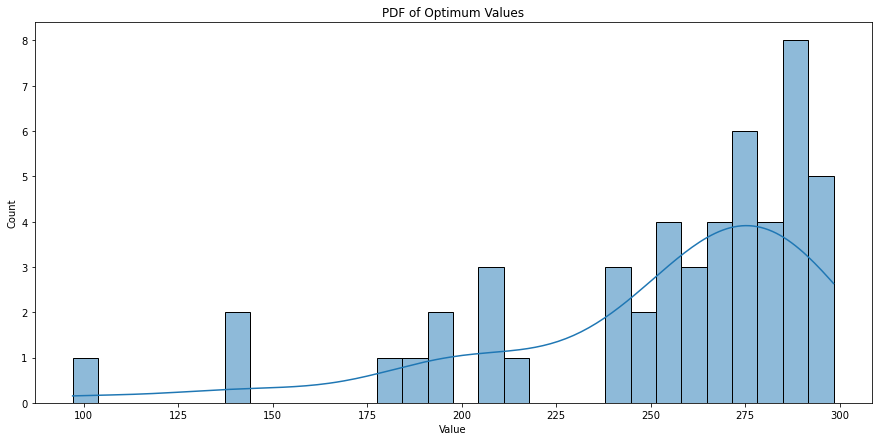

In [12]:
fig, ax = plt.subplots(figsize=(15,7))    
p = sns.histplot(z, bins = 30, kde=True, legend = True,)
ax.set_title('PDF of Optimum Values')
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()

The mean value divided by the max value will tell us how good the algorithm performed

In [20]:
np.mean(z)/np.max(z)

0.8461502775112396

# Data Generator

In [80]:
accuracy = []
mean_time = []
for n in range(10): #Determines how many datapoints to generate 
    x = []
    y = []
    z = []
    itr_time = []
    for i in range(50): #How many iterations per datapoint 
        start = time.time()
        study = optuna.create_study()
        study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
        study.optimize(objective, n_trials=10)
        best_params = study.best_params
        found_x = best_params["x"]
        found_y = best_params["y"]
        print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
        print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
        x.append(found_x)
        y.append(found_y)
        z.append(func(found_x, found_y))
        end = time.time()
        timetaken = end - start
        itr_time.append(timetaken)
    mean_time.append(np.mean(itr_time))
    acc = np.mean(z)/np.max(z)
    accuracy.append(acc)

[I 2021-02-28 17:32:34,415] A new study created in memory with name: no-name-21961e2b-7a84-48d7-918e-cc0ddc926d37
[I 2021-02-28 17:32:34,425] A new study created in memory with name: no-name-d746636f-f259-4467-975d-0ca751dcc1a3
[I 2021-02-28 17:32:34,430] Trial 0 finished with value: -227.64997152287344 and parameters: {'x': 34.85550316055486, 'y': 75.61286281718992}. Best is trial 0 with value: -227.64997152287344.
[I 2021-02-28 17:32:34,449] Trial 1 finished with value: 50.323839925665645 and parameters: {'x': -7.715319729345401, 'y': -16.06006083779312}. Best is trial 0 with value: -227.64997152287344.
[I 2021-02-28 17:32:34,456] Trial 2 finished with value: 137.16908912623038 and parameters: {'x': 10.530267736892469, 'y': -45.592324618853404}. Best is trial 0 with value: -227.64997152287344.
[I 2021-02-28 17:32:34,464] Trial 3 finished with value: 5.473468263235415 and parameters: {'x': 26.794396548117764, 'y': -2.8742770041309567}. Best is trial 0 with value: -227.64997152287344.


Found x: 34.85550316055486, (x - 2)^2: 227.61582153201823
Found y: 75.61286281718992, (x - 2)^2: 227.61582153201823
Found x: 37.74601662668001, (x - 2)^2: 274.89744611124604
Found y: 91.96540703296361, (x - 2)^2: 274.89744611124604


[I 2021-02-28 17:32:34,739] Trial 7 finished with value: -43.204480949046356 and parameters: {'x': -54.06734170480382, 'y': 14.722898909438037}. Best is trial 3 with value: -210.85254458901932.
[I 2021-02-28 17:32:34,745] Trial 8 finished with value: -69.38050388456585 and parameters: {'x': -35.49583364921375, 'y': 23.919908777069274}. Best is trial 3 with value: -210.85254458901932.
[I 2021-02-28 17:32:34,752] Trial 9 finished with value: -198.07801361276356 and parameters: {'x': -0.09978293263694238, 'y': 65.25267707024732}. Best is trial 3 with value: -210.85254458901932.
[I 2021-02-28 17:32:34,764] A new study created in memory with name: no-name-aba7a4c3-c32d-4422-bb85-b7c304a8d5c5
[I 2021-02-28 17:32:34,773] A new study created in memory with name: no-name-01c6d280-12b0-47ca-a6c5-6158bd91d51b
[I 2021-02-28 17:32:34,776] Trial 0 finished with value: 175.3833592042946 and parameters: {'x': 91.62507699258416, 'y': -58.122498479826824}. Best is trial 0 with value: 175.3833592042946.


Found x: 22.794214534916765, (x - 2)^2: 212.49472152129115
Found y: 71.14384744037744, (x - 2)^2: 212.49472152129115
Found x: 58.7472435294952, (x - 2)^2: 92.5080282189171
Found y: 30.50926057389386, (x - 2)^2: 92.5080282189171
Found x: 48.47940185214517, (x - 2)^2: 154.15818625668524
Found y: 51.27455440847291, (x - 2)^2: 154.15818625668524


[I 2021-02-28 17:32:34,974] Trial 0 finished with value: 53.8750265902258 and parameters: {'x': -8.354609393987317, 'y': -18.605673059502223}. Best is trial 0 with value: 53.8750265902258.
[I 2021-02-28 17:32:34,988] Trial 1 finished with value: -107.39921598738275 and parameters: {'x': 30.289756193206028, 'y': 36.44728703638959}. Best is trial 1 with value: -107.39921598738275.
[I 2021-02-28 17:32:34,996] Trial 2 finished with value: 119.13988248413122 and parameters: {'x': 9.71786141276685, 'y': -39.3416508920138}. Best is trial 1 with value: -107.39921598738275.
[I 2021-02-28 17:32:35,013] Trial 3 finished with value: -166.741092122664 and parameters: {'x': -15.188851648241496, 'y': 55.76419208870678}. Best is trial 3 with value: -166.741092122664.
[I 2021-02-28 17:32:35,029] Trial 4 finished with value: -164.93389102114736 and parameters: {'x': 7.033935339713043, 'y': 55.896274906354236}. Best is trial 3 with value: -166.741092122664.
[I 2021-02-28 17:32:35,041] Trial 5 finished wi

Found x: -15.188851648241496, (x - 2)^2: 166.3136877775212
Found y: 55.76419208870678, (x - 2)^2: 166.3136877775212
Found x: -26.951683661935327, (x - 2)^2: 210.4496436497573
Found y: 70.3608623586616, (x - 2)^2: 210.4496436497573
Found x: 37.57715854828588, (x - 2)^2: 231.87331802662837
Found y: 77.62267091354438, (x - 2)^2: 231.87331802662837


[I 2021-02-28 17:32:35,309] A new study created in memory with name: no-name-e818cea4-3476-47e6-b5ab-ce8fa5d74fec
[I 2021-02-28 17:32:35,316] A new study created in memory with name: no-name-e27bdd79-83da-4409-80bf-53cd7285ba5a
[I 2021-02-28 17:32:35,319] Trial 0 finished with value: -285.98559074752467 and parameters: {'x': 33.08182727045167, 'y': 94.73949126041813}. Best is trial 0 with value: -285.98559074752467.
[I 2021-02-28 17:32:35,326] Trial 1 finished with value: 88.74047333445797 and parameters: {'x': 32.11452994183856, 'y': -29.373752835034725}. Best is trial 0 with value: -285.98559074752467.
[I 2021-02-28 17:32:35,334] Trial 2 finished with value: -15.991991000226665 and parameters: {'x': 39.550640480390754, 'y': 5.064085456291567}. Best is trial 0 with value: -285.98559074752467.
[I 2021-02-28 17:32:35,346] Trial 3 finished with value: 23.99507841972024 and parameters: {'x': -71.1999492733266, 'y': -7.506234285525071}. Best is trial 0 with value: -285.98559074752467.
[I 2

Found x: 33.08182727045167, (x - 2)^2: 285.12418396573895
Found y: 94.73949126041813, (x - 2)^2: 285.12418396573895
Found x: -40.19618055543796, (x - 2)^2: 137.93582112815213
Found y: 45.70663589766127, (x - 2)^2: 137.93582112815213
Found x: -12.438652564813795, (x - 2)^2: 112.93994320734917
Found y: 37.881556574875255, (x - 2)^2: 112.93994320734917


[I 2021-02-28 17:32:35,614] Trial 2 finished with value: 111.08627645098431 and parameters: {'x': -7.479817173852366, 'y': -37.41618883819584}. Best is trial 0 with value: -44.52546064862052.
[I 2021-02-28 17:32:35,624] Trial 3 finished with value: -54.744545776311696 and parameters: {'x': 2.7414024207147047, 'y': 18.43039917423187}. Best is trial 3 with value: -54.744545776311696.
[I 2021-02-28 17:32:35,631] Trial 4 finished with value: -174.04226143685852 and parameters: {'x': -41.27796025640108, 'y': 57.71882901307185}. Best is trial 4 with value: -174.04226143685852.
[I 2021-02-28 17:32:35,644] Trial 5 finished with value: -46.23344221272101 and parameters: {'x': -39.71699435800312, 'y': 14.676940638423241}. Best is trial 4 with value: -174.04226143685852.
[I 2021-02-28 17:32:35,650] Trial 6 finished with value: -1.7751455942850238 and parameters: {'x': 15.843786082659745, 'y': 0.7856631510683592}. Best is trial 4 with value: -174.04226143685852.
[I 2021-02-28 17:32:35,665] Trial 7

Found x: -41.27796025640108, (x - 2)^2: 174.05952270955706
Found y: 57.71882901307185, (x - 2)^2: 174.05952270955706
Found x: 39.229539349876624, (x - 2)^2: 165.44403152820655
Found y: 55.28503844569051, (x - 2)^2: 165.44403152820655


[I 2021-02-28 17:32:35,895] Trial 9 finished with value: -7.866626043717388 and parameters: {'x': -26.040140882600806, 'y': 2.6356476596085514}. Best is trial 6 with value: -213.03958558635074.
[I 2021-02-28 17:32:35,912] A new study created in memory with name: no-name-6f099411-a277-4993-9d76-5501db1a2f63
[I 2021-02-28 17:32:35,931] A new study created in memory with name: no-name-e7292e4e-8718-4833-88a1-2a3b72ca9942
[I 2021-02-28 17:32:35,934] Trial 0 finished with value: -121.65157390480718 and parameters: {'x': 33.737058653123455, 'y': 40.92396877614661}. Best is trial 0 with value: -121.65157390480718.
[I 2021-02-28 17:32:35,950] Trial 1 finished with value: 27.650104177387544 and parameters: {'x': 15.862262686328176, 'y': -9.617245780793429}. Best is trial 0 with value: -121.65157390480718.
[I 2021-02-28 17:32:35,966] Trial 2 finished with value: -134.07490622261435 and parameters: {'x': -9.740708551876356, 'y': 44.719648501170916}. Best is trial 2 with value: -134.07490622261435

Found x: -14.494160556810646, (x - 2)^2: 214.51362469504616
Found y: 71.37289030392397, (x - 2)^2: 214.51362469504616
Found x: -63.68338007692636, (x - 2)^2: 208.02898125877473
Found y: 69.26920418833332, (x - 2)^2: 208.02898125877473


[I 2021-02-28 17:32:36,131] Trial 1 finished with value: 62.486952064379956 and parameters: {'x': -11.785978873994933, 'y': -21.33653323178042}. Best is trial 1 with value: 62.486952064379956.
[I 2021-02-28 17:32:36,146] Trial 2 finished with value: -67.11998085381695 and parameters: {'x': 7.652383864887592, 'y': 21.427690403284007}. Best is trial 2 with value: -67.11998085381695.
[I 2021-02-28 17:32:36,155] Trial 3 finished with value: 29.215017171452843 and parameters: {'x': -54.603613848663166, 'y': -8.858140075017504}. Best is trial 2 with value: -67.11998085381695.
[I 2021-02-28 17:32:36,170] Trial 4 finished with value: 95.57020969406248 and parameters: {'x': 30.12146234597131, 'y': -31.46704612140223}. Best is trial 2 with value: -67.11998085381695.
[I 2021-02-28 17:32:36,181] Trial 5 finished with value: -249.62484304920207 and parameters: {'x': -1.778158852894414, 'y': 83.5715684933688}. Best is trial 5 with value: -249.62484304920207.
[I 2021-02-28 17:32:36,198] Trial 6 finis

Found x: 20.796172845844502, (x - 2)^2: 290.30277494042883
Found y: 97.05821062940807, (x - 2)^2: 290.30277494042883
Found x: -51.73736718962214, (x - 2)^2: 286.9821479245573
Found y: 95.62140008999978, (x - 2)^2: 286.9821479245573


[I 2021-02-28 17:32:36,445] Trial 3 finished with value: 132.93540990594366 and parameters: {'x': 11.924055491416949, 'y': -44.42869614482998}. Best is trial 2 with value: -134.15466525146394.
[I 2021-02-28 17:32:36,462] Trial 4 finished with value: 179.33545092044037 and parameters: {'x': -49.41205910478841, 'y': -59.77965437844344}. Best is trial 2 with value: -134.15466525146394.
[I 2021-02-28 17:32:36,474] Trial 5 finished with value: -3.209076049456571 and parameters: {'x': -19.033650442637555, 'y': 1.0277999122218862}. Best is trial 2 with value: -134.15466525146394.
[I 2021-02-28 17:32:36,482] Trial 6 finished with value: -141.00885525030563 and parameters: {'x': 12.710904311021938, 'y': 47.56608661970395}. Best is trial 6 with value: -141.00885525030563.
[I 2021-02-28 17:32:36,502] Trial 7 finished with value: 9.846661392817175 and parameters: {'x': -10.18097096635529, 'y': -3.918556072753816}. Best is trial 6 with value: -141.00885525030563.
[I 2021-02-28 17:32:36,511] Trial 8

Found x: 12.710904311021938, (x - 2)^2: 141.7234508631849
Found y: 47.56608661970395, (x - 2)^2: 141.7234508631849
Found x: 8.53475538213921, (x - 2)^2: 291.13245856778013
Found y: 97.2283355757425, (x - 2)^2: 291.13245856778013


[I 2021-02-28 17:32:36,733] Trial 5 finished with value: 147.6058253841412 and parameters: {'x': -25.779667521416556, 'y': -48.1572675587904}. Best is trial 4 with value: -215.45303439047947.
[I 2021-02-28 17:32:36,745] Trial 6 finished with value: -97.15994025002139 and parameters: {'x': -40.37947453191302, 'y': 32.484764146493944}. Best is trial 4 with value: -215.45303439047947.
[I 2021-02-28 17:32:36,760] Trial 7 finished with value: -239.90952884901117 and parameters: {'x': -93.98778824661795, 'y': 80.3811298567448}. Best is trial 7 with value: -239.90952884901117.
[I 2021-02-28 17:32:36,774] Trial 8 finished with value: -161.74884179397648 and parameters: {'x': -7.469789509519572, 'y': 54.283341466632095}. Best is trial 7 with value: -239.90952884901117.
[I 2021-02-28 17:32:36,784] Trial 9 finished with value: -24.49935808984283 and parameters: {'x': -34.83017477853263, 'y': 8.03737205035705}. Best is trial 7 with value: -239.90952884901117.
[I 2021-02-28 17:32:36,789] A new stud

Found x: -93.98778824661795, (x - 2)^2: 240.7046438460766
Found y: 80.3811298567448, (x - 2)^2: 240.7046438460766
Found x: -28.917298506823965, (x - 2)^2: 247.1867561927644
Found y: 82.2223499826872, (x - 2)^2: 247.1867561927644


[I 2021-02-28 17:32:36,999] Trial 2 finished with value: -95.63615378758861 and parameters: {'x': -17.202774405886398, 'y': 31.97712736195642}. Best is trial 2 with value: -95.63615378758861.
[I 2021-02-28 17:32:37,022] Trial 3 finished with value: 47.504369701307766 and parameters: {'x': 23.185356498811483, 'y': -16.038941344850265}. Best is trial 2 with value: -95.63615378758861.
[I 2021-02-28 17:32:37,036] Trial 4 finished with value: -77.93988183034165 and parameters: {'x': -10.187187024934063, 'y': 25.977419877375983}. Best is trial 2 with value: -95.63615378758861.
[I 2021-02-28 17:32:37,050] Trial 5 finished with value: 149.47796648917213 and parameters: {'x': 2.1469514435003103, 'y': -48.72700171161922}. Best is trial 2 with value: -95.63615378758861.
[I 2021-02-28 17:32:37,060] Trial 6 finished with value: -190.00411699047206 and parameters: {'x': -12.065093893872614, 'y': 63.36935347623941}. Best is trial 6 with value: -190.00411699047206.
[I 2021-02-28 17:32:37,075] Trial 7 

Found x: -9.35398964325415, (x - 2)^2: 271.74888411502224
Found y: 90.7331717065306, (x - 2)^2: 271.74888411502224
Found x: 8.84055542017272, (x - 2)^2: 263.52619631306123
Found y: 87.71706561440772, (x - 2)^2: 263.52619631306123


[I 2021-02-28 17:32:37,316] Trial 3 finished with value: 29.708194730540328 and parameters: {'x': 20.242683068123515, 'y': -9.449425476475568}. Best is trial 0 with value: -10.815181881726666.
[I 2021-02-28 17:32:37,330] Trial 4 finished with value: -157.69695057840454 and parameters: {'x': -27.83521691509297, 'y': 51.7216704755761}. Best is trial 4 with value: -157.69695057840454.
[I 2021-02-28 17:32:37,339] Trial 5 finished with value: -37.367381324089244 and parameters: {'x': -25.986755406767774, 'y': 11.836903287958794}. Best is trial 4 with value: -157.69695057840454.
[I 2021-02-28 17:32:37,353] Trial 6 finished with value: -140.32033219737818 and parameters: {'x': 40.65060949691476, 'y': 47.03125841598914}. Best is trial 4 with value: -157.69695057840454.
[I 2021-02-28 17:32:37,367] Trial 7 finished with value: 9.9649422831501 and parameters: {'x': -12.407041888092174, 'y': -2.8255513964493417}. Best is trial 4 with value: -157.69695057840454.
[I 2021-02-28 17:32:37,381] Trial 8 

Found x: -7.924715233164202, (x - 2)^2: 278.5661102731801
Found y: 92.86561565881615, (x - 2)^2: 278.5661102731801
Found x: 36.785340121173135, (x - 2)^2: 297.1791746587894
Found y: 98.80598628254522, (x - 2)^2: 297.1791746587894


[I 2021-02-28 17:32:37,607] Trial 0 finished with value: 169.63221481307355 and parameters: {'x': 44.204130802455154, 'y': -56.77587362447394}. Best is trial 0 with value: 169.63221481307355.
[I 2021-02-28 17:32:37,633] Trial 1 finished with value: 114.59700653857391 and parameters: {'x': 24.52502433911908, 'y': -38.6266012209932}. Best is trial 1 with value: 114.59700653857391.
[I 2021-02-28 17:32:37,651] Trial 2 finished with value: 42.547349283447794 and parameters: {'x': -9.679013368759222, 'y': -13.582355568245156}. Best is trial 2 with value: 42.547349283447794.
[I 2021-02-28 17:32:37,680] Trial 3 finished with value: 88.89106602282637 and parameters: {'x': -62.28742376987345, 'y': -30.14280022444667}. Best is trial 2 with value: 42.547349283447794.
[I 2021-02-28 17:32:37,697] Trial 4 finished with value: 58.340147134884916 and parameters: {'x': 28.7497699304991, 'y': -19.065131460495643}. Best is trial 2 with value: 42.547349283447794.
[I 2021-02-28 17:32:37,727] Trial 5 finishe

Found x: 13.205923494552822, (x - 2)^2: 80.26342496973352
Found y: 27.087567393301537, (x - 2)^2: 80.26342496973352


[I 2021-02-28 17:32:38,030] Trial 9 finished with value: -127.30330958204787 and parameters: {'x': -40.03372811613272, 'y': 41.556858564196915}. Best is trial 9 with value: -127.30330958204787.
[I 2021-02-28 17:32:38,033] A new study created in memory with name: no-name-5a84efb7-9509-4f89-9a0f-bf4987b2530e
[I 2021-02-28 17:32:38,049] A new study created in memory with name: no-name-3722b868-6943-4d44-9142-8cb7f9f4f917
[I 2021-02-28 17:32:38,059] Trial 0 finished with value: -293.38939914757685 and parameters: {'x': -62.01999418026094, 'y': 97.1549663626162}. Best is trial 0 with value: -293.38939914757685.
[I 2021-02-28 17:32:38,081] Trial 1 finished with value: -137.68879824595828 and parameters: {'x': 4.6778120658008095, 'y': 46.36844096867735}. Best is trial 0 with value: -293.38939914757685.
[I 2021-02-28 17:32:38,091] Trial 2 finished with value: -14.637650652687793 and parameters: {'x': -6.04709197234492, 'y': 4.957656322402936}. Best is trial 0 with value: -293.38939914757685.
[

Found x: -40.03372811613272, (x - 2)^2: 125.13867048389496
Found y: 41.556858564196915, (x - 2)^2: 125.13867048389496
Found x: -62.01999418026094, (x - 2)^2: 292.3857550419852
Found y: 97.1549663626162, (x - 2)^2: 292.3857550419852


[I 2021-02-28 17:32:38,243] Trial 3 finished with value: -76.7348912425758 and parameters: {'x': 2.238752586777997, 'y': 25.727662522750748}. Best is trial 2 with value: -114.9534856865092.
[I 2021-02-28 17:32:38,256] Trial 4 finished with value: -34.2790183947027 and parameters: {'x': -47.565129505934635, 'y': 12.021171467181897}. Best is trial 2 with value: -114.9534856865092.
[I 2021-02-28 17:32:38,263] Trial 5 finished with value: -86.36178319675979 and parameters: {'x': -14.430557480282268, 'y': 29.010330294542744}. Best is trial 2 with value: -114.9534856865092.
[I 2021-02-28 17:32:38,273] Trial 6 finished with value: -102.14881090889146 and parameters: {'x': -8.647351566014711, 'y': 33.466231875644596}. Best is trial 2 with value: -114.9534856865092.
[I 2021-02-28 17:32:38,290] Trial 7 finished with value: -3.348040597898808 and parameters: {'x': 5.314120095226513, 'y': 0.5036658891882837}. Best is trial 2 with value: -114.9534856865092.
[I 2021-02-28 17:32:38,299] Trial 8 finis

Found x: -11.388066112227737, (x - 2)^2: 199.14818483341514
Found y: 66.64022452775798, (x - 2)^2: 199.14818483341514
Found x: -84.96089425499504, (x - 2)^2: 227.9883098396735
Found y: 76.28124399306887, (x - 2)^2: 227.9883098396735


[I 2021-02-28 17:32:38,544] Trial 7 finished with value: 17.691244572130145 and parameters: {'x': -26.296738369172832, 'y': -6.34656307372061}. Best is trial 0 with value: -124.30054292239173.
[I 2021-02-28 17:32:38,552] Trial 8 finished with value: 6.840966088978448 and parameters: {'x': -22.72469906867553, 'y': -3.253916354556381}. Best is trial 0 with value: -124.30054292239173.
[I 2021-02-28 17:32:38,560] Trial 9 finished with value: -102.31749376575979 and parameters: {'x': -61.586159919958476, 'y': 33.83432344153522}. Best is trial 0 with value: -124.30054292239173.
[I 2021-02-28 17:32:38,565] A new study created in memory with name: no-name-4951ac98-9dd7-4301-9769-158db67ebb4f
[I 2021-02-28 17:32:38,576] A new study created in memory with name: no-name-007b14aa-567e-4f7c-bc8d-cce8d63bbf1d
[I 2021-02-28 17:32:38,583] Trial 0 finished with value: 179.81462545983882 and parameters: {'x': -96.63013524219596, 'y': -59.36619754291106}. Best is trial 0 with value: 179.81462545983882.
[

Found x: 77.1282567030745, (x - 2)^2: 123.76683892912472
Found y: 41.5845661281173, (x - 2)^2: 123.76683892912472
Found x: 28.18994632867562, (x - 2)^2: 148.372734920452
Found y: 49.40780931837007, (x - 2)^2: 148.372734920452


[I 2021-02-28 17:32:38,772] Trial 6 finished with value: -35.87923829180128 and parameters: {'x': 15.437715071676202, 'y': 12.181035816210715}. Best is trial 5 with value: -101.6501304006927.
[I 2021-02-28 17:32:38,790] Trial 7 finished with value: 20.401800617868513 and parameters: {'x': 22.209344060406305, 'y': -6.269180584752245}. Best is trial 5 with value: -101.6501304006927.
[I 2021-02-28 17:32:38,801] Trial 8 finished with value: -84.94135758172986 and parameters: {'x': -31.136872070664225, 'y': 28.240962260341853}. Best is trial 5 with value: -101.6501304006927.
[I 2021-02-28 17:32:38,810] Trial 9 finished with value: -34.11416504356467 and parameters: {'x': -70.82061569988974, 'y': 10.35595568143346}. Best is trial 5 with value: -101.6501304006927.
[I 2021-02-28 17:32:38,813] A new study created in memory with name: no-name-88ee3a83-8288-45fa-8924-35e456bd2c35
[I 2021-02-28 17:32:38,822] A new study created in memory with name: no-name-80401b11-2c67-4356-821b-404c49867961
[I 2

Found x: -12.012720281449122, (x - 2)^2: 100.49530142244956
Found y: 33.56720745526412, (x - 2)^2: 100.49530142244956
Found x: -23.743070055368754, (x - 2)^2: 162.40838239446538
Found y: 54.46392480369586, (x - 2)^2: 162.40838239446538


[I 2021-02-28 17:32:39,018] Trial 7 finished with value: -147.4247521880067 and parameters: {'x': -22.728092165770402, 'y': 48.426019602394526}. Best is trial 7 with value: -147.4247521880067.
[I 2021-02-28 17:32:39,030] Trial 8 finished with value: -25.524221098400044 and parameters: {'x': -11.4852642907043, 'y': 8.817691037888874}. Best is trial 7 with value: -147.4247521880067.
[I 2021-02-28 17:32:39,039] Trial 9 finished with value: 6.5191808783049465 and parameters: {'x': -27.425359751747937, 'y': -1.615217665585238}. Best is trial 7 with value: -147.4247521880067.
[I 2021-02-28 17:32:39,045] A new study created in memory with name: no-name-15f3ddd9-2a6e-4ab3-bcfd-c3ec17f821c7
[I 2021-02-28 17:32:39,055] A new study created in memory with name: no-name-8be020aa-c5da-43bf-a07b-d6ffaf0a4208
[I 2021-02-28 17:32:39,061] Trial 0 finished with value: -71.19363713231017 and parameters: {'x': 53.48668016933652, 'y': 23.73350659295687}. Best is trial 0 with value: -71.19363713231017.
[I 20

Found x: -22.728092165770402, (x - 2)^2: 146.25267008271368
Found y: 48.426019602394526, (x - 2)^2: 146.25267008271368
Found x: 48.76743452878942, (x - 2)^2: 217.51355001023083
Found y: 72.53016853403936, (x - 2)^2: 217.51355001023083


[I 2021-02-28 17:32:39,261] Trial 6 finished with value: -162.3100641964272 and parameters: {'x': 43.65967573920946, 'y': 53.312869691610054}. Best is trial 6 with value: -162.3100641964272.
[I 2021-02-28 17:32:39,276] Trial 7 finished with value: -23.319557965726066 and parameters: {'x': 2.3226730258121897, 'y': 8.330972359471197}. Best is trial 6 with value: -162.3100641964272.
[I 2021-02-28 17:32:39,287] Trial 8 finished with value: -200.8468110692437 and parameters: {'x': 74.97174969820136, 'y': 66.7592480242085}. Best is trial 8 with value: -200.8468110692437.
[I 2021-02-28 17:32:39,296] Trial 9 finished with value: 57.08871235269495 and parameters: {'x': 30.5464250240384, 'y': -19.101943413749638}. Best is trial 8 with value: -200.8468110692437.
[I 2021-02-28 17:32:39,301] A new study created in memory with name: no-name-7b8e8eda-416d-439c-a149-81852096d11a
[I 2021-02-28 17:32:39,310] A new study created in memory with name: no-name-b9776652-dd1e-4358-a858-c6c595ee9ddf
[I 2021-02

Found x: 74.97174969820136, (x - 2)^2: 199.83918424977796
Found y: 66.7592480242085, (x - 2)^2: 199.83918424977796
Found x: 67.02094354090715, (x - 2)^2: 185.9577393232878
Found y: 62.19307078371607, (x - 2)^2: 185.9577393232878


[I 2021-02-28 17:32:39,509] Trial 7 finished with value: -136.70814754526657 and parameters: {'x': -20.881757876848376, 'y': 45.79913042727664}. Best is trial 6 with value: -262.6240988142197.
[I 2021-02-28 17:32:39,528] Trial 8 finished with value: -12.831967041719995 and parameters: {'x': -67.76634913490443, 'y': 4.685676710997363}. Best is trial 6 with value: -262.6240988142197.
[I 2021-02-28 17:32:39,541] Trial 9 finished with value: -203.7943732150187 and parameters: {'x': -51.758668833946224, 'y': 67.53014774997402}. Best is trial 6 with value: -262.6240988142197.
[I 2021-02-28 17:32:39,545] A new study created in memory with name: no-name-bca1b9b2-e79e-43bc-a3eb-3919a32ab23d
[I 2021-02-28 17:32:39,553] A new study created in memory with name: no-name-4b654e6d-a1fc-4831-b814-347c0c6e0ba5
[I 2021-02-28 17:32:39,556] Trial 0 finished with value: 236.9630838895433 and parameters: {'x': 8.69927434402129, 'y': -78.63539936923834}. Best is trial 0 with value: 236.9630838895433.
[I 2021

Found x: -24.487355025747558, (x - 2)^2: 263.388730328572
Found y: 87.66226156915228, (x - 2)^2: 263.388730328572
Found x: -18.812307875032687, (x - 2)^2: 18.009145731652914
Found y: 5.706427960805577, (x - 2)^2: 18.009145731652914


[I 2021-02-28 17:32:39,750] Trial 5 finished with value: -49.96692702786709 and parameters: {'x': 17.037925759643034, 'y': 16.79727209851164}. Best is trial 0 with value: -294.7391183723588.
[I 2021-02-28 17:32:39,762] Trial 6 finished with value: -121.29543826877315 and parameters: {'x': -13.076026244324774, 'y': 39.95073658958859}. Best is trial 0 with value: -294.7391183723588.
[I 2021-02-28 17:32:39,777] Trial 7 finished with value: -112.77771390282759 and parameters: {'x': 5.034940887308173, 'y': 37.530312866448774}. Best is trial 0 with value: -294.7391183723588.
[I 2021-02-28 17:32:39,791] Trial 8 finished with value: 121.62056583067046 and parameters: {'x': 14.644164127827505, 'y': -41.074701612572824}. Best is trial 0 with value: -294.7391183723588.
[I 2021-02-28 17:32:39,799] Trial 9 finished with value: 16.016735178001365 and parameters: {'x': 21.05589410221584, 'y': -4.756659638509927}. Best is trial 0 with value: -294.7391183723588.
[I 2021-02-28 17:32:39,812] A new study 

Found x: 67.45896214440603, (x - 2)^2: 292.78660216031403
Found y: 97.26438775264029, (x - 2)^2: 292.78660216031403
Found x: 14.239602522908967, (x - 2)^2: 207.62135571301928
Found y: 68.87675359359443, (x - 2)^2: 207.62135571301928


[I 2021-02-28 17:32:40,014] Trial 6 finished with value: -37.03071557050111 and parameters: {'x': -29.305421063191016, 'y': 13.31523249483159}. Best is trial 2 with value: -150.06392093599194.
[I 2021-02-28 17:32:40,028] Trial 7 finished with value: -177.837354697162 and parameters: {'x': -51.84611334967248, 'y': 60.106399890434915}. Best is trial 7 with value: -177.837354697162.
[I 2021-02-28 17:32:40,040] Trial 8 finished with value: -96.9528301790494 and parameters: {'x': -58.81732834405021, 'y': 32.12009948334055}. Best is trial 7 with value: -177.837354697162.
[I 2021-02-28 17:32:40,049] Trial 9 finished with value: 40.27433579155398 and parameters: {'x': -61.09532542658897, 'y': -13.654002066877695}. Best is trial 7 with value: -177.837354697162.
[I 2021-02-28 17:32:40,054] A new study created in memory with name: no-name-30a19f45-2093-4ef8-82c4-06f9e71baf28
[I 2021-02-28 17:32:40,063] A new study created in memory with name: no-name-daa8e792-4ad1-4959-a12b-ec3fa286dad1
[I 2021-0

Found x: -51.84611334967248, (x - 2)^2: 179.39313697117183
Found y: 60.106399890434915, (x - 2)^2: 179.39313697117183
Found x: -53.775568146543975, (x - 2)^2: 180.0651073926981
Found y: 59.68846760704233, (x - 2)^2: 180.0651073926981


[I 2021-02-28 17:32:40,261] Trial 4 finished with value: -21.14783421979346 and parameters: {'x': -4.786936122181782, 'y': 7.88282854713903}. Best is trial 3 with value: -66.41601073648471.
[I 2021-02-28 17:32:40,271] Trial 5 finished with value: 17.50978278470813 and parameters: {'x': 21.46725726468148, 'y': -6.81469157772988}. Best is trial 3 with value: -66.41601073648471.
[I 2021-02-28 17:32:40,279] Trial 6 finished with value: 9.296413453774218 and parameters: {'x': -8.76029717460917, 'y': -3.69011027296518}. Best is trial 3 with value: -66.41601073648471.
[I 2021-02-28 17:32:40,299] Trial 7 finished with value: -126.8941722747625 and parameters: {'x': -39.6858275926661, 'y': 42.9330413125514}. Best is trial 7 with value: -126.8941722747625.
[I 2021-02-28 17:32:40,310] Trial 8 finished with value: -86.13052696988515 and parameters: {'x': 42.46896217790824, 'y': 29.10882479423091}. Best is trial 7 with value: -126.8941722747625.
[I 2021-02-28 17:32:40,327] Trial 9 finished with val

Found x: -39.6858275926661, (x - 2)^2: 127.94337726186242
Found y: 42.9330413125514, (x - 2)^2: 127.94337726186242
Found x: 45.44356910670393, (x - 2)^2: 105.03547406575017
Found y: 35.30761323502295, (x - 2)^2: 105.03547406575017


[I 2021-02-28 17:32:40,530] Trial 5 finished with value: 39.062808670252956 and parameters: {'x': 62.48931776787612, 'y': -13.130494690109023}. Best is trial 3 with value: -65.59144096774436.
[I 2021-02-28 17:32:40,544] Trial 6 finished with value: 102.41791118104922 and parameters: {'x': -62.76052628254025, 'y': -34.25126659114627}. Best is trial 3 with value: -65.59144096774436.
[I 2021-02-28 17:32:40,573] Trial 7 finished with value: -104.15601731114862 and parameters: {'x': 33.72806332967416, 'y': 35.424688228923}. Best is trial 7 with value: -104.15601731114862.
[I 2021-02-28 17:32:40,587] Trial 8 finished with value: 85.21797730549149 and parameters: {'x': 54.67688336993615, 'y': -27.924357802003254}. Best is trial 7 with value: -104.15601731114862.
[I 2021-02-28 17:32:40,606] Trial 9 finished with value: 49.0446186011096 and parameters: {'x': 26.808256568874874, 'y': -16.509598712122802}. Best is trial 7 with value: -104.15601731114862.
[I 2021-02-28 17:32:40,609] A new study cr

Found x: 33.72806332967416, (x - 2)^2: 106.5940513127172
Found y: 35.424688228923, (x - 2)^2: 106.5940513127172
Found x: 56.0767872302867, (x - 2)^2: 70.89672120876823
Found y: 23.589630583792207, (x - 2)^2: 70.89672120876823


[I 2021-02-28 17:32:40,831] Trial 4 finished with value: -137.17941773658856 and parameters: {'x': 19.591849940933372, 'y': 45.02309638637227}. Best is trial 0 with value: -282.8112534204544.
[I 2021-02-28 17:32:40,847] Trial 5 finished with value: -9.25224252588874 and parameters: {'x': 22.779309063383636, 'y': 2.961175396711696}. Best is trial 0 with value: -282.8112534204544.
[I 2021-02-28 17:32:40,856] Trial 6 finished with value: 111.75540991125048 and parameters: {'x': 73.34901597288132, 'y': -38.09529306802657}. Best is trial 0 with value: -282.8112534204544.
[I 2021-02-28 17:32:40,867] Trial 7 finished with value: -195.54558085629085 and parameters: {'x': 0.06009097150764653, 'y': 65.45836165293682}. Best is trial 0 with value: -282.8112534204544.
[I 2021-02-28 17:32:40,880] Trial 8 finished with value: 50.01500238584005 and parameters: {'x': 16.265482508519174, 'y': -17.312686059338517}. Best is trial 0 with value: -282.8112534204544.
[I 2021-02-28 17:32:40,889] Trial 9 finish

Found x: 6.075399521462472, (x - 2)^2: 281.705125068939
Found y: 94.13817172245331, (x - 2)^2: 281.705125068939
Found x: -11.299609416786348, (x - 2)^2: 188.23559632843094
Found y: 62.44456866755121, (x - 2)^2: 188.23559632843094


[I 2021-02-28 17:32:41,120] Trial 6 finished with value: -123.07043538773496 and parameters: {'x': -25.175179455872712, 'y': 40.540626751990274}. Best is trial 6 with value: -123.07043538773496.
[I 2021-02-28 17:32:41,133] Trial 7 finished with value: 23.768878067468986 and parameters: {'x': 25.319709517300083, 'y': -8.046237521312825}. Best is trial 6 with value: -123.07043538773496.
[I 2021-02-28 17:32:41,142] Trial 8 finished with value: -248.1507003132104 and parameters: {'x': -5.062532608481436, 'y': 83.32252288313725}. Best is trial 8 with value: -248.1507003132104.
[I 2021-02-28 17:32:41,148] Trial 9 finished with value: -38.88416181271265 and parameters: {'x': 25.597383432588316, 'y': 12.792570808101967}. Best is trial 8 with value: -248.1507003132104.
[I 2021-02-28 17:32:41,153] A new study created in memory with name: no-name-53bced2c-59bd-4872-beaf-f21793e425aa
[I 2021-02-28 17:32:41,161] A new study created in memory with name: no-name-0925a0b8-cd18-411a-b828-ec68ea612463
[

Found x: -5.062532608481436, (x - 2)^2: 250.4439154836573
Found y: 83.32252288313725, (x - 2)^2: 250.4439154836573
Found x: 35.53222226094559, (x - 2)^2: 273.89869018384525
Found y: 91.42364545125258, (x - 2)^2: 273.89869018384525


[I 2021-02-28 17:32:41,362] Trial 7 finished with value: -183.32002072403898 and parameters: {'x': 84.47015198366225, 'y': 61.9199705966585}. Best is trial 7 with value: -183.32002072403898.
[I 2021-02-28 17:32:41,379] Trial 8 finished with value: -148.716426534319 and parameters: {'x': 37.05674793239717, 'y': 49.54837105092719}. Best is trial 7 with value: -183.32002072403898.
[I 2021-02-28 17:32:41,387] Trial 9 finished with value: -147.49218106102947 and parameters: {'x': 28.770949291624373, 'y': 49.400644785996164}. Best is trial 7 with value: -183.32002072403898.
[I 2021-02-28 17:32:41,390] A new study created in memory with name: no-name-f353751f-76fd-4a01-92c2-7683311fcda7
[I 2021-02-28 17:32:41,405] A new study created in memory with name: no-name-136f1a74-8a32-4f18-9ba3-406a58db7c19
[I 2021-02-28 17:32:41,408] Trial 0 finished with value: 3.1200136211382645 and parameters: {'x': -23.85850453268337, 'y': -0.19864089537074392}. Best is trial 0 with value: 3.1200136211382645.
[I 

Found x: 84.47015198366225, (x - 2)^2: 185.1549962146508
Found y: 61.9199705966585, (x - 2)^2: 185.1549962146508
Found x: 1.1891424760624147, (x - 2)^2: 146.92983202301343
Found y: 48.647363354180214, (x - 2)^2: 146.92983202301343


[I 2021-02-28 17:32:41,596] Trial 8 finished with value: -90.92107908265268 and parameters: {'x': -56.64541427590197, 'y': 31.23297880270576}. Best is trial 0 with value: -282.054249395019.
[I 2021-02-28 17:32:41,609] Trial 9 finished with value: -206.18313873899024 and parameters: {'x': -12.412983272559288, 'y': 69.35980884685279}. Best is trial 0 with value: -282.054249395019.
[I 2021-02-28 17:32:41,615] A new study created in memory with name: no-name-16cf5556-8676-4ef0-ba64-8af5b47cda9b
[I 2021-02-28 17:32:41,621] A new study created in memory with name: no-name-cb460876-417b-4a8b-abf2-3510e60697fe
[I 2021-02-28 17:32:41,628] Trial 0 finished with value: -173.11751613231257 and parameters: {'x': -97.48250964164772, 'y': 57.643035170924776}. Best is trial 0 with value: -173.11751613231257.
[I 2021-02-28 17:32:41,642] Trial 1 finished with value: -5.076079294477506 and parameters: {'x': 30.385315170362833, 'y': 2.251817666319307}. Best is trial 0 with value: -173.11751613231257.
[I 2

Found x: -49.56821684485, (x - 2)^2: 282.61639248002257
Found y: 94.11249185825332, (x - 2)^2: 282.61639248002257
Found x: -97.48250964164772, (x - 2)^2: 173.38919064136337
Found y: 57.643035170924776, (x - 2)^2: 173.38919064136337


[I 2021-02-28 17:32:41,839] Trial 5 finished with value: -30.027168593937954 and parameters: {'x': 27.416371921628425, 'y': 10.572202054013315}. Best is trial 1 with value: -42.069166066060895.
[I 2021-02-28 17:32:41,859] Trial 6 finished with value: -71.24823201562295 and parameters: {'x': -4.454914803817313, 'y': 24.286451544445015}. Best is trial 6 with value: -71.24823201562295.
[I 2021-02-28 17:32:41,878] Trial 7 finished with value: -31.260869507626293 and parameters: {'x': -10.28598422371174, 'y': 11.264499502276225}. Best is trial 6 with value: -71.24823201562295.
[I 2021-02-28 17:32:41,888] Trial 8 finished with value: 49.43684811444608 and parameters: {'x': 45.740562653627734, 'y': -15.993407963662708}. Best is trial 6 with value: -71.24823201562295.
[I 2021-02-28 17:32:41,897] Trial 9 finished with value: 51.33442237181996 and parameters: {'x': 43.092833069313514, 'y': -17.013485700898453}. Best is trial 6 with value: -71.24823201562295.
[I 2021-02-28 17:32:41,908] A new stu

Found x: -4.454914803817313, (x - 2)^2: 73.69904346602209
Found y: 24.286451544445015, (x - 2)^2: 73.69904346602209
Found x: -12.530040822296929, (x - 2)^2: 179.2964607257668
Found y: 59.79136406944609, (x - 2)^2: 179.2964607257668


[I 2021-02-28 17:32:42,112] Trial 6 finished with value: -8.636444697316575 and parameters: {'x': -42.760813572209926, 'y': 2.816383551725926}. Best is trial 3 with value: -125.21153156168475.
[I 2021-02-28 17:32:42,125] Trial 7 finished with value: -86.80687313921092 and parameters: {'x': -35.49851282596556, 'y': 28.54901225542892}. Best is trial 3 with value: -125.21153156168475.
[I 2021-02-28 17:32:42,134] Trial 8 finished with value: 98.0025614685639 and parameters: {'x': 34.960636510300674, 'y': -33.29204665483329}. Best is trial 3 with value: -125.21153156168475.
[I 2021-02-28 17:32:42,144] Trial 9 finished with value: 63.47536039255859 and parameters: {'x': -85.11375949594611, 'y': -21.228665980756062}. Best is trial 3 with value: -125.21153156168475.
[I 2021-02-28 17:32:42,148] A new study created in memory with name: no-name-d76e8482-f5c5-4ca5-a535-25327c99bea9
[I 2021-02-28 17:32:42,157] A new study created in memory with name: no-name-bbe2108e-ea55-4a85-80ad-f3f56edcb7fe
[I 

Found x: -90.24114410973792, (x - 2)^2: 127.17569790472456
Found y: 42.24513282871206, (x - 2)^2: 127.17569790472456
Found x: -34.14070046962535, (x - 2)^2: 155.7474662030015
Found y: 51.934663378646185, (x - 2)^2: 155.7474662030015


[I 2021-02-28 17:32:42,357] Trial 7 finished with value: -143.8777812236293 and parameters: {'x': -99.3213035119285, 'y': 47.15627435017872}. Best is trial 4 with value: -195.004389610183.
[I 2021-02-28 17:32:42,364] Trial 8 finished with value: -141.02988340761672 and parameters: {'x': 17.11983546575594, 'y': 48.036215195295014}. Best is trial 4 with value: -195.004389610183.
[I 2021-02-28 17:32:42,374] Trial 9 finished with value: 19.554941541667052 and parameters: {'x': 18.762887094952376, 'y': -6.238509766796078}. Best is trial 4 with value: -195.004389610183.
[I 2021-02-28 17:32:42,382] A new study created in memory with name: no-name-542cbf22-e7ae-4c02-ba8c-1896a8429653
[I 2021-02-28 17:32:42,388] A new study created in memory with name: no-name-312df1ad-a65b-4ff0-a6b1-469b36a2db93
[I 2021-02-28 17:32:42,394] Trial 0 finished with value: 9.955089483192886 and parameters: {'x': 50.51405232712091, 'y': -4.101081466134232}. Best is trial 0 with value: 9.955089483192886.
[I 2021-02-2

Found x: 10.374012382630823, (x - 2)^2: 194.5441145668282
Found y: 64.60753438549328, (x - 2)^2: 194.5441145668282
Found x: 9.44012342258333, (x - 2)^2: 122.87554418630029
Found y: 40.654078449608235, (x - 2)^2: 122.87554418630029


[I 2021-02-28 17:32:42,587] Trial 7 finished with value: -179.17096124331917 and parameters: {'x': 17.67058969923185, 'y': 59.228264301615006}. Best is trial 7 with value: -179.17096124331917.
[I 2021-02-28 17:32:42,595] Trial 8 finished with value: 78.54218646954925 and parameters: {'x': 54.76093300721803, 'y': -26.339184980814714}. Best is trial 7 with value: -179.17096124331917.
[I 2021-02-28 17:32:42,610] Trial 9 finished with value: -168.214145804776 and parameters: {'x': -3.6462372347300427, 'y': 56.30467831955418}. Best is trial 7 with value: -179.17096124331917.
[I 2021-02-28 17:32:42,616] A new study created in memory with name: no-name-10e5566c-2935-4a1b-be86-6b4effeee360
[I 2021-02-28 17:32:42,625] A new study created in memory with name: no-name-235f0150-937d-4fac-b05b-49745cde3ab4
[I 2021-02-28 17:32:42,634] Trial 0 finished with value: -11.624302197265013 and parameters: {'x': -16.770273500912296, 'y': 3.9104404007639175}. Best is trial 0 with value: -11.624302197265013.


Found x: 17.67058969923185, (x - 2)^2: 176.74161504364665
Found y: 59.228264301615006, (x - 2)^2: 176.74161504364665
Found x: -17.578069630262775, (x - 2)^2: 210.11065527833875
Found y: 69.73795634393899, (x - 2)^2: 210.11065527833875


[I 2021-02-28 17:32:42,826] Trial 4 finished with value: -57.21346251664039 and parameters: {'x': 2.6150277861342768, 'y': 18.10860352951561}. Best is trial 3 with value: -126.08933597447893.
[I 2021-02-28 17:32:42,835] Trial 5 finished with value: 193.13639267241098 and parameters: {'x': 50.92082858760952, 'y': -63.62890680473522}. Best is trial 3 with value: -126.08933597447893.
[I 2021-02-28 17:32:42,847] Trial 6 finished with value: 68.60820533571953 and parameters: {'x': -26.12679006173948, 'y': -22.953841431939328}. Best is trial 3 with value: -126.08933597447893.
[I 2021-02-28 17:32:42,860] Trial 7 finished with value: -155.31337477997252 and parameters: {'x': -26.25098691674463, 'y': 52.69559849198419}. Best is trial 7 with value: -155.31337477997252.
[I 2021-02-28 17:32:42,872] Trial 8 finished with value: -258.2100879492345 and parameters: {'x': -80.35203832297697, 'y': 86.23501815577436}. Best is trial 8 with value: -258.2100879492345.
[I 2021-02-28 17:32:42,880] Trial 9 fin

Found x: 21.27841264070403, (x - 2)^2: 278.0816412234449
Found y: 92.56977531855019, (x - 2)^2: 278.0816412234449
Found x: 48.1650011977711, (x - 2)^2: 41.25564161480644
Found y: 13.425114704343569, (x - 2)^2: 41.25564161480644


[I 2021-02-28 17:32:43,093] Trial 2 finished with value: -84.7460097003059 and parameters: {'x': 16.44850091322266, 'y': 27.620357911757438}. Best is trial 0 with value: -133.76254837454937.
[I 2021-02-28 17:32:43,101] Trial 3 finished with value: 41.541693821593526 and parameters: {'x': 25.927141011134477, 'y': -13.725461164522432}. Best is trial 0 with value: -133.76254837454937.
[I 2021-02-28 17:32:43,119] Trial 4 finished with value: 82.80951501356527 and parameters: {'x': 20.491523493051783, 'y': -27.874717321003224}. Best is trial 0 with value: -133.76254837454937.
[I 2021-02-28 17:32:43,130] Trial 5 finished with value: 23.608008139243797 and parameters: {'x': -56.15165831879192, 'y': -7.689934773749887}. Best is trial 0 with value: -133.76254837454937.
[I 2021-02-28 17:32:43,140] Trial 6 finished with value: 53.055153956004276 and parameters: {'x': -10.795939105331332, 'y': -18.153076321650897}. Best is trial 0 with value: -133.76254837454937.
[I 2021-02-28 17:32:43,153] Trial 

Found x: -35.973673013829256, (x - 2)^2: 134.9529474157767
Found y: 45.06064034968557, (x - 2)^2: 134.9529474157767
Found x: 71.77042654720125, (x - 2)^2: 255.06679417168294
Found y: 85.33504797311016, (x - 2)^2: 255.06679417168294


[I 2021-02-28 17:32:43,398] Trial 6 finished with value: -24.028952281865628 and parameters: {'x': -15.194924425980204, 'y': 8.538100726955394}. Best is trial 2 with value: -88.88824647390614.
[I 2021-02-28 17:32:43,417] Trial 7 finished with value: 21.468109817037828 and parameters: {'x': -61.31183051306884, 'y': -6.975861307877295}. Best is trial 2 with value: -88.88824647390614.
[I 2021-02-28 17:32:43,427] Trial 8 finished with value: 70.36199092824153 and parameters: {'x': -1.3323051488963387, 'y': -23.30553160687895}. Best is trial 2 with value: -88.88824647390614.
[I 2021-02-28 17:32:43,438] Trial 9 finished with value: 5.55101809171317 and parameters: {'x': -16.993603074483126, 'y': -1.7150449692309806}. Best is trial 2 with value: -88.88824647390614.
[I 2021-02-28 17:32:43,442] A new study created in memory with name: no-name-847fe274-03e2-4beb-95c4-05a438d79a4f
[I 2021-02-28 17:32:43,457] A new study created in memory with name: no-name-406499d6-eeac-469b-95cf-bd7f7a9fe20b
[I 

Found x: -56.49901408849285, (x - 2)^2: 90.00455661394692
Found y: 29.909253954829012, (x - 2)^2: 90.00455661394692
Found x: 27.502550243396016, (x - 2)^2: 147.02931524513443
Found y: 48.78659909983638, (x - 2)^2: 147.02931524513443


[I 2021-02-28 17:32:43,660] Trial 7 finished with value: -103.04879073290014 and parameters: {'x': 34.76637402980029, 'y': 34.51966809488795}. Best is trial 6 with value: -121.39249254098725.
[I 2021-02-28 17:32:43,676] Trial 8 finished with value: -98.7493916385427 and parameters: {'x': 24.282871341910507, 'y': 32.7554223217512}. Best is trial 6 with value: -121.39249254098725.
[I 2021-02-28 17:32:43,688] Trial 9 finished with value: -231.567925919165 and parameters: {'x': -41.661855547243626, 'y': 77.61465069082338}. Best is trial 9 with value: -231.567925919165.
[I 2021-02-28 17:32:43,691] A new study created in memory with name: no-name-81b362d2-f197-4167-98a9-b7146a66462b
[I 2021-02-28 17:32:43,699] A new study created in memory with name: no-name-7514a3be-9169-4a0f-a729-26e3cdee2588
[I 2021-02-28 17:32:43,707] Trial 0 finished with value: 196.84914148644708 and parameters: {'x': -90.01222275634832, 'y': -65.18479208568453}. Best is trial 0 with value: 196.84914148644708.
[I 2021-

Found x: -41.661855547243626, (x - 2)^2: 233.84375737388967
Found y: 77.61465069082338, (x - 2)^2: 233.84375737388967
Found x: 23.517141674938436, (x - 2)^2: 174.47838030877855
Found y: 58.114383457324855, (x - 2)^2: 174.47838030877855


[I 2021-02-28 17:32:43,898] Trial 7 finished with value: -127.03007594394371 and parameters: {'x': -72.48380711825256, 'y': 42.03657340530958}. Best is trial 7 with value: -127.03007594394371.
[I 2021-02-28 17:32:43,908] Trial 8 finished with value: -126.15282904165483 and parameters: {'x': -79.42127562100511, 'y': 41.58555401436057}. Best is trial 7 with value: -127.03007594394371.
[I 2021-02-28 17:32:43,918] Trial 9 finished with value: -15.63833383886238 and parameters: {'x': -33.52180203593264, 'y': 4.7942391840017144}. Best is trial 7 with value: -127.03007594394371.
[I 2021-02-28 17:32:43,925] A new study created in memory with name: no-name-0fc942e3-aa58-403e-8963-7193a0c9f277
[I 2021-02-28 17:32:43,934] A new study created in memory with name: no-name-8c693ace-4105-4d1f-a05c-e370bb3f35f2
[I 2021-02-28 17:32:43,937] Trial 0 finished with value: -199.7290288907638 and parameters: {'x': 0.7254762458859716, 'y': 66.22830580332837}. Best is trial 0 with value: -199.7290288907638.
[I

Found x: -72.48380711825256, (x - 2)^2: 127.02627457978362
Found y: 42.03657340530958, (x - 2)^2: 127.02627457978362
Found x: 0.7254762458859716, (x - 2)^2: 199.1872685592892
Found y: 66.22830580332837, (x - 2)^2: 199.1872685592892


[I 2021-02-28 17:32:44,126] Trial 4 finished with value: -71.05250953029166 and parameters: {'x': -0.01243449602893346, 'y': 24.079576287368276}. Best is trial 1 with value: -110.90625645192611.
[I 2021-02-28 17:32:44,136] Trial 5 finished with value: 272.1181701619023 and parameters: {'x': 31.12793364418211, 'y': -90.45418928011935}. Best is trial 1 with value: -110.90625645192611.
[I 2021-02-28 17:32:44,151] Trial 6 finished with value: 52.465271790671906 and parameters: {'x': -45.84858181748466, 'y': -17.246362984950423}. Best is trial 1 with value: -110.90625645192611.
[I 2021-02-28 17:32:44,165] Trial 7 finished with value: -77.35980877396925 and parameters: {'x': -14.664604412068545, 'y': 24.684006488723988}. Best is trial 1 with value: -110.90625645192611.
[I 2021-02-28 17:32:44,174] Trial 8 finished with value: -130.14433085483427 and parameters: {'x': 30.62707806199877, 'y': 43.26158639547913}. Best is trial 8 with value: -130.14433085483427.
[I 2021-02-28 17:32:44,187] Trial 

Found x: 38.78320954748382, (x - 2)^2: 144.95315520285024
Found y: 48.10668847999102, (x - 2)^2: 144.95315520285024
Found x: 10.299700269344823, (x - 2)^2: 280.6571896116435
Found y: 93.77476702766234, (x - 2)^2: 280.6571896116435


[I 2021-02-28 17:32:44,394] Trial 5 finished with value: -84.96526645231783 and parameters: {'x': 2.2711676035373216, 'y': 28.119883810580554}. Best is trial 4 with value: -129.33731069854454.
[I 2021-02-28 17:32:44,406] Trial 6 finished with value: 74.83479187054608 and parameters: {'x': 17.23429853284454, 'y': -26.09021901356715}. Best is trial 4 with value: -129.33731069854454.
[I 2021-02-28 17:32:44,422] Trial 7 finished with value: -99.04638509301556 and parameters: {'x': 98.16443952196046, 'y': 32.627108671116375}. Best is trial 4 with value: -129.33731069854454.
[I 2021-02-28 17:32:44,432] Trial 8 finished with value: -174.71040487738182 and parameters: {'x': 44.346892986345416, 'y': 58.61294801022136}. Best is trial 8 with value: -174.71040487738182.
[I 2021-02-28 17:32:44,445] Trial 9 finished with value: -191.57314573596156 and parameters: {'x': 70.02668990197084, 'y': 63.08252751657956}. Best is trial 9 with value: -191.57314573596156.
[I 2021-02-28 17:32:44,449] A new study

Found x: 70.02668990197084, (x - 2)^2: 189.5324169106922
Found y: 63.08252751657956, (x - 2)^2: 189.5324169106922
Found x: 76.28822425437234, (x - 2)^2: 196.95309296644527
Found y: 65.31913097839966, (x - 2)^2: 196.95309296644527


[I 2021-02-28 17:32:44,660] Trial 5 finished with value: -48.10544949987784 and parameters: {'x': 38.22712645885014, 'y': 15.945058053693534}. Best is trial 1 with value: -131.91823187237583.
[I 2021-02-28 17:32:44,671] Trial 6 finished with value: 66.98253133492626 and parameters: {'x': -63.757338138604496, 'y': -22.1771619138219}. Best is trial 1 with value: -131.91823187237583.
[I 2021-02-28 17:32:44,684] Trial 7 finished with value: 19.015600560648075 and parameters: {'x': -25.105922876098738, 'y': -5.811041490209199}. Best is trial 1 with value: -131.91823187237583.
[I 2021-02-28 17:32:44,693] Trial 8 finished with value: 65.54027977618921 and parameters: {'x': 19.082281803587524, 'y': -21.363483880459455}. Best is trial 1 with value: -131.91823187237583.
[I 2021-02-28 17:32:44,703] Trial 9 finished with value: -240.37602685785242 and parameters: {'x': -25.31449306062871, 'y': 80.77928085946289}. Best is trial 9 with value: -240.37602685785242.
[I 2021-02-28 17:32:44,707] A new st

Found x: -25.31449306062871, (x - 2)^2: 242.2765386262663
Found y: 80.77928085946289, (x - 2)^2: 242.2765386262663
Found x: -26.505910219607607, (x - 2)^2: 162.9368985931195
Found y: 54.617025887343, (x - 2)^2: 162.9368985931195


[I 2021-02-28 17:32:44,915] Trial 6 finished with value: 27.550515205325812 and parameters: {'x': 4.155120441308223, 'y': -9.048088327776084}. Best is trial 4 with value: -99.58788679636397.
[I 2021-02-28 17:32:44,936] Trial 7 finished with value: 40.78881105929575 and parameters: {'x': -35.77053169755529, 'y': -12.711795118535665}. Best is trial 4 with value: -99.58788679636397.
[I 2021-02-28 17:32:44,945] Trial 8 finished with value: -34.77833815773067 and parameters: {'x': -27.035503824611226, 'y': 12.13231555035253}. Best is trial 4 with value: -99.58788679636397.
[I 2021-02-28 17:32:44,960] Trial 9 finished with value: 4.154346378361381 and parameters: {'x': -6.296783542973152, 'y': -1.8828579163891632}. Best is trial 4 with value: -99.58788679636397.
[I 2021-02-28 17:32:44,964] A new study created in memory with name: no-name-e1118650-67a9-4774-98e9-33e52482b067
[I 2021-02-28 17:32:44,971] A new study created in memory with name: no-name-2aa53397-7003-45b9-8e7d-2c98b6375319
[I 20

Found x: 14.182692985842152, (x - 2)^2: 99.22616273483324
Found y: 33.04647379281471, (x - 2)^2: 99.22616273483324
Found x: 9.538779240744852, (x - 2)^2: 144.68539150625284
Found y: 48.189262251091435, (x - 2)^2: 144.68539150625284


[I 2021-02-28 17:32:45,173] Trial 6 finished with value: 18.45592423208601 and parameters: {'x': 23.689868144836822, 'y': -7.170739580383304}. Best is trial 4 with value: -104.15316987735703.
[I 2021-02-28 17:32:45,185] Trial 7 finished with value: 108.50901953086685 and parameters: {'x': -1.354444190938704, 'y': -36.56175826829326}. Best is trial 4 with value: -104.15316987735703.
[I 2021-02-28 17:32:45,195] Trial 8 finished with value: -111.54067057989447 and parameters: {'x': 2.460299570348111, 'y': 37.18802310809191}. Best is trial 8 with value: -111.54067057989447.
[I 2021-02-28 17:32:45,208] Trial 9 finished with value: -32.511873965311516 and parameters: {'x': 10.232340839310996, 'y': 11.350067834570652}. Best is trial 8 with value: -111.54067057989447.
[I 2021-02-28 17:32:45,217] A new study created in memory with name: no-name-2ada9610-43cb-4166-bdd4-3d09c9516326
[I 2021-02-28 17:32:45,221] A new study created in memory with name: no-name-b0dc552d-7aa1-4a4b-b251-a97137835990
[

Found x: 2.460299570348111, (x - 2)^2: 111.33598340258426
Found y: 37.18802310809191, (x - 2)^2: 111.33598340258426
Found x: 85.90229216256309, (x - 2)^2: 207.55930318705694
Found y: 69.05744403076596, (x - 2)^2: 207.55930318705694


[I 2021-02-28 17:32:45,416] Trial 6 finished with value: -69.0413883412126 and parameters: {'x': 7.676045498516699, 'y': 22.099274292704816}. Best is trial 1 with value: -99.62999247034612.
[I 2021-02-28 17:32:45,426] Trial 7 finished with value: -203.61565194341847 and parameters: {'x': 44.14806066882788, 'y': 68.26388664611744}. Best is trial 7 with value: -203.61565194341847.
[I 2021-02-28 17:32:45,440] Trial 8 finished with value: -91.0153209881883 and parameters: {'x': 67.22294888382736, 'y': 30.381746791905513}. Best is trial 7 with value: -203.61565194341847.
[I 2021-02-28 17:32:45,449] Trial 9 finished with value: -129.62148810686193 and parameters: {'x': -6.858717984554723, 'y': 43.46560249294704}. Best is trial 7 with value: -203.61565194341847.
[I 2021-02-28 17:32:45,454] A new study created in memory with name: no-name-60257fb4-a629-418c-8f52-c7e4e6b5e1c1
[I 2021-02-28 17:32:45,461] A new study created in memory with name: no-name-662709ef-4d02-4295-976b-f791f69b0f3c
[I 202

Found x: 44.14806066882788, (x - 2)^2: 205.74491021930243
Found y: 68.26388664611744, (x - 2)^2: 205.74491021930243
Found x: -85.86584810426709, (x - 2)^2: 251.7254899140485
Found y: 83.7866889340782, (x - 2)^2: 251.7254899140485


[I 2021-02-28 17:32:45,657] Trial 6 finished with value: -3.2412429059411734 and parameters: {'x': 30.514001057480446, 'y': 1.2988379185791834}. Best is trial 0 with value: -280.05470410058643.
[I 2021-02-28 17:32:45,673] Trial 7 finished with value: -49.80349019145985 and parameters: {'x': -28.200826053583416, 'y': 16.31753029967165}. Best is trial 0 with value: -280.05470410058643.
[I 2021-02-28 17:32:45,683] Trial 8 finished with value: -121.3606963270793 and parameters: {'x': 24.066058308459812, 'y': 40.402774115607606}. Best is trial 0 with value: -280.05470410058643.
[I 2021-02-28 17:32:45,691] Trial 9 finished with value: -216.41440122936285 and parameters: {'x': 23.650954515992055, 'y': 72.3052184425117}. Best is trial 0 with value: -280.05470410058643.
[I 2021-02-28 17:32:45,695] A new study created in memory with name: no-name-3664ebd6-ab04-49ab-9509-a11380f781fe
[I 2021-02-28 17:32:45,707] A new study created in memory with name: no-name-d88c7c6a-e2a3-43ee-8796-50359e85a1e6


Found x: -25.266943962587618, (x - 2)^2: 277.7606211444489
Found y: 92.79521147084739, (x - 2)^2: 277.7606211444489
Found x: -22.222804450015307, (x - 2)^2: 202.24193013633501
Found y: 67.60846567095149, (x - 2)^2: 202.24193013633501


[I 2021-02-28 17:32:45,913] Trial 5 finished with value: -59.42882827953836 and parameters: {'x': -80.05949900455144, 'y': 20.407093089388994}. Best is trial 2 with value: -97.47868059465723.
[I 2021-02-28 17:32:45,925] Trial 6 finished with value: 25.6081532166093 and parameters: {'x': 48.87868435419686, 'y': -8.708849598340569}. Best is trial 2 with value: -97.47868059465723.
[I 2021-02-28 17:32:45,935] Trial 7 finished with value: -36.902341979714414 and parameters: {'x': -25.323937521399145, 'y': 12.338769608411692}. Best is trial 2 with value: -97.47868059465723.
[I 2021-02-28 17:32:45,950] Trial 8 finished with value: 78.09818266669008 and parameters: {'x': 8.271009953019863, 'y': -25.34789540776928}. Best is trial 2 with value: -97.47868059465723.
[I 2021-02-28 17:32:45,959] Trial 9 finished with value: -254.5912660810435 and parameters: {'x': -24.796381736843447, 'y': 84.79584625352851}. Best is trial 9 with value: -254.5912660810435.
[I 2021-02-28 17:32:45,974] A new study cre

Found x: -24.796381736843447, (x - 2)^2: 253.60945286799873
Found y: 84.79584625352851, (x - 2)^2: 253.60945286799873
Found x: 38.28943345846883, (x - 2)^2: 40.19771386517454
Found y: 13.111255778380073, (x - 2)^2: 40.19771386517454


[I 2021-02-28 17:32:46,182] Trial 5 finished with value: -28.489768846402985 and parameters: {'x': 36.25507579709184, 'y': 8.838922398991047}. Best is trial 4 with value: -68.08425671005088.
[I 2021-02-28 17:32:46,193] Trial 6 finished with value: -116.3568274786496 and parameters: {'x': 40.29285048775247, 'y': 38.41535785133594}. Best is trial 6 with value: -116.3568274786496.
[I 2021-02-28 17:32:46,206] Trial 7 finished with value: -62.191685142087934 and parameters: {'x': -5.9359029669805174, 'y': 20.953306262733072}. Best is trial 6 with value: -116.3568274786496.
[I 2021-02-28 17:32:46,215] Trial 8 finished with value: -69.56537410751585 and parameters: {'x': 70.85184717140604, 'y': 23.302822964958228}. Best is trial 6 with value: -116.3568274786496.
[I 2021-02-28 17:32:46,227] Trial 9 finished with value: -209.61452521471514 and parameters: {'x': 4.956400901104487, 'y': 69.46406351758236}. Best is trial 9 with value: -209.61452521471514.
[I 2021-02-28 17:32:46,233] A new study cr

Found x: 4.956400901104487, (x - 2)^2: 207.85522890971754
Found y: 69.46406351758236, (x - 2)^2: 207.85522890971754
Found x: -9.442477637262527, (x - 2)^2: 179.26022584433235
Found y: 59.44324022513564, (x - 2)^2: 179.26022584433235


[I 2021-02-28 17:32:46,450] Trial 6 finished with value: -101.51665230565818 and parameters: {'x': 10.858050549028034, 'y': 34.36789744536361}. Best is trial 3 with value: -135.38078453411447.
[I 2021-02-28 17:32:46,463] Trial 7 finished with value: -98.94235802766195 and parameters: {'x': 69.57322444064137, 'y': 33.370425754901184}. Best is trial 3 with value: -135.38078453411447.
[I 2021-02-28 17:32:46,471] Trial 8 finished with value: -197.62272033993278 and parameters: {'x': 46.3052144908982, 'y': 65.4680492354229}. Best is trial 8 with value: -197.62272033993278.
[I 2021-02-28 17:32:46,480] Trial 9 finished with value: -69.21879439252575 and parameters: {'x': -18.117189459144377, 'y': 23.312972282076586}. Best is trial 8 with value: -197.62272033993278.
[I 2021-02-28 17:32:46,486] A new study created in memory with name: no-name-27630fbf-b1aa-43f6-90f7-2fbde52b41d6
[I 2021-02-28 17:32:46,493] A new study created in memory with name: no-name-c0009fc7-4f46-42ab-a5ea-571b535dce67
[I 

Found x: 46.3052144908982, (x - 2)^2: 197.4035032637612
Found y: 65.4680492354229, (x - 2)^2: 197.4035032637612
Found x: 13.13771382931776, (x - 2)^2: 266.90879940138205
Found y: 88.90727828714488, (x - 2)^2: 266.90879940138205


[I 2021-02-28 17:32:46,688] Trial 5 finished with value: -103.41640486515709 and parameters: {'x': 21.228908631815607, 'y': 34.107683448068784}. Best is trial 2 with value: -144.38269534698242.
[I 2021-02-28 17:32:46,698] Trial 6 finished with value: -66.19434504907643 and parameters: {'x': -6.155728914301766, 'y': 22.083772270762392}. Best is trial 2 with value: -144.38269534698242.
[I 2021-02-28 17:32:46,717] Trial 7 finished with value: -162.26720663490136 and parameters: {'x': -16.603996009824836, 'y': 54.975761225629014}. Best is trial 7 with value: -162.26720663490136.
[I 2021-02-28 17:32:46,735] Trial 8 finished with value: -85.88282002256834 and parameters: {'x': 36.17207118417186, 'y': 27.749827387330527}. Best is trial 7 with value: -162.26720663490136.
[I 2021-02-28 17:32:46,743] Trial 9 finished with value: -56.714876710208294 and parameters: {'x': 7.859838140572366, 'y': 18.68013007778069}. Best is trial 7 with value: -162.26720663490136.
[I 2021-02-28 17:32:46,748] A new 

Found x: -16.603996009824836, (x - 2)^2: 164.23296696269975
Found y: 54.975761225629014, (x - 2)^2: 164.23296696269975
Found x: -42.13826054947481, (x - 2)^2: 131.1103238354871
Found y: 43.90067108545085, (x - 2)^2: 131.1103238354871


[I 2021-02-28 17:32:46,962] Trial 6 finished with value: -9.01638826753005 and parameters: {'x': 25.193347780003194, 'y': 2.861766809724541}. Best is trial 1 with value: -56.2481054403571.
[I 2021-02-28 17:32:47,000] Trial 7 finished with value: 138.59213917886888 and parameters: {'x': -1.6731224986817423, 'y': -46.24691570471791}. Best is trial 1 with value: -56.2481054403571.
[I 2021-02-28 17:32:47,018] Trial 8 finished with value: -10.05385278484722 and parameters: {'x': 21.677637136265385, 'y': 4.086991402053995}. Best is trial 1 with value: -56.2481054403571.
[I 2021-02-28 17:32:47,026] Trial 9 finished with value: -16.940003262590636 and parameters: {'x': -52.29198751886002, 'y': 5.0486263571950385}. Best is trial 1 with value: -56.2481054403571.
[I 2021-02-28 17:32:47,031] A new study created in memory with name: no-name-7e72721a-474b-432c-977a-c6bd0358c32e
[I 2021-02-28 17:32:47,047] A new study created in memory with name: no-name-2b035adb-0afa-42e6-8668-162a152ddb68
[I 2021-0

Found x: -6.090264706634348, (x - 2)^2: 54.27476334047451
Found y: 18.281938682898858, (x - 2)^2: 54.27476334047451


[I 2021-02-28 17:32:47,253] A new study created in memory with name: no-name-9bcc72b7-e4a3-402d-97a7-a843c8c3d7de
[I 2021-02-28 17:32:47,264] A new study created in memory with name: no-name-989cf5bf-cfcc-4728-8106-0e063c71f07f
[I 2021-02-28 17:32:47,268] Trial 0 finished with value: -258.8205642788298 and parameters: {'x': -25.5988086231514, 'y': 85.57791011136504}. Best is trial 0 with value: -258.8205642788298.
[I 2021-02-28 17:32:47,283] Trial 1 finished with value: -5.896225758709077 and parameters: {'x': -0.1359903012337661, 'y': 1.2167233015526322}. Best is trial 0 with value: -258.8205642788298.
[I 2021-02-28 17:32:47,298] Trial 2 finished with value: 98.26681891885825 and parameters: {'x': 4.948074177330303, 'y': -33.00316283974028}. Best is trial 0 with value: -258.8205642788298.
[I 2021-02-28 17:32:47,318] Trial 3 finished with value: 61.93486027528358 and parameters: {'x': 15.800510552600112, 'y': -20.019759376442167}. Best is trial 0 with value: -258.8205642788298.
[I 2021

Found x: -10.429354432268187, (x - 2)^2: 85.0879805100387
Found y: 28.053913893587836, (x - 2)^2: 85.0879805100387
Found x: -25.5988086231514, (x - 2)^2: 257.69562838230945
Found y: 85.57791011136504, (x - 2)^2: 257.69562838230945


[I 2021-02-28 17:32:47,461] Trial 1 finished with value: -4.82432343107677 and parameters: {'x': -13.447164153715136, 'y': 1.6472426654499395}. Best is trial 0 with value: -75.41287781209301.
[I 2021-02-28 17:32:47,478] Trial 2 finished with value: 76.79011835895352 and parameters: {'x': -23.682807780322126, 'y': -25.55415652160656}. Best is trial 0 with value: -75.41287781209301.
[I 2021-02-28 17:32:47,496] Trial 3 finished with value: 170.2733614975662 and parameters: {'x': -26.52940106715484, 'y': -57.013950244891795}. Best is trial 0 with value: -75.41287781209301.
[I 2021-02-28 17:32:47,510] Trial 4 finished with value: -205.74534547989063 and parameters: {'x': 51.442770821201016, 'y': 68.17730794848057}. Best is trial 4 with value: -205.74534547989063.
[I 2021-02-28 17:32:47,535] Trial 5 finished with value: -37.20798011212598 and parameters: {'x': 8.86150532908284, 'y': 12.08960853462235}. Best is trial 4 with value: -205.74534547989063.
[I 2021-02-28 17:32:47,551] Trial 6 finis

Found x: 51.442770821201016, (x - 2)^2: 205.4395757697258
Found y: 68.17730794848057, (x - 2)^2: 205.4395757697258
Found x: 21.681337344442973, (x - 2)^2: 285.54994511297696
Found y: 95.48871726187882, (x - 2)^2: 285.54994511297696


[I 2021-02-28 17:32:47,800] Trial 2 finished with value: -13.603134395270487 and parameters: {'x': -28.857235545697527, 'y': 4.744234248681228}. Best is trial 1 with value: -143.17795539682044.
[I 2021-02-28 17:32:47,817] Trial 3 finished with value: 16.306165970247612 and parameters: {'x': -13.59193678091209, 'y': -4.8299382572899665}. Best is trial 1 with value: -143.17795539682044.
[I 2021-02-28 17:32:47,826] Trial 4 finished with value: -48.001146152558256 and parameters: {'x': -19.37543172944433, 'y': 16.886210927896457}. Best is trial 1 with value: -143.17795539682044.
[I 2021-02-28 17:32:47,841] Trial 5 finished with value: -16.676117264825617 and parameters: {'x': 0.14151037875136824, 'y': 5.173706990998715}. Best is trial 1 with value: -143.17795539682044.
[I 2021-02-28 17:32:47,849] Trial 6 finished with value: 135.92300922375586 and parameters: {'x': 4.603473960097479, 'y': -46.12059963329222}. Best is trial 1 with value: -143.17795539682044.
[I 2021-02-28 17:32:47,867] Tria

Found x: -26.65690087780485, (x - 2)^2: 144.39191718093826
Found y: 47.94506776983875, (x - 2)^2: 144.39191718093826
Found x: 39.90782040348314, (x - 2)^2: -6.908101814533674
Found y: -2.3536158485103305, (x - 2)^2: -6.908101814533674


[I 2021-02-28 17:32:48,113] Trial 7 finished with value: -154.5328275458148 and parameters: {'x': -9.039927098176047, 'y': 52.162392155810885}. Best is trial 7 with value: -154.5328275458148.
[I 2021-02-28 17:32:48,122] Trial 8 finished with value: 1.6343382551616004 and parameters: {'x': -56.039547179357996, 'y': -0.9973520946571064}. Best is trial 7 with value: -154.5328275458148.
[I 2021-02-28 17:32:48,136] Trial 9 finished with value: -93.32390924340477 and parameters: {'x': -0.8986785220876848, 'y': 31.127168164621565}. Best is trial 7 with value: -154.5328275458148.
[I 2021-02-28 17:32:48,140] A new study created in memory with name: no-name-1b6ffbb0-236f-402c-9041-aae7f76be4e6
[I 2021-02-28 17:32:48,147] A new study created in memory with name: no-name-caad9cf7-d653-4db1-a213-5ff6912e67d1
[I 2021-02-28 17:32:48,154] Trial 0 finished with value: 265.5997107853363 and parameters: {'x': -90.34553743886478, 'y': -87.89620643415692}. Best is trial 0 with value: 265.5997107853363.
[I 

Found x: -9.039927098176047, (x - 2)^2: 156.5260396249847
Found y: 52.162392155810885, (x - 2)^2: 156.5260396249847
Found x: -9.974676047005715, (x - 2)^2: 221.97179952522418
Found y: 74.27752693165698, (x - 2)^2: 221.97179952522418


[I 2021-02-28 17:32:48,353] Trial 7 finished with value: -191.10200469519643 and parameters: {'x': 16.3037723361904, 'y': 63.96429843583391}. Best is trial 0 with value: -268.42154557005784.
[I 2021-02-28 17:32:48,370] Trial 8 finished with value: -35.54056854042545 and parameters: {'x': 0.3964914207661039, 'y': 11.667184658403437}. Best is trial 0 with value: -268.42154557005784.
[I 2021-02-28 17:32:48,381] Trial 9 finished with value: -10.161868584219564 and parameters: {'x': 45.96501093032461, 'y': 3.1256749529963352}. Best is trial 0 with value: -268.42154557005784.
[I 2021-02-28 17:32:48,386] A new study created in memory with name: no-name-4804e10d-d5af-4955-8a81-70242719c943
[I 2021-02-28 17:32:48,395] A new study created in memory with name: no-name-f84aacc6-ae26-43cb-8734-99c4e15fec84
[I 2021-02-28 17:32:48,400] Trial 0 finished with value: 69.85804779408178 and parameters: {'x': -38.66121244304992, 'y': -23.784568552430514}. Best is trial 0 with value: 69.85804779408178.
[I 2

Found x: -25.86903201344819, (x - 2)^2: 267.15686069287034
Found y: 89.06814161277595, (x - 2)^2: 267.15686069287034
Found x: 21.173472751129545, (x - 2)^2: 235.7051803457119
Found y: 78.30082831153382, (x - 2)^2: 235.7051803457119


[I 2021-02-28 17:32:48,588] Trial 8 finished with value: 30.919924754935835 and parameters: {'x': -7.125436865633276, 'y': -9.717208625178685}. Best is trial 0 with value: -224.19817062483267.
[I 2021-02-28 17:32:48,598] Trial 9 finished with value: -151.10944846510696 and parameters: {'x': 81.87398994022888, 'y': 50.99130343943169}. Best is trial 0 with value: -224.19817062483267.
[I 2021-02-28 17:32:48,601] A new study created in memory with name: no-name-83fbf49a-fd23-41a6-a9b5-88e2a9366523
[I 2021-02-28 17:32:48,614] A new study created in memory with name: no-name-fd295435-056a-42e3-a101-b9723e6f70f5
[I 2021-02-28 17:32:48,618] Trial 0 finished with value: 170.03708092956535 and parameters: {'x': 65.7749788184534, 'y': -56.80569694953312}. Best is trial 0 with value: 170.03708092956535.
[I 2021-02-28 17:32:48,632] Trial 1 finished with value: -80.55065646723352 and parameters: {'x': -24.531131776701944, 'y': 27.392504099039673}. Best is trial 1 with value: -80.55065646723352.
[I 2

Found x: 83.25556082184656, (x - 2)^2: 225.47592616321575
Found y: 74.85646203463637, (x - 2)^2: 225.47592616321575
Found x: -25.30822076672043, (x - 2)^2: 92.35285677976347
Found y: 30.907573692129127, (x - 2)^2: 92.35285677976347


[I 2021-02-28 17:32:48,814] Trial 4 finished with value: 52.24582863022467 and parameters: {'x': -54.15738880777679, 'y': -16.608510383772977}. Best is trial 1 with value: -7.354424771195042.
[I 2021-02-28 17:32:48,822] Trial 5 finished with value: -98.60908498742496 and parameters: {'x': 78.55644562455745, 'y': 33.05942750783402}. Best is trial 5 with value: -98.60908498742496.
[I 2021-02-28 17:32:48,838] Trial 6 finished with value: -135.54676274182748 and parameters: {'x': -13.769707400207157, 'y': 44.92076798903486}. Best is trial 6 with value: -135.54676274182748.
[I 2021-02-28 17:32:48,857] Trial 7 finished with value: -196.37857495144522 and parameters: {'x': 40.086896519623494, 'y': 65.92256036121036}. Best is trial 7 with value: -196.37857495144522.
[I 2021-02-28 17:32:48,866] Trial 8 finished with value: -69.95272482415642 and parameters: {'x': 36.266226707398125, 'y': 22.67767831775292}. Best is trial 7 with value: -196.37857495144522.
[I 2021-02-28 17:32:48,874] Trial 9 fin

Found x: 40.086896519623494, (x - 2)^2: 196.76828065129416
Found y: 65.92256036121036, (x - 2)^2: 196.76828065129416
Found x: -4.902833885122728, (x - 2)^2: 75.52294435709774
Found y: 25.47061826602285, (x - 2)^2: 75.52294435709774


[I 2021-02-28 17:32:49,091] Trial 6 finished with value: -10.709406358674164 and parameters: {'x': 8.190212748743097, 'y': 3.1719547394873855}. Best is trial 5 with value: -160.25808948853603.
[I 2021-02-28 17:32:49,105] Trial 7 finished with value: -70.1053168314512 and parameters: {'x': 10.250304574529846, 'y': 23.5872816803204}. Best is trial 5 with value: -160.25808948853603.
[I 2021-02-28 17:32:49,116] Trial 8 finished with value: -258.1885897430641 and parameters: {'x': 54.395605612371945, 'y': 86.25622845850802}. Best is trial 8 with value: -258.1885897430641.
[I 2021-02-28 17:32:49,124] Trial 9 finished with value: -50.55099193049224 and parameters: {'x': 16.294390210086526, 'y': 16.583251699087985}. Best is trial 8 with value: -258.1885897430641.
[I 2021-02-28 17:32:49,128] A new study created in memory with name: no-name-cdd07619-3527-46ce-9207-7f7dc7587206
[I 2021-02-28 17:32:49,147] A new study created in memory with name: no-name-c70fa43a-c4fd-406c-a5c1-f0754fa7b092
[I 202

Found x: 54.395605612371945, (x - 2)^2: 258.2906911568473
Found y: 86.25622845850802, (x - 2)^2: 258.2906911568473
Found x: -11.636278274006214, (x - 2)^2: 207.7487449000894
Found y: 69.35269149680394, (x - 2)^2: 207.7487449000894


[I 2021-02-28 17:32:49,337] Trial 5 finished with value: 64.70862882801674 and parameters: {'x': -33.20540087576795, 'y': -21.228779695410832}. Best is trial 2 with value: -246.80511098106604.
[I 2021-02-28 17:32:49,347] Trial 6 finished with value: 9.68658219379449 and parameters: {'x': 13.105367591995176, 'y': -3.990946691593363}. Best is trial 2 with value: -246.80511098106604.
[I 2021-02-28 17:32:49,358] Trial 7 finished with value: 24.72850193030167 and parameters: {'x': -19.383654920441842, 'y': -8.335600630130699}. Best is trial 2 with value: -246.80511098106604.
[I 2021-02-28 17:32:49,369] Trial 8 finished with value: -268.35840658503315 and parameters: {'x': 20.46523973925517, 'y': 89.10255521387401}. Best is trial 8 with value: -268.35840658503315.
[I 2021-02-28 17:32:49,378] Trial 9 finished with value: -285.05829365462387 and parameters: {'x': 28.781724361884155, 'y': 95.66556433668943}. Best is trial 9 with value: -285.05829365462387.
[I 2021-02-28 17:32:49,384] A new stud

Found x: 28.781724361884155, (x - 2)^2: 286.1591321738345
Found y: 95.66556433668943, (x - 2)^2: 286.1591321738345
Found x: 44.215807019741476, (x - 2)^2: 174.53348039967872
Found y: 57.903439025781644, (x - 2)^2: 174.53348039967872


[I 2021-02-28 17:32:49,600] Trial 8 finished with value: -190.31035868747549 and parameters: {'x': -59.64474254034309, 'y': 62.980974063459236}. Best is trial 8 with value: -190.31035868747549.
[I 2021-02-28 17:32:49,608] Trial 9 finished with value: -120.95027912695006 and parameters: {'x': 23.87971067261274, 'y': 41.323406449013724}. Best is trial 8 with value: -190.31035868747549.
[I 2021-02-28 17:32:49,621] A new study created in memory with name: no-name-244de238-ea8b-4b23-833f-014ed759787f
[I 2021-02-28 17:32:49,630] A new study created in memory with name: no-name-a6fed2b2-61ae-4e1a-85d4-6393f78c40fa
[I 2021-02-28 17:32:49,638] Trial 0 finished with value: -194.29621577116944 and parameters: {'x': 9.779506860462362, 'y': 65.13029014349908}. Best is trial 0 with value: -194.29621577116944.
[I 2021-02-28 17:32:49,652] Trial 1 finished with value: 55.61570581338573 and parameters: {'x': 27.514538396665582, 'y': -17.98730694484097}. Best is trial 0 with value: -194.29621577116944.
[

Found x: -59.64474254034309, (x - 2)^2: 189.8793928590675
Found y: 62.980974063459236, (x - 2)^2: 189.8793928590675
Found x: 9.779506860462362, (x - 2)^2: 196.37474606427259
Found y: 65.13029014349908, (x - 2)^2: 196.37474606427259


[I 2021-02-28 17:32:49,819] Trial 4 finished with value: 80.57013383748466 and parameters: {'x': -9.087718365398496, 'y': -27.790221100626077}. Best is trial 0 with value: -244.01366432613892.
[I 2021-02-28 17:32:49,832] Trial 5 finished with value: -76.45936153095415 and parameters: {'x': 7.29061345557091, 'y': 25.710864950959383}. Best is trial 0 with value: -244.01366432613892.
[I 2021-02-28 17:32:49,841] Trial 6 finished with value: -114.3254232578214 and parameters: {'x': -54.76150461831923, 'y': 37.808461599731515}. Best is trial 0 with value: -244.01366432613892.
[I 2021-02-28 17:32:49,853] Trial 7 finished with value: -38.84391268624189 and parameters: {'x': -25.69797937772742, 'y': 12.410890140734303}. Best is trial 0 with value: -244.01366432613892.
[I 2021-02-28 17:32:49,866] Trial 8 finished with value: 45.09127748225499 and parameters: {'x': 18.47730346469072, 'y': -15.158186464204292}. Best is trial 0 with value: -244.01366432613892.
[I 2021-02-28 17:32:49,874] Trial 9 fi

Found x: -99.44626158924734, (x - 2)^2: 246.46826237089977
Found y: 82.21403468613957, (x - 2)^2: 246.46826237089977
Found x: 99.81852980932055, (x - 2)^2: 229.37580104381036
Found y: 76.78667918617953, (x - 2)^2: 229.37580104381036


[I 2021-02-28 17:32:50,086] Trial 7 finished with value: 43.88111771077574 and parameters: {'x': 19.865918445158044, 'y': -13.664483634515324}. Best is trial 6 with value: -92.5089808944991.
[I 2021-02-28 17:32:50,098] Trial 8 finished with value: -7.361307689571427 and parameters: {'x': -23.34584353869127, 'y': 3.140862720532944}. Best is trial 6 with value: -92.5089808944991.
[I 2021-02-28 17:32:50,104] Trial 9 finished with value: -10.677195905566435 and parameters: {'x': -31.105988630684184, 'y': 4.322711123905929}. Best is trial 6 with value: -92.5089808944991.
[I 2021-02-28 17:32:50,112] A new study created in memory with name: no-name-9566e8c4-d8e4-481c-9a65-d69c2da00921
[I 2021-02-28 17:32:50,124] A new study created in memory with name: no-name-6c97e92f-f49f-4413-b650-0123335fc500
[I 2021-02-28 17:32:50,129] Trial 0 finished with value: -172.54078468330363 and parameters: {'x': -9.948464380505811, 'y': 58.04814207298179}. Best is trial 0 with value: -172.54078468330363.
[I 202

Found x: -33.939027239368016, (x - 2)^2: 91.58553537168463
Found y: 30.230401421664162, (x - 2)^2: 91.58553537168463
Found x: -9.948464380505811, (x - 2)^2: 173.14449554277527
Found y: 58.04814207298179, (x - 2)^2: 173.14449554277527


[I 2021-02-28 17:32:50,331] Trial 7 finished with value: -187.1042968263794 and parameters: {'x': 57.35741368978202, 'y': 62.913524816828144}. Best is trial 7 with value: -187.1042968263794.
[I 2021-02-28 17:32:50,338] Trial 8 finished with value: 47.12875854114109 and parameters: {'x': 26.361284564385436, 'y': -15.454941926249699}. Best is trial 7 with value: -187.1042968263794.
[I 2021-02-28 17:32:50,349] Trial 9 finished with value: 8.29389976860509 and parameters: {'x': -57.727696444992645, 'y': -3.6882428187312115}. Best is trial 7 with value: -187.1042968263794.
[I 2021-02-28 17:32:50,362] A new study created in memory with name: no-name-7a07823f-9c65-48a6-be60-38fd578dda22
[I 2021-02-28 17:32:50,368] A new study created in memory with name: no-name-d5886e42-6507-45ba-b432-33d819a1f65a
[I 2021-02-28 17:32:50,372] Trial 0 finished with value: 203.4445221017421 and parameters: {'x': -91.59209622828348, 'y': -67.79434032582813}. Best is trial 0 with value: 203.4445221017421.
[I 2021

Found x: 57.35741368978202, (x - 2)^2: 188.15515537484836
Found y: 62.913524816828144, (x - 2)^2: 188.15515537484836
Found x: 19.998153367667086, (x - 2)^2: 283.8402688768503
Found y: 94.88336801851386, (x - 2)^2: 283.8402688768503


[I 2021-02-28 17:32:50,558] Trial 7 finished with value: -124.04398754294196 and parameters: {'x': -8.91843366594474, 'y': 41.96593835908473}. Best is trial 7 with value: -124.04398754294196.
[I 2021-02-28 17:32:50,569] Trial 8 finished with value: 98.48336396822539 and parameters: {'x': 15.135574626449934, 'y': -33.469730054641346}. Best is trial 7 with value: -124.04398754294196.
[I 2021-02-28 17:32:50,582] Trial 9 finished with value: -118.75033464593761 and parameters: {'x': -2.4965398096316287, 'y': 39.04701394101009}. Best is trial 7 with value: -124.04398754294196.
[I 2021-02-28 17:32:50,596] A new study created in memory with name: no-name-97f0108d-4d29-448c-8a6d-5cad172d7d5a
[I 2021-02-28 17:32:50,602] A new study created in memory with name: no-name-150e9038-83d1-4bc9-8f87-92ed063d6d24
[I 2021-02-28 17:32:50,606] Trial 0 finished with value: 227.19137268655177 and parameters: {'x': -99.08441008555681, 'y': -75.91264299023325}. Best is trial 0 with value: 227.19137268655177.
[

Found x: -8.91843366594474, (x - 2)^2: 125.05707821200562
Found y: 41.96593835908473, (x - 2)^2: 125.05707821200562
Found x: -6.324370730080666, (x - 2)^2: 131.67771596581525
Found y: 43.64368254170416, (x - 2)^2: 131.67771596581525


[I 2021-02-28 17:32:50,795] Trial 7 finished with value: -231.9729976293704 and parameters: {'x': -26.400806446428824, 'y': 77.35574808400654}. Best is trial 7 with value: -231.9729976293704.
[I 2021-02-28 17:32:50,802] Trial 8 finished with value: 2.1919166916995394 and parameters: {'x': -31.95307758484399, 'y': -0.045699610354560605}. Best is trial 7 with value: -231.9729976293704.
[I 2021-02-28 17:32:50,818] Trial 9 finished with value: -116.69789691507641 and parameters: {'x': -37.76578669692874, 'y': 39.12595152232338}. Best is trial 7 with value: -231.9729976293704.
[I 2021-02-28 17:32:50,820] A new study created in memory with name: no-name-59248319-3d22-48a0-a9e1-46614266f1f4
[I 2021-02-28 17:32:50,830] A new study created in memory with name: no-name-f5b4990d-0cd5-4f51-a75a-821a32ad2d06
[I 2021-02-28 17:32:50,835] Trial 0 finished with value: 112.33871112635894 and parameters: {'x': 57.987461948831054, 'y': -38.045695536451454}. Best is trial 0 with value: 112.33871112635894.


Found x: -26.400806446428824, (x - 2)^2: 231.64947552677336
Found y: 77.35574808400654, (x - 2)^2: 231.64947552677336
Found x: -2.493146695575824, (x - 2)^2: 145.91193640946926
Found y: 48.659763413733856, (x - 2)^2: 145.91193640946926


[I 2021-02-28 17:32:51,030] Trial 6 finished with value: 46.28350536755498 and parameters: {'x': -22.170400117605094, 'y': -15.58654589369543}. Best is trial 0 with value: -250.4231852233705.
[I 2021-02-28 17:32:51,040] Trial 7 finished with value: -253.00577206402974 and parameters: {'x': 32.88724401473314, 'y': 84.34291674588471}. Best is trial 7 with value: -253.00577206402974.
[I 2021-02-28 17:32:51,048] Trial 8 finished with value: -81.91008203529515 and parameters: {'x': 27.386562919353516, 'y': 27.325690289182084}. Best is trial 7 with value: -253.00577206402974.
[I 2021-02-28 17:32:51,063] Trial 9 finished with value: -77.01632317855713 and parameters: {'x': 32.969113914518, 'y': 25.889692777278523}. Best is trial 7 with value: -253.00577206402974.
[I 2021-02-28 17:32:51,067] A new study created in memory with name: no-name-9923fdd2-2beb-4010-95af-61b2fb4cedb7
[I 2021-02-28 17:32:51,080] A new study created in memory with name: no-name-05be8343-294d-49e7-8bda-30733787106c
[I 20

Found x: 32.88724401473314, (x - 2)^2: 253.7885116222496
Found y: 84.34291674588471, (x - 2)^2: 253.7885116222496
Found x: -84.35976719359944, (x - 2)^2: 135.12314097338464
Found y: 45.29430393461371, (x - 2)^2: 135.12314097338464


[I 2021-02-28 17:32:51,282] Trial 6 finished with value: 236.13018595370144 and parameters: {'x': 2.9715526966243555, 'y': -79.23147518533013}. Best is trial 4 with value: -123.67612674960668.
[I 2021-02-28 17:32:51,293] Trial 7 finished with value: -182.60231670888902 and parameters: {'x': 40.46096483473285, 'y': 60.22074366001395}. Best is trial 7 with value: -182.60231670888902.
[I 2021-02-28 17:32:51,306] Trial 8 finished with value: -107.12807395918438 and parameters: {'x': -19.913664422670394, 'y': 35.45811096200449}. Best is trial 7 with value: -182.60231670888902.
[I 2021-02-28 17:32:51,313] Trial 9 finished with value: 22.225753006611114 and parameters: {'x': -30.492311046542596, 'y': -8.184552988945825}. Best is trial 7 with value: -182.60231670888902.
[I 2021-02-28 17:32:51,317] A new study created in memory with name: no-name-04b66fce-8720-4635-a34d-d2fe3c324b35
[I 2021-02-28 17:32:51,324] A new study created in memory with name: no-name-e4461c0a-9bb7-4e58-af0e-ffa21296f8c8

Found x: 40.46096483473285, (x - 2)^2: 180.3477566512759
Found y: 60.22074366001395, (x - 2)^2: 180.3477566512759
Found x: -9.60977180010739, (x - 2)^2: 179.17793446136795
Found y: 60.04140445098282, (x - 2)^2: 179.17793446136795


[I 2021-02-28 17:32:51,527] Trial 5 finished with value: 1.5546208711912155 and parameters: {'x': -43.94780819934342, 'y': 0.02681722877071368}. Best is trial 4 with value: -75.45391074178707.
[I 2021-02-28 17:32:51,538] Trial 6 finished with value: 62.38070107988143 and parameters: {'x': 28.82754587310602, 'y': -20.368488732154887}. Best is trial 4 with value: -75.45391074178707.
[I 2021-02-28 17:32:51,556] Trial 7 finished with value: 196.85714323916758 and parameters: {'x': -80.66233907325923, 'y': -65.40060191281229}. Best is trial 4 with value: -75.45391074178707.
[I 2021-02-28 17:32:51,565] Trial 8 finished with value: -172.19842953846606 and parameters: {'x': -33.5385621406346, 'y': 56.90754714157576}. Best is trial 8 with value: -172.19842953846606.
[I 2021-02-28 17:32:51,572] Trial 9 finished with value: -126.49442123024906 and parameters: {'x': 29.909193406028713, 'y': 41.24646437578849}. Best is trial 8 with value: -172.19842953846606.
[I 2021-02-28 17:32:51,580] A new study

Found x: -33.5385621406346, (x - 2)^2: 170.86711453535906
Found y: 56.90754714157576, (x - 2)^2: 170.86711453535906
Found x: 47.142330202384976, (x - 2)^2: 228.53428583029395
Found y: 76.49867588194687, (x - 2)^2: 228.53428583029395


[I 2021-02-28 17:32:51,798] Trial 7 finished with value: -24.961716541668352 and parameters: {'x': -39.56930886705534, 'y': 8.04385831715281}. Best is trial 2 with value: -168.0023890671385.
[I 2021-02-28 17:32:51,810] Trial 8 finished with value: 32.294033095943504 and parameters: {'x': -9.112462840034766, 'y': -11.471352357977423}. Best is trial 2 with value: -168.0023890671385.
[I 2021-02-28 17:32:51,821] Trial 9 finished with value: -149.6875708764168 and parameters: {'x': 36.222062319378, 'y': 50.72502132656506}. Best is trial 2 with value: -168.0023890671385.
[I 2021-02-28 17:32:51,826] A new study created in memory with name: no-name-5bf3bde6-74ca-422d-abfc-c67bd421b015
[I 2021-02-28 17:32:51,833] A new study created in memory with name: no-name-11b73c20-baea-4a84-85f0-f41414656fa4
[I 2021-02-28 17:32:51,838] Trial 0 finished with value: 246.68675794223643 and parameters: {'x': -15.688567977347319, 'y': -83.16788973024293}. Best is trial 0 with value: 246.68675794223643.
[I 2021

Found x: -7.8640064081755865, (x - 2)^2: 170.02820204669638
Found y: 56.95460657489354, (x - 2)^2: 170.02820204669638
Found x: 12.9961767421597, (x - 2)^2: 205.1583666437682
Found y: 68.61220919030976, (x - 2)^2: 205.1583666437682


[I 2021-02-28 17:32:52,036] Trial 6 finished with value: -30.370927912796283 and parameters: {'x': -10.310104684698887, 'y': 9.6905912495302}. Best is trial 5 with value: -114.65017308056059.
[I 2021-02-28 17:32:52,052] Trial 7 finished with value: -8.900284897120649 and parameters: {'x': 50.166894591939595, 'y': 3.769289240375535}. Best is trial 5 with value: -114.65017308056059.
[I 2021-02-28 17:32:52,060] Trial 8 finished with value: -163.89007313853278 and parameters: {'x': -41.423304773452145, 'y': 54.52438946560717}. Best is trial 8 with value: -163.89007313853278.
[I 2021-02-28 17:32:52,072] Trial 9 finished with value: -157.73126193531067 and parameters: {'x': 25.650262947269262, 'y': 52.54875800852536}. Best is trial 8 with value: -163.89007313853278.
[I 2021-02-28 17:32:52,076] A new study created in memory with name: no-name-bbebaf47-568b-4bed-9a80-f1b8c1d141c5
[I 2021-02-28 17:32:52,092] A new study created in memory with name: no-name-ca919217-e227-4e4d-8aae-b4431765e70f
[

Found x: -41.423304773452145, (x - 2)^2: 164.12168532830913
Found y: 54.52438946560717, (x - 2)^2: 164.12168532830913
Found x: 59.97430421655909, (x - 2)^2: 250.76042469399243
Found y: 83.51848847261256, (x - 2)^2: 250.76042469399243


[I 2021-02-28 17:32:52,297] Trial 6 finished with value: -205.0703176763015 and parameters: {'x': -47.478163306858725, 'y': 68.61009323675515}. Best is trial 6 with value: -205.0703176763015.
[I 2021-02-28 17:32:52,311] Trial 7 finished with value: 29.000933094947236 and parameters: {'x': -77.02788549013097, 'y': -10.28356218558087}. Best is trial 6 with value: -205.0703176763015.
[I 2021-02-28 17:32:52,327] Trial 8 finished with value: -7.974298690164823 and parameters: {'x': 31.443042720371317, 'y': 2.394633951801538}. Best is trial 6 with value: -205.0703176763015.
[I 2021-02-28 17:32:52,335] Trial 9 finished with value: -10.584481234189855 and parameters: {'x': -45.2073840061138, 'y': 2.9062135952861823}. Best is trial 6 with value: -205.0703176763015.
[I 2021-02-28 17:32:52,338] A new study created in memory with name: no-name-51cba11f-955c-404f-ab41-9ae88b214a15
[I 2021-02-28 17:32:52,349] A new study created in memory with name: no-name-4cf7eff8-1666-4d92-b72d-9536a90458e5
[I 20

Found x: -47.478163306858725, (x - 2)^2: 204.83374399203237
Found y: 68.61009323675515, (x - 2)^2: 204.83374399203237
Found x: -0.7684540442709515, (x - 2)^2: 279.1438796393013
Found y: 92.86236175278398, (x - 2)^2: 279.1438796393013


[I 2021-02-28 17:32:52,546] Trial 7 finished with value: -268.9220750748143 and parameters: {'x': -68.89124825048846, 'y': 90.15575818841813}. Best is trial 7 with value: -268.9220750748143.
[I 2021-02-28 17:32:52,555] Trial 8 finished with value: -0.8678358168430149 and parameters: {'x': 15.571448009587595, 'y': -0.18982806920051587}. Best is trial 7 with value: -268.9220750748143.
[I 2021-02-28 17:32:52,567] Trial 9 finished with value: -230.41863560928553 and parameters: {'x': -31.13178011415191, 'y': 77.23397082485528}. Best is trial 7 with value: -268.9220750748143.
[I 2021-02-28 17:32:52,571] A new study created in memory with name: no-name-0b9c2337-2b18-42e2-99a7-1168a8f074ad
[I 2021-02-28 17:32:52,580] A new study created in memory with name: no-name-6e77835c-b3cb-493d-8fbd-ffbbdb44db2c
[I 2021-02-28 17:32:52,585] Trial 0 finished with value: 179.59961504547877 and parameters: {'x': -26.545006026076393, 'y': -60.55424126153601}. Best is trial 0 with value: 179.59961504547877.
[

Found x: -68.89124825048846, (x - 2)^2: 271.27625409706366
Found y: 90.15575818841813, (x - 2)^2: 271.27625409706366
Found x: -56.80234280838957, (x - 2)^2: 180.46699408523
Found y: 60.18578797070168, (x - 2)^2: 180.46699408523


[I 2021-02-28 17:32:52,789] Trial 8 finished with value: -5.714502543399971 and parameters: {'x': -50.18372870868729, 'y': 2.4881412734268977}. Best is trial 7 with value: -143.41392939530107.
[I 2021-02-28 17:32:52,810] Trial 9 finished with value: -111.04718466681025 and parameters: {'x': -4.609158295767033, 'y': 36.43060377831622}. Best is trial 7 with value: -143.41392939530107.
[I 2021-02-28 17:32:52,814] A new study created in memory with name: no-name-f82f19f8-aadd-4599-a155-c954ffb4720b
[I 2021-02-28 17:32:52,827] A new study created in memory with name: no-name-cc742551-a920-4324-a9ca-957eb48dc5d8
[I 2021-02-28 17:32:52,830] Trial 0 finished with value: -90.48738486242786 and parameters: {'x': -30.74616623312825, 'y': 30.8037756237311}. Best is trial 0 with value: -90.48738486242786.
[I 2021-02-28 17:32:52,838] Trial 1 finished with value: -6.774291696318216 and parameters: {'x': 14.995366928856551, 'y': 3.041347407359871}. Best is trial 0 with value: -90.48738486242786.
[I 20

Found x: 8.393041314242529, (x - 2)^2: 145.15033577193395
Found y: 48.059880420061305, (x - 2)^2: 145.15033577193395
Found x: -30.74616623312825, (x - 2)^2: 92.69981810135356
Found y: 30.8037756237311, (x - 2)^2: 92.69981810135356


[I 2021-02-28 17:32:53,024] Trial 6 finished with value: -18.52686384773618 and parameters: {'x': -19.109151621839302, 'y': 5.380683026714679}. Best is trial 5 with value: -109.52768252873928.
[I 2021-02-28 17:32:53,053] Trial 7 finished with value: -201.66394464167576 and parameters: {'x': -49.23388009702537, 'y': 67.98169095978727}. Best is trial 7 with value: -201.66394464167576.
[I 2021-02-28 17:32:53,068] Trial 8 finished with value: 99.90116449826866 and parameters: {'x': -3.3864919301468266, 'y': -33.81808766343402}. Best is trial 7 with value: -201.66394464167576.
[I 2021-02-28 17:32:53,079] Trial 9 finished with value: -293.57363461864344 and parameters: {'x': -53.97266117890616, 'y': 97.2811975200179}. Best is trial 9 with value: -293.57363461864344.
[I 2021-02-28 17:32:53,083] A new study created in memory with name: no-name-139ef311-2841-4619-930c-fef847fbe4a8
[I 2021-02-28 17:32:53,092] A new study created in memory with name: no-name-62514007-d688-4f22-998a-abf08ddda3f9
[

Found x: -53.97266117890616, (x - 2)^2: 291.131998209443
Found y: 97.2811975200179, (x - 2)^2: 291.131998209443
Found x: -8.09118547431724, (x - 2)^2: 233.73279587751378
Found y: 77.7493235448153, (x - 2)^2: 233.73279587751378


[I 2021-02-28 17:32:53,290] Trial 7 finished with value: -277.2531381065895 and parameters: {'x': -45.213053237234, 'y': 91.79808482720343}. Best is trial 7 with value: -277.2531381065895.
[I 2021-02-28 17:32:53,298] Trial 8 finished with value: -183.27235727269053 and parameters: {'x': 38.29753197413825, 'y': 61.78523116805822}. Best is trial 7 with value: -277.2531381065895.
[I 2021-02-28 17:32:53,315] Trial 9 finished with value: -295.75204128346684 and parameters: {'x': -2.6619568327742584, 'y': 97.82794571881197}. Best is trial 9 with value: -295.75204128346684.
[I 2021-02-28 17:32:53,319] A new study created in memory with name: no-name-741421b4-a428-466c-bea8-b3e8a37a1f31
[I 2021-02-28 17:32:53,333] A new study created in memory with name: no-name-8de82886-a1fc-428a-bcc2-455d8331779e
[I 2021-02-28 17:32:53,337] Trial 0 finished with value: 24.489754015298388 and parameters: {'x': 31.51917676383195, 'y': -7.659586305504632}. Best is trial 0 with value: 24.489754015298388.
[I 2021

Found x: -2.6619568327742584, (x - 2)^2: 294.20316126874366
Found y: 97.82794571881197, (x - 2)^2: 294.20316126874366
Found x: -24.226271569890102, (x - 2)^2: 178.5042638688796
Found y: 59.322782704591255, (x - 2)^2: 178.5042638688796


[I 2021-02-28 17:32:53,537] Trial 7 finished with value: 45.47605070611804 and parameters: {'x': -56.447380300521395, 'y': -15.310173084471195}. Best is trial 4 with value: -167.00233525920137.
[I 2021-02-28 17:32:53,549] Trial 8 finished with value: -168.63308083519388 and parameters: {'x': -30.020437216697882, 'y': 55.59954792165706}. Best is trial 8 with value: -168.63308083519388.
[I 2021-02-28 17:32:53,555] Trial 9 finished with value: -15.499000201624568 and parameters: {'x': 18.143524056793563, 'y': 5.127518661081901}. Best is trial 8 with value: -168.63308083519388.
[I 2021-02-28 17:32:53,559] A new study created in memory with name: no-name-c6c357a2-6792-45d9-8700-e46211af6a15
[I 2021-02-28 17:32:53,576] A new study created in memory with name: no-name-f26321e7-c1d7-4bff-8fac-42b60ca2a497
[I 2021-02-28 17:32:53,582] Trial 0 finished with value: -1.7488125905688396 and parameters: {'x': 74.3325386772328, 'y': 0.7608279496964343}. Best is trial 0 with value: -1.7488125905688396.

Found x: -30.020437216697882, (x - 2)^2: 167.19765741145991
Found y: 55.59954792165706, (x - 2)^2: 167.19765741145991
Found x: 6.68588564170553, (x - 2)^2: 252.08807727738142
Found y: 83.80987269270487, (x - 2)^2: 252.08807727738142


[I 2021-02-28 17:32:53,768] Trial 4 finished with value: -65.82427744534296 and parameters: {'x': 69.22426385139627, 'y': 22.162353732574545}. Best is trial 3 with value: -138.64914346561096.
[I 2021-02-28 17:32:53,780] Trial 5 finished with value: -20.72696714333333 and parameters: {'x': 75.34413845607216, 'y': 7.544822617716904}. Best is trial 3 with value: -138.64914346561096.
[I 2021-02-28 17:32:53,795] Trial 6 finished with value: 52.54463235103424 and parameters: {'x': 5.975212483857713, 'y': -17.112143764211574}. Best is trial 3 with value: -138.64914346561096.
[I 2021-02-28 17:32:53,807] Trial 7 finished with value: -272.38171423336 and parameters: {'x': -18.81561581749723, 'y': 90.29958137071677}. Best is trial 7 with value: -272.38171423336.
[I 2021-02-28 17:32:53,820] Trial 8 finished with value: 115.81959532708785 and parameters: {'x': 27.012753187079053, 'y': -38.77248534309858}. Best is trial 7 with value: -272.38171423336.
[I 2021-02-28 17:32:53,835] Trial 9 finished wit

Found x: -18.81561581749723, (x - 2)^2: 271.72508063139526
Found y: 90.29958137071677, (x - 2)^2: 271.72508063139526
Found x: 4.216074553672172, (x - 2)^2: 268.55541614895833
Found y: 89.81155312999968, (x - 2)^2: 268.55541614895833


[I 2021-02-28 17:32:54,048] Trial 6 finished with value: 23.94955268884354 and parameters: {'x': 12.454886858666073, 'y': -8.084099348300454}. Best is trial 0 with value: -132.08860289313964.
[I 2021-02-28 17:32:54,059] Trial 7 finished with value: -95.94629196100027 and parameters: {'x': 76.7366409968378, 'y': 31.26184052333123}. Best is trial 0 with value: -132.08860289313964.
[I 2021-02-28 17:32:54,068] Trial 8 finished with value: 54.71639896009933 and parameters: {'x': -15.04409465214195, 'y': -18.15111998883873}. Best is trial 0 with value: -132.08860289313964.
[I 2021-02-28 17:32:54,080] Trial 9 finished with value: 9.723448440643836 and parameters: {'x': -0.6621534811965155, 'y': -3.7470169834070592}. Best is trial 0 with value: -132.08860289313964.
[I 2021-02-28 17:32:54,083] A new study created in memory with name: no-name-04638d44-1d8e-4322-b746-5aac300fd1a6
[I 2021-02-28 17:32:54,094] A new study created in memory with name: no-name-aa375f76-55fd-424d-9f3b-732481fc0152
[I 2

Found x: -33.19411967895741, (x - 2)^2: 130.07655993143382
Found y: 43.10854971206342, (x - 2)^2: 130.07655993143382
Found x: 23.50027410025338, (x - 2)^2: 229.09972671484962
Found y: 76.57026890286028, (x - 2)^2: 229.09972671484962


[I 2021-02-28 17:32:54,290] Trial 7 finished with value: 46.4356619632984 and parameters: {'x': -25.060079976066802, 'y': -15.91882739135534}. Best is trial 1 with value: -72.5525429789466.
[I 2021-02-28 17:32:54,299] Trial 8 finished with value: -137.87120422928842 and parameters: {'x': -59.18131385839832, 'y': 45.07780043166568}. Best is trial 8 with value: -137.87120422928842.
[I 2021-02-28 17:32:54,310] Trial 9 finished with value: 6.6781773076973865 and parameters: {'x': -31.94393690536906, 'y': -1.88742949203343}. Best is trial 8 with value: -137.87120422928842.
[I 2021-02-28 17:32:54,313] A new study created in memory with name: no-name-6a93f19b-b111-4633-a47e-199ccb39d6c5
[I 2021-02-28 17:32:54,328] A new study created in memory with name: no-name-3686f18e-abe5-4bd5-a9ed-6e08408432c3
[I 2021-02-28 17:32:54,332] Trial 0 finished with value: 293.6976709738574 and parameters: {'x': -5.623648876007309, 'y': -98.3491438774253}. Best is trial 0 with value: 293.6976709738574.
[I 2021-

Found x: -59.18131385839832, (x - 2)^2: 135.66647380251447
Found y: 45.07780043166568, (x - 2)^2: 135.66647380251447
Found x: -15.754896848551397, (x - 2)^2: 268.5934060816141
Found y: 89.54145207104685, (x - 2)^2: 268.5934060816141


[I 2021-02-28 17:32:54,532] Trial 7 finished with value: -89.21984722127513 and parameters: {'x': 28.28182687697479, 'y': 28.628762134458782}. Best is trial 5 with value: -155.19366188592423.
[I 2021-02-28 17:32:54,545] Trial 8 finished with value: -207.29637497025058 and parameters: {'x': -10.703858003546454, 'y': 68.3745706212333}. Best is trial 8 with value: -207.29637497025058.
[I 2021-02-28 17:32:54,556] Trial 9 finished with value: 69.27373088559968 and parameters: {'x': -78.09702339197969, 'y': -22.859921721515704}. Best is trial 8 with value: -207.29637497025058.
[I 2021-02-28 17:32:54,559] A new study created in memory with name: no-name-e30bb1e8-b663-4b6d-b8ca-afc2bb54a4bc
[I 2021-02-28 17:32:54,567] A new study created in memory with name: no-name-294b29c3-2892-49ed-bb1f-bd0577ed33e4
[I 2021-02-28 17:32:54,577] Trial 0 finished with value: -153.34664492018146 and parameters: {'x': 78.53181887728701, 'y': 50.89537470089806}. Best is trial 0 with value: -153.34664492018146.
[I

Found x: -10.703858003546454, (x - 2)^2: 206.1191498910114
Found y: 68.3745706212333, (x - 2)^2: 206.1191498910114
Found x: 78.53181887728701, (x - 2)^2: 152.390415530204
Found y: 50.89537470089806, (x - 2)^2: 152.390415530204


[I 2021-02-28 17:32:54,765] Trial 6 finished with value: -99.70014847758367 and parameters: {'x': -0.6367725235790237, 'y': 32.5618367833183}. Best is trial 0 with value: -227.72341743244485.
[I 2021-02-28 17:32:54,778] Trial 7 finished with value: -252.70654323595028 and parameters: {'x': -31.788406449659167, 'y': 83.73282549426818}. Best is trial 7 with value: -252.70654323595028.
[I 2021-02-28 17:32:54,790] Trial 8 finished with value: -141.90239544713097 and parameters: {'x': -31.46670863589063, 'y': 46.87810732241723}. Best is trial 7 with value: -252.70654323595028.
[I 2021-02-28 17:32:54,799] Trial 9 finished with value: -124.19292847400752 and parameters: {'x': 33.87585175176839, 'y': 41.34894116646299}. Best is trial 7 with value: -252.70654323595028.
[I 2021-02-28 17:32:54,803] A new study created in memory with name: no-name-45a97e24-1c4a-4a7d-a4dd-d3d608dc0fd5
[I 2021-02-28 17:32:54,812] A new study created in memory with name: no-name-2fee738b-068b-450e-b1eb-fc89ab15981b
[

Found x: -31.788406449659167, (x - 2)^2: 250.31182651586485
Found y: 83.73282549426818, (x - 2)^2: 250.31182651586485
Found x: 10.09998881115792, (x - 2)^2: 227.02839136869775
Found y: 75.3442064046231, (x - 2)^2: 227.02839136869775


[I 2021-02-28 17:32:55,013] Trial 6 finished with value: 73.76801934790501 and parameters: {'x': -39.281728663440916, 'y': -25.183380722718123}. Best is trial 0 with value: -199.82220270428715.
[I 2021-02-28 17:32:55,024] Trial 7 finished with value: 68.66141952766783 and parameters: {'x': 9.452722727467794, 'y': -23.657048111098774}. Best is trial 0 with value: -199.82220270428715.
[I 2021-02-28 17:32:55,032] Trial 8 finished with value: 74.48406298764725 and parameters: {'x': 7.14156164307832, 'y': -24.24489409244117}. Best is trial 0 with value: -199.82220270428715.
[I 2021-02-28 17:32:55,041] Trial 9 finished with value: 54.52609656038819 and parameters: {'x': -9.89225722320357, 'y': -18.220721585684693}. Best is trial 0 with value: -199.82220270428715.
[I 2021-02-28 17:32:55,047] A new study created in memory with name: no-name-f11912b5-d8ba-421f-ab06-4b18a64dfa08
[I 2021-02-28 17:32:55,057] A new study created in memory with name: no-name-bdd844cd-67b9-42cc-9d99-8fbb5f574b70
[I 2

Found x: 95.44182390293184, (x - 2)^2: 200.51044089129712
Found y: 67.16868004442901, (x - 2)^2: 200.51044089129712
Found x: -36.60234264699072, (x - 2)^2: 118.39434407951765
Found y: 39.135588488494804, (x - 2)^2: 118.39434407951765


[I 2021-02-28 17:32:55,257] Trial 7 finished with value: 31.80053245122616 and parameters: {'x': 22.15440006178221, 'y': -10.404064770803501}. Best is trial 0 with value: -268.0704290301771.
[I 2021-02-28 17:32:55,267] Trial 8 finished with value: 64.16686440914273 and parameters: {'x': -0.10400056218921216, 'y': -21.39553173700522}. Best is trial 0 with value: -268.0704290301771.
[I 2021-02-28 17:32:55,281] Trial 9 finished with value: -88.13159786285402 and parameters: {'x': 5.474820579766185, 'y': 29.982418140332513}. Best is trial 0 with value: -268.0704290301771.
[I 2021-02-28 17:32:55,285] A new study created in memory with name: no-name-3946de95-5ff9-4cbf-b44b-94334b1fff54
[I 2021-02-28 17:32:55,296] A new study created in memory with name: no-name-6e7b1441-59cd-4fec-bd79-14ba4e02af38
[I 2021-02-28 17:32:55,299] Trial 0 finished with value: -248.05689251241552 and parameters: {'x': 72.30202303351817, 'y': 82.0385083958617}. Best is trial 0 with value: -248.05689251241552.
[I 202

Found x: 23.092335633838417, (x - 2)^2: 266.1002241670227
Found y: 88.94260101034627, (x - 2)^2: 266.1002241670227
Found x: 72.30202303351817, (x - 2)^2: 246.0878878730986
Found y: 82.0385083958617, (x - 2)^2: 246.0878878730986


[I 2021-02-28 17:32:55,494] Trial 5 finished with value: 31.24424495731682 and parameters: {'x': 45.586531860565415, 'y': -10.47031964256063}. Best is trial 3 with value: -120.59080973027962.
[I 2021-02-28 17:32:55,502] Trial 6 finished with value: 120.51748196652561 and parameters: {'x': -10.015758198135869, 'y': -39.87156171281154}. Best is trial 3 with value: -120.59080973027962.
[I 2021-02-28 17:32:55,521] Trial 7 finished with value: -225.76002855644202 and parameters: {'x': -47.725336858530284, 'y': 76.03729569288755}. Best is trial 7 with value: -225.76002855644202.
[I 2021-02-28 17:32:55,535] Trial 8 finished with value: -73.71173089079417 and parameters: {'x': -31.406854768710776, 'y': 24.247395031657646}. Best is trial 7 with value: -225.76002855644202.
[I 2021-02-28 17:32:55,543] Trial 9 finished with value: -295.35749568338736 and parameters: {'x': 5.012496187216701, 'y': 99.0197469357242}. Best is trial 9 with value: -295.35749568338736.
[I 2021-02-28 17:32:55,549] A new s

Found x: 5.012496187216701, (x - 2)^2: 297.0516176791508
Found y: 99.0197469357242, (x - 2)^2: 297.0516176791508
Found x: 18.896114246116756, (x - 2)^2: 195.98262423491462
Found y: 65.62128015096648, (x - 2)^2: 195.98262423491462


[I 2021-02-28 17:32:55,767] Trial 7 finished with value: 75.02475971302665 and parameters: {'x': 11.85657306983886, 'y': -24.528443369084222}. Best is trial 4 with value: -116.16691151899465.
[I 2021-02-28 17:32:55,778] Trial 8 finished with value: -187.95443979303275 and parameters: {'x': -43.45021647749172, 'y': 61.93746043232997}. Best is trial 8 with value: -187.95443979303275.
[I 2021-02-28 17:32:55,791] Trial 9 finished with value: 89.9437433883123 and parameters: {'x': 38.90880912123495, 'y': -30.5212413168355}. Best is trial 8 with value: -187.95443979303275.
[I 2021-02-28 17:32:55,793] A new study created in memory with name: no-name-34e139e2-a369-422e-8ee9-fa77ec754aea
[I 2021-02-28 17:32:55,798] A new study created in memory with name: no-name-3fc476df-7891-42e5-b1b1-5ae77999ada0
[I 2021-02-28 17:32:55,802] Trial 0 finished with value: -237.5886976815904 and parameters: {'x': -42.365464266107836, 'y': 79.76495379443446}. Best is trial 0 with value: -237.5886976815904.
[I 202

Found x: -43.45021647749172, (x - 2)^2: 185.98734890302705
Found y: 61.93746043232997, (x - 2)^2: 185.98734890302705
Found x: -42.365464266107836, (x - 2)^2: 238.4626094772435
Found y: 79.76495379443446, (x - 2)^2: 238.4626094772435


[I 2021-02-28 17:32:56,009] Trial 7 finished with value: -0.6829944264598851 and parameters: {'x': 53.744788217840394, 'y': 0.578281804141092}. Best is trial 0 with value: -250.66669294426114.
[I 2021-02-28 17:32:56,017] Trial 8 finished with value: -186.8307566565377 and parameters: {'x': -9.253862128488912, 'y': 62.50001782188046}. Best is trial 0 with value: -250.66669294426114.
[I 2021-02-28 17:32:56,030] Trial 9 finished with value: 40.49862394169437 and parameters: {'x': -33.88426177143975, 'y': -13.414761415168936}. Best is trial 0 with value: -250.66669294426114.
[I 2021-02-28 17:32:56,036] A new study created in memory with name: no-name-da7cb30f-03ae-4243-83fc-7af9f71a4def
[I 2021-02-28 17:32:56,045] A new study created in memory with name: no-name-75462f85-199a-4cc9-920a-f9b9446ad414
[I 2021-02-28 17:32:56,049] Trial 0 finished with value: -277.58475715289 and parameters: {'x': 40.94656905548101, 'y': 92.92811935678293}. Best is trial 0 with value: -277.58475715289.
[I 2021-

Found x: 63.241163704845974, (x - 2)^2: 249.14834771767497
Found y: 83.1148027065648, (x - 2)^2: 249.14834771767497
Found x: 40.94656905548101, (x - 2)^2: 277.9489034001264
Found y: 92.92811935678293, (x - 2)^2: 277.9489034001264


[I 2021-02-28 17:32:56,248] Trial 6 finished with value: 4.740780083755814 and parameters: {'x': 50.996710307360196, 'y': -1.3715489723230565}. Best is trial 3 with value: -116.53800799196831.
[I 2021-02-28 17:32:56,268] Trial 7 finished with value: 14.648662138462372 and parameters: {'x': 40.01594118911299, 'y': -5.199280510486425}. Best is trial 3 with value: -116.53800799196831.
[I 2021-02-28 17:32:56,290] Trial 8 finished with value: -223.07580637342784 and parameters: {'x': 22.355870384676056, 'y': 74.9908670118731}. Best is trial 8 with value: -223.07580637342784.
[I 2021-02-28 17:32:56,301] Trial 9 finished with value: -26.080330772655486 and parameters: {'x': -34.138095466849805, 'y': 8.484465310388643}. Best is trial 8 with value: -223.07580637342784.
[I 2021-02-28 17:32:56,305] A new study created in memory with name: no-name-c8c9f3ea-9220-4c38-8e44-31cc4588ea24
[I 2021-02-28 17:32:56,318] A new study created in memory with name: no-name-215279d5-779a-47bb-919b-c1acf0e4719c
[

Found x: 22.355870384676056, (x - 2)^2: 224.7042231594325
Found y: 74.9908670118731, (x - 2)^2: 224.7042231594325
Found x: -35.84386321570922, (x - 2)^2: 182.89081371062053
Found y: 60.92076832767181, (x - 2)^2: 182.89081371062053


[I 2021-02-28 17:32:56,521] Trial 5 finished with value: -127.87495121351449 and parameters: {'x': 10.320732965036976, 'y': 43.2351393691325}. Best is trial 1 with value: -183.31910013124752.
[I 2021-02-28 17:32:56,531] Trial 6 finished with value: -86.02704571121352 and parameters: {'x': 15.012241268448527, 'y': 29.390718457147887}. Best is trial 1 with value: -183.31910013124752.
[I 2021-02-28 17:32:56,543] Trial 7 finished with value: -244.24015282591236 and parameters: {'x': -22.441505100004377, 'y': 81.7430413113292}. Best is trial 7 with value: -244.24015282591236.
[I 2021-02-28 17:32:56,554] Trial 8 finished with value: -18.575167085245045 and parameters: {'x': 59.611782404407634, 'y': 5.7234868373708565}. Best is trial 7 with value: -244.24015282591236.
[I 2021-02-28 17:32:56,563] Trial 9 finished with value: -198.49032531077523 and parameters: {'x': 28.28635802634038, 'y': 66.24794965560048}. Best is trial 7 with value: -244.24015282591236.
[I 2021-02-28 17:32:56,569] A new st

Found x: -22.441505100004377, (x - 2)^2: 246.05192750340896
Found y: 81.7430413113292, (x - 2)^2: 246.05192750340896
Found x: -36.06527857914648, (x - 2)^2: 91.58104500826201
Found y: 30.498728925769612, (x - 2)^2: 91.58104500826201


[I 2021-02-28 17:32:56,786] Trial 6 finished with value: 71.09953688925417 and parameters: {'x': 12.472433369569902, 'y': -22.995492597120077}. Best is trial 0 with value: -97.68890615317378.
[I 2021-02-28 17:32:56,802] Trial 7 finished with value: -80.42113050992829 and parameters: {'x': -56.3238720591906, 'y': 27.722079386466486}. Best is trial 0 with value: -97.68890615317378.
[I 2021-02-28 17:32:56,809] Trial 8 finished with value: -94.1274916205699 and parameters: {'x': 53.00523464310261, 'y': 30.289258567581207}. Best is trial 0 with value: -97.68890615317378.
[I 2021-02-28 17:32:56,817] Trial 9 finished with value: -43.13226584503727 and parameters: {'x': 19.877282069028894, 'y': 13.931277799556629}. Best is trial 0 with value: -97.68890615317378.
[I 2021-02-28 17:32:56,822] A new study created in memory with name: no-name-795ee6d6-c62f-44ce-ad5e-41df4fb0699f
[I 2021-02-28 17:32:56,828] A new study created in memory with name: no-name-5064db3b-1254-4478-be10-dba01092b23b
[I 2021

Found x: -2.916266810763261, (x - 2)^2: 96.33039918128073
Found y: 31.8448990324641, (x - 2)^2: 96.33039918128073
Found x: 73.21217513885537, (x - 2)^2: 151.09218330349918
Found y: 50.21443146697668, (x - 2)^2: 151.09218330349918


[I 2021-02-28 17:32:57,047] Trial 5 finished with value: -151.47605161169753 and parameters: {'x': 52.866124257343365, 'y': 50.9570981861715}. Best is trial 5 with value: -151.47605161169753.
[I 2021-02-28 17:32:57,062] Trial 6 finished with value: 139.37427678475066 and parameters: {'x': 17.08426083948538, 'y': -46.31499482309947}. Best is trial 5 with value: -151.47605161169753.
[I 2021-02-28 17:32:57,078] Trial 7 finished with value: -4.646841935282215 and parameters: {'x': 44.94220810005085, 'y': 1.2153296637441855}. Best is trial 5 with value: -151.47605161169753.
[I 2021-02-28 17:32:57,092] Trial 8 finished with value: -151.01864942623124 and parameters: {'x': 81.06004307583767, 'y': 49.9652363950515}. Best is trial 5 with value: -151.47605161169753.
[I 2021-02-28 17:32:57,107] Trial 9 finished with value: -287.2551839167781 and parameters: {'x': -14.224353269861734, 'y': 95.13944258910117}. Best is trial 9 with value: -287.2551839167781.
[I 2021-02-28 17:32:57,112] A new study c

Found x: -14.224353269861734, (x - 2)^2: 286.3735163145435
Found y: 95.13944258910117, (x - 2)^2: 286.3735163145435
Found x: -46.66297472172573, (x - 2)^2: 120.320671314344
Found y: 40.20841821459568, (x - 2)^2: 120.320671314344


[I 2021-02-28 17:32:57,329] Trial 5 finished with value: 17.734956446533616 and parameters: {'x': -41.81320851634249, 'y': -5.839268427111729}. Best is trial 2 with value: -131.86187467507165.
[I 2021-02-28 17:32:57,342] Trial 6 finished with value: 161.1093602232006 and parameters: {'x': -42.85510815990183, 'y': -53.50353576349536}. Best is trial 2 with value: -131.86187467507165.
[I 2021-02-28 17:32:57,363] Trial 7 finished with value: -40.47862477981938 and parameters: {'x': 9.445481352339442, 'y': 13.81439826178833}. Best is trial 2 with value: -131.86187467507165.
[I 2021-02-28 17:32:57,370] Trial 8 finished with value: -242.8826215003302 and parameters: {'x': -47.644804127409685, 'y': 80.30100018256239}. Best is trial 8 with value: -242.8826215003302.
[I 2021-02-28 17:32:57,378] Trial 9 finished with value: -156.47009297122312 and parameters: {'x': 62.953401734073935, 'y': 51.69597139472731}. Best is trial 8 with value: -242.8826215003302.
[I 2021-02-28 17:32:57,382] A new study 

Found x: -47.644804127409685, (x - 2)^2: 241.8774211303644
Found y: 80.30100018256239, (x - 2)^2: 241.8774211303644
Found x: 27.147442977369707, (x - 2)^2: 258.4866684355796
Found y: 85.84188785686953, (x - 2)^2: 258.4866684355796


[I 2021-02-28 17:32:57,593] Trial 5 finished with value: -175.60225624493813 and parameters: {'x': -23.52313368465534, 'y': 58.90551779584343}. Best is trial 5 with value: -175.60225624493813.
[I 2021-02-28 17:32:57,601] Trial 6 finished with value: 164.17370308154128 and parameters: {'x': 5.33097809776169, 'y': -55.350833195269175}. Best is trial 5 with value: -175.60225624493813.
[I 2021-02-28 17:32:57,615] Trial 7 finished with value: -263.3999380427101 and parameters: {'x': -16.54097788333769, 'y': 88.44647700973275}. Best is trial 7 with value: -263.3999380427101.
[I 2021-02-28 17:32:57,625] Trial 8 finished with value: -67.7019166324972 and parameters: {'x': 49.493932737729466, 'y': 23.612744318071144}. Best is trial 7 with value: -263.3999380427101.
[I 2021-02-28 17:32:57,632] Trial 9 finished with value: -272.44364332527005 and parameters: {'x': 5.264573122392621, 'y': 91.11173938099104}. Best is trial 9 with value: -272.44364332527005.
[I 2021-02-28 17:32:57,635] A new study c

Found x: 5.264573122392621, (x - 2)^2: 273.8652208192057
Found y: 91.11173938099104, (x - 2)^2: 273.8652208192057
Found x: -30.32526612549438, (x - 2)^2: 215.5178321710078
Found y: 71.58560450142254, (x - 2)^2: 215.5178321710078


[I 2021-02-28 17:32:57,836] Trial 5 finished with value: 63.630000273935856 and parameters: {'x': 10.94750635879397, 'y': -21.742213050393843}. Best is trial 0 with value: -226.81555181387586.
[I 2021-02-28 17:32:57,845] Trial 6 finished with value: -177.57899521302443 and parameters: {'x': -1.5969692903986492, 'y': 58.68448980392702}. Best is trial 0 with value: -226.81555181387586.
[I 2021-02-28 17:32:57,858] Trial 7 finished with value: -67.35292469566251 and parameters: {'x': -22.893654795643478, 'y': 22.135718491610778}. Best is trial 0 with value: -226.81555181387586.
[I 2021-02-28 17:32:57,871] Trial 8 finished with value: -69.22825476266419 and parameters: {'x': 38.22267612198111, 'y': 23.132580845430404}. Best is trial 0 with value: -226.81555181387586.
[I 2021-02-28 17:32:57,880] Trial 9 finished with value: 39.27289089108542 and parameters: {'x': -17.72476596848626, 'y': -13.36543672357302}. Best is trial 0 with value: -226.81555181387586.
[I 2021-02-28 17:32:57,884] A new s

Found x: -41.32761892159691, (x - 2)^2: 229.01791345095057
Found y: 76.62915900273393, (x - 2)^2: 229.01791345095057
Found x: -23.744107122549693, (x - 2)^2: 97.73182382716593
Found y: 32.90765269164156, (x - 2)^2: 97.73182382716593


[I 2021-02-28 17:32:58,108] Trial 7 finished with value: -165.76656412200475 and parameters: {'x': -78.91932913887486, 'y': 54.65402974522176}. Best is trial 7 with value: -165.76656412200475.
[I 2021-02-28 17:32:58,120] Trial 8 finished with value: -124.25622879661846 and parameters: {'x': -87.36361062789632, 'y': 42.309414918055985}. Best is trial 7 with value: -165.76656412200475.
[I 2021-02-28 17:32:58,128] Trial 9 finished with value: -72.26044464611935 and parameters: {'x': -52.835382977585056, 'y': 23.3850376682936}. Best is trial 7 with value: -165.76656412200475.
[I 2021-02-28 17:32:58,133] A new study created in memory with name: no-name-21667c92-d4df-453b-8399-a04ded6edbbf
[I 2021-02-28 17:32:58,145] A new study created in memory with name: no-name-4ce92217-739d-481e-a96a-3020f23dc72b
[I 2021-02-28 17:32:58,147] Trial 0 finished with value: -219.06729914371488 and parameters: {'x': 9.458422705174769, 'y': 72.14080481946701}. Best is trial 0 with value: -219.06729914371488.
[

Found x: -78.91932913887486, (x - 2)^2: 164.960681036027
Found y: 54.65402974522176, (x - 2)^2: 164.960681036027
Found x: 24.380060530992843, (x - 2)^2: 234.0187592680651
Found y: 78.20164755958052, (x - 2)^2: 234.0187592680651


[I 2021-02-28 17:32:58,348] Trial 8 finished with value: -57.92156136697784 and parameters: {'x': 28.74790746566227, 'y': 18.58956809732611}. Best is trial 7 with value: -105.0491527912912.
[I 2021-02-28 17:32:58,359] Trial 9 finished with value: 10.911077188470077 and parameters: {'x': 13.005610816420338, 'y': -2.662513220646048}. Best is trial 7 with value: -105.0491527912912.
[I 2021-02-28 17:32:58,362] A new study created in memory with name: no-name-f224c2c7-f33e-43c6-8dcd-33a7df133886
[I 2021-02-28 17:32:58,370] A new study created in memory with name: no-name-536a8a01-604a-4fd4-8558-423a9a34d59c
[I 2021-02-28 17:32:58,375] Trial 0 finished with value: 102.73476199333676 and parameters: {'x': -7.097470086869279, 'y': -34.17108212491445}. Best is trial 0 with value: 102.73476199333676.
[I 2021-02-28 17:32:58,391] Trial 1 finished with value: -77.60086287405878 and parameters: {'x': 14.875303133579466, 'y': 26.366995000754137}. Best is trial 1 with value: -77.60086287405878.
[I 202

Found x: -12.079927299690011, (x - 2)^2: 105.53065876857907
Found y: 34.84777947512816, (x - 2)^2: 105.53065876857907
Found x: 36.08624627311022, (x - 2)^2: 144.14864008687317
Found y: 47.71633499146719, (x - 2)^2: 144.14864008687317


[I 2021-02-28 17:32:58,577] Trial 8 finished with value: -189.34417682653225 and parameters: {'x': -9.121623795255383, 'y': 63.294245589248355}. Best is trial 6 with value: -219.71999235036608.
[I 2021-02-28 17:32:58,593] Trial 9 finished with value: -124.04260119509078 and parameters: {'x': -56.26317811226408, 'y': 42.03147462226373}. Best is trial 6 with value: -219.71999235036608.
[I 2021-02-28 17:32:58,597] A new study created in memory with name: no-name-bdd6e59f-79f7-42cb-9db2-4a0351564bc6
[I 2021-02-28 17:32:58,608] A new study created in memory with name: no-name-202f6cde-15b0-410b-b231-5906df021cba
[I 2021-02-28 17:32:58,612] Trial 0 finished with value: 260.5237060730676 and parameters: {'x': 96.26371459134441, 'y': -86.44495503588045}. Best is trial 0 with value: 260.5237060730676.
[I 2021-02-28 17:32:58,623] Trial 1 finished with value: 43.894618305710544 and parameters: {'x': 19.90947354884186, 'y': -15.001467761393265}. Best is trial 1 with value: 43.894618305710544.
[I 2

Found x: -17.26755206865432, (x - 2)^2: 218.27240162924136
Found y: 72.66440477761516, (x - 2)^2: 218.27240162924136
Found x: -14.187372720311998, (x - 2)^2: 96.51163289237729
Found y: 32.09792637589246, (x - 2)^2: 96.51163289237729


[I 2021-02-28 17:32:58,812] Trial 7 finished with value: -51.22723860802805 and parameters: {'x': 11.99024572707976, 'y': 17.64099162605542}. Best is trial 0 with value: -148.0025791780377.
[I 2021-02-28 17:32:58,824] Trial 8 finished with value: -129.6148958308118 and parameters: {'x': -46.02119622550339, 'y': 43.816025997587104}. Best is trial 0 with value: -148.0025791780377.
[I 2021-02-28 17:32:58,832] Trial 9 finished with value: -87.31715455024103 and parameters: {'x': -21.898579202495945, 'y': 28.365674114374475}. Best is trial 0 with value: -148.0025791780377.
[I 2021-02-28 17:32:58,837] A new study created in memory with name: no-name-8f945abd-a8fd-4294-bedf-288b2bdd4237
[I 2021-02-28 17:32:58,843] A new study created in memory with name: no-name-aea474a2-ebc7-4007-9f68-340498f8a810
[I 2021-02-28 17:32:58,852] Trial 0 finished with value: -52.976861610019384 and parameters: {'x': -7.131281360932078, 'y': 17.862601648092948}. Best is trial 0 with value: -52.976861610019384.
[I 

Found x: 97.91958843845094, (x - 2)^2: 147.7380623790411
Found y: 49.21107804247487, (x - 2)^2: 147.7380623790411
Found x: -29.847810781743462, (x - 2)^2: 223.8177791742202
Found y: 74.9288731727451, (x - 2)^2: 223.8177791742202


[I 2021-02-28 17:32:59,052] Trial 7 finished with value: -284.7187467609932 and parameters: {'x': -26.662858959828835, 'y': 94.16502853548184}. Best is trial 7 with value: -284.7187467609932.
[I 2021-02-28 17:32:59,061] Trial 8 finished with value: -158.9284017721432 and parameters: {'x': -16.899344004690978, 'y': 52.5828839501509}. Best is trial 7 with value: -284.7187467609932.
[I 2021-02-28 17:32:59,070] Trial 9 finished with value: -265.3643562419014 and parameters: {'x': -12.7041050069032, 'y': 88.02275505624331}. Best is trial 7 with value: -284.7187467609932.
[I 2021-02-28 17:32:59,076] A new study created in memory with name: no-name-97572912-ddee-47a5-bccc-3ff4ee0a8973
[I 2021-02-28 17:32:59,086] A new study created in memory with name: no-name-9ad438d5-6fcd-4e8d-9ea7-d9a1df1180d3
[I 2021-02-28 17:32:59,102] Trial 0 finished with value: -192.86710177509906 and parameters: {'x': 46.338069456464666, 'y': 65.36246867757785}. Best is trial 0 with value: -192.86710177509906.
[I 202

Found x: -26.662858959828835, (x - 2)^2: 283.2834268501047
Found y: 94.16502853548184, (x - 2)^2: 283.2834268501047
Found x: 44.231052180306854, (x - 2)^2: 207.41641180289898
Found y: 68.8936729890611, (x - 2)^2: 207.41641180289898


[I 2021-02-28 17:32:59,292] Trial 5 finished with value: -144.1284873846022 and parameters: {'x': 35.07264301785177, 'y': 48.18104063462916}. Best is trial 5 with value: -144.1284873846022.
[I 2021-02-28 17:32:59,307] Trial 6 finished with value: 102.94366557980312 and parameters: {'x': -9.738974559503843, 'y': -33.92529868113659}. Best is trial 5 with value: -144.1284873846022.
[I 2021-02-28 17:32:59,322] Trial 7 finished with value: -165.36204972244832 and parameters: {'x': 75.60435281434441, 'y': 55.599400130637676}. Best is trial 7 with value: -165.36204972244832.
[I 2021-02-28 17:32:59,330] Trial 8 finished with value: 12.576785307638353 and parameters: {'x': 57.12321725000512, 'y': -4.647192452438201}. Best is trial 7 with value: -165.36204972244832.
[I 2021-02-28 17:32:59,342] Trial 9 finished with value: -111.54928186154669 and parameters: {'x': 22.66802257393249, 'y': 36.912792776061515}. Best is trial 7 with value: -165.36204972244832.
[I 2021-02-28 17:32:59,345] A new study 

Found x: 75.60435281434441, (x - 2)^2: 165.80420798232086
Found y: 55.599400130637676, (x - 2)^2: 165.80420798232086
Found x: 9.998812660716894, (x - 2)^2: 74.97760593984674
Found y: 25.168100997976698, (x - 2)^2: 74.97760593984674


[I 2021-02-28 17:32:59,549] Trial 7 finished with value: 108.89349507955554 and parameters: {'x': 13.047962205604325, 'y': -36.2635881723823}. Best is trial 2 with value: -165.25588548569903.
[I 2021-02-28 17:32:59,561] Trial 8 finished with value: -35.66906856294466 and parameters: {'x': -44.45567060051442, 'y': 11.800936267848279}. Best is trial 2 with value: -165.25588548569903.
[I 2021-02-28 17:32:59,569] Trial 9 finished with value: -66.55680902768228 and parameters: {'x': -32.3907070940742, 'y': 22.77860778729641}. Best is trial 2 with value: -165.25588548569903.
[I 2021-02-28 17:32:59,574] A new study created in memory with name: no-name-d88f4a79-a7c8-4866-9cfc-6d6f594cde3f
[I 2021-02-28 17:32:59,579] A new study created in memory with name: no-name-76edfc3e-7e8e-46e7-bc0a-16dc92b3dcb4
[I 2021-02-28 17:32:59,583] Trial 0 finished with value: -235.70282615413333 and parameters: {'x': -79.03245122275561, 'y': 77.9513673411455}. Best is trial 0 with value: -235.70282615413333.
[I 2

Found x: 21.76117746019745, (x - 2)^2: 166.05256438917334
Found y: 55.10450767082537, (x - 2)^2: 166.05256438917334
Found x: -79.03245122275561, (x - 2)^2: 234.4530213424331
Found y: 77.9513673411455, (x - 2)^2: 234.4530213424331


[I 2021-02-28 17:32:59,780] Trial 6 finished with value: -24.657779875838354 and parameters: {'x': -12.763397980552481, 'y': 8.971429825718818}. Best is trial 3 with value: -68.30468632373507.
[I 2021-02-28 17:32:59,796] Trial 7 finished with value: -102.51728176668072 and parameters: {'x': -44.27000565893244, 'y': 33.787082029336574}. Best is trial 7 with value: -102.51728176668072.
[I 2021-02-28 17:32:59,804] Trial 8 finished with value: -284.25677810761704 and parameters: {'x': -92.7153325900149, 'y': 94.47110063552097}. Best is trial 8 with value: -284.25677810761704.
[I 2021-02-28 17:32:59,813] Trial 9 finished with value: 67.32088124842858 and parameters: {'x': -65.35831785583476, 'y': -21.363955355525643}. Best is trial 8 with value: -284.25677810761704.
[I 2021-02-28 17:32:59,818] A new study created in memory with name: no-name-2b67e63b-deb1-4b86-b488-9b7f3c267380
[I 2021-02-28 17:32:59,826] A new study created in memory with name: no-name-5b14a39e-c964-4566-b932-8bf51653483c


Found x: -92.7153325900149, (x - 2)^2: 284.0841835572429
Found y: 94.47110063552097, (x - 2)^2: 284.0841835572429
Found x: -20.473729310960504, (x - 2)^2: 283.78668171252804
Found y: 94.9201897959876, (x - 2)^2: 283.78668171252804


[I 2021-02-28 17:33:00,028] Trial 4 finished with value: 11.995828046985919 and parameters: {'x': 0.7505670946234132, 'y': -4.897034075331575}. Best is trial 2 with value: -190.73920790020026.
[I 2021-02-28 17:33:00,046] Trial 5 finished with value: -82.17237634480806 and parameters: {'x': 41.165094464585685, 'y': 28.121704783420146}. Best is trial 2 with value: -190.73920790020026.
[I 2021-02-28 17:33:00,063] Trial 6 finished with value: 206.19408771151893 and parameters: {'x': -3.9359281862605577, 'y': -68.49250422505273}. Best is trial 2 with value: -190.73920790020026.
[I 2021-02-28 17:33:00,085] Trial 7 finished with value: -251.92866855891475 and parameters: {'x': 3.28958464376797, 'y': 84.02275090330471}. Best is trial 7 with value: -251.92866855891475.
[I 2021-02-28 17:33:00,103] Trial 8 finished with value: 169.72590582736268 and parameters: {'x': -20.863577779859135, 'y': -56.8967964784741}. Best is trial 7 with value: -251.92866855891475.
[I 2021-02-28 17:33:00,115] Trial 9 

Found x: 3.28958464376797, (x - 2)^2: 251.08338844046042
Found y: 84.02275090330471, (x - 2)^2: 251.08338844046042
Found x: -96.93663778283278, (x - 2)^2: 221.693282179286
Found y: 73.96663360508083, (x - 2)^2: 221.693282179286


[I 2021-02-28 17:33:00,341] A new study created in memory with name: no-name-6e7a8a3d-dba3-4432-9688-aec6782a55a4
[I 2021-02-28 17:33:00,365] A new study created in memory with name: no-name-418fa883-558a-4aad-9f9e-03638a873161
[I 2021-02-28 17:33:00,372] Trial 0 finished with value: -215.96378628519352 and parameters: {'x': 99.54408192120005, 'y': 72.54795708654149}. Best is trial 0 with value: -215.96378628519352.
[I 2021-02-28 17:33:00,394] Trial 1 finished with value: 140.00380367234177 and parameters: {'x': -30.302553790825595, 'y': -46.64517839154435}. Best is trial 0 with value: -215.96378628519352.
[I 2021-02-28 17:33:00,414] Trial 2 finished with value: -222.08997712842844 and parameters: {'x': 5.404601385423602, 'y': 74.28346104431621}. Best is trial 2 with value: -222.08997712842844.
[I 2021-02-28 17:33:00,428] Trial 3 finished with value: -14.55349858689861 and parameters: {'x': 25.174011544364845, 'y': 5.2563517283957895}. Best is trial 2 with value: -222.08997712842844.
[

Found x: -32.894486134929934, (x - 2)^2: 239.33242695298094
Found y: 79.45303079890357, (x - 2)^2: 239.33242695298094
Found x: 21.437495866143585, (x - 2)^2: 141.38514951443133
Found y: 46.86858442419349, (x - 2)^2: 141.38514951443133


[I 2021-02-28 17:33:00,739] Trial 0 finished with value: -222.83708006399817 and parameters: {'x': -43.10902843851336, 'y': 74.13966141317385}. Best is trial 0 with value: -222.83708006399817.
[I 2021-02-28 17:33:00,752] Trial 1 finished with value: -6.159710270849166 and parameters: {'x': -0.4853593409044789, 'y': 2.6461308100873087}. Best is trial 0 with value: -222.83708006399817.
[I 2021-02-28 17:33:00,772] Trial 2 finished with value: -25.897684058076504 and parameters: {'x': -16.053897111513326, 'y': 7.777767591948292}. Best is trial 0 with value: -222.83708006399817.
[I 2021-02-28 17:33:00,781] Trial 3 finished with value: -40.07029842862079 and parameters: {'x': 11.876456949570008, 'y': 14.04162760646804}. Best is trial 0 with value: -222.83708006399817.
[I 2021-02-28 17:33:00,792] Trial 4 finished with value: -37.391617415765054 and parameters: {'x': 23.111805151039142, 'y': 12.209794547409574}. Best is trial 0 with value: -222.83708006399817.
[I 2021-02-28 17:33:00,809] Trial

Found x: -43.10902843851336, (x - 2)^2: 221.42825576658416
Found y: 74.13966141317385, (x - 2)^2: 221.42825576658416
Found x: -3.8656402464242507, (x - 2)^2: 125.34360436209687
Found y: 41.55040658957265, (x - 2)^2: 125.34360436209687


[I 2021-02-28 17:33:01,103] Trial 2 finished with value: 9.811022233053789 and parameters: {'x': 22.255216848501615, 'y': -2.2835024403100666}. Best is trial 0 with value: -134.9825852650784.
[I 2021-02-28 17:33:01,118] Trial 3 finished with value: 16.301166491910305 and parameters: {'x': 78.50761118480713, 'y': -5.484880885008774}. Best is trial 0 with value: -134.9825852650784.
[I 2021-02-28 17:33:01,138] Trial 4 finished with value: 83.66647166913431 and parameters: {'x': -9.124866660807704, 'y': -28.659245233302432}. Best is trial 0 with value: -134.9825852650784.
[I 2021-02-28 17:33:01,147] Trial 5 finished with value: 179.93137590029215 and parameters: {'x': -23.93667917541924, 'y': -60.614532416835935}. Best is trial 0 with value: -134.9825852650784.
[I 2021-02-28 17:33:01,167] Trial 6 finished with value: 50.44299989422931 and parameters: {'x': 51.49212630851195, 'y': -16.413057746335678}. Best is trial 0 with value: -134.9825852650784.
[I 2021-02-28 17:33:01,181] Trial 7 finis

Found x: 10.428713812118957, (x - 2)^2: 136.1973878946072
Found y: 45.08873174341025, (x - 2)^2: 136.1973878946072
Found x: 43.414256965982545, (x - 2)^2: 217.23921357659935
Found y: 72.46548089920975, (x - 2)^2: 217.23921357659935


[I 2021-02-28 17:33:01,440] Trial 5 finished with value: -71.01808779859681 and parameters: {'x': -14.775877150057596, 'y': 24.79470718420985}. Best is trial 3 with value: -103.42355314971138.
[I 2021-02-28 17:33:01,455] Trial 6 finished with value: 85.5808920161612 and parameters: {'x': 15.0835431377373, 'y': -29.413612770542617}. Best is trial 3 with value: -103.42355314971138.
[I 2021-02-28 17:33:01,482] Trial 7 finished with value: -52.617685304079124 and parameters: {'x': 29.097773224012258, 'y': 17.363033009661997}. Best is trial 3 with value: -103.42355314971138.
[I 2021-02-28 17:33:01,493] Trial 8 finished with value: -31.959531358538175 and parameters: {'x': -43.676952092072234, 'y': 11.44933573367809}. Best is trial 3 with value: -103.42355314971138.
[I 2021-02-28 17:33:01,509] Trial 9 finished with value: -59.988797999939536 and parameters: {'x': -17.34522580267037, 'y': 19.90740926102844}. Best is trial 3 with value: -103.42355314971138.
[I 2021-02-28 17:33:01,513] A new st

Found x: 7.196025143831302, (x - 2)^2: 103.05828400058604
Found y: 34.019904944373025, (x - 2)^2: 103.05828400058604
Found x: 15.147103338317901, (x - 2)^2: 286.14997895613084
Found y: 95.41609856717776, (x - 2)^2: 286.14997895613084


[I 2021-02-28 17:33:01,735] Trial 4 finished with value: 33.38260863562288 and parameters: {'x': -38.82792301746655, 'y': -10.590302286067631}. Best is trial 3 with value: -94.36878733858563.
[I 2021-02-28 17:33:01,755] Trial 5 finished with value: -5.265838728535002 and parameters: {'x': -27.29516733459135, 'y': 1.7034433861395444}. Best is trial 3 with value: -94.36878733858563.
[I 2021-02-28 17:33:01,765] Trial 6 finished with value: -61.55720653350463 and parameters: {'x': 46.7495111641634, 'y': 20.18405848875284}. Best is trial 3 with value: -94.36878733858563.
[I 2021-02-28 17:33:01,778] Trial 7 finished with value: 44.28114501728001 and parameters: {'x': 22.039211335545083, 'y': -15.534731906234764}. Best is trial 3 with value: -94.36878733858563.
[I 2021-02-28 17:33:01,791] Trial 8 finished with value: 63.77241933761992 and parameters: {'x': 0.40980227554981496, 'y': -21.43807236651197}. Best is trial 3 with value: -94.36878733858563.
[I 2021-02-28 17:33:01,802] Trial 9 finishe

Found x: 24.560041212900757, (x - 2)^2: 197.83307411694602
Found y: 65.94107979511622, (x - 2)^2: 197.83307411694602
Found x: 32.12863352755594, (x - 2)^2: 78.32200153750412
Found y: 25.783232822586502, (x - 2)^2: 78.32200153750412


[I 2021-02-28 17:33:02,023] Trial 4 finished with value: 80.75590604524643 and parameters: {'x': 36.50924293623963, 'y': -27.20320953415413}. Best is trial 3 with value: -160.25605659431605.
[I 2021-02-28 17:33:02,029] Trial 5 finished with value: -200.37080250096227 and parameters: {'x': -13.928118112726883, 'y': 66.33505367624224}. Best is trial 5 with value: -200.37080250096227.
[I 2021-02-28 17:33:02,044] Trial 6 finished with value: -27.459657240871863 and parameters: {'x': 43.481070981546075, 'y': 8.719718775168749}. Best is trial 5 with value: -200.37080250096227.
[I 2021-02-28 17:33:02,056] Trial 7 finished with value: -59.366367002210325 and parameters: {'x': 5.884709691987688, 'y': 20.224117418021457}. Best is trial 5 with value: -200.37080250096227.
[I 2021-02-28 17:33:02,063] Trial 8 finished with value: -190.8910180957903 and parameters: {'x': -15.149434459706004, 'y': 63.56001134001794}. Best is trial 5 with value: -200.37080250096227.
[I 2021-02-28 17:33:02,080] Trial 9 

Found x: -13.928118112726883, (x - 2)^2: 198.29743778009296
Found y: 66.33505367624224, (x - 2)^2: 198.29743778009296
Found x: -83.90097134841804, (x - 2)^2: 215.17288671462296
Found y: 71.45586971308015, (x - 2)^2: 215.17288671462296


[I 2021-02-28 17:33:02,294] Trial 7 finished with value: -5.807690043186426 and parameters: {'x': 8.60955577775992, 'y': 2.594248317395289}. Best is trial 5 with value: -63.77796500200839.
[I 2021-02-28 17:33:02,306] Trial 8 finished with value: -23.02593472302866 and parameters: {'x': -5.888572563827692, 'y': 7.401611489150072}. Best is trial 5 with value: -63.77796500200839.
[I 2021-02-28 17:33:02,319] Trial 9 finished with value: -79.8062051800069 and parameters: {'x': 20.104342831260205, 'y': 25.954112043606393}. Best is trial 9 with value: -79.8062051800069.
[I 2021-02-28 17:33:02,322] A new study created in memory with name: no-name-820183c6-45e0-415d-840f-b07878c5229f
[I 2021-02-28 17:33:02,337] A new study created in memory with name: no-name-f87d19f1-8ce5-4aa9-9f45-c2ffc86a3426
[I 2021-02-28 17:33:02,347] Trial 0 finished with value: -166.88028045930554 and parameters: {'x': 90.2042611935367, 'y': 55.184003101970745}. Best is trial 0 with value: -166.88028045930554.
[I 2021-02

Found x: 20.104342831260205, (x - 2)^2: 78.74469501813633
Found y: 25.954112043606393, (x - 2)^2: 78.74469501813633
Found x: 34.10658383542283, (x - 2)^2: 282.59767701133836
Found y: 93.94449684623005, (x - 2)^2: 282.59767701133836


[I 2021-02-28 17:33:02,537] Trial 6 finished with value: 12.67308387181088 and parameters: {'x': 3.934759530303593, 'y': -3.471657027254228}. Best is trial 5 with value: -225.16101764236853.
[I 2021-02-28 17:33:02,556] Trial 7 finished with value: 146.41216826014997 and parameters: {'x': -11.012382257117373, 'y': -48.489781107099574}. Best is trial 5 with value: -225.16101764236853.
[I 2021-02-28 17:33:02,563] Trial 8 finished with value: 61.146530827519754 and parameters: {'x': 1.2248109500523512, 'y': -20.36095843134771}. Best is trial 5 with value: -225.16101764236853.
[I 2021-02-28 17:33:02,572] Trial 9 finished with value: 117.3032501842665 and parameters: {'x': -8.319932952828182, 'y': -38.8972763099916}. Best is trial 5 with value: -225.16101764236853.
[I 2021-02-28 17:33:02,578] A new study created in memory with name: no-name-d05ab40d-39bb-477e-b18e-fe4e6576ac95
[I 2021-02-28 17:33:02,586] A new study created in memory with name: no-name-1f25e40d-789f-4d2b-b547-abb0cf275db4
[I

Found x: 50.03637162853291, (x - 2)^2: 223.46715307885154
Found y: 74.4192843228825, (x - 2)^2: 223.46715307885154
Found x: 11.219972656971724, (x - 2)^2: 160.54633517693009
Found y: 53.441375149019294, (x - 2)^2: 160.54633517693009


[I 2021-02-28 17:33:02,791] Trial 4 finished with value: 63.753248282891576 and parameters: {'x': 45.23403677108555, 'y': -20.98923375296392}. Best is trial 0 with value: -168.28280122594944.
[I 2021-02-28 17:33:02,799] Trial 5 finished with value: 1.7670070210047242 and parameters: {'x': -17.193619087147596, 'y': -1.1062535297689995}. Best is trial 0 with value: -168.28280122594944.
[I 2021-02-28 17:33:02,808] Trial 6 finished with value: 63.73683376465774 and parameters: {'x': -0.2478615119238903, 'y': -21.01253855165647}. Best is trial 0 with value: -168.28280122594944.
[I 2021-02-28 17:33:02,822] Trial 7 finished with value: 78.09623173316754 and parameters: {'x': -10.518784917929793, 'y': -25.403555139023425}. Best is trial 0 with value: -168.28280122594944.
[I 2021-02-28 17:33:02,832] Trial 8 finished with value: -10.417955103634325 and parameters: {'x': -26.498346049623258, 'y': 4.218607550679935}. Best is trial 0 with value: -168.28280122594944.
[I 2021-02-28 17:33:02,842] Tria

Found x: -5.077329149224468, (x - 2)^2: 167.92112544690426
Found y: 55.772901680443425, (x - 2)^2: 167.92112544690426
Found x: -17.918673607886383, (x - 2)^2: 49.996136823537746
Found y: 16.467274058241124, (x - 2)^2: 49.996136823537746


[I 2021-02-28 17:33:03,054] Trial 6 finished with value: 33.46648921474143 and parameters: {'x': -20.816411945185845, 'y': -11.488378425426248}. Best is trial 5 with value: -135.071289675288.
[I 2021-02-28 17:33:03,069] Trial 7 finished with value: -214.0935078937384 and parameters: {'x': 61.88186794906265, 'y': 70.50243805505086}. Best is trial 7 with value: -214.0935078937384.
[I 2021-02-28 17:33:03,076] Trial 8 finished with value: 93.09304835029718 and parameters: {'x': -2.725596926909458, 'y': -30.68758982116026}. Best is trial 7 with value: -214.0935078937384.
[I 2021-02-28 17:33:03,086] Trial 9 finished with value: 33.858382065306536 and parameters: {'x': 7.798701592517723, 'y': -11.695786108600679}. Best is trial 7 with value: -214.0935078937384.
[I 2021-02-28 17:33:03,091] A new study created in memory with name: no-name-3949801f-0401-4d52-bb3c-7c014992346d
[I 2021-02-28 17:33:03,100] A new study created in memory with name: no-name-4c13fec4-1f71-42b1-aef3-50c93a91ecdd
[I 2021

Found x: 61.88186794906265, (x - 2)^2: 211.74099718062968
Found y: 70.50243805505086, (x - 2)^2: 211.74099718062968
Found x: 29.859215354173294, (x - 2)^2: 124.31300146503881
Found y: 41.636617865645036, (x - 2)^2: 124.31300146503881


[I 2021-02-28 17:33:03,317] Trial 4 finished with value: -23.921087967438556 and parameters: {'x': 57.05748068398142, 'y': 8.54733091659917}. Best is trial 0 with value: -279.2903626860668.
[I 2021-02-28 17:33:03,346] Trial 5 finished with value: -220.0432010740393 and parameters: {'x': -64.74640171508157, 'y': 72.99223515604058}. Best is trial 0 with value: -279.2903626860668.
[I 2021-02-28 17:33:03,355] Trial 6 finished with value: -61.89823698839108 and parameters: {'x': 14.822787796334515, 'y': 19.994821409621462}. Best is trial 0 with value: -279.2903626860668.
[I 2021-02-28 17:33:03,393] Trial 7 finished with value: 123.62344485483143 and parameters: {'x': 68.48023796095922, 'y': -40.929948102159045}. Best is trial 0 with value: -279.2903626860668.
[I 2021-02-28 17:33:03,411] Trial 8 finished with value: -49.813806643802586 and parameters: {'x': -63.86554315759886, 'y': 16.873145774832373}. Best is trial 0 with value: -279.2903626860668.
[I 2021-02-28 17:33:03,419] Trial 9 finish

Found x: 56.4232982173277, (x - 2)^2: 278.50085503462384
Found y: 93.13858010050399, (x - 2)^2: 278.50085503462384
Found x: 0.9856582667035632, (x - 2)^2: 133.15323192681325
Found y: 44.10916221998983, (x - 2)^2: 133.15323192681325


[I 2021-02-28 17:33:03,646] Trial 0 finished with value: 228.435506367998 and parameters: {'x': 52.76052476371106, 'y': -76.30877990082465}. Best is trial 0 with value: 228.435506367998.
[I 2021-02-28 17:33:03,658] Trial 1 finished with value: -151.1689944642668 and parameters: {'x': 26.106340053097327, 'y': 50.79842231342948}. Best is trial 1 with value: -151.1689944642668.
[I 2021-02-28 17:33:03,684] Trial 2 finished with value: -37.25550372669708 and parameters: {'x': -39.475395109451085, 'y': 12.737737603314036}. Best is trial 1 with value: -151.1689944642668.
[I 2021-02-28 17:33:03,701] Trial 3 finished with value: 61.857815139497916 and parameters: {'x': -3.0426145822224675, 'y': -20.674059026749223}. Best is trial 1 with value: -151.1689944642668.
[I 2021-02-28 17:33:03,718] Trial 4 finished with value: -4.009990415874925 and parameters: {'x': 20.595759194336754, 'y': 0.6647886571432265}. Best is trial 1 with value: -151.1689944642668.
[I 2021-02-28 17:33:03,726] Trial 5 finishe

Found x: 26.106340053097327, (x - 2)^2: 152.5788348931295
Found y: 50.79842231342948, (x - 2)^2: 152.5788348931295
Found x: -11.299103774050334, (x - 2)^2: 181.913067969603
Found y: 60.33543354030097, (x - 2)^2: 181.913067969603


[I 2021-02-28 17:33:03,999] A new study created in memory with name: no-name-f0f5dd1e-fa98-4759-b10a-042d212697ef
[I 2021-02-28 17:33:04,013] Trial 0 finished with value: 233.4586040185134 and parameters: {'x': -50.53250642742984, 'y': -78.4745071233876}. Best is trial 0 with value: 233.4586040185134.
[I 2021-02-28 17:33:04,031] Trial 1 finished with value: 21.81901147451474 and parameters: {'x': 32.12941662803092, 'y': -7.005231354247386}. Best is trial 1 with value: 21.81901147451474.
[I 2021-02-28 17:33:04,058] Trial 2 finished with value: -3.014881308321508 and parameters: {'x': 18.755375334460066, 'y': 1.744204465230952}. Best is trial 2 with value: -3.014881308321508.
[I 2021-02-28 17:33:04,107] Trial 3 finished with value: 62.46002076250842 and parameters: {'x': -34.244118221523635, 'y': -20.207392482503593}. Best is trial 2 with value: -3.014881308321508.
[I 2021-02-28 17:33:04,127] Trial 4 finished with value: -98.82034595306611 and parameters: {'x': -39.422323346590744, 'y': 

Found x: -3.0629185908273513, (x - 2)^2: 225.8327387144502
Found y: 75.26314819469724, (x - 2)^2: 225.8327387144502
Found x: -50.579843184193045, (x - 2)^2: 139.54288323466773
Found y: 46.222840899948714, (x - 2)^2: 139.54288323466773


[I 2021-02-28 17:33:04,438] Trial 0 finished with value: -66.65049702136322 and parameters: {'x': 11.568461119473156, 'y': 22.032700656079342}. Best is trial 0 with value: -66.65049702136322.
[I 2021-02-28 17:33:04,446] Trial 1 finished with value: -76.45779644775413 and parameters: {'x': -8.672345319391773, 'y': 25.713142372557627}. Best is trial 1 with value: -76.45779644775413.
[I 2021-02-28 17:33:04,464] Trial 2 finished with value: -189.8645090853951 and parameters: {'x': 38.41232208023759, 'y': 63.538033733078834}. Best is trial 2 with value: -189.8645090853951.
[I 2021-02-28 17:33:04,491] Trial 3 finished with value: -49.983084701127154 and parameters: {'x': 43.33635851650377, 'y': 17.633980148750283}. Best is trial 2 with value: -189.8645090853951.
[I 2021-02-28 17:33:04,518] Trial 4 finished with value: 113.89927650916295 and parameters: {'x': 30.214532291426902, 'y': -38.59396103362554}. Best is trial 2 with value: -189.8645090853951.
[I 2021-02-28 17:33:04,528] Trial 5 finis

Found x: -17.33066021337124, (x - 2)^2: 295.8407959728214
Found y: 98.92898011286493, (x - 2)^2: 295.8407959728214
Found x: -63.83933760579529, (x - 2)^2: 179.3789501955005
Found y: 60.03563957032242, (x - 2)^2: 179.3789501955005


[I 2021-02-28 17:33:04,839] A new study created in memory with name: no-name-bc9720ae-4f4f-4fc0-8a3a-e6aae7545859
[I 2021-02-28 17:33:04,857] Trial 0 finished with value: 235.8416000714507 and parameters: {'x': -30.833194876872213, 'y': -78.6928062586652}. Best is trial 0 with value: 235.8416000714507.
[I 2021-02-28 17:33:04,887] Trial 1 finished with value: -174.98399316550626 and parameters: {'x': -25.562267627671297, 'y': 58.78540134316392}. Best is trial 1 with value: -174.98399316550626.
[I 2021-02-28 17:33:04,902] Trial 2 finished with value: 35.46896492713891 and parameters: {'x': -36.38817701904948, 'y': -11.302805090124105}. Best is trial 1 with value: -174.98399316550626.
[I 2021-02-28 17:33:04,912] Trial 3 finished with value: -46.17201707455996 and parameters: {'x': -14.570296685063967, 'y': 15.751608650843375}. Best is trial 1 with value: -174.98399316550626.
[I 2021-02-28 17:33:04,920] Trial 4 finished with value: -46.15163346695802 and parameters: {'x': 50.10525286771367

Found x: -25.562267627671297, (x - 2)^2: 176.33446006529562
Found y: 58.78540134316392, (x - 2)^2: 176.33446006529562
Found x: 86.59283432947032, (x - 2)^2: 271.6001488927866
Found y: 90.32829861786539, (x - 2)^2: 271.6001488927866


[I 2021-02-28 17:33:05,206] Trial 6 finished with value: -36.083722946477366 and parameters: {'x': -51.97775702842517, 'y': 11.562505453451974}. Best is trial 2 with value: -193.66174590470635.
[I 2021-02-28 17:33:05,217] Trial 7 finished with value: -80.95051481623166 and parameters: {'x': -20.942712572585556, 'y': 26.58951138306422}. Best is trial 2 with value: -193.66174590470635.
[I 2021-02-28 17:33:05,224] Trial 8 finished with value: -138.48373862601542 and parameters: {'x': 17.809316158709294, 'y': 46.75349322733411}. Best is trial 2 with value: -193.66174590470635.
[I 2021-02-28 17:33:05,230] Trial 9 finished with value: -233.61716605974792 and parameters: {'x': -14.731927739850622, 'y': 77.905427482877}. Best is trial 9 with value: -233.61716605974792.
[I 2021-02-28 17:33:05,234] A new study created in memory with name: no-name-ef055d64-cab9-47c0-8179-9f9e0a3021fa
[I 2021-02-28 17:33:05,244] A new study created in memory with name: no-name-b0103406-83e4-4d8b-8234-6cc69ab8d722


Found x: -14.731927739850622, (x - 2)^2: 233.4593934069535
Found y: 77.905427482877, (x - 2)^2: 233.4593934069535
Found x: -27.58210976036863, (x - 2)^2: 211.0738108960257
Found y: 70.19598076955921, (x - 2)^2: 211.0738108960257


[I 2021-02-28 17:33:05,443] Trial 7 finished with value: 106.54771824986953 and parameters: {'x': -60.374743782919, 'y': -35.434087697970924}. Best is trial 0 with value: -126.02761402027579.
[I 2021-02-28 17:33:05,455] Trial 8 finished with value: -125.8882991935443 and parameters: {'x': 56.74271572897797, 'y': 42.364564243171245}. Best is trial 0 with value: -126.02761402027579.
[I 2021-02-28 17:33:05,471] Trial 9 finished with value: 129.36270070046274 and parameters: {'x': -0.0366607383073827, 'y': -42.347369878736586}. Best is trial 0 with value: -126.02761402027579.
[I 2021-02-28 17:33:05,474] A new study created in memory with name: no-name-b6485d21-88eb-410e-820f-966117d94a58
[I 2021-02-28 17:33:05,481] A new study created in memory with name: no-name-d10f1c39-fb00-46c3-815b-3f79524feafa
[I 2021-02-28 17:33:05,487] Trial 0 finished with value: 121.81345898981581 and parameters: {'x': -94.84243303803655, 'y': -39.618754259822154}. Best is trial 0 with value: 121.81345898981581.


Found x: -1.0347859145915805, (x - 2)^2: 123.74573501413636
Found y: 40.956053124722416, (x - 2)^2: 123.74573501413636
Found x: -36.605574366824214, (x - 2)^2: 243.45571444378888
Found y: 80.81960606163895, (x - 2)^2: 243.45571444378888


[I 2021-02-28 17:33:05,683] Trial 5 finished with value: 81.29517098019008 and parameters: {'x': -26.252213865217538, 'y': -27.300935501776614}. Best is trial 1 with value: -25.445852836091056.
[I 2021-02-28 17:33:05,692] Trial 6 finished with value: -134.65081952310265 and parameters: {'x': 46.21307569562771, 'y': 44.77943278541491}. Best is trial 6 with value: -134.65081952310265.
[I 2021-02-28 17:33:05,708] Trial 7 finished with value: 33.16500974990144 and parameters: {'x': 17.767368159163205, 'y': -12.187684155838976}. Best is trial 6 with value: -134.65081952310265.
[I 2021-02-28 17:33:05,718] Trial 8 finished with value: -37.33309857675979 and parameters: {'x': 51.80830067652902, 'y': 11.886873714326967}. Best is trial 6 with value: -134.65081952310265.
[I 2021-02-28 17:33:05,726] Trial 9 finished with value: -102.0460268497884 and parameters: {'x': 38.00583534355239, 'y': 34.485336935450434}. Best is trial 6 with value: -134.65081952310265.
[I 2021-02-28 17:33:05,734] A new stu

Found x: 46.21307569562771, (x - 2)^2: 133.7454113574115
Found y: 44.77943278541491, (x - 2)^2: 133.7454113574115
Found x: -21.757266007051953, (x - 2)^2: 222.9148047803286
Found y: 74.02410891296554, (x - 2)^2: 222.9148047803286


[I 2021-02-28 17:33:05,951] Trial 6 finished with value: -8.102295564164518 and parameters: {'x': -5.248485909160633, 'y': 2.8902260173758387}. Best is trial 0 with value: -85.3338541254021.
[I 2021-02-28 17:33:05,962] Trial 7 finished with value: 153.7677047777604 and parameters: {'x': 7.038303960171838, 'y': -50.93058610205249}. Best is trial 0 with value: -85.3338541254021.
[I 2021-02-28 17:33:05,972] Trial 8 finished with value: -151.91094514624425 and parameters: {'x': -29.24449439811376, 'y': 51.14058999836722}. Best is trial 8 with value: -151.91094514624425.
[I 2021-02-28 17:33:05,982] Trial 9 finished with value: -130.9660128651946 and parameters: {'x': 75.3322948001583, 'y': 42.66369059018274}. Best is trial 8 with value: -151.91094514624425.
[I 2021-02-28 17:33:05,985] A new study created in memory with name: no-name-01b52714-7a22-4954-8f36-2e66e9eeaa63
[I 2021-02-28 17:33:05,994] A new study created in memory with name: no-name-477f287f-545d-4cff-9739-54bd223a7df3
[I 2021-0

Found x: -29.24449439811376, (x - 2)^2: 154.08658849767463
Found y: 51.14058999836722, (x - 2)^2: 154.08658849767463
Found x: -3.2738072168448014, (x - 2)^2: 259.30953839543446
Found y: 86.75707009859079, (x - 2)^2: 259.30953839543446


[I 2021-02-28 17:33:06,205] Trial 7 finished with value: -66.68202477880793 and parameters: {'x': 42.314703111504016, 'y': 21.934099855308627}. Best is trial 2 with value: -107.38183784632469.
[I 2021-02-28 17:33:06,220] Trial 8 finished with value: -10.619076042773404 and parameters: {'x': 15.574194005036869, 'y': 3.8949482233169945}. Best is trial 2 with value: -107.38183784632469.
[I 2021-02-28 17:33:06,228] Trial 9 finished with value: -92.37497563224808 and parameters: {'x': -44.265594079691496, 'y': 31.581636852449}. Best is trial 2 with value: -107.38183784632469.
[I 2021-02-28 17:33:06,234] A new study created in memory with name: no-name-6c4c8a0d-ae81-4510-8bfe-de86015d985c
[I 2021-02-28 17:33:06,244] A new study created in memory with name: no-name-2d063115-2f5d-4f00-9145-69d6adb9e6a4
[I 2021-02-28 17:33:06,247] Trial 0 finished with value: -223.99507720866873 and parameters: {'x': -43.796947794501094, 'y': 74.40734514132205}. Best is trial 0 with value: -223.99507720866873.


Found x: -10.374166987800935, (x - 2)^2: 106.66855648305075
Found y: 35.31494257216405, (x - 2)^2: 106.66855648305075
Found x: -43.796947794501094, (x - 2)^2: 224.19562856572335
Found y: 74.40734514132205, (x - 2)^2: 224.19562856572335


[I 2021-02-28 17:33:06,453] Trial 8 finished with value: -47.20466520954157 and parameters: {'x': 5.332787174869165, 'y': 15.007037046471606}. Best is trial 7 with value: -145.53384883777397.
[I 2021-02-28 17:33:06,463] Trial 9 finished with value: -166.8104436066183 and parameters: {'x': -13.354446523436389, 'y': 56.136976253975405}. Best is trial 9 with value: -166.8104436066183.
[I 2021-02-28 17:33:06,467] A new study created in memory with name: no-name-8e0ee454-9503-4258-ad5b-a2164039d77b
[I 2021-02-28 17:33:06,476] A new study created in memory with name: no-name-37096cf8-84eb-4ee4-8365-bc132c2fa520
[I 2021-02-28 17:33:06,482] Trial 0 finished with value: 125.37043900234164 and parameters: {'x': 80.78848409820591, 'y': -42.25971596206397}. Best is trial 0 with value: 125.37043900234164.
[I 2021-02-28 17:33:06,491] Trial 1 finished with value: -189.47633371336153 and parameters: {'x': -18.127831303888136, 'y': 62.852238700631744}. Best is trial 1 with value: -189.47633371336153.
[

Found x: -13.354446523436389, (x - 2)^2: 169.0774550297642
Found y: 56.136976253975405, (x - 2)^2: 169.0774550297642
Found x: -18.127831303888136, (x - 2)^2: 189.5053725400287
Found y: 62.852238700631744, (x - 2)^2: 189.5053725400287


[I 2021-02-28 17:33:06,690] Trial 8 finished with value: -64.7637135861121 and parameters: {'x': 25.39994859204583, 'y': 22.644544180898777}. Best is trial 8 with value: -64.7637135861121.
[I 2021-02-28 17:33:06,700] Trial 9 finished with value: -160.50465396435308 and parameters: {'x': 33.68347052169542, 'y': 54.02654439680412}. Best is trial 9 with value: -160.50465396435308.
[I 2021-02-28 17:33:06,702] A new study created in memory with name: no-name-21edc5e3-2a2c-4b98-aa72-2b393f0f9e82
[I 2021-02-28 17:33:06,710] A new study created in memory with name: no-name-dea3eb1c-287a-48ec-b84b-77a3de340124
[I 2021-02-28 17:33:06,718] Trial 0 finished with value: 37.18171442819543 and parameters: {'x': -52.828338818145724, 'y': -12.090769027177956}. Best is trial 0 with value: 37.18171442819543.
[I 2021-02-28 17:33:06,730] Trial 1 finished with value: -19.360431514018323 and parameters: {'x': -8.498071406471208, 'y': 6.492412354150804}. Best is trial 1 with value: -19.360431514018323.
[I 202

Found x: 33.68347052169542, (x - 2)^2: 161.6345757169165
Found y: 54.02654439680412, (x - 2)^2: 161.6345757169165
Found x: 64.48551191641717, (x - 2)^2: 71.8423168319969
Found y: 24.242583493465652, (x - 2)^2: 71.8423168319969


[I 2021-02-28 17:33:06,920] Trial 6 finished with value: 76.2214655504728 and parameters: {'x': -28.502378374543042, 'y': -26.32562485945748}. Best is trial 3 with value: -25.465859138876105.
[I 2021-02-28 17:33:06,935] Trial 7 finished with value: 45.57872362482937 and parameters: {'x': 5.194914066378566, 'y': -16.088108947584832}. Best is trial 3 with value: -25.465859138876105.
[I 2021-02-28 17:33:06,942] Trial 8 finished with value: -49.88090888312008 and parameters: {'x': 9.937288345694382, 'y': 17.72843375444727}. Best is trial 8 with value: -49.88090888312008.
[I 2021-02-28 17:33:06,950] Trial 9 finished with value: -57.72534197231592 and parameters: {'x': 14.938316219166103, 'y': 19.75134147126022}. Best is trial 9 with value: -57.72534197231592.
[I 2021-02-28 17:33:06,968] A new study created in memory with name: no-name-e7818313-9b4f-4222-adc1-0c63c730b754
[I 2021-02-28 17:33:06,976] A new study created in memory with name: no-name-195cc210-ba5b-4e0a-bf87-fc2570fbcc26
[I 2021

Found x: 14.938316219166103, (x - 2)^2: 59.1539790048828
Found y: 19.75134147126022, (x - 2)^2: 59.1539790048828
Found x: 60.727585496729304, (x - 2)^2: 292.98188887685825
Found y: 97.78740073306452, (x - 2)^2: 292.98188887685825


[I 2021-02-28 17:33:07,177] Trial 5 finished with value: 14.240612880996624 and parameters: {'x': 78.49458230584591, 'y': -4.333176044675209}. Best is trial 0 with value: -146.02737893034487.
[I 2021-02-28 17:33:07,186] Trial 6 finished with value: 79.16364423245255 and parameters: {'x': -24.23781513523559, 'y': -25.780915672478347}. Best is trial 0 with value: -146.02737893034487.
[I 2021-02-28 17:33:07,201] Trial 7 finished with value: -195.14201698477575 and parameters: {'x': 14.740158568063636, 'y': 65.32610297832534}. Best is trial 7 with value: -195.14201698477575.
[I 2021-02-28 17:33:07,215] Trial 8 finished with value: -104.73750293066902 and parameters: {'x': -16.519176679584984, 'y': 34.17449664961402}. Best is trial 7 with value: -195.14201698477575.
[I 2021-02-28 17:33:07,222] Trial 9 finished with value: -195.05802100631692 and parameters: {'x': -34.74364555081692, 'y': 64.09636588132756}. Best is trial 7 with value: -195.14201698477575.
[I 2021-02-28 17:33:07,230] A new s

Found x: 14.740158568063636, (x - 2)^2: 195.496794782778
Found y: 65.32610297832534, (x - 2)^2: 195.496794782778
Found x: 23.583575732382457, (x - 2)^2: 144.73694655610012
Found y: 48.28659339723938, (x - 2)^2: 144.73694655610012


[I 2021-02-28 17:33:07,442] Trial 7 finished with value: -299.8264919206233 and parameters: {'x': -32.00535915231542, 'y': 99.14913729072182}. Best is trial 7 with value: -299.8264919206233.
[I 2021-02-28 17:33:07,453] Trial 8 finished with value: -144.1517099158506 and parameters: {'x': 23.53075793233024, 'y': 47.437732704286674}. Best is trial 7 with value: -299.8264919206233.
[I 2021-02-28 17:33:07,464] Trial 9 finished with value: -87.88156200618288 and parameters: {'x': -32.994639841538806, 'y': 29.532122931810907}. Best is trial 7 with value: -299.8264919206233.
[I 2021-02-28 17:33:07,468] A new study created in memory with name: no-name-c53cfc75-91c6-4836-bccc-33012c9915f5
[I 2021-02-28 17:33:07,485] A new study created in memory with name: no-name-c7eb44d5-4c66-4b1c-b33e-3d02c179b344
[I 2021-02-28 17:33:07,488] Trial 0 finished with value: 128.9449904469278 and parameters: {'x': 67.61334979185881, 'y': -42.77139463242732}. Best is trial 0 with value: 128.9449904469278.
[I 2021-

Found x: -32.00535915231542, (x - 2)^2: 297.63018799014964
Found y: 99.14913729072182, (x - 2)^2: 297.63018799014964
Found x: -13.77107995544262, (x - 2)^2: 291.4231097720923
Found y: 96.83718029716235, (x - 2)^2: 291.4231097720923


[I 2021-02-28 17:33:07,696] Trial 7 finished with value: -103.94714941428988 and parameters: {'x': 0.6768192135714806, 'y': 34.8483931305452}. Best is trial 5 with value: -174.08666402763154.
[I 2021-02-28 17:33:07,704] Trial 8 finished with value: 142.98642931866257 and parameters: {'x': -6.614824894499238, 'y': -47.87403649608544}. Best is trial 5 with value: -174.08666402763154.
[I 2021-02-28 17:33:07,714] Trial 9 finished with value: -246.46967297605246 and parameters: {'x': -64.350461681115, 'y': 82.01230781770668}. Best is trial 9 with value: -246.46967297605246.
[I 2021-02-28 17:33:07,717] A new study created in memory with name: no-name-856fc26c-283f-47f1-b8c7-da3e70d0f60a
[I 2021-02-28 17:33:07,732] A new study created in memory with name: no-name-881933fa-fbab-46e9-8182-993f3a4d989d
[I 2021-02-28 17:33:07,735] Trial 0 finished with value: 192.70079341721197 and parameters: {'x': 56.90257044565331, 'y': -64.3471297044097}. Best is trial 0 with value: 192.70079341721197.
[I 202

Found x: -64.350461681115, (x - 2)^2: 246.39181788017368
Found y: 82.01230781770668, (x - 2)^2: 246.39181788017368
Found x: 35.72942495840678, (x - 2)^2: 223.4191627983513
Found y: 74.17520435429034, (x - 2)^2: 223.4191627983513


[I 2021-02-28 17:33:07,928] Trial 7 finished with value: -173.8912097300919 and parameters: {'x': 27.679066139971198, 'y': 57.383356465589756}. Best is trial 7 with value: -173.8912097300919.
[I 2021-02-28 17:33:07,936] Trial 8 finished with value: -184.99035630983857 and parameters: {'x': 62.85401061888558, 'y': 62.37137604829023}. Best is trial 8 with value: -184.99035630983857.
[I 2021-02-28 17:33:07,944] Trial 9 finished with value: -132.83778621462557 and parameters: {'x': -9.109079935980066, 'y': 44.467950914230045}. Best is trial 8 with value: -184.99035630983857.
[I 2021-02-28 17:33:07,953] A new study created in memory with name: no-name-808e387f-46a0-4a7c-8fb9-e4c97b0ca3c3
[I 2021-02-28 17:33:07,965] A new study created in memory with name: no-name-f8236a6a-1ff1-4de7-b03e-26b98786adbf
[I 2021-02-28 17:33:07,974] Trial 0 finished with value: -179.53451667457117 and parameters: {'x': 13.715885878774571, 'y': 59.78404305166907}. Best is trial 0 with value: -179.53451667457117.
[

Found x: 62.85401061888558, (x - 2)^2: 186.1168566945445
Found y: 62.37137604829023, (x - 2)^2: 186.1168566945445
Found x: 1.8825398677942218, (x - 2)^2: 251.8028191313869
Found y: 84.06480449863679, (x - 2)^2: 251.8028191313869


[I 2021-02-28 17:33:08,164] Trial 5 finished with value: 73.07050805082397 and parameters: {'x': -27.399284348550577, 'y': -24.15456915642945}. Best is trial 1 with value: -160.91267492428472.
[I 2021-02-28 17:33:08,181] Trial 6 finished with value: -28.488238129810533 and parameters: {'x': -45.29454545421035, 'y': 9.038330046074902}. Best is trial 1 with value: -160.91267492428472.
[I 2021-02-28 17:33:08,200] Trial 7 finished with value: -193.07926694630848 and parameters: {'x': -33.54741232962624, 'y': 64.89151427548722}. Best is trial 7 with value: -193.07926694630848.
[I 2021-02-28 17:33:08,208] Trial 8 finished with value: -159.93605443572687 and parameters: {'x': 29.800434903363087, 'y': 53.72705381833595}. Best is trial 7 with value: -193.07926694630848.
[I 2021-02-28 17:33:08,222] Trial 9 finished with value: -54.739861668544 and parameters: {'x': -95.1412262513582, 'y': 18.889881776741934}. Best is trial 7 with value: -193.07926694630848.
[I 2021-02-28 17:33:08,225] A new stud

Found x: -33.54741232962624, (x - 2)^2: 195.34787313813572
Found y: 64.89151427548722, (x - 2)^2: 195.34787313813572
Found x: 36.052762979214435, (x - 2)^2: 138.4842626272543
Found y: 46.4045988278146, (x - 2)^2: 138.4842626272543


[I 2021-02-28 17:33:08,430] Trial 4 finished with value: 67.00194005439971 and parameters: {'x': 54.831459732066506, 'y': -23.037899200625873}. Best is trial 1 with value: -29.881851832131574.
[I 2021-02-28 17:33:08,440] Trial 5 finished with value: 136.3072726492994 and parameters: {'x': 26.60724662884367, 'y': -44.41991670484244}. Best is trial 1 with value: -29.881851832131574.
[I 2021-02-28 17:33:08,449] Trial 6 finished with value: -8.64110194405073 and parameters: {'x': -17.812581582211347, 'y': 3.431350711406324}. Best is trial 1 with value: -29.881851832131574.
[I 2021-02-28 17:33:08,459] Trial 7 finished with value: -21.54497212214594 and parameters: {'x': -39.82196479740108, 'y': 7.242249606974867}. Best is trial 1 with value: -29.881851832131574.
[I 2021-02-28 17:33:08,468] Trial 8 finished with value: -160.2222719800663 and parameters: {'x': -44.57145882378674, 'y': 53.701851360809385}. Best is trial 8 with value: -160.2222719800663.
[I 2021-02-28 17:33:08,476] Trial 9 fini

Found x: -44.57145882378674, (x - 2)^2: 162.00927587085167
Found y: 53.701851360809385, (x - 2)^2: 162.00927587085167
Found x: 50.25065693448155, (x - 2)^2: 53.75256007783656
Found y: 18.135295806141528, (x - 2)^2: 53.75256007783656


[I 2021-02-28 17:33:08,684] Trial 7 finished with value: -218.11086627845245 and parameters: {'x': -35.94360943858528, 'y': 73.25937751282711}. Best is trial 7 with value: -218.11086627845245.
[I 2021-02-28 17:33:08,697] Trial 8 finished with value: 71.84578657967936 and parameters: {'x': 9.986462311679782, 'y': -23.237909498093174}. Best is trial 7 with value: -218.11086627845245.
[I 2021-02-28 17:33:08,708] Trial 9 finished with value: -84.64878832901688 and parameters: {'x': 46.00734183666898, 'y': 28.761203581484637}. Best is trial 7 with value: -218.11086627845245.
[I 2021-02-28 17:33:08,711] A new study created in memory with name: no-name-b216b312-2682-4522-806d-03f6fc3521f9
[I 2021-02-28 17:33:08,720] A new study created in memory with name: no-name-f94eb4ce-9320-4b19-b135-a1df7dd51939
[I 2021-02-28 17:33:08,726] Trial 0 finished with value: 224.38523142689704 and parameters: {'x': 99.40150121914013, 'y': -74.79457867268854}. Best is trial 0 with value: 224.38523142689704.
[I 2

Found x: -35.94360943858528, (x - 2)^2: 219.09760757652697
Found y: 73.25937751282711, (x - 2)^2: 219.09760757652697
Found x: 1.6771461052015115, (x - 2)^2: 114.53341879864381
Found y: 38.070178748111346, (x - 2)^2: 114.53341879864381


[I 2021-02-28 17:33:08,922] Trial 7 finished with value: 41.304583408156276 and parameters: {'x': -33.84608325489362, 'y': -13.811213838479492}. Best is trial 0 with value: -104.5167628897655.
[I 2021-02-28 17:33:08,930] Trial 8 finished with value: -151.9855668687985 and parameters: {'x': 34.71557948651616, 'y': 50.39575536594273}. Best is trial 8 with value: -151.9855668687985.
[I 2021-02-28 17:33:08,942] Trial 9 finished with value: -115.08621601073548 and parameters: {'x': 32.825951529824295, 'y': 37.66273454431012}. Best is trial 8 with value: -151.9855668687985.
[I 2021-02-28 17:33:08,946] A new study created in memory with name: no-name-a97ae3f9-a93e-47bd-8d5a-62a845f5227d
[I 2021-02-28 17:33:08,951] A new study created in memory with name: no-name-320e83d4-5880-4c77-a293-c1d9793122c9
[I 2021-02-28 17:33:08,957] Trial 0 finished with value: -248.04670165336265 and parameters: {'x': -64.04929246057537, 'y': 83.53459142672375}. Best is trial 0 with value: -248.04670165336265.
[I 2

Found x: 34.71557948651616, (x - 2)^2: 150.25518357409044
Found y: 50.39575536594273, (x - 2)^2: 150.25518357409044
Found x: -64.04929246057537, (x - 2)^2: 250.03243162669764
Found y: 83.53459142672375, (x - 2)^2: 250.03243162669764


[I 2021-02-28 17:33:09,152] Trial 5 finished with value: -3.8738753753975392 and parameters: {'x': -11.50829936748697, 'y': 1.1529466954700418}. Best is trial 0 with value: -230.93721897099604.
[I 2021-02-28 17:33:09,159] Trial 6 finished with value: 80.06815085397974 and parameters: {'x': -5.724844064313582, 'y': -26.927193460912775}. Best is trial 0 with value: -230.93721897099604.
[I 2021-02-28 17:33:09,178] Trial 7 finished with value: -92.80002335517246 and parameters: {'x': 30.60819636060387, 'y': 31.34081467600926}. Best is trial 0 with value: -230.93721897099604.
[I 2021-02-28 17:33:09,186] Trial 8 finished with value: -214.0098003798586 and parameters: {'x': -29.575037023276632, 'y': 71.22808901545278}. Best is trial 0 with value: -230.93721897099604.
[I 2021-02-28 17:33:09,194] Trial 9 finished with value: -139.8432954393584 and parameters: {'x': -41.95335182844454, 'y': 46.28010907368779}. Best is trial 0 with value: -230.93721897099604.
[I 2021-02-28 17:33:09,198] A new stu

Found x: 84.07185090691868, (x - 2)^2: 230.78716231155138
Found y: 77.09101000758355, (x - 2)^2: 230.78716231155138
Found x: -26.09553821302741, (x - 2)^2: 215.4980828526817
Found y: 71.6058496130794, (x - 2)^2: 215.4980828526817


[I 2021-02-28 17:33:09,406] Trial 5 finished with value: -112.36353636452736 and parameters: {'x': 23.721574645073375, 'y': 37.40796605741144}. Best is trial 2 with value: -214.7938377982078.
[I 2021-02-28 17:33:09,418] Trial 6 finished with value: 151.42839859434542 and parameters: {'x': 50.041558739198585, 'y': -49.64272413285488}. Best is trial 2 with value: -214.7938377982078.
[I 2021-02-28 17:33:09,432] Trial 7 finished with value: -223.2875574209996 and parameters: {'x': 30.073853573085536, 'y': 74.22587033332678}. Best is trial 7 with value: -223.2875574209996.
[I 2021-02-28 17:33:09,441] Trial 8 finished with value: -212.34788202130446 and parameters: {'x': 32.75020515929519, 'y': 70.81806818656928}. Best is trial 7 with value: -223.2875574209996.
[I 2021-02-28 17:33:09,448] Trial 9 finished with value: 15.233873442799524 and parameters: {'x': -28.429835523335242, 'y': -5.268751325992852}. Best is trial 7 with value: -223.2875574209996.
[I 2021-02-28 17:33:09,454] A new study c

Found x: 30.073853573085536, (x - 2)^2: 222.34222446589033
Found y: 74.22587033332678, (x - 2)^2: 222.34222446589033
Found x: -53.91309185625839, (x - 2)^2: 293.979364060531
Found y: 98.19439049468565, (x - 2)^2: 293.979364060531


[I 2021-02-28 17:33:09,665] Trial 7 finished with value: -168.91175554827512 and parameters: {'x': 11.079087098637448, 'y': 56.92078126645363}. Best is trial 7 with value: -168.91175554827512.
[I 2021-02-28 17:33:09,672] Trial 8 finished with value: -60.502092843409066 and parameters: {'x': -0.6277047991854978, 'y': 19.734398194739263}. Best is trial 7 with value: -168.91175554827512.
[I 2021-02-28 17:33:09,685] Trial 9 finished with value: -37.939460431755904 and parameters: {'x': -1.3737580017495326, 'y': 11.656984605035346}. Best is trial 7 with value: -168.91175554827512.
[I 2021-02-28 17:33:09,688] A new study created in memory with name: no-name-3b7a8ca6-2d29-4949-8aa6-0b4d45bff216
[I 2021-02-28 17:33:09,700] A new study created in memory with name: no-name-dff437f7-35fc-4def-bf43-64d1a5b69062
[I 2021-02-28 17:33:09,703] Trial 0 finished with value: -166.5783413615282 and parameters: {'x': 2.7920011815961203, 'y': 54.643496798754455}. Best is trial 0 with value: -166.578341361528

Found x: 11.079087098637448, (x - 2)^2: 170.54015632916966
Found y: 56.92078126645363, (x - 2)^2: 170.54015632916966
Found x: 66.68870973493009, (x - 2)^2: 299.0109322941696
Found y: 99.96905336731936, (x - 2)^2: 299.0109322941696


[I 2021-02-28 17:33:09,910] Trial 7 finished with value: -116.1107212499096 and parameters: {'x': -2.0420332327100557, 'y': 38.24451437786688}. Best is trial 4 with value: -122.29171914362422.
[I 2021-02-28 17:33:09,918] Trial 8 finished with value: -138.2256972741599 and parameters: {'x': -28.376810883585122, 'y': 45.018768157050445}. Best is trial 8 with value: -138.2256972741599.
[I 2021-02-28 17:33:09,929] Trial 9 finished with value: -134.85282659366078 and parameters: {'x': 6.046899379759393, 'y': 44.49649904270211}. Best is trial 8 with value: -138.2256972741599.
[I 2021-02-28 17:33:09,932] A new study created in memory with name: no-name-e337c790-02d3-4b99-85e4-c93d59fd38c3
[I 2021-02-28 17:33:09,939] A new study created in memory with name: no-name-3d88dbb7-17d2-4f2b-ac29-f6f0932e77fd
[I 2021-02-28 17:33:09,945] Trial 0 finished with value: -38.7477505680466 and parameters: {'x': 94.34475479117108, 'y': 13.703831748377397}. Best is trial 0 with value: -38.7477505680466.
[I 202

Found x: -28.376810883585122, (x - 2)^2: 135.89543165801058
Found y: 45.018768157050445, (x - 2)^2: 135.89543165801058
Found x: -44.009422562532436, (x - 2)^2: 209.76635461862162
Found y: 69.58901801411616, (x - 2)^2: 209.76635461862162


[I 2021-02-28 17:33:10,134] Trial 5 finished with value: 67.96723464277446 and parameters: {'x': -5.709094451304534, 'y': -23.680566613731404}. Best is trial 3 with value: -57.89675698885782.
[I 2021-02-28 17:33:10,144] Trial 6 finished with value: -42.537192008112505 and parameters: {'x': -11.57147026681274, 'y': 14.15161405091443}. Best is trial 3 with value: -57.89675698885782.
[I 2021-02-28 17:33:10,161] Trial 7 finished with value: -88.64529877999682 and parameters: {'x': -25.592463949605033, 'y': 29.263593938789526}. Best is trial 7 with value: -88.64529877999682.
[I 2021-02-28 17:33:10,169] Trial 8 finished with value: -118.18362559155398 and parameters: {'x': -13.510300513565705, 'y': 39.72294638768846}. Best is trial 8 with value: -118.18362559155398.
[I 2021-02-28 17:33:10,176] Trial 9 finished with value: -121.5398222472718 and parameters: {'x': -19.250003786261125, 'y': 40.2170023578572}. Best is trial 9 with value: -121.5398222472718.
[I 2021-02-28 17:33:10,190] A new stud

Found x: -19.250003786261125, (x - 2)^2: 120.50623031280698
Found y: 40.2170023578572, (x - 2)^2: 120.50623031280698
Found x: -39.75891380987949, (x - 2)^2: 133.24031432109194
Found y: 44.58770201782046, (x - 2)^2: 133.24031432109194


[I 2021-02-28 17:33:10,407] Trial 8 finished with value: -150.53460695302783 and parameters: {'x': 53.17671273696395, 'y': 49.62018219769657}. Best is trial 8 with value: -150.53460695302783.
[I 2021-02-28 17:33:10,419] Trial 9 finished with value: -42.81399711589938 and parameters: {'x': 21.44846997964043, 'y': 13.714257590292814}. Best is trial 8 with value: -150.53460695302783.
[I 2021-02-28 17:33:10,424] A new study created in memory with name: no-name-fb4d17cc-33de-44b0-b1ec-1fa87c4b01cd
[I 2021-02-28 17:33:10,431] A new study created in memory with name: no-name-705b0b9b-b610-46ba-bba6-1652ba568726
[I 2021-02-28 17:33:10,436] Trial 0 finished with value: -143.31435730570735 and parameters: {'x': 27.562542081512206, 'y': 48.17606367811905}. Best is trial 0 with value: -143.31435730570735.
[I 2021-02-28 17:33:10,444] Trial 1 finished with value: -22.502763953862605 and parameters: {'x': 3.3714383347832038, 'y': 7.643302379542295}. Best is trial 0 with value: -143.31435730570735.
[I

Found x: 53.17671273696395, (x - 2)^2: 149.18401179294594
Found y: 49.62018219769657, (x - 2)^2: 149.18401179294594
Found x: 27.562542081512206, (x - 2)^2: 143.98713175236293
Found y: 48.17606367811905, (x - 2)^2: 143.98713175236293


[I 2021-02-28 17:33:10,635] Trial 6 finished with value: 114.90857522372924 and parameters: {'x': -15.36430190992568, 'y': -38.96277206198811}. Best is trial 3 with value: -239.66768823841096.
[I 2021-02-28 17:33:10,646] Trial 7 finished with value: 120.14885791495334 and parameters: {'x': -64.93361895242337, 'y': -39.72359365657354}. Best is trial 3 with value: -239.66768823841096.
[I 2021-02-28 17:33:10,655] Trial 8 finished with value: 25.789639950606993 and parameters: {'x': 62.97793849387149, 'y': -9.342565122922665}. Best is trial 3 with value: -239.66768823841096.
[I 2021-02-28 17:33:10,671] Trial 9 finished with value: -145.16200931398754 and parameters: {'x': -55.05474413473704, 'y': 48.7953209747242}. Best is trial 3 with value: -239.66768823841096.
[I 2021-02-28 17:33:10,674] A new study created in memory with name: no-name-93becb8e-d64d-484a-85bb-bd6dcdb4954c
[I 2021-02-28 17:33:10,683] A new study created in memory with name: no-name-17a17157-88c6-4661-a52e-6115d5e9b4a6
[I

Found x: 23.26610464039281, (x - 2)^2: 241.825850206658
Found y: 80.33599546345486, (x - 2)^2: 241.825850206658
Found x: -19.215316571325296, (x - 2)^2: 257.9311251167787
Found y: 86.30898811544543, (x - 2)^2: 257.9311251167787


[I 2021-02-28 17:33:10,889] Trial 7 finished with value: -139.81720134975927 and parameters: {'x': 31.45186550651306, 'y': 46.200892492398026}. Best is trial 2 with value: -180.4094326012058.
[I 2021-02-28 17:33:10,897] Trial 8 finished with value: 60.81324903767086 and parameters: {'x': -24.655012918626625, 'y': -20.658861538762196}. Best is trial 2 with value: -180.4094326012058.
[I 2021-02-28 17:33:10,906] Trial 9 finished with value: -104.17529855159596 and parameters: {'x': -26.207043251711525, 'y': 33.598514717794814}. Best is trial 2 with value: -180.4094326012058.
[I 2021-02-28 17:33:10,908] A new study created in memory with name: no-name-ac5a7c30-b80a-4ef9-9e02-037f453035c0
[I 2021-02-28 17:33:10,922] A new study created in memory with name: no-name-1d52da6a-32cc-4160-ab06-eaabd57f217d
[I 2021-02-28 17:33:10,926] Trial 0 finished with value: 87.76003497867438 and parameters: {'x': 97.45200710866996, 'y': -29.589599921408364}. Best is trial 0 with value: 87.76003497867438.
[I 

Found x: 42.66178749821609, (x - 2)^2: 181.6825904018061
Found y: 60.849333143580004, (x - 2)^2: 181.6825904018061
Found x: -19.34040270586977, (x - 2)^2: 227.08798119535487
Found y: 75.7627561305415, (x - 2)^2: 227.08798119535487


[I 2021-02-28 17:33:11,120] Trial 7 finished with value: -147.6786547802965 and parameters: {'x': 13.168380890596652, 'y': 49.886973307716694}. Best is trial 0 with value: -156.9978374764137.
[I 2021-02-28 17:33:11,131] Trial 8 finished with value: 127.78582913231233 and parameters: {'x': -36.97534836836755, 'y': -41.582851412307626}. Best is trial 0 with value: -156.9978374764137.
[I 2021-02-28 17:33:11,139] Trial 9 finished with value: -56.96967465349271 and parameters: {'x': -3.729971079030875, 'y': 19.107768344071477}. Best is trial 0 with value: -156.9978374764137.
[I 2021-02-28 17:33:11,147] A new study created in memory with name: no-name-34857182-4699-4905-81b0-d7d61d76edef
[I 2021-02-28 17:33:11,156] A new study created in memory with name: no-name-2dff8929-8314-41e7-8804-c063329b60ef
[I 2021-02-28 17:33:11,162] Trial 0 finished with value: -38.21190371235996 and parameters: {'x': 12.777001897310754, 'y': 13.063486866532202}. Best is trial 0 with value: -38.21190371235996.
[I 

Found x: -1.2124450245728298, (x - 2)^2: 155.27436559156428
Found y: 51.426479644644814, (x - 2)^2: 155.27436559156428
Found x: 11.859587615394243, (x - 2)^2: 171.91211039673559
Found y: 57.08377841983244, (x - 2)^2: 171.91211039673559


[I 2021-02-28 17:33:11,363] Trial 7 finished with value: -136.9941415488667 and parameters: {'x': -87.31198586415363, 'y': 45.38562017492015}. Best is trial 1 with value: -207.7332266721239.
[I 2021-02-28 17:33:11,372] Trial 8 finished with value: 58.64029385691269 and parameters: {'x': -52.741230401415, 'y': -19.24399317323696}. Best is trial 1 with value: -207.7332266721239.
[I 2021-02-28 17:33:11,381] Trial 9 finished with value: -283.73162728461296 and parameters: {'x': 20.63431240130157, 'y': 94.83383285816457}. Best is trial 9 with value: -283.73162728461296.
[I 2021-02-28 17:33:11,388] A new study created in memory with name: no-name-9b31c670-4b66-4e69-b2a5-0338b2152304
[I 2021-02-28 17:33:11,395] A new study created in memory with name: no-name-ead6bd1f-7100-459c-bb61-c2ad473888a8
[I 2021-02-28 17:33:11,398] Trial 0 finished with value: -69.36211146310694 and parameters: {'x': -87.15414501204171, 'y': 23.722737456913336}. Best is trial 0 with value: -69.36211146310694.
[I 2021-

Found x: 20.63431240130157, (x - 2)^2: 283.5054603472065
Found y: 94.83383285816457, (x - 2)^2: 283.5054603472065
Found x: 59.78665961549407, (x - 2)^2: 215.8113022557572
Found y: 72.14870645789517, (x - 2)^2: 215.8113022557572


[I 2021-02-28 17:33:11,599] Trial 7 finished with value: 54.630949216748746 and parameters: {'x': 12.548258514730435, 'y': -18.7552620924387}. Best is trial 0 with value: -273.5878054678824.
[I 2021-02-28 17:33:11,616] Trial 8 finished with value: -64.79462723169077 and parameters: {'x': -41.75204802392897, 'y': 21.74537770727031}. Best is trial 0 with value: -273.5878054678824.
[I 2021-02-28 17:33:11,632] Trial 9 finished with value: -116.22795375477526 and parameters: {'x': -69.38935000268617, 'y': 38.32501533132404}. Best is trial 0 with value: -273.5878054678824.
[I 2021-02-28 17:33:11,635] A new study created in memory with name: no-name-dff70c68-15de-4d32-b217-237404299016
[I 2021-02-28 17:33:11,651] A new study created in memory with name: no-name-6ad2fb33-66ba-44dc-ae23-1c3bac086989
[I 2021-02-28 17:33:11,655] Trial 0 finished with value: -274.7026357110182 and parameters: {'x': 40.85078225593773, 'y': 91.60748969734826}. Best is trial 0 with value: -274.7026357110182.
[I 2021-

Found x: 25.45291535807725, (x - 2)^2: 274.2805672193635
Found y: 91.2165296398006, (x - 2)^2: 274.2805672193635
Found x: 40.85078225593773, (x - 2)^2: 274.25723923352183
Found y: 91.60748969734826, (x - 2)^2: 274.25723923352183


[I 2021-02-28 17:33:11,866] Trial 3 finished with value: -96.01706748625725 and parameters: {'x': 35.061180586590375, 'y': 32.28037182134435}. Best is trial 2 with value: -143.82194204816463.
[I 2021-02-28 17:33:11,886] Trial 4 finished with value: -60.03138208367243 and parameters: {'x': -4.428688638009597, 'y': 19.22317053065494}. Best is trial 2 with value: -143.82194204816463.
[I 2021-02-28 17:33:11,895] Trial 5 finished with value: -53.990148820971164 and parameters: {'x': -50.43147304162503, 'y': 17.566743106313716}. Best is trial 2 with value: -143.82194204816463.
[I 2021-02-28 17:33:11,906] Trial 6 finished with value: -81.6263788231879 and parameters: {'x': -6.039137159932841, 'y': 27.93387161254465}. Best is trial 2 with value: -143.82194204816463.
[I 2021-02-28 17:33:11,946] Trial 7 finished with value: -209.29894992740688 and parameters: {'x': -4.7112684034104815, 'y': 70.43649207073685}. Best is trial 7 with value: -209.29894992740688.
[I 2021-02-28 17:33:11,966] Trial 8 f

Found x: -4.7112684034104815, (x - 2)^2: 211.10600559473409
Found y: 70.43649207073685, (x - 2)^2: 211.10600559473409
Found x: -4.822900380248726, (x - 2)^2: 172.78471201369857
Found y: 57.913193777321865, (x - 2)^2: 172.78471201369857


[I 2021-02-28 17:33:12,219] Trial 5 finished with value: 80.01523351203457 and parameters: {'x': 16.159903396623168, 'y': -26.78517634788134}. Best is trial 1 with value: -1.514903186266999.
[I 2021-02-28 17:33:12,227] Trial 6 finished with value: -114.96226270029327 and parameters: {'x': -12.802254367886617, 'y': 38.1447859034143}. Best is trial 6 with value: -114.96226270029327.
[I 2021-02-28 17:33:12,248] Trial 7 finished with value: 57.215245786933835 and parameters: {'x': -63.13702162406456, 'y': -19.42688082782096}. Best is trial 6 with value: -114.96226270029327.
[I 2021-02-28 17:33:12,256] Trial 8 finished with value: -61.397994653689366 and parameters: {'x': -22.38851391394667, 'y': 20.988126507974577}. Best is trial 6 with value: -114.96226270029327.
[I 2021-02-28 17:33:12,265] Trial 9 finished with value: -114.92294505918123 and parameters: {'x': 43.93047959421983, 'y': 38.30564326265446}. Best is trial 6 with value: -114.96226270029327.
[I 2021-02-28 17:33:12,269] A new stu

Found x: -12.802254367886617, (x - 2)^2: 114.94411178543837
Found y: 38.1447859034143, (x - 2)^2: 114.94411178543837
Found x: 40.72416380208926, (x - 2)^2: 291.1257376138165
Found y: 97.14150259882167, (x - 2)^2: 291.1257376138165


[I 2021-02-28 17:33:12,475] Trial 5 finished with value: 84.103065126479 and parameters: {'x': 12.41333124034008, 'y': -27.609983790318296}. Best is trial 3 with value: -54.937757585836685.
[I 2021-02-28 17:33:12,483] Trial 6 finished with value: -95.37229376980177 and parameters: {'x': 3.718336360246875, 'y': 31.055330324310102}. Best is trial 6 with value: -95.37229376980177.
[I 2021-02-28 17:33:12,495] Trial 7 finished with value: -119.39395433421346 and parameters: {'x': -13.900147463518895, 'y': 40.8676867962096}. Best is trial 7 with value: -119.39395433421346.
[I 2021-02-28 17:33:12,504] Trial 8 finished with value: -51.09948895995807 and parameters: {'x': -17.224435635059994, 'y': 17.06893533283201}. Best is trial 7 with value: -119.39395433421346.
[I 2021-02-28 17:33:12,513] Trial 9 finished with value: -93.98306605541934 and parameters: {'x': 58.9909838853061, 'y': 31.105800371521347}. Best is trial 7 with value: -119.39395433421346.
[I 2021-02-28 17:33:12,517] A new study cr

Found x: -13.900147463518895, (x - 2)^2: 121.60307930788755
Found y: 40.8676867962096, (x - 2)^2: 121.60307930788755
Found x: -45.629053179464236, (x - 2)^2: 290.79204508511737
Found y: 96.67688918544744, (x - 2)^2: 290.79204508511737


[I 2021-02-28 17:33:12,733] Trial 7 finished with value: -69.44594568520205 and parameters: {'x': 47.67125769341783, 'y': 23.580634230215484}. Best is trial 4 with value: -207.55270708869483.
[I 2021-02-28 17:33:12,742] Trial 8 finished with value: 28.042071620562968 and parameters: {'x': -46.63042524645395, 'y': -9.265690837545918}. Best is trial 4 with value: -207.55270708869483.
[I 2021-02-28 17:33:12,749] Trial 9 finished with value: 62.259382998716205 and parameters: {'x': -20.327357458532756, 'y': -19.61209324641353}. Best is trial 4 with value: -207.55270708869483.
[I 2021-02-28 17:33:12,753] A new study created in memory with name: no-name-8a5f90c3-ff9e-41b4-ae9e-fa053e2e587b
[I 2021-02-28 17:33:12,763] A new study created in memory with name: no-name-af23fdb8-8251-443c-9629-a0da9a3e6939
[I 2021-02-28 17:33:12,768] Trial 0 finished with value: -144.68723901597798 and parameters: {'x': 20.329523550969043, 'y': 48.42967544583337}. Best is trial 0 with value: -144.68723901597798.


Found x: 27.749784989031717, (x - 2)^2: 205.79740655030216
Found y: 68.716674684768, (x - 2)^2: 205.79740655030216
Found x: 7.058684154867846, (x - 2)^2: 153.95657445551066
Found y: 51.46097682556123, (x - 2)^2: 153.95657445551066


[I 2021-02-28 17:33:12,953] Trial 4 finished with value: -78.89249415041773 and parameters: {'x': -11.15168565773337, 'y': 26.43313340296926}. Best is trial 1 with value: -151.28299118834076.
[I 2021-02-28 17:33:12,963] Trial 5 finished with value: -39.72985519707449 and parameters: {'x': -42.754255467492484, 'y': 13.946066414338013}. Best is trial 1 with value: -151.28299118834076.
[I 2021-02-28 17:33:12,977] Trial 6 finished with value: 27.108747396500323 and parameters: {'x': -23.07313241414467, 'y': -9.40887114586763}. Best is trial 1 with value: -151.28299118834076.
[I 2021-02-28 17:33:12,989] Trial 7 finished with value: -105.00057061218122 and parameters: {'x': -51.87165183220711, 'y': 34.492850179327874}. Best is trial 1 with value: -151.28299118834076.
[I 2021-02-28 17:33:12,999] Trial 8 finished with value: 123.90121779214176 and parameters: {'x': 31.89260751033, 'y': -41.48877336745966}. Best is trial 1 with value: -151.28299118834076.
[I 2021-02-28 17:33:13,014] Trial 9 fin

Found x: -40.26607558830155, (x - 2)^2: 149.3570062509137
Found y: 49.688744613507275, (x - 2)^2: 149.3570062509137
Found x: -75.06786449852373, (x - 2)^2: 183.09827434615477
Found y: 61.279395591744105, (x - 2)^2: 183.09827434615477


[I 2021-02-28 17:33:13,228] Trial 7 finished with value: -267.78572832713525 and parameters: {'x': 50.660878168669925, 'y': 88.94438322805621}. Best is trial 7 with value: -267.78572832713525.
[I 2021-02-28 17:33:13,238] Trial 8 finished with value: -262.7573419146239 and parameters: {'x': -43.30686250363422, 'y': 87.43095215329174}. Best is trial 7 with value: -267.78572832713525.
[I 2021-02-28 17:33:13,247] Trial 9 finished with value: -116.37145830988803 and parameters: {'x': 29.582727079138024, 'y': 38.7396027834192}. Best is trial 7 with value: -267.78572832713525.
[I 2021-02-28 17:33:13,257] A new study created in memory with name: no-name-52acf37c-b2a3-44ed-9c06-a2b8e5ac53f7
[I 2021-02-28 17:33:13,272] A new study created in memory with name: no-name-c65b1e9b-3145-48c8-aa31-2bd97d17137b
[I 2021-02-28 17:33:13,276] Trial 0 finished with value: -194.54052500670846 and parameters: {'x': -33.9994086437743, 'y': 64.61838948337254}. Best is trial 0 with value: -194.54052500670846.
[I 

Found x: 50.660878168669925, (x - 2)^2: 266.9891313066828
Found y: 88.94438322805621, (x - 2)^2: 266.9891313066828
Found x: -3.311586078942085, (x - 2)^2: 252.74142534591715
Found y: 84.58033522964271, (x - 2)^2: 252.74142534591715


[I 2021-02-28 17:33:13,475] Trial 5 finished with value: -15.990094290111875 and parameters: {'x': -9.900219733419185, 'y': 6.293772108145197}. Best is trial 0 with value: -204.960549172455.
[I 2021-02-28 17:33:13,487] Trial 6 finished with value: -172.40535477173 and parameters: {'x': -34.65937841139076, 'y': 57.800765634907314}. Best is trial 0 with value: -204.960549172455.
[I 2021-02-28 17:33:13,500] Trial 7 finished with value: -133.84020785150128 and parameters: {'x': 18.655238009501705, 'y': 45.04501119794675}. Best is trial 0 with value: -204.960549172455.
[I 2021-02-28 17:33:13,509] Trial 8 finished with value: -22.717738655443977 and parameters: {'x': -25.474740414156415, 'y': 6.707069661894742}. Best is trial 0 with value: -204.960549172455.
[I 2021-02-28 17:33:13,522] Trial 9 finished with value: -99.86879654322387 and parameters: {'x': 12.076591461885904, 'y': 32.67119157968301}. Best is trial 0 with value: -204.960549172455.
[I 2021-02-28 17:33:13,526] A new study created

Found x: -82.92439177188876, (x - 2)^2: 203.38657639706452
Found y: 67.63818920540345, (x - 2)^2: 203.38657639706452
Found x: -55.26277931477019, (x - 2)^2: 276.135230404606
Found y: 91.93180572466113, (x - 2)^2: 276.135230404606


[I 2021-02-28 17:33:13,747] Trial 8 finished with value: -187.68613929992412 and parameters: {'x': -37.564376576604865, 'y': 63.223317719399326}. Best is trial 8 with value: -187.68613929992412.
[I 2021-02-28 17:33:13,754] Trial 9 finished with value: -10.332898919707004 and parameters: {'x': -38.12246017162486, 'y': 3.1017022151380926}. Best is trial 8 with value: -187.68613929992412.
[I 2021-02-28 17:33:13,760] A new study created in memory with name: no-name-8109d8a9-eb5e-4d61-b1ad-319647fe0502
[I 2021-02-28 17:33:13,778] A new study created in memory with name: no-name-5aed3ceb-49a3-4c59-b48c-38130b989237
[I 2021-02-28 17:33:13,785] Trial 0 finished with value: -277.64120081596997 and parameters: {'x': 22.470254770562462, 'y': 92.63458508634284}. Best is trial 0 with value: -277.64120081596997.
[I 2021-02-28 17:33:13,792] Trial 1 finished with value: -184.72805304300923 and parameters: {'x': 4.051137816873263, 'y': 62.23890811954764}. Best is trial 0 with value: -277.64120081596997

Found x: -37.564376576604865, (x - 2)^2: 189.18414622375795
Found y: 63.223317719399326, (x - 2)^2: 189.18414622375795
Found x: 22.470254770562462, (x - 2)^2: 278.6770795410037
Found y: 92.63458508634284, (x - 2)^2: 278.6770795410037


[I 2021-02-28 17:33:13,979] Trial 7 finished with value: -154.93573794537681 and parameters: {'x': -39.61417144134027, 'y': 51.220552020698825}. Best is trial 2 with value: -216.67215894677102.
[I 2021-02-28 17:33:13,987] Trial 8 finished with value: 61.17191557294892 and parameters: {'x': -59.45166836524657, 'y': -21.041806492381447}. Best is trial 2 with value: -216.67215894677102.
[I 2021-02-28 17:33:13,996] Trial 9 finished with value: -122.69870225375507 and parameters: {'x': -14.480302169274564, 'y': 40.58238660212926}. Best is trial 2 with value: -216.67215894677102.
[I 2021-02-28 17:33:13,999] A new study created in memory with name: no-name-8bb8afd1-c600-43a2-8915-b95b3fe31646
[I 2021-02-28 17:33:14,012] A new study created in memory with name: no-name-f9b2d62a-77e8-46d2-9071-b6c69e1f3aa7
[I 2021-02-28 17:33:14,023] Trial 0 finished with value: 231.51123858831747 and parameters: {'x': -14.033689786978371, 'y': -76.71823370678581}. Best is trial 0 with value: 231.51123858831747

Found x: -3.5037971838181052, (x - 2)^2: 215.73661363714987
Found y: 72.00745037375825, (x - 2)^2: 215.73661363714987
Found x: -24.040963726327075, (x - 2)^2: 136.86498961882575
Found y: 45.649999422989154, (x - 2)^2: 136.86498961882575


[I 2021-02-28 17:33:14,213] Trial 6 finished with value: 131.39571105386477 and parameters: {'x': -27.414348480084, 'y': -43.149493152033585}. Best is trial 0 with value: -257.29464215178865.
[I 2021-02-28 17:33:14,222] Trial 7 finished with value: -28.879063578052588 and parameters: {'x': -51.53755378531375, 'y': 10.092694198894495}. Best is trial 0 with value: -257.29464215178865.
[I 2021-02-28 17:33:14,232] Trial 8 finished with value: -92.73684844812686 and parameters: {'x': 3.194459712477446, 'y': 31.79053188126843}. Best is trial 0 with value: -257.29464215178865.
[I 2021-02-28 17:33:14,246] Trial 9 finished with value: 59.64116870256695 and parameters: {'x': 20.87662650442011, 'y': -20.470055619689155}. Best is trial 0 with value: -257.29464215178865.
[I 2021-02-28 17:33:14,249] A new study created in memory with name: no-name-bf2cd853-58a8-44b7-a17b-311b926b82f2
[I 2021-02-28 17:33:14,258] A new study created in memory with name: no-name-02cb0e9d-4311-4adc-b84c-20783dd8f7ce
[I 

Found x: 49.133614088088905, (x - 2)^2: 258.70247779227276
Found y: 85.90759821719419, (x - 2)^2: 258.70247779227276
Found x: -36.34949209341683, (x - 2)^2: 68.42559391111709
Found y: 22.485222222179857, (x - 2)^2: 68.42559391111709


[I 2021-02-28 17:33:14,459] Trial 8 finished with value: -100.95451440439663 and parameters: {'x': 36.16379691911459, 'y': 33.214113783159256}. Best is trial 7 with value: -297.3716882956717.
[I 2021-02-28 17:33:14,468] Trial 9 finished with value: -251.31979159952914 and parameters: {'x': 24.419848743849652, 'y': 83.70219519421825}. Best is trial 7 with value: -297.3716882956717.
[I 2021-02-28 17:33:14,483] A new study created in memory with name: no-name-28eaa3ca-54d9-4500-9d34-9145d15e2c57
[I 2021-02-28 17:33:14,491] A new study created in memory with name: no-name-b182838f-304f-4c7b-95a1-fbdd0fbfd63f
[I 2021-02-28 17:33:14,494] Trial 0 finished with value: 181.9399782656324 and parameters: {'x': 90.23915094648379, 'y': -60.429009225257026}. Best is trial 0 with value: 181.9399782656324.
[I 2021-02-28 17:33:14,503] Trial 1 finished with value: 43.21455551623048 and parameters: {'x': -15.39020517372986, 'y': -13.834762901794397}. Best is trial 1 with value: 43.21455551623048.
[I 2021

Found x: 0.7125001357076455, (x - 2)^2: 299.1726894542631
Found y: 99.56218629075681, (x - 2)^2: 299.1726894542631
Found x: -11.327456492622884, (x - 2)^2: 189.03724399436157
Found y: 62.85435590550928, (x - 2)^2: 189.03724399436157


[I 2021-02-28 17:33:14,692] Trial 8 finished with value: 62.871914464681794 and parameters: {'x': -32.1601444244739, 'y': -20.89935932422876}. Best is trial 7 with value: -225.89590433261273.
[I 2021-02-28 17:33:14,700] Trial 9 finished with value: -271.7854994023859 and parameters: {'x': -13.31864538479175, 'y': 89.54462155756488}. Best is trial 9 with value: -271.7854994023859.
[I 2021-02-28 17:33:14,703] A new study created in memory with name: no-name-4241afea-ea2d-4c23-ae69-f43d4c722f96
[I 2021-02-28 17:33:14,709] A new study created in memory with name: no-name-7828c740-3812-4b9d-82d2-966563da4b7f
[I 2021-02-28 17:33:14,716] Trial 0 finished with value: 199.5362365161989 and parameters: {'x': -40.694386892732595, 'y': -66.6063753382656}. Best is trial 0 with value: 199.5362365161989.
[I 2021-02-28 17:33:14,737] Trial 1 finished with value: -7.456713241417061 and parameters: {'x': -12.906599477474538, 'y': 2.952904714943364}. Best is trial 1 with value: -7.456713241417061.
[I 2021

Found x: -13.31864538479175, (x - 2)^2: 269.62741118668896
Found y: 89.54462155756488, (x - 2)^2: 269.62741118668896
Found x: 2.2499726209335016, (x - 2)^2: 141.87315046520473
Found y: 47.604175785447026, (x - 2)^2: 141.87315046520473


[I 2021-02-28 17:33:14,926] Trial 4 finished with value: 87.1461650492671 and parameters: {'x': 32.73049829396008, 'y': -29.650910216659632}. Best is trial 2 with value: -147.41205374805017.
[I 2021-02-28 17:33:14,933] Trial 5 finished with value: -92.97107987045452 and parameters: {'x': 1.8484721228262817, 'y': 30.55090886983476}. Best is trial 2 with value: -147.41205374805017.
[I 2021-02-28 17:33:14,940] Trial 6 finished with value: -17.666157805756438 and parameters: {'x': 23.141315917731728, 'y': 5.482966165826228}. Best is trial 2 with value: -147.41205374805017.
[I 2021-02-28 17:33:14,965] Trial 7 finished with value: 39.248739204568025 and parameters: {'x': -6.849769085169228, 'y': -12.486573028743045}. Best is trial 2 with value: -147.41205374805017.
[I 2021-02-28 17:33:14,975] Trial 8 finished with value: -190.2230858294293 and parameters: {'x': 33.264097817670844, 'y': 62.50237946814627}. Best is trial 8 with value: -190.2230858294293.
[I 2021-02-28 17:33:14,998] Trial 9 fin

Found x: 33.264097817670844, (x - 2)^2: 188.1199309603406
Found y: 62.50237946814627, (x - 2)^2: 188.1199309603406
Found x: -4.109964059779195, (x - 2)^2: 143.96644908995154
Found y: 48.29750384184325, (x - 2)^2: 143.96644908995154


[I 2021-02-28 17:33:15,204] Trial 3 finished with value: -15.970415627266599 and parameters: {'x': -6.1184565581405, 'y': 5.0656785686182015}. Best is trial 2 with value: -96.27443206565358.
[I 2021-02-28 17:33:15,214] Trial 4 finished with value: -192.792910639497 and parameters: {'x': -5.628661983140504, 'y': 64.25653004682779}. Best is trial 4 with value: -192.792910639497.
[I 2021-02-28 17:33:15,224] Trial 5 finished with value: 48.46977624906092 and parameters: {'x': 18.934282497652735, 'y': -16.662097536758132}. Best is trial 4 with value: -192.792910639497.
[I 2021-02-28 17:33:15,233] Trial 6 finished with value: 55.58211196836129 and parameters: {'x': 20.34154435679853, 'y': -19.013018177470467}. Best is trial 4 with value: -192.792910639497.
[I 2021-02-28 17:33:15,244] Trial 7 finished with value: -176.66977607259355 and parameters: {'x': -20.565226183552408, 'y': 58.9771197043147}. Best is trial 4 with value: -192.792910639497.
[I 2021-02-28 17:33:15,252] Trial 8 finished wit

Found x: -65.85870259112251, (x - 2)^2: 243.54476150362862
Found y: 80.87457315914108, (x - 2)^2: 243.54476150362862
Found x: 19.134757704363082, (x - 2)^2: 199.88616000687273
Found y: 66.2988084534838, (x - 2)^2: 199.88616000687273


[I 2021-02-28 17:33:15,486] Trial 7 finished with value: 68.35224932364719 and parameters: {'x': -5.139648801976705, 'y': -23.87258325919986}. Best is trial 3 with value: -51.00735301803983.
[I 2021-02-28 17:33:15,495] Trial 8 finished with value: -37.558395520483764 and parameters: {'x': -62.68356119569325, 'y': 12.58593737969668}. Best is trial 3 with value: -51.00735301803983.
[I 2021-02-28 17:33:15,501] Trial 9 finished with value: -20.47780183223638 and parameters: {'x': -93.30080161798752, 'y': 6.362271261443263}. Best is trial 3 with value: -51.00735301803983.
[I 2021-02-28 17:33:15,505] A new study created in memory with name: no-name-9f9747b4-662d-4692-8923-900d652af74b
[I 2021-02-28 17:33:15,512] A new study created in memory with name: no-name-a3a6cf50-511e-46f3-b7ac-c3c358b2f717
[I 2021-02-28 17:33:15,516] Trial 0 finished with value: -152.03121997966892 and parameters: {'x': 60.19956476017697, 'y': 51.22035828838969}. Best is trial 0 with value: -152.03121997966892.
[I 202

Found x: -88.4238514356762, (x - 2)^2: 51.45054177304304
Found y: 16.949351971446315, (x - 2)^2: 51.45054177304304
Found x: 3.0208385344024125, (x - 2)^2: 223.53243841498033
Found y: 74.41252502084728, (x - 2)^2: 223.53243841498033


[I 2021-02-28 17:33:15,726] Trial 9 finished with value: -1.6010434875160693 and parameters: {'x': 25.20192067957087, 'y': 0.02445187238093638}. Best is trial 4 with value: -109.63336414514603.
[I 2021-02-28 17:33:15,729] A new study created in memory with name: no-name-6d966603-306e-4644-8e28-5e3e429c3fba
[I 2021-02-28 17:33:15,743] A new study created in memory with name: no-name-236de1ff-3bed-4350-b1b0-46b988e8d585
[I 2021-02-28 17:33:15,746] Trial 0 finished with value: -249.8594910968633 and parameters: {'x': 72.19145037860378, 'y': 83.22734414828182}. Best is trial 0 with value: -249.8594910968633.
[I 2021-02-28 17:33:15,753] Trial 1 finished with value: -95.56689230142139 and parameters: {'x': -23.780027096467748, 'y': 31.593318263255707}. Best is trial 0 with value: -249.8594910968633.
[I 2021-02-28 17:33:15,762] Trial 2 finished with value: 103.46447820176687 and parameters: {'x': 3.4621397286573683, 'y': -34.847336962049766}. Best is trial 0 with value: -249.8594910968633.
[I

Found x: 35.214344161414225, (x - 2)^2: 109.34591342973418
Found y: 36.191923871008896, (x - 2)^2: 109.34591342973418
Found x: 72.19145037860378, (x - 2)^2: 249.97440277843396
Found y: 83.22734414828182, (x - 2)^2: 249.97440277843396


[I 2021-02-28 17:33:15,932] Trial 7 finished with value: -29.304028643088774 and parameters: {'x': 78.90613333900745, 'y': 10.10317435577597}. Best is trial 2 with value: -136.52652940074006.
[I 2021-02-28 17:33:15,943] Trial 8 finished with value: 199.75653302136453 and parameters: {'x': -64.08350494641374, 'y': -65.91039440302191}. Best is trial 2 with value: -136.52652940074006.
[I 2021-02-28 17:33:15,950] Trial 9 finished with value: -118.24429487246935 and parameters: {'x': 62.76833965119356, 'y': 38.5506867970457}. Best is trial 2 with value: -136.52652940074006.
[I 2021-02-28 17:33:15,957] A new study created in memory with name: no-name-3f5a7fb0-009e-4757-a5fc-19d956f24e6d
[I 2021-02-28 17:33:15,969] A new study created in memory with name: no-name-182e9826-d470-4e39-8752-64d125488fbc
[I 2021-02-28 17:33:15,976] Trial 0 finished with value: -48.939294203791036 and parameters: {'x': -21.571135382474708, 'y': 16.086846205165358}. Best is trial 0 with value: -48.939294203791036.
[

Found x: 90.89091312791196, (x - 2)^2: 138.64689294619708
Found y: 46.529859563136505, (x - 2)^2: 138.64689294619708
Found x: 35.99908625795013, (x - 2)^2: 271.3000302587128
Found y: 90.10013376454725, (x - 2)^2: 271.3000302587128


[I 2021-02-28 17:33:16,180] Trial 5 finished with value: 99.31764844281686 and parameters: {'x': -8.31941786697838, 'y': -32.65873986197601}. Best is trial 1 with value: -121.44829205998897.
[I 2021-02-28 17:33:16,188] Trial 6 finished with value: -69.62492183782324 and parameters: {'x': 0.3807373190374033, 'y': 22.380665243835985}. Best is trial 1 with value: -121.44829205998897.
[I 2021-02-28 17:33:16,201] Trial 7 finished with value: -139.87141054475896 and parameters: {'x': 6.403754081883358, 'y': 47.27826783825749}. Best is trial 7 with value: -139.87141054475896.
[I 2021-02-28 17:33:16,213] Trial 8 finished with value: -62.18293018310453 and parameters: {'x': -15.79730682416949, 'y': 21.0838536140967}. Best is trial 7 with value: -139.87141054475896.
[I 2021-02-28 17:33:16,225] Trial 9 finished with value: -132.04392184547504 and parameters: {'x': 30.937493754035458, 'y': 43.90102714558421}. Best is trial 7 with value: -139.87141054475896.
[I 2021-02-28 17:33:16,228] A new study 

Found x: 6.403754081883358, (x - 2)^2: 141.66822187723625
Found y: 47.27826783825749, (x - 2)^2: 141.66822187723625
Found x: 16.635312143711673, (x - 2)^2: 196.71896539386105
Found y: 65.48296806135814, (x - 2)^2: 196.71896539386105


[I 2021-02-28 17:33:16,445] Trial 8 finished with value: -7.2135888525893685 and parameters: {'x': 22.170645365934526, 'y': 2.086501053709277}. Best is trial 0 with value: -159.66674298128004.
[I 2021-02-28 17:33:16,460] Trial 9 finished with value: -203.62931337126673 and parameters: {'x': 18.43382115592744, 'y': 66.90307904666989}. Best is trial 9 with value: -203.62931337126673.
[I 2021-02-28 17:33:16,466] A new study created in memory with name: no-name-5df2b536-e940-41c2-9a7e-67d5a27a8e48
[I 2021-02-28 17:33:16,475] A new study created in memory with name: no-name-cbbb87e8-3ca0-4f2d-991a-14a35a78cbc1
[I 2021-02-28 17:33:16,477] Trial 0 finished with value: -64.68835709543099 and parameters: {'x': -28.715800949594097, 'y': 21.353559727024134}. Best is trial 0 with value: -64.68835709543099.
[I 2021-02-28 17:33:16,485] Trial 1 finished with value: -62.31983047459373 and parameters: {'x': -31.761371172341097, 'y': 21.467243297210178}. Best is trial 0 with value: -64.68835709543099.
[

Found x: 18.43382115592744, (x - 2)^2: 201.20068880819662
Found y: 66.90307904666989, (x - 2)^2: 201.20068880819662
Found x: -10.879465285256256, (x - 2)^2: 102.95441994626326
Found y: 34.60178378693985, (x - 2)^2: 102.95441994626326


[I 2021-02-28 17:33:16,679] Trial 8 finished with value: 137.70575152158025 and parameters: {'x': -1.0681773831594157, 'y': -46.582212570792784}. Best is trial 7 with value: -241.3832559791252.
[I 2021-02-28 17:33:16,694] Trial 9 finished with value: -50.10509990496901 and parameters: {'x': -94.88411440474607, 'y': 17.19336357640503}. Best is trial 7 with value: -241.3832559791252.
[I 2021-02-28 17:33:16,697] A new study created in memory with name: no-name-46dcca4f-4edc-412a-817c-c1aa446f0df9
[I 2021-02-28 17:33:16,707] A new study created in memory with name: no-name-56627936-97fe-4e78-a8e1-da8932f85bf1
[I 2021-02-28 17:33:16,711] Trial 0 finished with value: -272.79684777564995 and parameters: {'x': 0.6307732928746645, 'y': 90.36617426979095}. Best is trial 0 with value: -272.79684777564995.
[I 2021-02-28 17:33:16,721] Trial 1 finished with value: 168.62194178074193 and parameters: {'x': -17.42611304647124, 'y': -57.11102558144356}. Best is trial 0 with value: -272.79684777564995.
[

Found x: -50.03191169392423, (x - 2)^2: 242.3978764298214
Found y: 80.59566929064516, (x - 2)^2: 242.3978764298214
Found x: 0.6307732928746645, (x - 2)^2: 271.4859829704527
Found y: 90.36617426979095, (x - 2)^2: 271.4859829704527


[I 2021-02-28 17:33:16,910] Trial 7 finished with value: 36.72418194949875 and parameters: {'x': 2.9166584543687506, 'y': -11.833126203757615}. Best is trial 0 with value: -251.2540618997986.
[I 2021-02-28 17:33:16,917] Trial 8 finished with value: 37.61768358016765 and parameters: {'x': 0.95908067076485, 'y': -12.82859753072627}. Best is trial 0 with value: -251.2540618997986.
[I 2021-02-28 17:33:16,933] Trial 9 finished with value: -247.1309270805096 and parameters: {'x': -49.842454475185676, 'y': 82.13215579905693}. Best is trial 0 with value: -251.2540618997986.
[I 2021-02-28 17:33:16,939] A new study created in memory with name: no-name-53cf7a67-49d5-442b-9165-17dd007b8d2d
[I 2021-02-28 17:33:16,946] A new study created in memory with name: no-name-fbbcc2ba-8f7e-42d3-a2e0-0e84983f7149
[I 2021-02-28 17:33:16,950] Trial 0 finished with value: 0.2782280986765544 and parameters: {'x': -99.4993015106833, 'y': -0.225243583552313}. Best is trial 0 with value: 0.2782280986765544.
[I 2021-

Found x: 7.776884493592306, (x - 2)^2: 253.28272928325626
Found y: 84.66428388738899, (x - 2)^2: 253.28272928325626
Found x: 28.344433160404705, (x - 2)^2: 197.61522793397106
Found y: 66.12014118247436, (x - 2)^2: 197.61522793397106


[I 2021-02-28 17:33:17,150] Trial 4 finished with value: 99.82426776751473 and parameters: {'x': -29.70272336399439, 'y': -33.41567821946471}. Best is trial 2 with value: -24.396920365047656.
[I 2021-02-28 17:33:17,162] Trial 5 finished with value: -80.37568583653497 and parameters: {'x': -6.039137159932841, 'y': 27.93387161254465}. Best is trial 5 with value: -80.37568583653497.
[I 2021-02-28 17:33:17,183] Trial 6 finished with value: -12.695058945570334 and parameters: {'x': 2.952053488055134, 'y': 3.9053706662601075}. Best is trial 5 with value: -80.37568583653497.
[I 2021-02-28 17:33:17,224] Trial 7 finished with value: -186.12193166737956 and parameters: {'x': -47.35094343838416, 'y': 61.82134139269999}. Best is trial 7 with value: -186.12193166737956.
[I 2021-02-28 17:33:17,240] Trial 8 finished with value: -203.73907457692073 and parameters: {'x': -11.11034411358738, 'y': 68.86649881581316}. Best is trial 8 with value: -203.73907457692073.
[I 2021-02-28 17:33:17,257] Trial 9 fin

Found x: -11.11034411358738, (x - 2)^2: 205.80533113302516
Found y: 68.86649881581316, (x - 2)^2: 205.80533113302516
Found x: -40.12503643232839, (x - 2)^2: 237.33402726119215
Found y: 78.77838801196016, (x - 2)^2: 237.33402726119215


[I 2021-02-28 17:33:17,478] Trial 2 finished with value: 143.1584566830825 and parameters: {'x': -9.530081643873626, 'y': -48.64101752475807}. Best is trial 1 with value: 14.336301645274258.
[I 2021-02-28 17:33:17,488] Trial 3 finished with value: 49.93073434581375 and parameters: {'x': 37.25808778418061, 'y': -15.76171638259504}. Best is trial 1 with value: 14.336301645274258.
[I 2021-02-28 17:33:17,497] Trial 4 finished with value: 105.84755768345093 and parameters: {'x': 17.405705202667036, 'y': -35.3746317984495}. Best is trial 1 with value: 14.336301645274258.
[I 2021-02-28 17:33:17,506] Trial 5 finished with value: 66.60474221930501 and parameters: {'x': 28.60745719751373, 'y': -22.69226013995128}. Best is trial 1 with value: 14.336301645274258.
[I 2021-02-28 17:33:17,522] Trial 6 finished with value: -38.69277244070466 and parameters: {'x': 51.76210237666173, 'y': 11.950140160944864}. Best is trial 6 with value: -38.69277244070466.
[I 2021-02-28 17:33:17,533] Trial 7 finished wi

Found x: 51.76210237666173, (x - 2)^2: 36.29731514286847
Found y: 11.950140160944864, (x - 2)^2: 36.29731514286847
Found x: -65.8117142946728, (x - 2)^2: 200.84096109191597
Found y: 66.65386473527552, (x - 2)^2: 200.84096109191597


[I 2021-02-28 17:33:17,758] Trial 6 finished with value: 164.43464900368483 and parameters: {'x': -2.106113769414863, 'y': -55.01833338406534}. Best is trial 0 with value: -139.55022772212112.
[I 2021-02-28 17:33:17,772] Trial 7 finished with value: -91.79675570215105 and parameters: {'x': -46.50521873052421, 'y': 30.224976385178287}. Best is trial 0 with value: -139.55022772212112.
[I 2021-02-28 17:33:17,780] Trial 8 finished with value: 207.3476361639223 and parameters: {'x': -96.69382679100049, 'y': -68.48785017751774}. Best is trial 0 with value: -139.55022772212112.
[I 2021-02-28 17:33:17,787] Trial 9 finished with value: -94.89690017402368 and parameters: {'x': -82.16421971360964, 'y': 32.05481067945136}. Best is trial 0 with value: -139.55022772212112.
[I 2021-02-28 17:33:17,795] A new study created in memory with name: no-name-c4ec9a47-8cfa-4e09-9c79-076e52dbb67d
[I 2021-02-28 17:33:17,802] A new study created in memory with name: no-name-7b5b9563-8dc2-4e14-8d07-8289f982ffa6
[I

Found x: 26.539294638819584, (x - 2)^2: 140.01805150769485
Found y: 46.479709963377616, (x - 2)^2: 140.01805150769485
Found x: -1.782123391012406, (x - 2)^2: 215.53191760997188
Found y: 71.85542732334906, (x - 2)^2: 215.53191760997188


[I 2021-02-28 17:33:18,018] Trial 8 finished with value: -14.274777550512285 and parameters: {'x': -41.72554527059158, 'y': 4.514706048063365}. Best is trial 0 with value: -232.8417668948783.
[I 2021-02-28 17:33:18,026] Trial 9 finished with value: 24.66308649673513 and parameters: {'x': 15.194899209820214, 'y': -7.081855044535969}. Best is trial 0 with value: -232.8417668948783.
[I 2021-02-28 17:33:18,035] A new study created in memory with name: no-name-469cab99-7f42-48c5-99f9-641fc781caa3
[I 2021-02-28 17:33:18,043] A new study created in memory with name: no-name-1e6af6d6-0a0d-4e66-9e0d-dbf6efa66411
[I 2021-02-28 17:33:18,047] Trial 0 finished with value: 39.1243299858249 and parameters: {'x': 20.185395603833612, 'y': -12.551652267315603}. Best is trial 0 with value: 39.1243299858249.
[I 2021-02-28 17:33:18,056] Trial 1 finished with value: -70.89796501555877 and parameters: {'x': 68.7545737245404, 'y': 23.27935376097532}. Best is trial 1 with value: -70.89796501555877.
[I 2021-02-

Found x: 60.287152412852976, (x - 2)^2: 231.18205669228922
Found y: 76.96794117446021, (x - 2)^2: 231.18205669228922
Found x: 68.7545737245404, (x - 2)^2: 70.62481716324723
Found y: 23.27935376097532, (x - 2)^2: 70.62481716324723


[I 2021-02-28 17:33:18,249] Trial 8 finished with value: -243.73025656805515 and parameters: {'x': -12.53238205001674, 'y': 80.62787056040504}. Best is trial 8 with value: -243.73025656805515.
[I 2021-02-28 17:33:18,259] Trial 9 finished with value: 91.35462342747775 and parameters: {'x': 39.796302721719165, 'y': -30.608890867075637}. Best is trial 8 with value: -243.73025656805515.
[I 2021-02-28 17:33:18,263] A new study created in memory with name: no-name-3e3ab184-2421-493e-894d-633c61edb38d
[I 2021-02-28 17:33:18,278] A new study created in memory with name: no-name-19cc4d75-9541-49bb-b2f4-6c6a2198d582
[I 2021-02-28 17:33:18,283] Trial 0 finished with value: 254.48754065121423 and parameters: {'x': 67.32023811165053, 'y': -85.89713836408575}. Best is trial 0 with value: 254.48754065121423.
[I 2021-02-28 17:33:18,291] Trial 1 finished with value: -44.25844592514458 and parameters: {'x': 1.7007816023701388, 'y': 15.014414207709862}. Best is trial 1 with value: -44.25844592514458.
[I 

Found x: -12.53238205001674, (x - 2)^2: 241.8645799983895
Found y: 80.62787056040504, (x - 2)^2: 241.8645799983895
Found x: 73.76968937266238, (x - 2)^2: 165.33751576975155
Found y: 54.89056480601635, (x - 2)^2: 165.33751576975155


[I 2021-02-28 17:33:18,481] Trial 8 finished with value: -30.35157466653549 and parameters: {'x': -10.396202666044687, 'y': 9.138573576606422}. Best is trial 5 with value: -147.01483622503923.
[I 2021-02-28 17:33:18,493] Trial 9 finished with value: -31.016331075518647 and parameters: {'x': -6.6754746248315175, 'y': 10.401418219926203}. Best is trial 5 with value: -147.01483622503923.
[I 2021-02-28 17:33:18,496] A new study created in memory with name: no-name-b28419ff-eeb1-412d-bf46-4a9691c058da
[I 2021-02-28 17:33:18,506] A new study created in memory with name: no-name-ac602a36-31b2-42c4-96da-62dd7bf03f73
[I 2021-02-28 17:33:18,511] Trial 0 finished with value: 143.68971812237268 and parameters: {'x': -61.71366745038338, 'y': -47.638038538877716}. Best is trial 0 with value: 143.68971812237268.
[I 2021-02-28 17:33:18,519] Trial 1 finished with value: 117.7207244956541 and parameters: {'x': -36.449185895516585, 'y': -39.65769247191482}. Best is trial 1 with value: 117.7207244956541.


Found x: 9.069037191383524, (x - 2)^2: 146.66662803251285
Found y: 48.71011515216346, (x - 2)^2: 146.66662803251285
Found x: -83.41229616922384, (x - 2)^2: 175.38002539706426
Found y: 58.17657154857946, (x - 2)^2: 175.38002539706426


[I 2021-02-28 17:33:18,700] Trial 7 finished with value: -93.08161132571576 and parameters: {'x': 11.478692045034874, 'y': 31.568155673813596}. Best is trial 6 with value: -156.79321060867807.
[I 2021-02-28 17:33:18,709] Trial 8 finished with value: -92.7819757093818 and parameters: {'x': -1.1456184158974434, 'y': 30.774741128736686}. Best is trial 6 with value: -156.79321060867807.
[I 2021-02-28 17:33:18,722] Trial 9 finished with value: 49.02638799762791 and parameters: {'x': 11.329724596633318, 'y': -16.886232704208908}. Best is trial 6 with value: -156.79321060867807.
[I 2021-02-28 17:33:18,726] A new study created in memory with name: no-name-411cedbf-7b62-41ba-bd20-c7b38ddc667d
[I 2021-02-28 17:33:18,737] A new study created in memory with name: no-name-40631403-55b4-43c1-9ae7-68936c4a84c7
[I 2021-02-28 17:33:18,740] Trial 0 finished with value: 118.622902191938 and parameters: {'x': 55.52503915683883, 'y': -39.44004938004424}. Best is trial 0 with value: 118.622902191938.
[I 202

Found x: -12.592693000234332, (x - 2)^2: 157.11011258866446
Found y: 52.03762910806645, (x - 2)^2: 157.11011258866446
Found x: -29.63100301001189, (x - 2)^2: 187.37983925687877
Found y: 62.79224518950008, (x - 2)^2: 187.37983925687877


[I 2021-02-28 17:33:18,941] Trial 6 finished with value: 192.86082411472017 and parameters: {'x': 64.75817732370494, 'y': -64.63662088074426}. Best is trial 0 with value: -158.70406725487103.
[I 2021-02-28 17:33:18,962] Trial 7 finished with value: 40.531875515751686 and parameters: {'x': -61.832808360044126, 'y': -14.16313014643632}. Best is trial 0 with value: -158.70406725487103.
[I 2021-02-28 17:33:18,991] Trial 8 finished with value: 100.07684927497733 and parameters: {'x': -26.221666469188435, 'y': -33.41466978189169}. Best is trial 0 with value: -158.70406725487103.
[I 2021-02-28 17:33:19,009] Trial 9 finished with value: -44.741177740337086 and parameters: {'x': -26.015442163873146, 'y': 16.014472565878027}. Best is trial 0 with value: -158.70406725487103.
[I 2021-02-28 17:33:19,022] A new study created in memory with name: no-name-b8e23968-f45c-432a-adee-c09ceffb7968
[I 2021-02-28 17:33:19,039] A new study created in memory with name: no-name-57148216-30cf-43c5-a2bc-b0996b106e

Found x: -42.45201001055629, (x - 2)^2: 157.38793830430103
Found y: 52.75987068144747, (x - 2)^2: 157.38793830430103
Found x: -53.84510841415808, (x - 2)^2: 234.30973836452702
Found y: 77.9751862348889, (x - 2)^2: 234.30973836452702


[I 2021-02-28 17:33:19,241] Trial 0 finished with value: 219.43077178974534 and parameters: {'x': 48.30402621479641, 'y': -74.09840519518312}. Best is trial 0 with value: 219.43077178974534.
[I 2021-02-28 17:33:19,252] Trial 1 finished with value: -113.21636486198523 and parameters: {'x': -53.01449101148522, 'y': 37.48175995942903}. Best is trial 1 with value: -113.21636486198523.
[I 2021-02-28 17:33:19,266] Trial 2 finished with value: 4.722203334212735 and parameters: {'x': -99.15669170735397, 'y': -1.434827510911149}. Best is trial 1 with value: -113.21636486198523.
[I 2021-02-28 17:33:19,277] Trial 3 finished with value: 168.09710593692665 and parameters: {'x': 83.90632484621851, 'y': -55.78968813132205}. Best is trial 1 with value: -113.21636486198523.
[I 2021-02-28 17:33:19,289] Trial 4 finished with value: 28.43300739651433 and parameters: {'x': 11.063465582725248, 'y': -9.021884765996491}. Best is trial 1 with value: -113.21636486198523.
[I 2021-02-28 17:33:19,301] Trial 5 fini

Found x: -5.548340698339622, (x - 2)^2: 202.25875992007522
Found y: 67.61646402980844, (x - 2)^2: 202.25875992007522
Found x: 41.43425767968624, (x - 2)^2: 124.93428188719044
Found y: 41.31256585942679, (x - 2)^2: 124.93428188719044
Found x: -36.740610817341604, (x - 2)^2: 287.75243834171073
Found y: 96.20017395300204, (x - 2)^2: 287.75243834171073


[I 2021-02-28 17:33:19,557] Trial 1 finished with value: -37.73273638291839 and parameters: {'x': 18.60166122837089, 'y': 12.845734840368479}. Best is trial 0 with value: -271.2729871494923.
[I 2021-02-28 17:33:19,569] Trial 2 finished with value: -54.270807745462584 and parameters: {'x': 14.594101884707571, 'y': 18.11453556711138}. Best is trial 0 with value: -271.2729871494923.
[I 2021-02-28 17:33:19,577] Trial 3 finished with value: 42.150364046440096 and parameters: {'x': -12.603406910962303, 'y': -14.442263683019902}. Best is trial 0 with value: -271.2729871494923.
[I 2021-02-28 17:33:19,585] Trial 4 finished with value: 109.81286369519165 and parameters: {'x': -35.50014462107749, 'y': -36.48434077885882}. Best is trial 0 with value: -271.2729871494923.
[I 2021-02-28 17:33:19,595] Trial 5 finished with value: 128.70275424096997 and parameters: {'x': 36.506923751964734, 'y': -43.228873189818486}. Best is trial 0 with value: -271.2729871494923.
[I 2021-02-28 17:33:19,601] Trial 6 fi

Found x: 56.33446981272172, (x - 2)^2: 272.109366949449
Found y: 90.52495764543269, (x - 2)^2: 272.109366949449
Found x: 36.75315833068606, (x - 2)^2: 165.98106212430142
Found y: 55.35704455024421, (x - 2)^2: 165.98106212430142


[I 2021-02-28 17:33:19,851] Trial 9 finished with value: -78.48682922275128 and parameters: {'x': 20.812773862339203, 'y': 26.58894272910057}. Best is trial 0 with value: -219.81088239415757.
[I 2021-02-28 17:33:19,854] A new study created in memory with name: no-name-fcf6d021-3869-4a5d-a65b-cd5590dc23ef
[I 2021-02-28 17:33:19,860] A new study created in memory with name: no-name-faed28c6-187a-4606-8539-7c0b8d9119fb
[I 2021-02-28 17:33:19,864] Trial 0 finished with value: -284.52483568714905 and parameters: {'x': -29.53283170054914, 'y': 94.76871444910776}. Best is trial 0 with value: -284.52483568714905.
[I 2021-02-28 17:33:19,873] Trial 1 finished with value: 95.81120729706404 and parameters: {'x': 14.614379764451712, 'y': -31.346256325734473}. Best is trial 0 with value: -284.52483568714905.
[I 2021-02-28 17:33:19,899] Trial 2 finished with value: -37.12155641727882 and parameters: {'x': -52.680599764088036, 'y': 12.96014850578762}. Best is trial 0 with value: -284.52483568714905.
[

Found x: 24.555896908510746, (x - 2)^2: 218.73715309682817
Found y: 72.9765534351786, (x - 2)^2: 218.73715309682817


[I 2021-02-28 17:33:20,068] Trial 9 finished with value: -63.75694395802673 and parameters: {'x': -94.6523383373499, 'y': 20.9656283068395}. Best is trial 0 with value: -284.52483568714905.
[I 2021-02-28 17:33:20,072] A new study created in memory with name: no-name-58d9985f-9da7-4d5f-aa29-11ee4e289241
[I 2021-02-28 17:33:20,101] A new study created in memory with name: no-name-3d7e8e74-8687-4720-9289-0c44553a709f
[I 2021-02-28 17:33:20,117] Trial 0 finished with value: -31.292743010559832 and parameters: {'x': 56.53933611152257, 'y': 10.410024895761751}. Best is trial 0 with value: -31.292743010559832.
[I 2021-02-28 17:33:20,134] Trial 1 finished with value: 159.10560008973437 and parameters: {'x': 5.499703790174378, 'y': -53.34107281047221}. Best is trial 0 with value: -31.292743010559832.
[I 2021-02-28 17:33:20,167] Trial 2 finished with value: -9.90471468091843 and parameters: {'x': -21.312715830716886, 'y': 2.482430224140156}. Best is trial 0 with value: -31.292743010559832.
[I 20

Found x: -29.53283170054914, (x - 2)^2: 283.38360415479303
Found y: 94.76871444910776, (x - 2)^2: 283.38360415479303


[I 2021-02-28 17:33:20,278] Trial 6 finished with value: -2.624414078915957 and parameters: {'x': 16.1535185369562, 'y': 1.2145898386191005}. Best is trial 3 with value: -54.74704966795715.
[I 2021-02-28 17:33:20,309] Trial 7 finished with value: -144.37887395527693 and parameters: {'x': 15.418897739422896, 'y': 49.035672734467745}. Best is trial 7 with value: -144.37887395527693.
[I 2021-02-28 17:33:20,330] Trial 8 finished with value: -69.01044001405681 and parameters: {'x': -9.577494382811214, 'y': 23.03283844354185}. Best is trial 7 with value: -144.37887395527693.
[I 2021-02-28 17:33:20,346] Trial 9 finished with value: -120.10723493530143 and parameters: {'x': -27.511685035611443, 'y': 39.93335727212395}. Best is trial 7 with value: -144.37887395527693.
[I 2021-02-28 17:33:20,360] A new study created in memory with name: no-name-d95a78ec-514e-499d-8824-35fe5dee7c3a
[I 2021-02-28 17:33:20,375] A new study created in memory with name: no-name-c1a0fcb6-0380-4525-955b-cad4962362f0
[I

Found x: 15.418897739422896, (x - 2)^2: 146.25562580282778
Found y: 49.035672734467745, (x - 2)^2: 146.25562580282778


[I 2021-02-28 17:33:20,582] Trial 8 finished with value: -121.81459638887786 and parameters: {'x': 70.89940297800214, 'y': 40.83130790607514}. Best is trial 7 with value: -265.0043736796471.
[I 2021-02-28 17:33:20,612] Trial 9 finished with value: -151.81831008362676 and parameters: {'x': 73.12755087353774, 'y': 50.1355597816881}. Best is trial 7 with value: -265.0043736796471.
[I 2021-02-28 17:33:20,615] A new study created in memory with name: no-name-11e317c3-af6f-42c5-9d50-989915e89893
[I 2021-02-28 17:33:20,631] A new study created in memory with name: no-name-ebd1f96a-b209-4273-962c-a1c2999307f0
[I 2021-02-28 17:33:20,645] Trial 0 finished with value: -301.9760736730689 and parameters: {'x': -38.10109871765821, 'y': 99.79811882176756}. Best is trial 0 with value: -301.9760736730689.
[I 2021-02-28 17:33:20,665] Trial 1 finished with value: -1.6821061585601234 and parameters: {'x': -24.46394444156065, 'y': 0.6115194615174632}. Best is trial 0 with value: -301.9760736730689.
[I 2021

Found x: 1.8082261855575155, (x - 2)^2: 265.2065643327937
Found y: 88.44476788243202, (x - 2)^2: 265.2065643327937


[I 2021-02-28 17:33:20,831] Trial 8 finished with value: -108.80006552688626 and parameters: {'x': -33.52300687614912, 'y': 37.0126046560338}. Best is trial 0 with value: -301.9760736730689.
[I 2021-02-28 17:33:20,851] Trial 9 finished with value: -92.84867839931445 and parameters: {'x': -60.46654845876188, 'y': 30.814517939668676}. Best is trial 0 with value: -301.9760736730689.
[I 2021-02-28 17:33:20,862] A new study created in memory with name: no-name-a8b896bc-514a-4ec5-a0ee-2abaa77eec4e
[I 2021-02-28 17:33:20,876] A new study created in memory with name: no-name-22ce78cc-ccf9-4310-8744-a12d514a6c76
[I 2021-02-28 17:33:20,881] Trial 0 finished with value: 83.56424703487649 and parameters: {'x': 69.95030115123521, 'y': -28.187197017280653}. Best is trial 0 with value: 83.56424703487649.
[I 2021-02-28 17:33:20,915] Trial 1 finished with value: 237.77374491098678 and parameters: {'x': -4.131060198330527, 'y': -79.450495564316}. Best is trial 0 with value: 83.56424703487649.
[I 2021-02

Found x: -38.10109871765821, (x - 2)^2: 299.6687101510503
Found y: 99.79811882176756, (x - 2)^2: 299.6687101510503


[I 2021-02-28 17:33:21,072] Trial 8 finished with value: 53.71847610751309 and parameters: {'x': -36.80801233659557, 'y': -17.839629707944894}. Best is trial 3 with value: -56.01072662945027.
[I 2021-02-28 17:33:21,089] Trial 9 finished with value: -43.54469832274508 and parameters: {'x': -42.47473954232907, 'y': 14.388754272422378}. Best is trial 3 with value: -56.01072662945027.
[I 2021-02-28 17:33:21,103] A new study created in memory with name: no-name-45ba84f5-a746-4095-a643-b8d796d6f117
[I 2021-02-28 17:33:21,119] A new study created in memory with name: no-name-118c5402-47cc-4a97-b75e-e20d0b8ba25b
[I 2021-02-28 17:33:21,133] Trial 0 finished with value: -91.65561904795025 and parameters: {'x': -72.76616354749173, 'y': 30.52682230006093}. Best is trial 0 with value: -91.65561904795025.
[I 2021-02-28 17:33:21,164] Trial 1 finished with value: -73.00471194353152 and parameters: {'x': 9.406425593024982, 'y': 24.82951575884083}. Best is trial 0 with value: -91.65561904795025.
[I 2021

Found x: -7.007633443987814, (x - 2)^2: 55.51834425094149
Found y: 18.81152324888046, (x - 2)^2: 55.51834425094149


[I 2021-02-28 17:33:21,321] Trial 7 finished with value: -239.24748533439328 and parameters: {'x': -12.429007643474097, 'y': 79.45095484759511}. Best is trial 7 with value: -239.24748533439328.
[I 2021-02-28 17:33:21,347] Trial 8 finished with value: -46.46467977779561 and parameters: {'x': -22.457614281027624, 'y': 15.328225472523968}. Best is trial 7 with value: -239.24748533439328.
[I 2021-02-28 17:33:21,366] Trial 9 finished with value: -55.091158770529645 and parameters: {'x': 0.2324442460356586, 'y': 19.17300490627693}. Best is trial 7 with value: -239.24748533439328.
[I 2021-02-28 17:33:21,370] A new study created in memory with name: no-name-971a38d2-5fb9-48b2-9521-7ce901873bae
[I 2021-02-28 17:33:21,395] A new study created in memory with name: no-name-21933b70-6ec0-4f57-a051-f02540f401a7
[I 2021-02-28 17:33:21,399] Trial 0 finished with value: -287.994759216547 and parameters: {'x': 12.150083952872848, 'y': 95.59045053414741}. Best is trial 0 with value: -287.994759216547.
[I

Found x: -12.429007643474097, (x - 2)^2: 237.83685056783273
Found y: 79.45095484759511, (x - 2)^2: 237.83685056783273


[I 2021-02-28 17:33:21,605] Trial 8 finished with value: -261.5596815950025 and parameters: {'x': 60.71846165310794, 'y': 87.98457679975193}. Best is trial 0 with value: -287.994759216547.
[I 2021-02-28 17:33:21,624] Trial 9 finished with value: -108.62250839265455 and parameters: {'x': -54.71404589513436, 'y': 36.88258170464812}. Best is trial 0 with value: -287.994759216547.
[I 2021-02-28 17:33:21,643] A new study created in memory with name: no-name-ea02fb88-a9eb-4d21-82c9-d669864e9ddf
[I 2021-02-28 17:33:21,653] A new study created in memory with name: no-name-4af6fbf0-ef29-417e-8b8b-8a71fa4368a5
[I 2021-02-28 17:33:21,668] Trial 0 finished with value: -235.17262463313784 and parameters: {'x': -45.391378762333304, 'y': 78.17182615702183}. Best is trial 0 with value: -235.17262463313784.
[I 2021-02-28 17:33:21,688] Trial 1 finished with value: -106.94328880495304 and parameters: {'x': 10.503478725653428, 'y': 35.594085490460905}. Best is trial 0 with value: -235.17262463313784.
[I 2

Found x: 12.150083952872848, (x - 2)^2: 286.80166161643166
Found y: 95.59045053414741, (x - 2)^2: 286.80166161643166


[I 2021-02-28 17:33:21,848] Trial 7 finished with value: -50.430181944307016 and parameters: {'x': -68.15757716795511, 'y': 16.444068541462695}. Best is trial 0 with value: -235.17262463313784.
[I 2021-02-28 17:33:21,876] Trial 8 finished with value: -17.72056999462026 and parameters: {'x': -34.56768304162593, 'y': 5.612348802232404}. Best is trial 0 with value: -235.17262463313784.
[I 2021-02-28 17:33:21,894] Trial 9 finished with value: -279.2765497497755 and parameters: {'x': 1.2584235677139546, 'y': 92.1683582464396}. Best is trial 9 with value: -279.2765497497755.
[I 2021-02-28 17:33:21,898] A new study created in memory with name: no-name-9dee7cdf-9a8d-4658-8a31-9eac61a1c3be
[I 2021-02-28 17:33:21,925] A new study created in memory with name: no-name-3b444dfb-945c-4393-9684-4485cfebdd86
[I 2021-02-28 17:33:21,939] Trial 0 finished with value: -228.25079894003275 and parameters: {'x': -76.18690416482634, 'y': 76.62288383431499}. Best is trial 0 with value: -228.25079894003275.
[I 

Found x: 1.2584235677139546, (x - 2)^2: 277.5049923904593
Found y: 92.1683582464396, (x - 2)^2: 277.5049923904593


[I 2021-02-28 17:33:22,136] Trial 9 finished with value: -30.634365634711088 and parameters: {'x': 50.52715905091298, 'y': 9.620661809428988}. Best is trial 0 with value: -228.25079894003275.
[I 2021-02-28 17:33:22,148] A new study created in memory with name: no-name-e7402b6e-2af6-4ae3-96b0-a1907cfe7d55
[I 2021-02-28 17:33:22,166] A new study created in memory with name: no-name-7d2f7962-cb51-454c-aba6-76e06322dd67
[I 2021-02-28 17:33:22,184] Trial 0 finished with value: -80.16969869468547 and parameters: {'x': -58.689984614521066, 'y': 26.14310198076369}. Best is trial 0 with value: -80.16969869468547.
[I 2021-02-28 17:33:22,200] Trial 1 finished with value: -119.71867485659959 and parameters: {'x': 25.954861816278193, 'y': 39.95613253629118}. Best is trial 1 with value: -119.71867485659959.
[I 2021-02-28 17:33:22,228] Trial 2 finished with value: 87.9066723639962 and parameters: {'x': 65.55343382872394, 'y': -28.53403648457178}. Best is trial 1 with value: -119.71867485659959.
[I 20

Found x: -76.18690416482634, (x - 2)^2: 228.92994533558482
Found y: 76.62288383431499, (x - 2)^2: 228.92994533558482


[I 2021-02-28 17:33:22,372] Trial 8 finished with value: -126.8952524410846 and parameters: {'x': 52.565233944339845, 'y': 41.92662236530781}. Best is trial 8 with value: -126.8952524410846.
[I 2021-02-28 17:33:22,393] Trial 9 finished with value: -115.43134746067918 and parameters: {'x': 31.237806771916105, 'y': 38.53427020137185}. Best is trial 8 with value: -126.8952524410846.
[I 2021-02-28 17:33:22,406] A new study created in memory with name: no-name-f5882fa5-a5ec-404d-8524-3cfd794798e2
[I 2021-02-28 17:33:22,423] A new study created in memory with name: no-name-210a4439-9316-4851-810f-3c391b3e6605
[I 2021-02-28 17:33:22,440] Trial 0 finished with value: 112.54156520268914 and parameters: {'x': -12.030719234746073, 'y': -38.22896518801908}. Best is trial 0 with value: 112.54156520268914.
[I 2021-02-28 17:33:22,468] Trial 1 finished with value: -54.612897362932344 and parameters: {'x': -35.39950778983919, 'y': 17.559435320735673}. Best is trial 1 with value: -54.612897362932344.
[I

Found x: 52.565233944339845, (x - 2)^2: 124.78253630863136
Found y: 41.92662236530781, (x - 2)^2: 124.78253630863136


[I 2021-02-28 17:33:22,628] Trial 7 finished with value: -41.5752335519859 and parameters: {'x': -21.783088661401, 'y': 13.790845974167663}. Best is trial 4 with value: -74.86622117618323.
[I 2021-02-28 17:33:22,660] Trial 8 finished with value: -70.96647648837124 and parameters: {'x': -54.54351592327481, 'y': 23.34902370283004}. Best is trial 4 with value: -74.86622117618323.
[I 2021-02-28 17:33:22,678] Trial 9 finished with value: -39.83627914874628 and parameters: {'x': 0.7403585377499171, 'y': 13.885426056233849}. Best is trial 4 with value: -74.86622117618323.
[I 2021-02-28 17:33:22,681] A new study created in memory with name: no-name-1ea350f3-3bf4-4f3d-ab56-56d913fda426
[I 2021-02-28 17:33:22,707] A new study created in memory with name: no-name-f9c86944-0865-4603-b1d3-76899e393909
[I 2021-02-28 17:33:22,712] Trial 0 finished with value: 238.81566746067375 and parameters: {'x': 36.97291718791189, 'y': -78.73590749671476}. Best is trial 0 with value: 238.81566746067375.
[I 2021-0

Found x: 8.411260394942039, (x - 2)^2: 74.63969729584745
Found y: 24.54723687751193, (x - 2)^2: 74.63969729584745


[I 2021-02-28 17:33:22,900] Trial 7 finished with value: -18.510229046691343 and parameters: {'x': 26.592384869115666, 'y': 6.459543366300039}. Best is trial 2 with value: -168.5432370303444.
[I 2021-02-28 17:33:22,918] Trial 8 finished with value: -264.9832879570479 and parameters: {'x': 41.293742265668236, 'y': 88.64207665297778}. Best is trial 8 with value: -264.9832879570479.
[I 2021-02-28 17:33:22,949] Trial 9 finished with value: -248.22511665230894 and parameters: {'x': 75.259802704452, 'y': 82.01684617488068}. Best is trial 8 with value: -264.9832879570479.
[I 2021-02-28 17:33:22,952] A new study created in memory with name: no-name-b4a6b090-a9f6-4864-b478-923dbd3eacdb
[I 2021-02-28 17:33:22,968] A new study created in memory with name: no-name-483ab4cb-02ee-4621-ac8d-7d24e135b2c7
[I 2021-02-28 17:33:22,997] Trial 0 finished with value: -232.9120122979566 and parameters: {'x': 99.47066171101463, 'y': 78.41579399149816}. Best is trial 0 with value: -232.9120122979566.
[I 2021-02

Found x: 41.293742265668236, (x - 2)^2: 266.57932216319807
Found y: 88.64207665297778, (x - 2)^2: 266.57932216319807


[I 2021-02-28 17:33:23,158] Trial 7 finished with value: -223.6423849008905 and parameters: {'x': 14.631905924928091, 'y': 73.5698486078249}. Best is trial 0 with value: -232.9120122979566.
[I 2021-02-28 17:33:23,174] Trial 8 finished with value: -8.69553543972656 and parameters: {'x': 2.865439151960288, 'y': 1.9672797790570264}. Best is trial 0 with value: -232.9120122979566.
[I 2021-02-28 17:33:23,191] Trial 9 finished with value: -126.96838770269697 and parameters: {'x': 22.576202172354243, 'y': 41.87685074452645}. Best is trial 0 with value: -232.9120122979566.
[I 2021-02-28 17:33:23,203] A new study created in memory with name: no-name-9e8cc4c8-fdbb-4fba-8372-fb95aef75b6f
[I 2021-02-28 17:33:23,219] A new study created in memory with name: no-name-c941aa30-d5fb-4416-bb48-051bbf601cd5
[I 2021-02-28 17:33:23,224] Trial 0 finished with value: 69.969581588647 and parameters: {'x': -29.08436992986421, 'y': -23.569510759715612}. Best is trial 0 with value: 69.969581588647.
[I 2021-02-28

Found x: 99.47066171101463, (x - 2)^2: 234.2479437591192
Found y: 78.41579399149816, (x - 2)^2: 234.2479437591192


[I 2021-02-28 17:33:23,411] Trial 8 finished with value: -94.96053249318427 and parameters: {'x': -17.799219710194375, 'y': 31.693022341773755}. Best is trial 8 with value: -94.96053249318427.
[I 2021-02-28 17:33:23,428] Trial 9 finished with value: -73.5789152496684 and parameters: {'x': 8.616462453852034, 'y': 24.57082857504348}. Best is trial 8 with value: -94.96053249318427.
[I 2021-02-28 17:33:23,437] A new study created in memory with name: no-name-ded100ad-2ac1-4c67-b318-b2a7a8dcefe5
[I 2021-02-28 17:33:23,446] A new study created in memory with name: no-name-6ee4ea92-7bfe-4f42-8321-c1ef11aa30b3
[I 2021-02-28 17:33:23,468] Trial 0 finished with value: -268.3029104708003 and parameters: {'x': -69.66507020901071, 'y': 89.55097167219012}. Best is trial 0 with value: -268.3029104708003.
[I 2021-02-28 17:33:23,491] Trial 1 finished with value: -1.4123452666490603 and parameters: {'x': 8.12975309382378, 'y': 1.0690482314630543}. Best is trial 0 with value: -268.3029104708003.
[I 2021-

Found x: -17.799219710194375, (x - 2)^2: 95.54848872751889
Found y: 31.693022341773755, (x - 2)^2: 95.54848872751889


[I 2021-02-28 17:33:23,658] Trial 9 finished with value: -125.31886868171622 and parameters: {'x': 19.578320159494993, 'y': 42.09738175008363}. Best is trial 0 with value: -268.3029104708003.
[I 2021-02-28 17:33:23,673] A new study created in memory with name: no-name-cd3f94c1-ff86-4bfc-8532-b5539dd8cb15
[I 2021-02-28 17:33:23,681] A new study created in memory with name: no-name-bb78981e-0fd4-4706-9457-a0682f18f69b
[I 2021-02-28 17:33:23,695] Trial 0 finished with value: -35.18920233938392 and parameters: {'x': -88.12100686751324, 'y': 11.988307351264552}. Best is trial 0 with value: -35.18920233938392.
[I 2021-02-28 17:33:23,714] Trial 1 finished with value: 2.5289219494594337 and parameters: {'x': 28.62365402798486, 'y': -0.4782528128122067}. Best is trial 0 with value: -35.18920233938392.
[I 2021-02-28 17:33:23,740] Trial 2 finished with value: -58.6457535560113 and parameters: {'x': -12.24686434908165, 'y': 19.02724077826321}. Best is trial 2 with value: -58.6457535560113.
[I 2021

Found x: -69.66507020901071, (x - 2)^2: 269.1658862552705
Found y: 89.55097167219012, (x - 2)^2: 269.1658862552705


[I 2021-02-28 17:33:23,893] Trial 9 finished with value: -209.99154468373703 and parameters: {'x': -17.811220608416363, 'y': 70.13359336015404}. Best is trial 9 with value: -209.99154468373703.
[I 2021-02-28 17:33:23,897] A new study created in memory with name: no-name-ba37f213-775d-419c-be27-7d0287275f59
[I 2021-02-28 17:33:23,909] A new study created in memory with name: no-name-5e0f08ee-a330-47e8-9f60-fa342e86054e
[I 2021-02-28 17:33:23,923] Trial 0 finished with value: 248.5509879314143 and parameters: {'x': 30.54052695924122, 'y': -82.9377488291262}. Best is trial 0 with value: 248.5509879314143.
[I 2021-02-28 17:33:23,943] Trial 1 finished with value: 69.71627594939152 and parameters: {'x': -32.0641381627349, 'y': -23.157733783572688}. Best is trial 1 with value: 69.71627594939152.
[I 2021-02-28 17:33:23,961] Trial 2 finished with value: -43.45461919460125 and parameters: {'x': -25.588409386975755, 'y': 13.863378692944396}. Best is trial 2 with value: -43.45461919460125.
[I 2021

Found x: -17.811220608416363, (x - 2)^2: 210.46202018796225
Found y: 70.13359336015404, (x - 2)^2: 210.46202018796225


[I 2021-02-28 17:33:24,120] Trial 9 finished with value: -56.20356843240725 and parameters: {'x': 30.603021035003394, 'y': 18.09598137747464}. Best is trial 8 with value: -183.36668675520875.
[I 2021-02-28 17:33:24,123] A new study created in memory with name: no-name-2a83e60c-4e8d-4350-b714-b09fc4d5bba1
[I 2021-02-28 17:33:24,139] A new study created in memory with name: no-name-cfa7b3e4-9545-4081-9d19-78979059e1ed
[I 2021-02-28 17:33:24,152] Trial 0 finished with value: -159.17162697340694 and parameters: {'x': -34.70430453105364, 'y': 53.356027057885484}. Best is trial 0 with value: -159.17162697340694.
[I 2021-02-28 17:33:24,174] Trial 1 finished with value: -72.69941750831468 and parameters: {'x': -64.66312133566935, 'y': 23.680552121380867}. Best is trial 0 with value: -159.17162697340694.
[I 2021-02-28 17:33:24,202] Trial 2 finished with value: -124.0824405256038 and parameters: {'x': -26.3209342926928, 'y': 41.36445217595469}. Best is trial 0 with value: -159.17162697340694.
[I

Found x: 25.177493571938548, (x - 2)^2: 183.52067119836047
Found y: 61.38715542426014, (x - 2)^2: 183.52067119836047


[I 2021-02-28 17:33:24,332] Trial 8 finished with value: -37.02550976582668 and parameters: {'x': -7.1365069744391505, 'y': 12.387173050335058}. Best is trial 0 with value: -159.17162697340694.
[I 2021-02-28 17:33:24,361] Trial 9 finished with value: 14.443043865404078 and parameters: {'x': 10.207154522243325, 'y': -4.743904854389065}. Best is trial 0 with value: -159.17162697340694.
[I 2021-02-28 17:33:24,364] A new study created in memory with name: no-name-eb88a392-29fa-41f3-a1cc-77abd29e42c3
[I 2021-02-28 17:33:24,378] A new study created in memory with name: no-name-bb3f2ad1-2dd5-4d6c-aa51-9425c8564df7
[I 2021-02-28 17:33:24,405] Trial 0 finished with value: 20.772601573702815 and parameters: {'x': -71.08300155277875, 'y': -6.9728385537408855}. Best is trial 0 with value: 20.772601573702815.
[I 2021-02-28 17:33:24,422] Trial 1 finished with value: 34.234744974464604 and parameters: {'x': 7.901808652241135, 'y': -12.031629284428066}. Best is trial 0 with value: 20.772601573702815.


Found x: -34.70430453105364, (x - 2)^2: 159.15177128377488
Found y: 53.356027057885484, (x - 2)^2: 159.15177128377488


[I 2021-02-28 17:33:24,595] Trial 9 finished with value: -28.839112153059922 and parameters: {'x': -50.485980398775695, 'y': 9.645646075607587}. Best is trial 7 with value: -122.54651921477296.
[I 2021-02-28 17:33:24,609] A new study created in memory with name: no-name-12aec7e4-0d78-42b4-aec7-0d20bf3a1600
[I 2021-02-28 17:33:24,617] A new study created in memory with name: no-name-b53c6048-0a83-4a67-893b-36b505187b4a
[I 2021-02-28 17:33:24,620] Trial 0 finished with value: 197.84723021124753 and parameters: {'x': 80.72510325826426, 'y': -66.99582984544816}. Best is trial 0 with value: 197.84723021124753.
[I 2021-02-28 17:33:24,653] Trial 1 finished with value: -74.07813500118837 and parameters: {'x': 30.379557095382125, 'y': 24.550392593838186}. Best is trial 1 with value: -74.07813500118837.
[I 2021-02-28 17:33:24,668] Trial 2 finished with value: 77.01436576135644 and parameters: {'x': 12.399217445681593, 'y': -26.232907192003893}. Best is trial 1 with value: -74.07813500118837.
[I 

Found x: 16.702458500163395, (x - 2)^2: 122.97020631968417
Found y: 40.7937878758549, (x - 2)^2: 122.97020631968417


[I 2021-02-28 17:33:24,813] Trial 8 finished with value: -44.32071283764174 and parameters: {'x': -57.13499558599108, 'y': 15.06305404224156}. Best is trial 5 with value: -105.55796208364504.
[I 2021-02-28 17:33:24,831] Trial 9 finished with value: -24.176428822673927 and parameters: {'x': 24.873602194952444, 'y': 7.160707928846488}. Best is trial 5 with value: -105.55796208364504.
[I 2021-02-28 17:33:24,834] A new study created in memory with name: no-name-21e87055-4826-4512-89fc-df3f6d2fa5cc
[I 2021-02-28 17:33:24,840] A new study created in memory with name: no-name-ecadf991-1f6b-47e8-88c3-aee69acda960
[I 2021-02-28 17:33:24,854] Trial 0 finished with value: 28.49770573558886 and parameters: {'x': -40.61122686458156, 'y': -9.111182825610385}. Best is trial 0 with value: 28.49770573558886.
[I 2021-02-28 17:33:24,885] Trial 1 finished with value: 125.49461632035607 and parameters: {'x': 37.05078121128757, 'y': -41.43444949443941}. Best is trial 0 with value: 28.49770573558886.
[I 2021

Found x: -14.111436262060536, (x - 2)^2: 104.57653402343017
Found y: 35.1709860538678, (x - 2)^2: 104.57653402343017


[I 2021-02-28 17:33:25,046] Trial 8 finished with value: -155.39935621314808 and parameters: {'x': 72.14613001636835, 'y': 52.050295909975205}. Best is trial 8 with value: -155.39935621314808.
[I 2021-02-28 17:33:25,064] Trial 9 finished with value: -38.59329015424582 and parameters: {'x': 56.29093260820436, 'y': 12.33516651542747}. Best is trial 8 with value: -155.39935621314808.
[I 2021-02-28 17:33:25,067] A new study created in memory with name: no-name-c5f95c3b-5fb5-4272-ad9b-3de7694fc848
[I 2021-02-28 17:33:25,079] A new study created in memory with name: no-name-cf40d071-fe41-436d-94c8-872d6818c449
[I 2021-02-28 17:33:25,084] Trial 0 finished with value: 61.96886887360922 and parameters: {'x': -99.32661782759429, 'y': -20.60648927264768}. Best is trial 0 with value: 61.96886887360922.
[I 2021-02-28 17:33:25,116] Trial 1 finished with value: 173.82564005783908 and parameters: {'x': 9.166304974731009, 'y': -58.87890432780445}. Best is trial 0 with value: 61.96886887360922.
[I 2021-

Found x: 72.14613001636835, (x - 2)^2: 156.67778909502744
Found y: 52.050295909975205, (x - 2)^2: 156.67778909502744


[I 2021-02-28 17:33:25,298] Trial 9 finished with value: -71.0707823417535 and parameters: {'x': 29.131323601312143, 'y': 24.11323147941807}. Best is trial 8 with value: -270.9857328823849.
[I 2021-02-28 17:33:25,304] A new study created in memory with name: no-name-e699a7b2-a968-4905-ac3c-bb2ffdb3ea76
[I 2021-02-28 17:33:25,317] A new study created in memory with name: no-name-681c25ab-a857-48ec-8b16-18987ce70d74
[I 2021-02-28 17:33:25,338] Trial 0 finished with value: -141.39422573924696 and parameters: {'x': 89.47025787230137, 'y': 47.12918930236205}. Best is trial 0 with value: -141.39422573924696.
[I 2021-02-28 17:33:25,361] Trial 1 finished with value: -177.99460729555406 and parameters: {'x': -62.21846802000537, 'y': 59.46837690153446}. Best is trial 1 with value: -177.99460729555406.
[I 2021-02-28 17:33:25,380] Trial 2 finished with value: -14.179135937004837 and parameters: {'x': -22.94035018691762, 'y': 5.783803810049777}. Best is trial 1 with value: -177.99460729555406.
[I 2

Found x: -17.632906211556232, (x - 2)^2: 269.6777747377882
Found y: 89.85988056317645, (x - 2)^2: 269.6777747377882


[I 2021-02-28 17:33:25,521] Trial 9 finished with value: 166.95643110237444 and parameters: {'x': -11.654643953482097, 'y': -55.28002645227148}. Best is trial 7 with value: -234.72937914374353.
[I 2021-02-28 17:33:25,525] A new study created in memory with name: no-name-38b27966-fec8-4497-a5b4-660149b1a603
[I 2021-02-28 17:33:25,541] A new study created in memory with name: no-name-467f16b3-4257-449a-b64e-52f6c35531bb
[I 2021-02-28 17:33:25,554] Trial 0 finished with value: 43.10878321506219 and parameters: {'x': -85.03822582683904, 'y': -14.089202949531398}. Best is trial 0 with value: 43.10878321506219.
[I 2021-02-28 17:33:25,573] Trial 1 finished with value: 94.81268893037472 and parameters: {'x': -16.812880578832825, 'y': -30.81161105217375}. Best is trial 0 with value: 43.10878321506219.
[I 2021-02-28 17:33:25,582] Trial 2 finished with value: -75.54496662813789 and parameters: {'x': 1.433295354598808, 'y': 25.20157404453048}. Best is trial 2 with value: -75.54496662813789.
[I 202

Found x: -82.09774781552832, (x - 2)^2: 233.73608962848118
Found y: 78.23525951494568, (x - 2)^2: 233.73608962848118


[I 2021-02-28 17:33:25,749] A new study created in memory with name: no-name-f9c8af24-7df7-4934-84bd-450c5f03c482
[I 2021-02-28 17:33:25,766] A new study created in memory with name: no-name-137ebf01-6229-4813-8958-027ab3de9d1c
[I 2021-02-28 17:33:25,779] Trial 0 finished with value: -88.8592531522612 and parameters: {'x': 4.858842260620051, 'y': 29.746312623579684}. Best is trial 0 with value: -88.8592531522612.
[I 2021-02-28 17:33:25,815] Trial 1 finished with value: -46.54296519731863 and parameters: {'x': 38.51044460108951, 'y': 15.694906534955047}. Best is trial 0 with value: -88.8592531522612.
[I 2021-02-28 17:33:25,831] Trial 2 finished with value: -74.0751535324755 and parameters: {'x': -26.681710563029238, 'y': 24.14733398845364}. Best is trial 0 with value: -88.8592531522612.
[I 2021-02-28 17:33:25,849] Trial 3 finished with value: 132.36419159779402 and parameters: {'x': 5.866105276229761, 'y': -44.91382496497299}. Best is trial 0 with value: -88.8592531522612.
[I 2021-02-28

Found x: 9.905283481388938, (x - 2)^2: 168.66592417582353
Found y: 56.44308687685906, (x - 2)^2: 168.66592417582353


[I 2021-02-28 17:33:25,970] Trial 8 finished with value: 4.829863022143697 and parameters: {'x': 9.390390369175268, 'y': -2.2314126239011642}. Best is trial 6 with value: -206.10176102104035.
[I 2021-02-28 17:33:25,999] Trial 9 finished with value: 51.53529225147875 and parameters: {'x': -57.63720911338289, 'y': -16.067040884786884}. Best is trial 6 with value: -206.10176102104035.
[I 2021-02-28 17:33:26,002] A new study created in memory with name: no-name-4f9cb4ce-6b07-4861-9fad-4c3a50f55dea
[I 2021-02-28 17:33:26,030] A new study created in memory with name: no-name-45393841-5ce1-4436-afef-c72fb8484d71
[I 2021-02-28 17:33:26,047] Trial 0 finished with value: -124.5912680574499 and parameters: {'x': -67.14264744615207, 'y': 41.962024511977205}. Best is trial 0 with value: -124.5912680574499.
[I 2021-02-28 17:33:26,067] Trial 1 finished with value: -86.55225141565586 and parameters: {'x': -38.3452576391442, 'y': 28.454307843447367}. Best is trial 0 with value: -124.5912680574499.
[I 2

Found x: 9.405426969316558, (x - 2)^2: 207.17490430410575
Found y: 68.89923581942703, (x - 2)^2: 207.17490430410575


[I 2021-02-28 17:33:26,232] Trial 7 finished with value: -63.55671348384465 and parameters: {'x': -39.3144863634432, 'y': 20.68331954667576}. Best is trial 2 with value: -235.83341987083756.
[I 2021-02-28 17:33:26,251] Trial 8 finished with value: -287.3416159760482 and parameters: {'x': 21.922581757657788, 'y': 96.27381492537}. Best is trial 8 with value: -287.3416159760482.
[I 2021-02-28 17:33:26,282] Trial 9 finished with value: -117.93829985256835 and parameters: {'x': 43.8860232638153, 'y': 39.68023346019726}. Best is trial 8 with value: -287.3416159760482.
[I 2021-02-28 17:33:26,286] A new study created in memory with name: no-name-3cf86bc1-686b-401a-9b37-e9fe95cfa4d3
[I 2021-02-28 17:33:26,302] A new study created in memory with name: no-name-b2ac27d3-ea9a-4acf-90d1-408fa4d55860
[I 2021-02-28 17:33:26,310] Trial 0 finished with value: -5.219858854660137 and parameters: {'x': 34.238679117329696, 'y': 2.493817869554647}. Best is trial 0 with value: -5.219858854660137.
[I 2021-02-2

Found x: 21.922581757657788, (x - 2)^2: 288.8854859980267
Found y: 96.27381492537, (x - 2)^2: 288.8854859980267


[I 2021-02-28 17:33:26,533] Trial 9 finished with value: 66.11292338271818 and parameters: {'x': -25.481333101320395, 'y': -22.65503904157082}. Best is trial 4 with value: -16.151082889629325.
[I 2021-02-28 17:33:26,537] A new study created in memory with name: no-name-15ce0f7c-72ac-4d55-aa09-c204164be6f2
[I 2021-02-28 17:33:26,550] A new study created in memory with name: no-name-2c3317a3-f59f-4873-bfdb-9db7318deb46
[I 2021-02-28 17:33:26,561] Trial 0 finished with value: 179.19016662584843 and parameters: {'x': 51.1317614202091, 'y': -59.71133890133304}. Best is trial 0 with value: 179.19016662584843.
[I 2021-02-28 17:33:26,597] Trial 1 finished with value: 16.158053611247116 and parameters: {'x': 49.33879726381539, 'y': -5.78910086082299}. Best is trial 1 with value: 16.158053611247116.
[I 2021-02-28 17:33:26,614] Trial 2 finished with value: -4.641008819108705 and parameters: {'x': 57.72984624320524, 'y': 1.6497406878679743}. Best is trial 2 with value: -4.641008819108705.
[I 2021-

Found x: 20.27413062974644, (x - 2)^2: 15.384162130940053
Found y: 4.9658333266091645, (x - 2)^2: 15.384162130940053


[I 2021-02-28 17:33:26,776] Trial 9 finished with value: -198.69325883728985 and parameters: {'x': 25.026296522655368, 'y': 66.79885224266968}. Best is trial 9 with value: -198.69325883728985.
[I 2021-02-28 17:33:26,780] A new study created in memory with name: no-name-83e359fa-24bb-4d57-92fe-77a3d3615aec
[I 2021-02-28 17:33:26,810] A new study created in memory with name: no-name-863d76bd-39ec-4cea-ba91-59c2b399eb41
[I 2021-02-28 17:33:26,814] Trial 0 finished with value: 81.45894899347326 and parameters: {'x': 61.22571165948753, 'y': -26.357590881929042}. Best is trial 0 with value: 81.45894899347326.
[I 2021-02-28 17:33:26,853] Trial 1 finished with value: 39.187354075001906 and parameters: {'x': -19.437568190320505, 'y': -12.99001392844172}. Best is trial 1 with value: 39.187354075001906.
[I 2021-02-28 17:33:26,870] Trial 2 finished with value: -30.67787990419371 and parameters: {'x': -11.104400341911049, 'y': 9.991401264848413}. Best is trial 2 with value: -30.67787990419371.
[I 2

Found x: 25.026296522655368, (x - 2)^2: 199.48851730978873
Found y: 66.79885224266968, (x - 2)^2: 199.48851730978873


[I 2021-02-28 17:33:27,015] Trial 7 finished with value: 28.723282305812237 and parameters: {'x': 31.819459612889027, 'y': -9.778832308268761}. Best is trial 5 with value: -105.19293322991217.
[I 2021-02-28 17:33:27,049] Trial 8 finished with value: -169.82403103835662 and parameters: {'x': 52.36337257988623, 'y': 55.89861457657666}. Best is trial 8 with value: -169.82403103835662.
[I 2021-02-28 17:33:27,067] Trial 9 finished with value: -0.5897215725497201 and parameters: {'x': 33.532156751428545, 'y': 0.45238270248037793}. Best is trial 8 with value: -169.82403103835662.
[I 2021-02-28 17:33:27,079] A new study created in memory with name: no-name-74d9fec0-a1e3-41c3-9097-ade67ddd77b5
[I 2021-02-28 17:33:27,090] A new study created in memory with name: no-name-3f800d34-c47b-499f-b550-becef57c0b0a
[I 2021-02-28 17:33:27,105] Trial 0 finished with value: 250.94877628822178 and parameters: {'x': 70.18111611109546, 'y': -82.87821669534014}. Best is trial 0 with value: 250.94877628822178.
[

Found x: 52.36337257988623, (x - 2)^2: 168.33052704211696
Found y: 55.89861457657666, (x - 2)^2: 168.33052704211696


[I 2021-02-28 17:33:27,301] Trial 8 finished with value: 81.23774473400731 and parameters: {'x': -63.232029862341165, 'y': -27.20822791120988}. Best is trial 7 with value: -186.78884732823525.
[I 2021-02-28 17:33:27,330] Trial 9 finished with value: -8.811491563947968 and parameters: {'x': -62.67983026294111, 'y': 2.253510910910066}. Best is trial 7 with value: -186.78884732823525.
[I 2021-02-28 17:33:27,333] A new study created in memory with name: no-name-d9fadd31-803c-4024-8122-4c78c8de7867
[I 2021-02-28 17:33:27,353] A new study created in memory with name: no-name-57ad6aa9-1ac3-4484-bb91-3419359648b5
[I 2021-02-28 17:33:27,357] Trial 0 finished with value: -244.01222501635186 and parameters: {'x': 75.58500471217403, 'y': 80.8266541791813}. Best is trial 0 with value: -244.01222501635186.
[I 2021-02-28 17:33:27,384] Trial 1 finished with value: 113.3968419712998 and parameters: {'x': -25.57808585881512, 'y': -38.16718461626473}. Best is trial 0 with value: -244.01222501635186.
[I 2

Found x: 33.03263808379084, (x - 2)^2: 187.79790387220032
Found y: 62.8837774093762, (x - 2)^2: 187.79790387220032


[I 2021-02-28 17:33:27,564] Trial 9 finished with value: -47.53679172330046 and parameters: {'x': 11.743457647232637, 'y': 16.15143797699529}. Best is trial 0 with value: -244.01222501635186.
[I 2021-02-28 17:33:27,567] A new study created in memory with name: no-name-93a5b61b-0a90-4ea8-a20a-af72258c7b70
[I 2021-02-28 17:33:27,585] A new study created in memory with name: no-name-2c907bb5-e6c6-48d9-a3c3-90e09d8781de
[I 2021-02-28 17:33:27,598] Trial 0 finished with value: -201.64187122873892 and parameters: {'x': 23.796232163865284, 'y': 67.42014749243154}. Best is trial 0 with value: -201.64187122873892.
[I 2021-02-28 17:33:27,617] Trial 1 finished with value: 168.5568666021643 and parameters: {'x': 26.723771460761075, 'y': -55.79485783729503}. Best is trial 0 with value: -201.64187122873892.
[I 2021-02-28 17:33:27,644] Trial 2 finished with value: 6.112711634825233 and parameters: {'x': 23.835430240113904, 'y': -1.8545951881797522}. Best is trial 0 with value: -201.64187122873892.
[I

Found x: 75.58500471217403, (x - 2)^2: 243.47427583339288
Found y: 80.8266541791813, (x - 2)^2: 243.47427583339288


[I 2021-02-28 17:33:27,775] Trial 7 finished with value: -82.18812599617023 and parameters: {'x': -6.863977213056788, 'y': 27.813838437822216}. Best is trial 0 with value: -201.64187122873892.
[I 2021-02-28 17:33:27,791] Trial 8 finished with value: -44.028821516946984 and parameters: {'x': -34.65253874345247, 'y': 14.30617852795461}. Best is trial 0 with value: -201.64187122873892.
[I 2021-02-28 17:33:27,809] Trial 9 finished with value: -204.80711255394726 and parameters: {'x': -19.70104667620816, 'y': 67.76809169690378}. Best is trial 9 with value: -204.80711255394726.
[I 2021-02-28 17:33:27,812] A new study created in memory with name: no-name-4ce1d2b2-aa40-405d-941f-d74cf7c91797
[I 2021-02-28 17:33:27,827] A new study created in memory with name: no-name-d3f3e31a-57cc-4dc6-94df-33430acc9c89
[I 2021-02-28 17:33:27,845] Trial 0 finished with value: 148.63959493623918 and parameters: {'x': -2.304205259966679, 'y': -48.73707206884106}. Best is trial 0 with value: 148.63959493623918.
[

Found x: -19.70104667620816, (x - 2)^2: 202.31470389176712
Found y: 67.76809169690378, (x - 2)^2: 202.31470389176712


[I 2021-02-28 17:33:28,061] Trial 9 finished with value: 80.65086556810535 and parameters: {'x': 80.0445685784624, 'y': -26.56348987486561}. Best is trial 7 with value: -254.2847077497187.
[I 2021-02-28 17:33:28,065] A new study created in memory with name: no-name-ab9a88a9-9ea7-4740-9dda-305f9d799a94
[I 2021-02-28 17:33:28,084] A new study created in memory with name: no-name-986d44ad-00c3-41c2-bc12-1a810b6e58d5
[I 2021-02-28 17:33:28,098] Trial 0 finished with value: 166.362311350048 and parameters: {'x': -23.268241032382676, 'y': -55.83024561306382}. Best is trial 0 with value: 166.362311350048.
[I 2021-02-28 17:33:28,128] Trial 1 finished with value: -31.207665897850514 and parameters: {'x': 40.23771622249553, 'y': 11.044044234448151}. Best is trial 1 with value: -31.207665897850514.
[I 2021-02-28 17:33:28,146] Trial 2 finished with value: -63.45484369350606 and parameters: {'x': 17.210644700861483, 'y': 20.49978199414398}. Best is trial 2 with value: -63.45484369350606.
[I 2021-02

Found x: 43.67028186137726, (x - 2)^2: 255.97594588559636
Found y: 85.37406552001657, (x - 2)^2: 255.97594588559636


[I 2021-02-28 17:33:28,299] Trial 9 finished with value: -28.75507581809486 and parameters: {'x': 29.81932395309765, 'y': 9.473041709198352}. Best is trial 7 with value: -153.73751485883614.
[I 2021-02-28 17:33:28,303] A new study created in memory with name: no-name-6c28c056-6c55-4b14-9404-cbe3e7a8aa5d
[I 2021-02-28 17:33:28,324] A new study created in memory with name: no-name-5138138f-016d-411c-818c-0321e49a9ac0
[I 2021-02-28 17:33:28,337] Trial 0 finished with value: -235.5743513965246 and parameters: {'x': -81.61734977322351, 'y': 78.66330020400949}. Best is trial 0 with value: -235.5743513965246.
[I 2021-02-28 17:33:28,355] Trial 1 finished with value: -167.8314243602036 and parameters: {'x': 21.600945112449814, 'y': 55.49321963169161}. Best is trial 0 with value: -235.5743513965246.
[I 2021-02-28 17:33:28,385] Trial 2 finished with value: -88.2539019122462 and parameters: {'x': -32.761436688057174, 'y': 30.425698338574072}. Best is trial 0 with value: -235.5743513965246.
[I 2021

Found x: 20.047064455445188, (x - 2)^2: 152.42377258818175
Found y: 50.88685608311345, (x - 2)^2: 152.42377258818175


[I 2021-02-28 17:33:28,530] Trial 9 finished with value: 240.3579890748316 and parameters: {'x': -14.41643543115759, 'y': -80.81944590496433}. Best is trial 8 with value: -251.55238996633062.
[I 2021-02-28 17:33:28,534] A new study created in memory with name: no-name-53fe45bc-2a2e-471d-a8f7-fd7e5685d170
[I 2021-02-28 17:33:28,559] A new study created in memory with name: no-name-c39d6404-d409-4d83-9253-f1b9fd19ebec
[I 2021-02-28 17:33:28,564] Trial 0 finished with value: 11.89477117312724 and parameters: {'x': 9.84797649295956, 'y': -4.108225682925351}. Best is trial 0 with value: 11.89477117312724.
[I 2021-02-28 17:33:28,594] Trial 1 finished with value: 165.84758412219833 and parameters: {'x': 9.203000631344159, 'y': -55.167275429258716}. Best is trial 0 with value: 11.89477117312724.
[I 2021-02-28 17:33:28,623] Trial 2 finished with value: -46.99640506697452 and parameters: {'x': -75.12803629948378, 'y': 15.71022148634508}. Best is trial 2 with value: -46.99640506697452.
[I 2021-02

Found x: 29.488901357276866, (x - 2)^2: 253.81554784627204
Found y: 84.40991730489952, (x - 2)^2: 253.81554784627204


[I 2021-02-28 17:33:28,741] Trial 8 finished with value: -121.01764478843423 and parameters: {'x': -48.90572198135379, 'y': 41.156085297173185}. Best is trial 7 with value: -198.29740818686648.
[I 2021-02-28 17:33:28,758] Trial 9 finished with value: -112.68629732166592 and parameters: {'x': -42.58359716998462, 'y': 37.36347313112517}. Best is trial 7 with value: -198.29740818686648.
[I 2021-02-28 17:33:28,762] A new study created in memory with name: no-name-3bef8da1-bb7d-4854-a300-7d3a9ae06f79
[I 2021-02-28 17:33:28,784] A new study created in memory with name: no-name-c8e223e6-a5e9-4eab-bbc1-7c23bbed4b4a
[I 2021-02-28 17:33:28,788] Trial 0 finished with value: 129.59011034535084 and parameters: {'x': 16.221388494919324, 'y': -42.94744302967748}. Best is trial 0 with value: 129.59011034535084.
[I 2021-02-28 17:33:28,809] Trial 1 finished with value: 17.16524239199935 and parameters: {'x': 31.318850148434027, 'y': -6.053903635976822}. Best is trial 1 with value: 17.16524239199935.
[I 

Found x: -6.88974610343767, (x - 2)^2: 199.70401617734694
Found y: 66.68064713412059, (x - 2)^2: 199.70401617734694
Found x: 42.386925504662955, (x - 2)^2: 161.3756900457309

[I 2021-02-28 17:33:28,988] A new study created in memory with name: no-name-d487e87f-a722-4279-888d-a51ed4187683
[I 2021-02-28 17:33:29,006] A new study created in memory with name: no-name-9ed37634-abe0-47d9-a873-44564ec79a73
[I 2021-02-28 17:33:29,011] Trial 0 finished with value: -140.86005791277813 and parameters: {'x': 24.54724853582742, 'y': 46.43205236135282}. Best is trial 0 with value: -140.86005791277813.
[I 2021-02-28 17:33:29,053] Trial 1 finished with value: 157.90458681957728 and parameters: {'x': 12.142471751158919, 'y': -52.646859415686194}. Best is trial 0 with value: -140.86005791277813.
[I 2021-02-28 17:33:29,070] Trial 2 finished with value: -98.69159905470022 and parameters: {'x': 69.69506153621914, 'y': 32.692224527106184}. Best is trial 0 with value: -140.86005791277813.
[I 2021-02-28 17:33:29,088] Trial 3 finished with value: -40.65270002167631 and parameters: {'x': 25.19155198483329, 'y': 13.596324585796715}. Best is trial 0 with value: -140.86005791277813.
[I


Found y: 53.902915772002295, (x - 2)^2: 161.3756900457309


[I 2021-02-28 17:33:29,199] Trial 7 finished with value: -131.1275763348556 and parameters: {'x': 89.01389896128636, 'y': 43.29706326521658}. Best is trial 0 with value: -140.86005791277813.
[I 2021-02-28 17:33:29,214] Trial 8 finished with value: -5.249509482249834 and parameters: {'x': 33.39745808411724, 'y': 1.6683225079675168}. Best is trial 0 with value: -140.86005791277813.
[I 2021-02-28 17:33:29,232] Trial 9 finished with value: -62.84348085850699 and parameters: {'x': 16.455344965792623, 'y': 20.864410933936387}. Best is trial 0 with value: -140.86005791277813.
[I 2021-02-28 17:33:29,245] A new study created in memory with name: no-name-fec12334-f809-40fa-b95b-1f6c8b051eeb
[I 2021-02-28 17:33:29,262] A new study created in memory with name: no-name-9b7b3223-f248-4fce-ac5c-bb8e10a3421e
[I 2021-02-28 17:33:29,266] Trial 0 finished with value: 258.9900164462928 and parameters: {'x': -52.80978332342037, 'y': -86.56502303450075}. Best is trial 0 with value: 258.9900164462928.
[I 202

Found x: 24.54724853582742, (x - 2)^2: 138.71644213847256
Found y: 46.43205236135282, (x - 2)^2: 138.71644213847256


[I 2021-02-28 17:33:29,462] Trial 9 finished with value: -209.40482043418098 and parameters: {'x': -69.82366422854298, 'y': 69.59349240468731}. Best is trial 9 with value: -209.40482043418098.
[I 2021-02-28 17:33:29,465] A new study created in memory with name: no-name-33ad79ad-99db-4e53-a2b4-76057f7bf202
[I 2021-02-28 17:33:29,484] A new study created in memory with name: no-name-9199702f-c206-467e-87be-af3d40a4430c
[I 2021-02-28 17:33:29,496] Trial 0 finished with value: 170.6297201928225 and parameters: {'x': 43.11937468103372, 'y': -55.90626311054121}. Best is trial 0 with value: 170.6297201928225.
[I 2021-02-28 17:33:29,516] Trial 1 finished with value: 71.37851762302498 and parameters: {'x': 59.04584158284324, 'y': -22.987422550004023}. Best is trial 1 with value: 71.37851762302498.
[I 2021-02-28 17:33:29,546] Trial 2 finished with value: -30.868653723291285 and parameters: {'x': -8.968591336200923, 'y': 10.700599685732152}. Best is trial 2 with value: -30.868653723291285.
[I 202

Found x: -69.82366422854298, (x - 2)^2: 208.38396723481463
Found y: 69.59349240468731, (x - 2)^2: 208.38396723481463


[I 2021-02-28 17:33:29,671] Trial 7 finished with value: -109.43059060512854 and parameters: {'x': 17.74526543433145, 'y': 36.526744121594376}. Best is trial 7 with value: -109.43059060512854.
[I 2021-02-28 17:33:29,689] Trial 8 finished with value: -70.64388140980105 and parameters: {'x': -49.7985630701982, 'y': 24.595987874394975}. Best is trial 7 with value: -109.43059060512854.
[I 2021-02-28 17:33:29,709] Trial 9 finished with value: 0.5140463147233632 and parameters: {'x': 5.448144749083376, 'y': 0.9233551223379557}. Best is trial 7 with value: -109.43059060512854.
[I 2021-02-28 17:33:29,722] A new study created in memory with name: no-name-9652f632-bed1-4563-8f9f-ea729008ea4a
[I 2021-02-28 17:33:29,738] A new study created in memory with name: no-name-512687f3-51b1-49e4-95cd-0446b05cd6e6
[I 2021-02-28 17:33:29,751] Trial 0 finished with value: -244.6346506944609 and parameters: {'x': 74.83366228919462, 'y': 80.88204188487899}. Best is trial 0 with value: -244.6346506944609.
[I 20

Found x: 17.74526543433145, (x - 2)^2: 110.25095302121665
Found y: 36.526744121594376, (x - 2)^2: 110.25095302121665


[I 2021-02-28 17:33:29,932] Trial 8 finished with value: 21.870632619256288 and parameters: {'x': 17.371739465328076, 'y': -7.742157639678638}. Best is trial 0 with value: -244.6346506944609.
[I 2021-02-28 17:33:29,962] Trial 9 finished with value: -161.84978631344526 and parameters: {'x': 12.259401243542435, 'y': 54.805242228680896}. Best is trial 0 with value: -244.6346506944609.
[I 2021-02-28 17:33:29,965] A new study created in memory with name: no-name-30cc95db-4cd6-4950-970b-392a22403331
[I 2021-02-28 17:33:29,979] A new study created in memory with name: no-name-ff5b5c57-5e07-46f8-baca-c3066b7f33a4
[I 2021-02-28 17:33:29,986] Trial 0 finished with value: -87.87342318174781 and parameters: {'x': -49.69535935015781, 'y': 29.624371717954148}. Best is trial 0 with value: -87.87342318174781.
[I 2021-02-28 17:33:30,005] Trial 1 finished with value: 101.23730649602398 and parameters: {'x': 35.400829105088505, 'y': -33.009435671584406}. Best is trial 0 with value: -87.87342318174781.
[I

Found x: 74.83366228919462, (x - 2)^2: 243.62848571672615
Found y: 80.88204188487899, (x - 2)^2: 243.62848571672615


[I 2021-02-28 17:33:30,171] Trial 7 finished with value: -45.61684786338582 and parameters: {'x': 39.47826157655312, 'y': 14.406429167434357}. Best is trial 0 with value: -87.87342318174781.
[I 2021-02-28 17:33:30,188] Trial 8 finished with value: 207.0902877598128 and parameters: {'x': 17.45507508674251, 'y': -68.51220434926677}. Best is trial 0 with value: -87.87342318174781.
[I 2021-02-28 17:33:30,217] Trial 9 finished with value: 36.22326753515825 and parameters: {'x': -20.06243831338816, 'y': -12.42376995223185}. Best is trial 0 with value: -87.87342318174781.
[I 2021-02-28 17:33:30,221] A new study created in memory with name: no-name-606fe39e-23ff-4677-a88a-456d52b893ea
[I 2021-02-28 17:33:30,248] A new study created in memory with name: no-name-a3148e95-9949-4b41-85a8-41c4bbbb120c
[I 2021-02-28 17:33:30,256] Trial 0 finished with value: -271.6139841382713 and parameters: {'x': -59.706431622439716, 'y': 90.96314631663435}. Best is trial 0 with value: -271.6139841382713.
[I 2021-

Found x: -49.69535935015781, (x - 2)^2: 89.20369247292447
Found y: 29.624371717954148, (x - 2)^2: 89.20369247292447


[I 2021-02-28 17:33:30,473] Trial 9 finished with value: -184.10958592325693 and parameters: {'x': -22.068087538607507, 'y': 62.00070092238058}. Best is trial 0 with value: -271.6139841382713.
[I 2021-02-28 17:33:30,477] A new study created in memory with name: no-name-b64943d3-07e3-49a3-b3aa-c9c0119df468
[I 2021-02-28 17:33:30,492] A new study created in memory with name: no-name-31306460-ea73-4247-96ef-d8aa4fe7e324
[I 2021-02-28 17:33:30,508] Trial 0 finished with value: -126.34240705928697 and parameters: {'x': 86.14613072786614, 'y': 42.111580866442665}. Best is trial 0 with value: -126.34240705928697.
[I 2021-02-28 17:33:30,518] Trial 1 finished with value: 100.50350192531752 and parameters: {'x': 46.77918924908461, 'y': -33.231735647260166}. Best is trial 0 with value: -126.34240705928697.
[I 2021-02-28 17:33:30,547] Trial 2 finished with value: -130.53532466770682 and parameters: {'x': -29.987801086773178, 'y': 42.754213267635706}. Best is trial 2 with value: -130.53532466770682

Found x: -59.706431622439716, (x - 2)^2: 273.640511250994
Found y: 90.96314631663435, (x - 2)^2: 273.640511250994


[I 2021-02-28 17:33:30,691] Trial 9 finished with value: -136.9793228285389 and parameters: {'x': -25.513607340610832, 'y': 45.19606473417831}. Best is trial 6 with value: -149.40012457990133.
[I 2021-02-28 17:33:30,694] A new study created in memory with name: no-name-8544d18f-c127-44f4-b145-17525ece78ca
[I 2021-02-28 17:33:30,709] A new study created in memory with name: no-name-6d334373-c183-4158-9e63-5ed3ee9dea54
[I 2021-02-28 17:33:30,734] Trial 0 finished with value: -121.95577837268252 and parameters: {'x': -84.51792461495286, 'y': 40.558784498853754}. Best is trial 0 with value: -121.95577837268252.
[I 2021-02-28 17:33:30,757] Trial 1 finished with value: 56.240909133682464 and parameters: {'x': -41.54713609461121, 'y': -18.64413488451512}. Best is trial 0 with value: -121.95577837268252.
[I 2021-02-28 17:33:30,775] Trial 2 finished with value: 146.0401233600298 and parameters: {'x': -10.164603342093296, 'y': -49.16096289370564}. Best is trial 0 with value: -121.95577837268252.

Found x: -52.289428049762506, (x - 2)^2: 151.28530841482163
Found y: 50.14818430198664, (x - 2)^2: 151.28530841482163


[I 2021-02-28 17:33:30,906] Trial 7 finished with value: 29.40175811444142 and parameters: {'x': -4.079775739292828, 'y': -9.654847951810911}. Best is trial 0 with value: -121.95577837268252.
[I 2021-02-28 17:33:30,933] Trial 8 finished with value: -46.18261949650575 and parameters: {'x': -11.237581736457408, 'y': 15.416440199081372}. Best is trial 0 with value: -121.95577837268252.
[I 2021-02-28 17:33:30,951] Trial 9 finished with value: 44.661421003082296 and parameters: {'x': -6.437961947159393, 'y': -14.531074298282459}. Best is trial 0 with value: -121.95577837268252.
[I 2021-02-28 17:33:30,957] A new study created in memory with name: no-name-1fc19b3d-ee06-4291-bf8a-30d81aeffc8f
[I 2021-02-28 17:33:30,985] A new study created in memory with name: no-name-9987c7f3-7cb2-40d9-89f9-c836b8defb32
[I 2021-02-28 17:33:30,989] Trial 0 finished with value: -24.97997558879038 and parameters: {'x': -35.47164980498765, 'y': 7.490312909425924}. Best is trial 0 with value: -24.97997558879038.
[

Found x: -84.51792461495286, (x - 2)^2: 121.03052110327685
Found y: 40.558784498853754, (x - 2)^2: 121.03052110327685


[I 2021-02-28 17:33:31,180] Trial 7 finished with value: -213.1538436784178 and parameters: {'x': -16.491536806813556, 'y': 71.02813903479093}. Best is trial 7 with value: -213.1538436784178.
[I 2021-02-28 17:33:31,197] Trial 8 finished with value: -258.03638140603715 and parameters: {'x': 33.398562940375726, 'y': 86.06292561728951}. Best is trial 8 with value: -258.03638140603715.
[I 2021-02-28 17:33:31,226] Trial 9 finished with value: -109.10617472759682 and parameters: {'x': -5.8281734412366815, 'y': 35.593978087915296}. Best is trial 8 with value: -258.03638140603715.
[I 2021-02-28 17:33:31,236] A new study created in memory with name: no-name-47b21fc1-af0f-4ffe-b6a4-706582764c94
[I 2021-02-28 17:33:31,253] A new study created in memory with name: no-name-07d94b62-cac5-4398-81f1-b053a3b60094
[I 2021-02-28 17:33:31,274] Trial 0 finished with value: -25.157874729537035 and parameters: {'x': 19.84342006229012, 'y': 8.390743802761264}. Best is trial 0 with value: -25.157874729537035.


Found x: 33.398562940375726, (x - 2)^2: 257.99146563487585
Found y: 86.06292561728951, (x - 2)^2: 257.99146563487585


[I 2021-02-28 17:33:31,440] Trial 8 finished with value: -226.5963348640394 and parameters: {'x': 85.04645361301064, 'y': 76.05930673378417}. Best is trial 8 with value: -226.5963348640394.
[I 2021-02-28 17:33:31,484] Trial 9 finished with value: -45.40080288558624 and parameters: {'x': 71.87154660390829, 'y': 15.004728987264187}. Best is trial 8 with value: -226.5963348640394.
[I 2021-02-28 17:33:31,488] A new study created in memory with name: no-name-a58d6117-60a0-4a04-8361-d60f5d58913c
[I 2021-02-28 17:33:31,504] A new study created in memory with name: no-name-a686fb35-7d93-4de6-87b0-4ea2587cdc6b
[I 2021-02-28 17:33:31,514] Trial 0 finished with value: -257.58925800626395 and parameters: {'x': 2.821120104471845, 'y': 85.86153887801268}. Best is trial 0 with value: -257.58925800626395.
[I 2021-02-28 17:33:31,530] Trial 1 finished with value: 59.94405742693934 and parameters: {'x': -12.805743116554511, 'y': -20.956208267362666}. Best is trial 0 with value: -257.58925800626395.
[I 20

Found x: 85.04645361301064, (x - 2)^2: 228.99306758482123
Found y: 76.05930673378417, (x - 2)^2: 228.99306758482123


[I 2021-02-28 17:33:31,694] Trial 8 finished with value: -129.67258596493022 and parameters: {'x': -2.4218072432627267, 'y': 43.543531525526575}. Best is trial 0 with value: -257.58925800626395.
[I 2021-02-28 17:33:31,713] Trial 9 finished with value: -46.203473612497405 and parameters: {'x': 54.564065936737165, 'y': 15.645915928866264}. Best is trial 0 with value: -257.58925800626395.
[I 2021-02-28 17:33:31,718] A new study created in memory with name: no-name-8acd6e46-fcb5-4799-9f60-bd31fb661d27
[I 2021-02-28 17:33:31,733] A new study created in memory with name: no-name-d1f2a318-b867-4226-af20-9bbab8cc5969
[I 2021-02-28 17:33:31,748] Trial 0 finished with value: -116.55254185861688 and parameters: {'x': -76.21913803144182, 'y': 39.45272052372849}. Best is trial 0 with value: -116.55254185861688.
[I 2021-02-28 17:33:31,783] Trial 1 finished with value: -19.676071312889093 and parameters: {'x': 33.21113442345616, 'y': 5.9500455629932185}. Best is trial 0 with value: -116.5525418586168

Found x: 2.821120104471845, (x - 2)^2: 258.5791367256446
Found y: 85.86153887801268, (x - 2)^2: 258.5791367256446


[I 2021-02-28 17:33:31,925] Trial 7 finished with value: -34.912135713189386 and parameters: {'x': 33.20026649485173, 'y': 11.61269674234267}. Best is trial 3 with value: -119.52633863942177.
[I 2021-02-28 17:33:31,934] Trial 8 finished with value: 189.26324772207437 and parameters: {'x': -16.277376061593415, 'y': -63.38743616190325}. Best is trial 3 with value: -119.52633863942177.
[I 2021-02-28 17:33:31,965] Trial 9 finished with value: -128.8367454976928 and parameters: {'x': 28.662847434768018, 'y': 43.556453405311686}. Best is trial 9 with value: -128.8367454976928.
[I 2021-02-28 17:33:31,968] A new study created in memory with name: no-name-d834b125-56f1-4e40-869a-9777a14f5b78
[I 2021-02-28 17:33:31,976] A new study created in memory with name: no-name-f387106b-1c7e-4e59-9f82-ed67c58e0264
[I 2021-02-28 17:33:31,991] Trial 0 finished with value: 294.8592121491583 and parameters: {'x': 30.676014037498078, 'y': -98.45563802477268}. Best is trial 0 with value: 294.8592121491583.
[I 2

Found x: 28.662847434768018, (x - 2)^2: 129.66988324251906
Found y: 43.556453405311686, (x - 2)^2: 129.66988324251906


[I 2021-02-28 17:33:32,172] Trial 7 finished with value: 1.0987039514907004 and parameters: {'x': -28.70197347233012, 'y': -1.0875427804935924}. Best is trial 6 with value: -137.97167683602947.
[I 2021-02-28 17:33:32,193] Trial 8 finished with value: 66.8993315674954 and parameters: {'x': -14.078686958296926, 'y': -21.41241732671201}. Best is trial 6 with value: -137.97167683602947.
[I 2021-02-28 17:33:32,214] Trial 9 finished with value: -215.30120642904458 and parameters: {'x': -15.520535647519644, 'y': 71.93039801447678}. Best is trial 9 with value: -215.30120642904458.
[I 2021-02-28 17:33:32,235] A new study created in memory with name: no-name-eea55e96-2222-43fd-a7d1-d7b40df9bb8d
[I 2021-02-28 17:33:32,243] A new study created in memory with name: no-name-59c5efe7-83be-4cae-a3b9-f0a975c7f00e
[I 2021-02-28 17:33:32,248] Trial 0 finished with value: -226.3268784278014 and parameters: {'x': -1.4595622415521206, 'y': 74.38503602741034}. Best is trial 0 with value: -226.3268784278014.


Found x: -15.520535647519644, (x - 2)^2: 216.6409949888748
Found y: 71.93039801447678, (x - 2)^2: 216.6409949888748
Found x: -1.4595622415521206, (x - 2)^2: 224.00261508722969
Found y: 74.38503602741034, (x - 2)^2: 224.00261508722969


[I 2021-02-28 17:33:32,445] Trial 7 finished with value: 95.81954958572396 and parameters: {'x': 15.18944668826997, 'y': -32.23104613008492}. Best is trial 0 with value: -77.50953802156243.
[I 2021-02-28 17:33:32,453] Trial 8 finished with value: 67.15885896736967 and parameters: {'x': 14.225988492877981, 'y': -22.6007238030209}. Best is trial 0 with value: -77.50953802156243.
[I 2021-02-28 17:33:32,460] Trial 9 finished with value: 92.5690721403027 and parameters: {'x': 93.76804315345888, 'y': -31.122312867875795}. Best is trial 0 with value: -77.50953802156243.
[I 2021-02-28 17:33:32,465] A new study created in memory with name: no-name-7241ea8a-6014-4dc7-8f59-1c53c9138faf
[I 2021-02-28 17:33:32,480] A new study created in memory with name: no-name-ec075c7c-be18-4663-be11-98a854e50441
[I 2021-02-28 17:33:32,493] Trial 0 finished with value: -159.563545831535 and parameters: {'x': 88.40436169015112, 'y': 53.57019200490231}. Best is trial 0 with value: -159.563545831535.
[I 2021-02-28 

Found x: 19.119223771156072, (x - 2)^2: 78.49956165289328
Found y: 25.866491456953966, (x - 2)^2: 78.49956165289328
Found x: -14.324042863561417, (x - 2)^2: 201.95539761386507
Found y: 67.59430690444114, (x - 2)^2: 201.95539761386507


[I 2021-02-28 17:33:32,683] Trial 7 finished with value: -236.96581788393553 and parameters: {'x': 43.42063913405188, 'y': 79.2600038633662}. Best is trial 7 with value: -236.96581788393553.
[I 2021-02-28 17:33:32,694] Trial 8 finished with value: -211.0402205812967 and parameters: {'x': 51.35193066060912, 'y': 71.39564875067899}. Best is trial 7 with value: -236.96581788393553.
[I 2021-02-28 17:33:32,711] Trial 9 finished with value: -194.9497374063266 and parameters: {'x': -27.62168068399669, 'y': 64.17174321748318}. Best is trial 7 with value: -236.96581788393553.
[I 2021-02-28 17:33:32,715] A new study created in memory with name: no-name-afd1160b-68ad-43b0-90cf-b5389c4b95bf
[I 2021-02-28 17:33:32,724] A new study created in memory with name: no-name-44fbcf59-ceb2-40be-baec-37be09014344
[I 2021-02-28 17:33:32,728] Trial 0 finished with value: -167.5646905955142 and parameters: {'x': -45.91852333537321, 'y': 55.91436382128768}. Best is trial 0 with value: -167.5646905955142.
[I 2021

Found x: 43.42063913405188, (x - 2)^2: 238.16602917873658
Found y: 79.2600038633662, (x - 2)^2: 238.16602917873658
Found x: 23.937405928721475, (x - 2)^2: 199.37864168894885
Found y: 66.14543561851441, (x - 2)^2: 199.37864168894885


[I 2021-02-28 17:33:32,947] Trial 8 finished with value: 51.42640762263874 and parameters: {'x': -87.42126515242248, 'y': -18.224454950425176}. Best is trial 1 with value: -184.8410386399233.
[I 2021-02-28 17:33:32,964] Trial 9 finished with value: -175.5102453740968 and parameters: {'x': -27.57566648634065, 'y': 58.15758810844493}. Best is trial 1 with value: -184.8410386399233.
[I 2021-02-28 17:33:32,969] A new study created in memory with name: no-name-bf54ef2b-3e46-4284-8851-672bf3aa413f
[I 2021-02-28 17:33:32,976] A new study created in memory with name: no-name-0d843f6b-b209-498d-b92f-eb37db6c18d2
[I 2021-02-28 17:33:32,981] Trial 0 finished with value: -167.40276516724242 and parameters: {'x': -54.65477578192042, 'y': 55.913736731299366}. Best is trial 0 with value: -167.40276516724242.
[I 2021-02-28 17:33:32,991] Trial 1 finished with value: -3.2916584236377693 and parameters: {'x': 23.500353900610076, 'y': 1.9596026023777235}. Best is trial 0 with value: -167.40276516724242.
[

Found x: -69.15047517052197, (x - 2)^2: 183.90043969868782
Found y: 61.206684140942414, (x - 2)^2: 183.90043969868782
Found x: -54.65477578192042, (x - 2)^2: 168.2294727857888
Found y: 55.913736731299366, (x - 2)^2: 168.2294727857888


[I 2021-02-28 17:33:33,179] Trial 5 finished with value: -35.305069562051386 and parameters: {'x': 26.13633852181766, 'y': 12.675940807082327}. Best is trial 3 with value: -121.89400448505435.
[I 2021-02-28 17:33:33,187] Trial 6 finished with value: 117.8311403847442 and parameters: {'x': 2.310040493668317, 'y': -38.34213051244385}. Best is trial 3 with value: -121.89400448505435.
[I 2021-02-28 17:33:33,206] Trial 7 finished with value: -125.66527523881652 and parameters: {'x': -51.0361120376572, 'y': 42.490888509636534}. Best is trial 7 with value: -125.66527523881652.
[I 2021-02-28 17:33:33,214] Trial 8 finished with value: 65.89777390980186 and parameters: {'x': -15.060248348196755, 'y': -22.71323297724426}. Best is trial 7 with value: -125.66527523881652.
[I 2021-02-28 17:33:33,223] Trial 9 finished with value: -62.89947509940996 and parameters: {'x': -9.40846315787316, 'y': 21.346164004356467}. Best is trial 7 with value: -125.66527523881652.
[I 2021-02-28 17:33:33,227] A new stud

Found x: -51.0361120376572, (x - 2)^2: 127.17292363734904
Found y: 42.490888509636534, (x - 2)^2: 127.17292363734904
Found x: 29.463637402883244, (x - 2)^2: 242.73611691529456
Found y: 80.62689976458695, (x - 2)^2: 242.73611691529456


[I 2021-02-28 17:33:33,436] Trial 7 finished with value: -23.301753086054035 and parameters: {'x': -42.8954645547908, 'y': 8.2374919111643}. Best is trial 2 with value: -73.35167816826306.
[I 2021-02-28 17:33:33,446] Trial 8 finished with value: -226.5515294747809 and parameters: {'x': 58.14329521388915, 'y': 76.03486195318372}. Best is trial 8 with value: -226.5515294747809.
[I 2021-02-28 17:33:33,453] Trial 9 finished with value: -68.1726007304531 and parameters: {'x': 18.80878004372098, 'y': 22.040637866765614}. Best is trial 8 with value: -226.5515294747809.
[I 2021-02-28 17:33:33,459] A new study created in memory with name: no-name-79643027-fc69-4434-aa04-a5d1c5d9f3c7
[I 2021-02-28 17:33:33,467] A new study created in memory with name: no-name-345fcf95-6c31-416c-8ee5-ce917a59b69b
[I 2021-02-28 17:33:33,477] Trial 0 finished with value: -141.33083578463453 and parameters: {'x': 86.83991229625002, 'y': 47.01463062644427}. Best is trial 0 with value: -141.33083578463453.
[I 2021-02-

Found x: 58.14329521388915, (x - 2)^2: 228.38965931899133
Found y: 76.03486195318372, (x - 2)^2: 228.38965931899133
Found x: 86.83991229625002, (x - 2)^2: 142.01917505275384
Found y: 47.01463062644427, (x - 2)^2: 142.01917505275384


[I 2021-02-28 17:33:33,661] Trial 6 finished with value: -31.88847544089613 and parameters: {'x': -24.648115214132144, 'y': 11.635590735321326}. Best is trial 0 with value: -70.08204423999041.
[I 2021-02-28 17:33:33,674] Trial 7 finished with value: -14.41892282335723 and parameters: {'x': -30.35794937884621, 'y': 4.516123251457158}. Best is trial 0 with value: -70.08204423999041.
[I 2021-02-28 17:33:33,682] Trial 8 finished with value: -132.8659624051312 and parameters: {'x': -34.293574602837644, 'y': 44.086233639248725}. Best is trial 8 with value: -132.8659624051312.
[I 2021-02-28 17:33:33,697] Trial 9 finished with value: 23.702678908385174 and parameters: {'x': -14.101208063567869, 'y': -7.594492175548311}. Best is trial 8 with value: -132.8659624051312.
[I 2021-02-28 17:33:33,701] A new study created in memory with name: no-name-793d9a4b-2472-427f-b990-92c0b43c130e
[I 2021-02-28 17:33:33,711] A new study created in memory with name: no-name-10881a9c-b576-4c68-bb12-27c1cb9bd355
[I

Found x: -34.293574602837644, (x - 2)^2: 133.14699006087542
Found y: 44.086233639248725, (x - 2)^2: 133.14699006087542
Found x: -1.0707357736271437, (x - 2)^2: 278.44493694358135
Found y: 92.51120618316304, (x - 2)^2: 278.44493694358135


[I 2021-02-28 17:33:33,906] Trial 7 finished with value: -48.41800880632976 and parameters: {'x': -18.205455602096684, 'y': 16.06671561664834}. Best is trial 0 with value: -101.50366702310443.
[I 2021-02-28 17:33:33,916] Trial 8 finished with value: -64.54544763754124 and parameters: {'x': 7.9906941059145655, 'y': 20.97908115499161}. Best is trial 0 with value: -101.50366702310443.
[I 2021-02-28 17:33:33,927] Trial 9 finished with value: 67.72330741500419 and parameters: {'x': -8.074386179862511, 'y': -22.466640002344953}. Best is trial 0 with value: -101.50366702310443.
[I 2021-02-28 17:33:33,929] A new study created in memory with name: no-name-9edacb39-4675-4a29-9494-2bbb41720fee
[I 2021-02-28 17:33:33,941] A new study created in memory with name: no-name-c381ab66-5dfc-4541-9912-6973b6d0dfe5
[I 2021-02-28 17:33:33,945] Trial 0 finished with value: 20.419220969926936 and parameters: {'x': 33.183036585975884, 'y': -7.798898254503243}. Best is trial 0 with value: 20.419220969926936.
[I

Found x: -90.53061934530768, (x - 2)^2: 100.46284511818763
Found y: 33.293341856474825, (x - 2)^2: 100.46284511818763
Found x: -19.649189785472952, (x - 2)^2: 233.16513968893037
Found y: 77.615202053838, (x - 2)^2: 233.16513968893037


[I 2021-02-28 17:33:34,148] Trial 3 finished with value: -68.61445765672508 and parameters: {'x': 44.03847610446568, 'y': 23.41450492598057}. Best is trial 3 with value: -68.61445765672508.
[I 2021-02-28 17:33:34,165] Trial 4 finished with value: 94.63246873334892 and parameters: {'x': 2.9683387487850106, 'y': -32.457179608661754}. Best is trial 3 with value: -68.61445765672508.
[I 2021-02-28 17:33:34,190] Trial 5 finished with value: -32.488610223797735 and parameters: {'x': 32.27977899235133, 'y': 10.389290042557239}. Best is trial 3 with value: -68.61445765672508.
[I 2021-02-28 17:33:34,208] Trial 6 finished with value: -98.0476847707464 and parameters: {'x': -39.11236652641137, 'y': 32.8302897899313}. Best is trial 6 with value: -98.0476847707464.
[I 2021-02-28 17:33:34,227] Trial 7 finished with value: -94.03035947576305 and parameters: {'x': -72.72083136152425, 'y': 31.873351341023362}. Best is trial 6 with value: -98.0476847707464.
[I 2021-02-28 17:33:34,248] Trial 8 finished wi

Found x: -39.11236652641137, (x - 2)^2: 98.66833145557771
Found y: 32.8302897899313, (x - 2)^2: 98.66833145557771


[I 2021-02-28 17:33:34,470] Trial 7 finished with value: 2.8160879911258583 and parameters: {'x': -4.446005047383544, 'y': -1.2062649546461177}. Best is trial 1 with value: -34.682772383000554.
[I 2021-02-28 17:33:34,492] Trial 8 finished with value: -86.60101156411807 and parameters: {'x': 63.09649806780127, 'y': 28.93769579204423}. Best is trial 8 with value: -86.60101156411807.
[I 2021-02-28 17:33:34,508] Trial 9 finished with value: -20.74519639320293 and parameters: {'x': 43.53333911590021, 'y': 7.188267746631}. Best is trial 8 with value: -86.60101156411807.
[I 2021-02-28 17:33:34,513] A new study created in memory with name: no-name-baf05e59-e5b3-4f8d-a901-519fb3e86636
[I 2021-02-28 17:33:34,529] A new study created in memory with name: no-name-7ad89c3f-d422-462d-b2ef-cb6e4fa61284
[I 2021-02-28 17:33:34,533] Trial 0 finished with value: 273.62640875442855 and parameters: {'x': 10.327143230001383, 'y': -91.63542376089104}. Best is trial 0 with value: 273.62640875442855.
[I 2021-0

Found x: 63.09649806780127, (x - 2)^2: 86.11682556503891
Found y: 28.93769579204423, (x - 2)^2: 86.11682556503891


[I 2021-02-28 17:33:34,741] Trial 9 finished with value: -93.4075896971097 and parameters: {'x': -21.801737192558903, 'y': 31.618457875070636}. Best is trial 8 with value: -295.99760088792215.
[I 2021-02-28 17:33:34,767] A new study created in memory with name: no-name-6a552548-8844-4029-a1a8-c7813e59c237
[I 2021-02-28 17:33:34,798] A new study created in memory with name: no-name-661e5500-83b3-41e0-9488-967c933fd954
[I 2021-02-28 17:33:34,804] Trial 0 finished with value: -234.72405680139113 and parameters: {'x': -41.72427085033359, 'y': 78.89474213833523}. Best is trial 0 with value: -234.72405680139113.
[I 2021-02-28 17:33:34,819] Trial 1 finished with value: -19.160473979021887 and parameters: {'x': -71.29396630762407, 'y': 5.812887747858323}. Best is trial 0 with value: -234.72405680139113.
[I 2021-02-28 17:33:34,841] Trial 2 finished with value: -31.27734878964061 and parameters: {'x': 2.4144936976468996, 'y': 9.841860815001038}. Best is trial 0 with value: -234.72405680139113.
[

Found x: -4.294371334689799, (x - 2)^2: 293.83646763629065
Found y: 98.07772612346287, (x - 2)^2: 293.83646763629065
Found x: -41.72427085033359, (x - 2)^2: 237.13929381421815
Found y: 78.89474213833523, (x - 2)^2: 237.13929381421815


[I 2021-02-28 17:33:34,964] Trial 1 finished with value: 20.967583534379877 and parameters: {'x': 5.889949455338698, 'y': -7.745509622520166}. Best is trial 0 with value: -53.427820432874796.
[I 2021-02-28 17:33:34,971] Trial 2 finished with value: 25.726249510873018 and parameters: {'x': 0.1918351485723006, 'y': -9.341026454124648}. Best is trial 0 with value: -53.427820432874796.
[I 2021-02-28 17:33:34,986] Trial 3 finished with value: -197.03373677053546 and parameters: {'x': -4.360652277795183, 'y': 66.1550148166328}. Best is trial 3 with value: -197.03373677053546.
[I 2021-02-28 17:33:34,995] Trial 4 finished with value: 26.792223339882398 and parameters: {'x': 9.145916590883575, 'y': -9.473940720207395}. Best is trial 3 with value: -197.03373677053546.
[I 2021-02-28 17:33:35,007] Trial 5 finished with value: 10.587974900879178 and parameters: {'x': 11.054572780374805, 'y': -3.3221366122909806}. Best is trial 3 with value: -197.03373677053546.
[I 2021-02-28 17:33:35,026] Trial 6 f

Found x: -4.360652277795183, (x - 2)^2: 198.6300191563378
Found y: 66.1550148166328, (x - 2)^2: 198.6300191563378
Found x: 8.303460090767151, (x - 2)^2: 261.5743561417467
Found y: 87.24705388597825, (x - 2)^2: 261.5743561417467


[I 2021-02-28 17:33:35,274] Trial 7 finished with value: -225.41821561120386 and parameters: {'x': 50.927660470080916, 'y': 75.47987454773437}. Best is trial 7 with value: -225.41821561120386.
[I 2021-02-28 17:33:35,283] Trial 8 finished with value: -125.03489154512822 and parameters: {'x': 83.32538422230589, 'y': 40.92454867092136}. Best is trial 7 with value: -225.41821561120386.
[I 2021-02-28 17:33:35,295] Trial 9 finished with value: 37.878620498568075 and parameters: {'x': 5.184876189241201, 'y': -13.01077086267069}. Best is trial 7 with value: -225.41821561120386.
[I 2021-02-28 17:33:35,300] A new study created in memory with name: no-name-19a61f1f-ab8c-4c77-b8f5-cccbb7129903
[I 2021-02-28 17:33:35,311] A new study created in memory with name: no-name-b6a2dbe3-b422-47f1-b98d-0f35b29743ed
[I 2021-02-28 17:33:35,314] Trial 0 finished with value: -252.40725498936138 and parameters: {'x': -70.10328829533904, 'y': 83.58051098561927}. Best is trial 0 with value: -252.40725498936138.
[I

Found x: 50.927660470080916, (x - 2)^2: 225.46873077274728
Found y: 75.47987454773437, (x - 2)^2: 225.46873077274728
Found x: -70.10328829533904, (x - 2)^2: 251.59370356988782
Found y: 83.58051098561927, (x - 2)^2: 251.59370356988782


[I 2021-02-28 17:33:35,511] A new study created in memory with name: no-name-28f25dd9-8705-45fe-8db5-30aea891e55e
[I 2021-02-28 17:33:35,523] A new study created in memory with name: no-name-fd394e48-82a1-4e5e-bbde-067e282be4aa
[I 2021-02-28 17:33:35,529] Trial 0 finished with value: 101.17185904552565 and parameters: {'x': 78.60708605732597, 'y': -34.60414632077142}. Best is trial 0 with value: 101.17185904552565.
[I 2021-02-28 17:33:35,538] Trial 1 finished with value: -36.77941709893107 and parameters: {'x': 23.21233367378676, 'y': 13.349212975324717}. Best is trial 1 with value: -36.77941709893107.
[I 2021-02-28 17:33:35,550] Trial 2 finished with value: 138.64671517512386 and parameters: {'x': 6.915963859171506, 'y': -46.073709036397965}. Best is trial 1 with value: -36.77941709893107.
[I 2021-02-28 17:33:35,562] Trial 3 finished with value: -52.87748779745686 and parameters: {'x': -46.98684886721378, 'y': 17.861967249379315}. Best is trial 3 with value: -52.87748779745686.
[I 202

Found x: 92.91866380246111, (x - 2)^2: 255.42999596252096
Found y: 84.90855723800513, (x - 2)^2: 255.42999596252096
Found x: -26.475392373607665, (x - 2)^2: 285.470312144565
Found y: 95.27769433276552, (x - 2)^2: 285.470312144565


[I 2021-02-28 17:33:35,722] Trial 7 finished with value: -194.40843268965722 and parameters: {'x': -93.3895948839652, 'y': 65.24862489345436}. Best is trial 7 with value: -194.40843268965722.
[I 2021-02-28 17:33:35,737] Trial 8 finished with value: -162.27296142280588 and parameters: {'x': 23.61670505827827, 'y': 55.212325820217345}. Best is trial 7 with value: -194.40843268965722.
[I 2021-02-28 17:33:35,745] Trial 9 finished with value: -75.46681103441506 and parameters: {'x': 3.866938920463255, 'y': 24.92746625484467}. Best is trial 7 with value: -194.40843268965722.
[I 2021-02-28 17:33:35,750] A new study created in memory with name: no-name-747f6d0c-c509-42c6-b267-2c3abae57b95
[I 2021-02-28 17:33:35,761] A new study created in memory with name: no-name-3f73397a-1b40-4a4f-b153-ba858a7ad065
[I 2021-02-28 17:33:35,765] Trial 0 finished with value: -169.49090396951485 and parameters: {'x': -16.474457361277302, 'y': 55.96253146276794}. Best is trial 0 with value: -169.49090396951485.
[I

Found x: -93.3895948839652, (x - 2)^2: 196.27301023655025
Found y: 65.24862489345436, (x - 2)^2: 196.27301023655025
Found x: -34.01211935878359, (x - 2)^2: 290.8510772438267
Found y: 96.73102397437634, (x - 2)^2: 290.8510772438267


[I 2021-02-28 17:33:35,960] Trial 7 finished with value: 197.91520102897573 and parameters: {'x': 4.280525719323252, 'y': -65.28323047099937}. Best is trial 4 with value: -192.5784016637411.
[I 2021-02-28 17:33:35,969] Trial 8 finished with value: -98.7479388266183 and parameters: {'x': 25.781511454968513, 'y': 33.711433470341106}. Best is trial 4 with value: -192.5784016637411.
[I 2021-02-28 17:33:35,990] Trial 9 finished with value: -200.66652970484046 and parameters: {'x': -2.243828295699014, 'y': 66.40623811969769}. Best is trial 9 with value: -200.66652970484046.
[I 2021-02-28 17:33:35,994] A new study created in memory with name: no-name-b5d621ce-8c61-40be-b73c-36137af94efb
[I 2021-02-28 17:33:36,020] A new study created in memory with name: no-name-c0242b78-f695-4b14-89a3-d65370ec6c60
[I 2021-02-28 17:33:36,032] Trial 0 finished with value: 44.23028968872962 and parameters: {'x': 53.65318364892212, 'y': -15.362439871670944}. Best is trial 0 with value: 44.23028968872962.
[I 2021

Found x: -2.243828295699014, (x - 2)^2: 198.27022916931267
Found y: 66.40623811969769, (x - 2)^2: 198.27022916931267
Found x: -8.463008554400298, (x - 2)^2: 83.64538092385891
Found y: 27.68430477501626, (x - 2)^2: 83.64538092385891


[I 2021-02-28 17:33:36,225] Trial 7 finished with value: -139.88757642169 and parameters: {'x': 27.641271988872436, 'y': 47.51881914223175}. Best is trial 0 with value: -200.62579001319872.
[I 2021-02-28 17:33:36,235] Trial 8 finished with value: -193.16274874501835 and parameters: {'x': -63.288412409450046, 'y': 64.87508236192153}. Best is trial 0 with value: -200.62579001319872.
[I 2021-02-28 17:33:36,244] Trial 9 finished with value: -247.86093467165978 and parameters: {'x': -82.62040140331263, 'y': 82.53753542074531}. Best is trial 9 with value: -247.86093467165978.
[I 2021-02-28 17:33:36,247] A new study created in memory with name: no-name-42f33e97-d9df-4573-9927-7c34918ba5b5
[I 2021-02-28 17:33:36,255] A new study created in memory with name: no-name-331a703e-5c61-4147-9128-1a731e200b49
[I 2021-02-28 17:33:36,261] Trial 0 finished with value: -179.0381986304274 and parameters: {'x': -63.54168155188577, 'y': 60.347007665737806}. Best is trial 0 with value: -179.0381986304274.
[I 

Found x: -82.62040140331263, (x - 2)^2: 248.13538573647483
Found y: 82.53753542074531, (x - 2)^2: 248.13538573647483
Found x: -63.54168155188577, (x - 2)^2: 180.47742537315196
Found y: 60.347007665737806, (x - 2)^2: 180.47742537315196


[I 2021-02-28 17:33:36,466] Trial 4 finished with value: 56.30196125605979 and parameters: {'x': -26.70928515466487, 'y': -18.53294804992654}. Best is trial 0 with value: -152.58069797635983.
[I 2021-02-28 17:33:36,475] Trial 5 finished with value: -62.662284627592136 and parameters: {'x': -57.262636662051385, 'y': 20.73347780313017}. Best is trial 0 with value: -152.58069797635983.
[I 2021-02-28 17:33:36,496] Trial 6 finished with value: 125.39186303804998 and parameters: {'x': 3.819588506720899, 'y': -42.91116909239187}. Best is trial 0 with value: -152.58069797635983.
[I 2021-02-28 17:33:36,517] Trial 7 finished with value: -19.762187728782724 and parameters: {'x': 13.008392408377983, 'y': 6.1006143358810405}. Best is trial 0 with value: -152.58069797635983.
[I 2021-02-28 17:33:36,531] Trial 8 finished with value: -111.73060199056407 and parameters: {'x': 10.441598174427854, 'y': 36.82085956167441}. Best is trial 0 with value: -152.58069797635983.
[I 2021-02-28 17:33:36,550] Trial 9

Found x: -9.702122446322164, (x - 2)^2: 154.3788900020143
Found y: 51.49840854039661, (x - 2)^2: 154.3788900020143


[I 2021-02-28 17:33:36,769] A new study created in memory with name: no-name-3d703f1e-11e1-4a18-ab0b-41959cf01170
[I 2021-02-28 17:33:36,780] A new study created in memory with name: no-name-7b157948-0657-45d2-93da-85b841695fb2
[I 2021-02-28 17:33:36,791] Trial 0 finished with value: -152.27951025837163 and parameters: {'x': -72.63186285152428, 'y': 50.31081784498585}. Best is trial 0 with value: -152.27951025837163.
[I 2021-02-28 17:33:36,800] Trial 1 finished with value: 43.45614575441109 and parameters: {'x': -23.588849988439158, 'y': -13.833866187991086}. Best is trial 0 with value: -152.27951025837163.
[I 2021-02-28 17:33:36,816] Trial 2 finished with value: -32.816376033127185 and parameters: {'x': -18.149546743845313, 'y': 10.543942575369073}. Best is trial 0 with value: -152.27951025837163.
[I 2021-02-28 17:33:36,832] Trial 3 finished with value: 64.16746323845456 and parameters: {'x': -13.877142927131104, 'y': -21.300704807053137}. Best is trial 0 with value: -152.279510258371

Found x: -8.680611010811601, (x - 2)^2: 198.0053260004215
Found y: 66.01684225323588, (x - 2)^2: 198.0053260004215
Found x: 8.941134788231832, (x - 2)^2: 176.8419705276253
Found y: 59.27603489447872, (x - 2)^2: 176.8419705276253


[I 2021-02-28 17:33:37,004] Trial 3 finished with value: -89.16355275940506 and parameters: {'x': 8.10506041723833, 'y': 29.49510963964782}. Best is trial 3 with value: -89.16355275940506.
[I 2021-02-28 17:33:37,022] Trial 4 finished with value: 41.83770176556032 and parameters: {'x': -40.11998383930728, 'y': -14.635332527440418}. Best is trial 3 with value: -89.16355275940506.
[I 2021-02-28 17:33:37,033] Trial 5 finished with value: -61.46890798077644 and parameters: {'x': -12.060324401501449, 'y': 20.056043489681862}. Best is trial 3 with value: -89.16355275940506.
[I 2021-02-28 17:33:37,041] Trial 6 finished with value: 76.23677456799473 and parameters: {'x': 2.5313789119187904, 'y': -24.701888416400514}. Best is trial 3 with value: -89.16355275940506.
[I 2021-02-28 17:33:37,062] Trial 7 finished with value: -46.96125719869038 and parameters: {'x': -39.155768918386954, 'y': 15.210118446810815}. Best is trial 3 with value: -89.16355275940506.
[I 2021-02-28 17:33:37,080] Trial 8 finis

Found x: 0.9593578330263535, (x - 2)^2: 190.41259033911993
Found y: 63.205588721033195, (x - 2)^2: 190.41259033911993
Found x: 38.78349326999665, (x - 2)^2: 205.4227696969386
Found y: 68.26895577731945, (x - 2)^2: 205.4227696969386


[I 2021-02-28 17:33:37,311] Trial 2 finished with value: -39.59373402485767 and parameters: {'x': -10.922629410791684, 'y': 12.852655385622242}. Best is trial 0 with value: -107.97312792832606.
[I 2021-02-28 17:33:37,329] Trial 3 finished with value: -100.30891233880581 and parameters: {'x': 16.61796609860674, 'y': 32.91949586326058}. Best is trial 0 with value: -107.97312792832606.
[I 2021-02-28 17:33:37,339] Trial 4 finished with value: -61.96726584272369 and parameters: {'x': -6.0116431493235725, 'y': 20.2313635340248}. Best is trial 0 with value: -107.97312792832606.
[I 2021-02-28 17:33:37,349] Trial 5 finished with value: 69.29323039779116 and parameters: {'x': -42.72690512882787, 'y': -22.428714101016563}. Best is trial 0 with value: -107.97312792832606.
[I 2021-02-28 17:33:37,365] Trial 6 finished with value: -111.76628369928511 and parameters: {'x': -34.1442236878017, 'y': 37.65327915949937}. Best is trial 6 with value: -111.76628369928511.
[I 2021-02-28 17:33:37,375] Trial 7 f

Found x: -40.233466969153085, (x - 2)^2: 111.88099123040007
Found y: 37.53547118279172, (x - 2)^2: 111.88099123040007
Found x: -5.402909113713397, (x - 2)^2: 186.2239390266964
Found y: 62.33925872455324, (x - 2)^2: 186.2239390266964


[I 2021-02-28 17:33:37,620] Trial 0 finished with value: 112.45344507649628 and parameters: {'x': 47.490561822094094, 'y': -36.96271831244245}. Best is trial 0 with value: 112.45344507649628.
[I 2021-02-28 17:33:37,633] Trial 1 finished with value: -32.04640055929518 and parameters: {'x': 17.94749580915936, 'y': 10.551345106060033}. Best is trial 1 with value: -32.04640055929518.
[I 2021-02-28 17:33:37,648] Trial 2 finished with value: -166.58400692018466 and parameters: {'x': 61.81063854259063, 'y': 55.85513006367197}. Best is trial 2 with value: -166.58400692018466.
[I 2021-02-28 17:33:37,658] Trial 3 finished with value: -98.01732388703051 and parameters: {'x': 46.076503909789935, 'y': 32.472657022080824}. Best is trial 2 with value: -166.58400692018466.
[I 2021-02-28 17:33:37,673] Trial 4 finished with value: 109.5276991012346 and parameters: {'x': 38.39176854933327, 'y': -37.16452381823588}. Best is trial 2 with value: -166.58400692018466.
[I 2021-02-28 17:33:37,683] Trial 5 finis

Found x: 61.81063854259063, (x - 2)^2: 167.93479670296054
Found y: 55.85513006367197, (x - 2)^2: 167.93479670296054
Found x: -10.826253211191549, (x - 2)^2: 124.94799300685824
Found y: 41.9240723291596, (x - 2)^2: 124.94799300685824


[I 2021-02-28 17:33:37,959] Trial 7 finished with value: -109.88025218625059 and parameters: {'x': 4.28784669180105, 'y': 36.54701405045644}. Best is trial 5 with value: -224.69170930135394.
[I 2021-02-28 17:33:37,968] Trial 8 finished with value: 24.728851703093266 and parameters: {'x': -20.666506144715893, 'y': -8.205113993652034}. Best is trial 5 with value: -224.69170930135394.
[I 2021-02-28 17:33:37,999] Trial 9 finished with value: 24.817598654584966 and parameters: {'x': 28.93676666180282, 'y': -9.20253281629627}. Best is trial 5 with value: -224.69170930135394.
[I 2021-02-28 17:33:38,011] A new study created in memory with name: no-name-b065fc96-32c7-448b-9ae2-6c8f2ea2a268
[I 2021-02-28 17:33:38,028] A new study created in memory with name: no-name-1d261753-5259-40de-b618-c7ebd463c151
[I 2021-02-28 17:33:38,032] Trial 0 finished with value: 20.460423009947828 and parameters: {'x': 34.57210241189168, 'y': -7.7157606393144675}. Best is trial 0 with value: 20.460423009947828.
[I 2

Found x: -48.97091130616207, (x - 2)^2: 222.4752588724212
Found y: 74.45771727258355, (x - 2)^2: 222.4752588724212
Found x: 13.244967015305999, (x - 2)^2: 132.80327899087038
Found y: 44.42757910651999, (x - 2)^2: 132.80327899087038


[I 2021-02-28 17:33:38,223] Trial 0 finished with value: 97.85621325785405 and parameters: {'x': -43.217934222212875, 'y': -32.899633651697386}. Best is trial 0 with value: 97.85621325785405.
[I 2021-02-28 17:33:38,233] Trial 1 finished with value: -81.5311449901273 and parameters: {'x': -13.9479319503981, 'y': 27.11499331994265}. Best is trial 1 with value: -81.5311449901273.
[I 2021-02-28 17:33:38,246] Trial 2 finished with value: -191.8417912974115 and parameters: {'x': 34.81026847514658, 'y': 63.7353247292676}. Best is trial 2 with value: -191.8417912974115.
[I 2021-02-28 17:33:38,274] Trial 3 finished with value: -57.18682015731517 and parameters: {'x': 3.240148353802016, 'y': 19.91181229053418}. Best is trial 2 with value: -191.8417912974115.
[I 2021-02-28 17:33:38,283] Trial 4 finished with value: -158.88058715274596 and parameters: {'x': 51.755884613193864, 'y': 51.9425441261325}. Best is trial 2 with value: -191.8417912974115.
[I 2021-02-28 17:33:38,294] Trial 5 finished with 

Found x: -25.235096335835216, (x - 2)^2: 240.14459725612193
Found y: 79.78035183219687, (x - 2)^2: 240.14459725612193


[I 2021-02-28 17:33:38,581] Trial 8 finished with value: -204.84469737290567 and parameters: {'x': -72.64805247709937, 'y': 68.04116165200034}. Best is trial 8 with value: -204.84469737290567.
[I 2021-02-28 17:33:38,603] Trial 9 finished with value: 13.465705674122862 and parameters: {'x': -28.18370084086081, 'y': -4.005228199621293}. Best is trial 8 with value: -204.84469737290567.
[I 2021-02-28 17:33:38,608] A new study created in memory with name: no-name-238c92d1-d0f8-4696-8b6e-afa39a62a11e
[I 2021-02-28 17:33:38,616] A new study created in memory with name: no-name-10b568a6-9118-4878-a0dd-bd65ab217a56
[I 2021-02-28 17:33:38,631] Trial 0 finished with value: -140.81998300667127 and parameters: {'x': 95.99076465273956, 'y': 47.33850457548857}. Best is trial 0 with value: -140.81998300667127.
[I 2021-02-28 17:33:38,641] Trial 1 finished with value: 214.92715386695363 and parameters: {'x': 36.72621053545676, 'y': -71.20276887510529}. Best is trial 0 with value: -140.81998300667127.
[I

Found x: -72.64805247709937, (x - 2)^2: 203.98777569085544
Found y: 68.04116165200034, (x - 2)^2: 203.98777569085544
Found x: -35.08219164304962, (x - 2)^2: 204.18096542339794
Found y: 68.28610398795148, (x - 2)^2: 204.18096542339794


[I 2021-02-28 17:33:38,832] Trial 1 finished with value: 70.99263074597339 and parameters: {'x': 34.29679438339501, 'y': -23.798153755222135}. Best is trial 1 with value: 70.99263074597339.
[I 2021-02-28 17:33:38,842] Trial 2 finished with value: 131.1158644176901 and parameters: {'x': 50.17485766239429, 'y': -44.183217802343655}. Best is trial 1 with value: 70.99263074597339.
[I 2021-02-28 17:33:38,853] Trial 3 finished with value: -30.690059168943232 and parameters: {'x': 7.67664139274324, 'y': 10.2649183294859}. Best is trial 3 with value: -30.690059168943232.
[I 2021-02-28 17:33:38,868] Trial 4 finished with value: -62.33655893977201 and parameters: {'x': 5.6123819716569106, 'y': 20.397945748961725}. Best is trial 4 with value: -62.33655893977201.
[I 2021-02-28 17:33:38,880] Trial 5 finished with value: 126.15510645274956 and parameters: {'x': 29.291610835413728, 'y': -41.939551483540114}. Best is trial 4 with value: -62.33655893977201.
[I 2021-02-28 17:33:38,891] Trial 6 finished 

Found x: 22.670771393656587, (x - 2)^2: 86.64642592873075
Found y: 29.199231047042275, (x - 2)^2: 86.64642592873075
Found x: 20.140611895170352, (x - 2)^2: 70.38969711203175
Found y: 23.58649948541288, (x - 2)^2: 70.38969711203175


[I 2021-02-28 17:33:39,148] Trial 7 finished with value: -107.79992885972557 and parameters: {'x': -27.5750399013745, 'y': 36.55244779719214}. Best is trial 4 with value: -115.03213852780118.
[I 2021-02-28 17:33:39,160] Trial 8 finished with value: -120.71193413695813 and parameters: {'x': 20.17428084571028, 'y': 40.99746822727646}. Best is trial 8 with value: -120.71193413695813.
[I 2021-02-28 17:33:39,171] Trial 9 finished with value: 3.8838303055683876 and parameters: {'x': 16.778954464547496, 'y': -0.597425931499366}. Best is trial 8 with value: -120.71193413695813.
[I 2021-02-28 17:33:39,176] A new study created in memory with name: no-name-d1be8a21-b9f5-4d01-9605-16ba501eb4aa
[I 2021-02-28 17:33:39,182] A new study created in memory with name: no-name-7c556733-9e73-40ae-beac-15d66f74922f
[I 2021-02-28 17:33:39,187] Trial 0 finished with value: 199.65822386298956 and parameters: {'x': 45.93354438841385, 'y': -65.66896417554366}. Best is trial 0 with value: 199.65822386298956.
[I 2

Found x: 20.17428084571028, (x - 2)^2: 122.00604535691608
Found y: 40.99746822727646, (x - 2)^2: 122.00604535691608
Found x: 2.971687243454479, (x - 2)^2: 225.50142600942894
Found y: 74.98062253423214, (x - 2)^2: 225.50142600942894


[I 2021-02-28 17:33:39,381] Trial 9 finished with value: 69.41505274819836 and parameters: {'x': 22.893573639169574, 'y': -23.674870736106342}. Best is trial 0 with value: -291.4274282430638.
[I 2021-02-28 17:33:39,386] A new study created in memory with name: no-name-aca8bf9b-f7e0-43b6-921b-38a932ee46af
[I 2021-02-28 17:33:39,398] A new study created in memory with name: no-name-682c4f71-a4a4-4d7d-be4b-381261b13430
[I 2021-02-28 17:33:39,405] Trial 0 finished with value: -209.8000279152551 and parameters: {'x': -4.862104334376312, 'y': 70.40689707202824}. Best is trial 0 with value: -209.8000279152551.
[I 2021-02-28 17:33:39,416] Trial 1 finished with value: -47.046848174936294 and parameters: {'x': 67.38108163638805, 'y': 15.661989482023518}. Best is trial 0 with value: -209.8000279152551.
[I 2021-02-28 17:33:39,423] Trial 2 finished with value: 67.48298348607324 and parameters: {'x': -54.31641956256512, 'y': -22.565907859155814}. Best is trial 0 with value: -209.8000279152551.
[I 20

Found x: 65.09178194156868, (x - 2)^2: 293.63999068449675
Found y: 97.58785102215762, (x - 2)^2: 293.63999068449675
Found x: 28.66409601237533, (x - 2)^2: 250.03313869643063
Found y: 83.67591457892998, (x - 2)^2: 250.03313869643063


[I 2021-02-28 17:33:39,612] Trial 9 finished with value: 13.791398551559269 and parameters: {'x': 7.493405367540149, 'y': -4.067094727018967}. Best is trial 5 with value: -79.6040697998716.
[I 2021-02-28 17:33:39,615] A new study created in memory with name: no-name-e1d78424-0ead-47d0-a452-7d3aeb0554f8
[I 2021-02-28 17:33:39,622] A new study created in memory with name: no-name-57ae8287-5a3d-4eb4-a956-b538059a1de1
[I 2021-02-28 17:33:39,626] Trial 0 finished with value: -185.8906682182117 and parameters: {'x': -84.96458768755932, 'y': 62.11517898274121}. Best is trial 0 with value: -185.8906682182117.
[I 2021-02-28 17:33:39,637] Trial 1 finished with value: -199.37920432989867 and parameters: {'x': -4.360652277795183, 'y': 66.1550148166328}. Best is trial 1 with value: -199.37920432989867.
[I 2021-02-28 17:33:39,644] Trial 2 finished with value: 81.89709057697256 and parameters: {'x': 36.93215589652473, 'y': -28.209478172968407}. Best is trial 1 with value: -199.37920432989867.
[I 2021

Found x: 45.4128399087708, (x - 2)^2: 77.11638284086239
Found y: 25.374920839555173, (x - 2)^2: 77.11638284086239
Found x: -4.360652277795183, (x - 2)^2: 198.6300191563378
Found y: 66.1550148166328, (x - 2)^2: 198.6300191563378


[I 2021-02-28 17:33:39,836] Trial 9 finished with value: -141.45917669234245 and parameters: {'x': 14.383535637676827, 'y': 47.97647154317163}. Best is trial 0 with value: -251.4177902198971.
[I 2021-02-28 17:33:39,840] A new study created in memory with name: no-name-e349c027-4af0-41e0-b414-4353d1a906ee
[I 2021-02-28 17:33:39,849] A new study created in memory with name: no-name-a58382e2-3fd5-4298-8edd-4f9cf1fb4749
[I 2021-02-28 17:33:39,861] Trial 0 finished with value: 121.79228209820941 and parameters: {'x': -86.1562201102859, 'y': -40.57057447446284}. Best is trial 0 with value: 121.79228209820941.
[I 2021-02-28 17:33:39,873] Trial 1 finished with value: 4.007914703785573 and parameters: {'x': -30.4345722509227, 'y': -1.390946483881726}. Best is trial 1 with value: 4.007914703785573.
[I 2021-02-28 17:33:39,882] Trial 2 finished with value: 23.972352262578134 and parameters: {'x': -40.052065241586384, 'y': -8.919433294736763}. Best is trial 1 with value: 4.007914703785573.
[I 2021-

Found x: 56.31043962175252, (x - 2)^2: 253.31787211117285
Found y: 84.71953275348142, (x - 2)^2: 253.31787211117285
Found x: -15.527122566104207, (x - 2)^2: 47.25485639923584
Found y: 15.509937268248652, (x - 2)^2: 47.25485639923584


[I 2021-02-28 17:33:40,053] Trial 7 finished with value: -272.55049327303965 and parameters: {'x': -16.329366472511733, 'y': 91.5494974229447}. Best is trial 7 with value: -272.55049327303965.
[I 2021-02-28 17:33:40,066] Trial 8 finished with value: -41.476148745392884 and parameters: {'x': -19.787516520226323, 'y': 13.787287296832552}. Best is trial 7 with value: -272.55049327303965.
[I 2021-02-28 17:33:40,077] Trial 9 finished with value: -113.38857289170267 and parameters: {'x': -28.605104209830124, 'y': 38.24046008496468}. Best is trial 7 with value: -272.55049327303965.
[I 2021-02-28 17:33:40,081] A new study created in memory with name: no-name-44fe7c63-7995-426c-9f5f-97c4aaa3c37c
[I 2021-02-28 17:33:40,093] A new study created in memory with name: no-name-4bd5c212-8e0f-47bf-ad3f-4642f930d4d3
[I 2021-02-28 17:33:40,098] Trial 0 finished with value: -84.26795035224363 and parameters: {'x': -98.47711893007597, 'y': 27.76659162546693}. Best is trial 0 with value: -84.26795035224363.

Found x: -16.329366472511733, (x - 2)^2: 275.02605811802437
Found y: 91.5494974229447, (x - 2)^2: 275.02605811802437
Found x: -33.88852867085685, (x - 2)^2: 178.26389617997984
Found y: 59.74923106211024, (x - 2)^2: 178.26389617997984


[I 2021-02-28 17:33:40,294] Trial 7 finished with value: -115.00808632208926 and parameters: {'x': 31.292038995550868, 'y': 38.51928656963513}. Best is trial 7 with value: -115.00808632208926.
[I 2021-02-28 17:33:40,306] Trial 8 finished with value: 22.134622729968083 and parameters: {'x': -17.2121553926709, 'y': -7.935032147739084}. Best is trial 7 with value: -115.00808632208926.
[I 2021-02-28 17:33:40,315] Trial 9 finished with value: -19.772603687762846 and parameters: {'x': 21.470304517288398, 'y': 5.858340241149077}. Best is trial 7 with value: -115.00808632208926.
[I 2021-02-28 17:33:40,321] A new study created in memory with name: no-name-ac3b8ef4-03d1-4139-bef3-3acba634d348
[I 2021-02-28 17:33:40,327] A new study created in memory with name: no-name-05fe8a1d-1aa0-44e6-ba2a-214a92a0d10f
[I 2021-02-28 17:33:40,332] Trial 0 finished with value: 168.2686317712847 and parameters: {'x': -0.06210648272923436, 'y': -55.789357627842364}. Best is trial 0 with value: 168.2686317712847.
[

Found x: 31.292038995550868, (x - 2)^2: 114.72447517178688
Found y: 38.51928656963513, (x - 2)^2: 114.72447517178688
Found x: 14.852038902490037, (x - 2)^2: 158.5523302405242
Found y: 52.64337047894563, (x - 2)^2: 158.5523302405242


[I 2021-02-28 17:33:40,526] Trial 7 finished with value: -81.58088055133027 and parameters: {'x': 6.283795582070461, 'y': 26.95483726112888}. Best is trial 7 with value: -81.58088055133027.
[I 2021-02-28 17:33:40,544] Trial 8 finished with value: 50.112945395064024 and parameters: {'x': 13.6100080989338, 'y': -17.47763234115026}. Best is trial 7 with value: -81.58088055133027.
[I 2021-02-28 17:33:40,556] Trial 9 finished with value: 19.670783352738905 and parameters: {'x': -2.885721085880938, 'y': -6.601481804308463}. Best is trial 7 with value: -81.58088055133027.
[I 2021-02-28 17:33:40,559] A new study created in memory with name: no-name-2339dfcc-2496-45b6-a6c3-2d3f5328edf9
[I 2021-02-28 17:33:40,565] A new study created in memory with name: no-name-06c0c158-7050-4d16-bb6b-635460779640
[I 2021-02-28 17:33:40,571] Trial 0 finished with value: -160.28433835646572 and parameters: {'x': -3.8021439920136686, 'y': 53.17521613624851}. Best is trial 0 with value: -160.28433835646572.
[I 202

Found x: 6.283795582070461, (x - 2)^2: 81.8412360162029
Found y: 26.95483726112888, (x - 2)^2: 81.8412360162029
Found x: -3.8021439920136686, (x - 2)^2: 160.47515651459523
Found y: 53.17521613624851, (x - 2)^2: 160.47515651459523


[I 2021-02-28 17:33:40,758] Trial 6 finished with value: 147.58277286042957 and parameters: {'x': -8.390748756112142, 'y': -50.118440811859976}. Best is trial 0 with value: -264.5052758136899.
[I 2021-02-28 17:33:40,772] Trial 7 finished with value: -258.19579808383764 and parameters: {'x': 20.620207684258553, 'y': 86.8396877517906}. Best is trial 0 with value: -264.5052758136899.
[I 2021-02-28 17:33:40,780] Trial 8 finished with value: 89.05299059903237 and parameters: {'x': 39.816068514317635, 'y': -30.107404128625667}. Best is trial 0 with value: -264.5052758136899.
[I 2021-02-28 17:33:40,790] Trial 9 finished with value: -79.97739427411707 and parameters: {'x': -18.65839907732963, 'y': 26.722658716911553}. Best is trial 0 with value: -264.5052758136899.
[I 2021-02-28 17:33:40,794] A new study created in memory with name: no-name-ac58ac18-aec5-4891-86c8-63879fc0ba18
[I 2021-02-28 17:33:40,801] A new study created in memory with name: no-name-71f9e10d-203a-4914-b265-97ae43e8303e
[I 2

Found x: 1.8349363184968013, (x - 2)^2: 262.47069693433895
Found y: 87.56473062334038, (x - 2)^2: 262.47069693433895
Found x: -2.279339453007775, (x - 2)^2: 212.09536235116414
Found y: 70.99365608116436, (x - 2)^2: 212.09536235116414


[I 2021-02-28 17:33:40,999] Trial 5 finished with value: 102.74468637113121 and parameters: {'x': -55.251457664577394, 'y': -34.610937408631855}. Best is trial 1 with value: -196.29853183425928.
[I 2021-02-28 17:33:41,016] Trial 6 finished with value: -40.879528052470846 and parameters: {'x': -47.207520517522326, 'y': 14.512056400374258}. Best is trial 1 with value: -196.29853183425928.
[I 2021-02-28 17:33:41,027] Trial 7 finished with value: -78.31164845301184 and parameters: {'x': -26.87866176992225, 'y': 26.34618087651001}. Best is trial 1 with value: -196.29853183425928.
[I 2021-02-28 17:33:41,038] Trial 8 finished with value: -251.225108549042 and parameters: {'x': 17.44905899384466, 'y': 84.39408595594189}. Best is trial 8 with value: -251.225108549042.
[I 2021-02-28 17:33:41,047] Trial 9 finished with value: -138.13956428809917 and parameters: {'x': 20.766516882011164, 'y': 45.98279930991057}. Best is trial 8 with value: -251.225108549042.
[I 2021-02-28 17:33:41,053] A new study

Found x: 17.44905899384466, (x - 2)^2: 253.44400077671537
Found y: 84.39408595594189, (x - 2)^2: 253.44400077671537
Found x: 58.97686914950367, (x - 2)^2: 162.37981400672015
Found y: 54.29454805985342, (x - 2)^2: 162.37981400672015


[I 2021-02-28 17:33:41,262] Trial 8 finished with value: -245.37820774186233 and parameters: {'x': -61.43551154051754, 'y': 82.37233330932902}. Best is trial 8 with value: -245.37820774186233.
[I 2021-02-28 17:33:41,272] Trial 9 finished with value: -92.48734235546345 and parameters: {'x': -79.38786376792359, 'y': 31.22093122628145}. Best is trial 8 with value: -245.37820774186233.
[I 2021-02-28 17:33:41,282] A new study created in memory with name: no-name-a62c8661-c566-47a1-91a1-dc646a78ee0b
[I 2021-02-28 17:33:41,291] A new study created in memory with name: no-name-e317cb8d-b033-43a9-88a3-c6375dd4e01d
[I 2021-02-28 17:33:41,296] Trial 0 finished with value: 171.69078746261843 and parameters: {'x': 89.42132138763722, 'y': -56.941191643566235}. Best is trial 0 with value: 171.69078746261843.
[I 2021-02-28 17:33:41,306] Trial 1 finished with value: 167.97901804497806 and parameters: {'x': 38.28297100798045, 'y': -55.92767654221527}. Best is trial 1 with value: 167.97901804497806.
[I 2

Found x: -61.43551154051754, (x - 2)^2: 246.1621063217966
Found y: 82.37233330932902, (x - 2)^2: 246.1621063217966
Found x: -10.763095616320244, (x - 2)^2: 80.22321319909908
Found y: 26.612893687276223, (x - 2)^2: 80.22321319909908


[I 2021-02-28 17:33:41,485] A new study created in memory with name: no-name-d41f531a-e0cc-49d7-bfd6-014959ec08b4
[I 2021-02-28 17:33:41,494] A new study created in memory with name: no-name-70840195-efba-479c-ae22-d88e0c6a3a6e
[I 2021-02-28 17:33:41,497] Trial 0 finished with value: -25.514037145975614 and parameters: {'x': 59.98225499161012, 'y': 8.795272788704594}. Best is trial 0 with value: -25.514037145975614.
[I 2021-02-28 17:33:41,513] Trial 1 finished with value: 84.27437748691369 and parameters: {'x': 47.66749224814614, 'y': -27.77958070442921}. Best is trial 0 with value: -25.514037145975614.
[I 2021-02-28 17:33:41,521] Trial 2 finished with value: -48.41777380877406 and parameters: {'x': 9.48578376601391, 'y': 16.58528754566028}. Best is trial 2 with value: -48.41777380877406.
[I 2021-02-28 17:33:41,530] Trial 3 finished with value: -11.56752118905968 and parameters: {'x': -25.942647028452278, 'y': 3.953786873289337}. Best is trial 2 with value: -48.41777380877406.
[I 2021-

Found x: 59.30199640616518, (x - 2)^2: 151.34592150380035
Found y: 50.7684152196858, (x - 2)^2: 151.34592150380035
Found x: -75.1391566171949, (x - 2)^2: 219.15681004351907
Found y: 73.19751619311029, (x - 2)^2: 219.15681004351907
Found x: -61.7731978358643, (x - 2)^2: 153.66870334338253
Found y: 50.92476549678567, (x - 2)^2: 153.66870334338253


[I 2021-02-28 17:33:41,824] Trial 9 finished with value: -259.0208361705206 and parameters: {'x': -25.83352117647151, 'y': 86.84433437560898}. Best is trial 9 with value: -259.0208361705206.
[I 2021-02-28 17:33:41,827] A new study created in memory with name: no-name-ab63dd5f-74ae-4708-8378-e05b480e0848
[I 2021-02-28 17:33:41,837] A new study created in memory with name: no-name-cb83e658-459e-4be0-b535-5bb4aab41a9f
[I 2021-02-28 17:33:41,841] Trial 0 finished with value: 202.54176411357432 and parameters: {'x': -70.09140422815845, 'y': -67.28695558632745}. Best is trial 0 with value: 202.54176411357432.
[I 2021-02-28 17:33:41,852] Trial 1 finished with value: -71.56261652071805 and parameters: {'x': 45.12962788040143, 'y': 23.91023151172716}. Best is trial 1 with value: -71.56261652071805.
[I 2021-02-28 17:33:41,860] Trial 2 finished with value: 61.031717420814374 and parameters: {'x': 12.674268859144565, 'y': -20.180332122133823}. Best is trial 1 with value: -71.56261652071805.
[I 202

Found x: -25.83352117647151, (x - 2)^2: 261.509416655739
Found y: 86.84433437560898, (x - 2)^2: 261.509416655739
Found x: -3.538634278962821, (x - 2)^2: 175.06321243410434
Found y: 58.36921195468382, (x - 2)^2: 175.06321243410434


[I 2021-02-28 17:33:42,042] Trial 9 finished with value: 22.72459014975034 and parameters: {'x': 20.067018796987654, 'y': -7.953045337310513}. Best is trial 8 with value: -231.50250323805346.
[I 2021-02-28 17:33:42,047] A new study created in memory with name: no-name-60255ad6-632a-49f8-8015-f6af8472bf35
[I 2021-02-28 17:33:42,053] A new study created in memory with name: no-name-f5ef2b2c-7051-4eb0-ae2a-49625b981762
[I 2021-02-28 17:33:42,057] Trial 0 finished with value: 129.20529824287303 and parameters: {'x': 61.0961947275637, 'y': -42.734030784346835}. Best is trial 0 with value: 129.20529824287303.
[I 2021-02-28 17:33:42,068] Trial 1 finished with value: -7.942301317884779 and parameters: {'x': -3.0693457232418884, 'y': 2.977348731143343}. Best is trial 1 with value: -7.942301317884779.
[I 2021-02-28 17:33:42,083] Trial 2 finished with value: 6.615619540694791 and parameters: {'x': 21.897157771385963, 'y': -1.8908088082384416}. Best is trial 1 with value: -7.942301317884779.
[I 20

Found x: -29.376516592685313, (x - 2)^2: 229.83614069106866
Found y: 76.3393175106799, (x - 2)^2: 229.83614069106866
Found x: -1.7132363418501366, (x - 2)^2: 221.79197737801164
Found y: 73.86234204565488, (x - 2)^2: 221.79197737801164


[I 2021-02-28 17:33:42,259] Trial 9 finished with value: 33.382590443402584 and parameters: {'x': -9.369767380723072, 'y': -11.640539560400534}. Best is trial 8 with value: -145.1420515416377.
[I 2021-02-28 17:33:42,264] A new study created in memory with name: no-name-a76c3af8-cb66-45ce-b6dd-f2088ed8795e
[I 2021-02-28 17:33:42,270] A new study created in memory with name: no-name-7a6bf19c-dc42-4e33-9eca-0ea799241066
[I 2021-02-28 17:33:42,276] Trial 0 finished with value: -281.2851472580409 and parameters: {'x': 24.107829147600285, 'y': 94.4912168555195}. Best is trial 0 with value: -281.2851472580409.
[I 2021-02-28 17:33:42,284] Trial 1 finished with value: -122.37765662408506 and parameters: {'x': -2.7652140101569773, 'y': 40.4610309938473}. Best is trial 0 with value: -281.2851472580409.
[I 2021-02-28 17:33:42,297] Trial 2 finished with value: -166.79158649359894 and parameters: {'x': -9.919771547155744, 'y': 56.646968830470634}. Best is trial 0 with value: -281.2851472580409.
[I 2

Found x: -6.08845591427416, (x - 2)^2: 143.16007993380498
Found y: 47.916358782189704, (x - 2)^2: 143.16007993380498
Found x: 24.107829147600285, (x - 2)^2: 283.48086520819464
Found y: 94.4912168555195, (x - 2)^2: 283.48086520819464


[I 2021-02-28 17:33:42,477] A new study created in memory with name: no-name-92c11784-ea5c-49f1-a688-85d02123371b
[I 2021-02-28 17:33:42,489] A new study created in memory with name: no-name-defa9fce-3749-4a39-a79c-1c12739eb739
[I 2021-02-28 17:33:42,493] Trial 0 finished with value: -286.846974765536 and parameters: {'x': -7.989095057853589, 'y': 95.2974197072628}. Best is trial 0 with value: -286.846974765536.
[I 2021-02-28 17:33:42,501] Trial 1 finished with value: -78.15936541694619 and parameters: {'x': -58.63703243987043, 'y': 25.864120815925975}. Best is trial 0 with value: -286.846974765536.
[I 2021-02-28 17:33:42,519] Trial 2 finished with value: -2.1628568745180177 and parameters: {'x': 10.676635522617772, 'y': 0.8296634061044196}. Best is trial 0 with value: -286.846974765536.
[I 2021-02-28 17:33:42,537] Trial 3 finished with value: 48.45127028600514 and parameters: {'x': 45.88592689479188, 'y': -15.566212012731066}. Best is trial 0 with value: -286.846974765536.
[I 2021-02-

Found x: -13.231929703682544, (x - 2)^2: 163.7713763407764
Found y: 54.83983223967735, (x - 2)^2: 163.7713763407764
Found x: -7.989095057853589, (x - 2)^2: 286.73035686446974
Found y: 95.2974197072628, (x - 2)^2: 286.73035686446974


[I 2021-02-28 17:33:42,693] Trial 7 finished with value: -169.3986788171373 and parameters: {'x': -85.15116483055232, 'y': 55.6595339599133}. Best is trial 0 with value: -272.31627478570954.
[I 2021-02-28 17:33:42,702] Trial 8 finished with value: 12.862028962107924 and parameters: {'x': -4.16336713110406, 'y': -3.921867104239638}. Best is trial 0 with value: -272.31627478570954.
[I 2021-02-28 17:33:42,710] Trial 9 finished with value: 8.652485709278825 and parameters: {'x': 66.29273264738514, 'y': -3.257846373870521}. Best is trial 0 with value: -272.31627478570954.
[I 2021-02-28 17:33:42,714] A new study created in memory with name: no-name-a55fa133-2efe-49c2-9441-2a72f5ae68ed
[I 2021-02-28 17:33:42,725] A new study created in memory with name: no-name-b612fb7b-bf90-4457-95cb-a2e1f9d5b94c
[I 2021-02-28 17:33:42,729] Trial 0 finished with value: -119.91742729773934 and parameters: {'x': 65.74596825965426, 'y': 40.253272118390754}. Best is trial 0 with value: -119.91742729773934.
[I 20

Found x: 76.18269091350501, (x - 2)^2: 274.137038614052
Found y: 91.69842438094875, (x - 2)^2: 274.137038614052
Found x: -35.147484574749285, (x - 2)^2: 131.32290523254338
Found y: 43.988979542922166, (x - 2)^2: 131.32290523254338


[I 2021-02-28 17:33:42,914] Trial 6 finished with value: -59.517555302303045 and parameters: {'x': -2.265220802320488, 'y': 19.491574703463357}. Best is trial 3 with value: -98.85105587065705.
[I 2021-02-28 17:33:42,926] Trial 7 finished with value: -145.2002020636915 and parameters: {'x': -15.077562564129526, 'y': 47.67760421548121}. Best is trial 7 with value: -145.2002020636915.
[I 2021-02-28 17:33:42,940] Trial 8 finished with value: -164.1739600617262 and parameters: {'x': -75.54648408026776, 'y': 55.16573320326996}. Best is trial 8 with value: -164.1739600617262.
[I 2021-02-28 17:33:42,952] Trial 9 finished with value: -150.05353126817653 and parameters: {'x': 12.50877356953923, 'y': 49.72126472909264}. Best is trial 8 with value: -164.1739600617262.
[I 2021-02-28 17:33:42,955] A new study created in memory with name: no-name-a15ef68f-397c-4dd7-a9af-09f193c4a162
[I 2021-02-28 17:33:42,962] A new study created in memory with name: no-name-37e69fb0-43fc-4c71-b324-021aa9b021bc
[I 20

Found x: -75.54648408026776, (x - 2)^2: 166.34006967343646
Found y: 55.16573320326996, (x - 2)^2: 166.34006967343646
Found x: -20.09845001231874, (x - 2)^2: 246.98985536398737
Found y: 82.00723291769233, (x - 2)^2: 246.98985536398737


[I 2021-02-28 17:33:43,164] A new study created in memory with name: no-name-91932495-97bc-4396-862f-9a92b4ea73d5
[I 2021-02-28 17:33:43,175] A new study created in memory with name: no-name-6d748734-9b7b-4f37-99d8-2c0f8ee649bf
[I 2021-02-28 17:33:43,179] Trial 0 finished with value: 125.68057719201737 and parameters: {'x': -74.23693868331029, 'y': -42.46524251903268}. Best is trial 0 with value: 125.68057719201737.
[I 2021-02-28 17:33:43,190] Trial 1 finished with value: 132.96755180561314 and parameters: {'x': 38.76908018321001, 'y': -45.35758258006719}. Best is trial 0 with value: 125.68057719201737.
[I 2021-02-28 17:33:43,198] Trial 2 finished with value: 67.08965404528604 and parameters: {'x': -38.969789323375394, 'y': -21.993655277536586}. Best is trial 2 with value: 67.08965404528604.
[I 2021-02-28 17:33:43,206] Trial 3 finished with value: 3.1888081740826744 and parameters: {'x': 29.928798062296412, 'y': -1.4303794109265413}. Best is trial 3 with value: 3.1888081740826744.
[I 2

Found x: 0.6452859234321839, (x - 2)^2: 158.64855057550585
Found y: 52.74802847852276, (x - 2)^2: 158.64855057550585
Found x: 31.51057028037002, (x - 2)^2: 58.149856106064775
Found y: 19.325984447970296, (x - 2)^2: 58.149856106064775


[I 2021-02-28 17:33:43,374] Trial 9 finished with value: 26.500991454784383 and parameters: {'x': 46.7213092606634, 'y': -9.02469548662092}. Best is trial 0 with value: -261.321512790152.
[I 2021-02-28 17:33:43,377] A new study created in memory with name: no-name-477d1d62-e390-4688-b1da-72e6c2d82015
[I 2021-02-28 17:33:43,387] A new study created in memory with name: no-name-618fd74e-fcc0-4674-86a8-a468bf6da7c0
[I 2021-02-28 17:33:43,395] Trial 0 finished with value: -49.84386379662778 and parameters: {'x': 50.33136732418856, 'y': 15.60979686951525}. Best is trial 0 with value: -49.84386379662778.
[I 2021-02-28 17:33:43,406] Trial 1 finished with value: 0.9575785578404359 and parameters: {'x': -47.36647260113152, 'y': -0.9120921034630681}. Best is trial 0 with value: -49.84386379662778.
[I 2021-02-28 17:33:43,414] Trial 2 finished with value: -52.91876214337398 and parameters: {'x': 28.429658589040827, 'y': 17.517888296095197}. Best is trial 2 with value: -52.91876214337398.
[I 2021-0

Found x: 65.39808453529906, (x - 2)^2: 263.6433555053804
Found y: 88.1920222432951, (x - 2)^2: 263.6433555053804
Found x: -10.30700478786564, (x - 2)^2: 140.2275871737118
Found y: 46.925148639776836, (x - 2)^2: 140.2275871737118


[I 2021-02-28 17:33:43,589] Trial 8 finished with value: 50.933461380641255 and parameters: {'x': 11.040014865367892, 'y': -17.05775122408837}. Best is trial 3 with value: -126.85463459330322.
[I 2021-02-28 17:33:43,598] Trial 9 finished with value: -272.7402695767738 and parameters: {'x': -9.584444681432789, 'y': 91.74373843245232}. Best is trial 9 with value: -272.7402695767738.
[I 2021-02-28 17:33:43,603] A new study created in memory with name: no-name-10f9c970-8137-4d45-94d9-a24860a00521
[I 2021-02-28 17:33:43,616] A new study created in memory with name: no-name-56398a43-56b7-4160-a007-83bb3757c481
[I 2021-02-28 17:33:43,620] Trial 0 finished with value: -113.57565757312472 and parameters: {'x': -54.46292337192959, 'y': 38.087831185065056}. Best is trial 0 with value: -113.57565757312472.
[I 2021-02-28 17:33:43,632] Trial 1 finished with value: 101.83323009864245 and parameters: {'x': -8.092915933026283, 'y': -33.609512390433714}. Best is trial 0 with value: -113.57565757312472.


Found x: -9.584444681432789, (x - 2)^2: 274.54564054564725
Found y: 91.74373843245232, (x - 2)^2: 274.54564054564725
Found x: -54.46292337192959, (x - 2)^2: 114.78324264467399
Found y: 38.087831185065056, (x - 2)^2: 114.78324264467399


[I 2021-02-28 17:33:43,814] Trial 7 finished with value: 147.61083822759406 and parameters: {'x': -20.449913096960252, 'y': -49.26919513032742}. Best is trial 6 with value: -58.74943664859419.
[I 2021-02-28 17:33:43,824] Trial 8 finished with value: -142.59151759228843 and parameters: {'x': 9.133740381550687, 'y': 47.62626136199556}. Best is trial 8 with value: -142.59151759228843.
[I 2021-02-28 17:33:43,833] Trial 9 finished with value: -76.44744819008652 and parameters: {'x': -0.39438315355894105, 'y': 26.086339315873253}. Best is trial 8 with value: -142.59151759228843.
[I 2021-02-28 17:33:43,836] A new study created in memory with name: no-name-c3e30d70-f55a-43f5-8e8e-ef1ee97fd826
[I 2021-02-28 17:33:43,855] A new study created in memory with name: no-name-548c28ab-ac2b-42f0-b800-a9abbb5ad715
[I 2021-02-28 17:33:43,859] Trial 0 finished with value: -140.2341039688811 and parameters: {'x': -44.274202802872175, 'y': 46.190180648488905}. Best is trial 0 with value: -140.2341039688811.

Found x: 9.133740381550687, (x - 2)^2: 143.86385548789883
Found y: 47.62626136199556, (x - 2)^2: 143.86385548789883
Found x: -44.274202802872175, (x - 2)^2: 138.42230823665153
Found y: 46.190180648488905, (x - 2)^2: 138.42230823665153


[I 2021-02-28 17:33:44,043] Trial 6 finished with value: -122.27091587622515 and parameters: {'x': 29.491016593719404, 'y': 40.36474161070326}. Best is trial 0 with value: -295.2090431675111.
[I 2021-02-28 17:33:44,057] Trial 7 finished with value: -47.82810112151859 and parameters: {'x': -8.866785608720322, 'y': 15.694775831333821}. Best is trial 0 with value: -295.2090431675111.
[I 2021-02-28 17:33:44,069] Trial 8 finished with value: -33.638852941901135 and parameters: {'x': -61.17542755101529, 'y': 11.283506961870991}. Best is trial 0 with value: -295.2090431675111.
[I 2021-02-28 17:33:44,075] Trial 9 finished with value: -216.42744799746873 and parameters: {'x': 81.11684382386571, 'y': 72.2934644018194}. Best is trial 0 with value: -295.2090431675111.
[I 2021-02-28 17:33:44,079] A new study created in memory with name: no-name-be543959-f2a2-4463-aaed-9311dc8ba65e
[I 2021-02-28 17:33:44,085] A new study created in memory with name: no-name-e01486f6-de9c-4ee4-991f-2879a85ff1ac
[I 20

Found x: 92.14624912524613, (x - 2)^2: 292.7455138933038
Found y: 97.34418362758569, (x - 2)^2: 292.7455138933038
Found x: 59.703851165536456, (x - 2)^2: 215.90549218251653
Found y: 71.66318756116274, (x - 2)^2: 215.90549218251653


[I 2021-02-28 17:33:44,297] Trial 9 finished with value: -175.24077458606124 and parameters: {'x': 35.59575126228998, 'y': 57.92321296547798}. Best is trial 9 with value: -175.24077458606124.
[I 2021-02-28 17:33:44,300] A new study created in memory with name: no-name-99fe96d7-afec-47bb-a896-9b8d6213dc15
[I 2021-02-28 17:33:44,309] A new study created in memory with name: no-name-86f780f0-30e7-4ffb-820b-32b2c5ed1282
[I 2021-02-28 17:33:44,312] Trial 0 finished with value: 257.94839727725014 and parameters: {'x': 41.2828553430258, 'y': -86.68246808597874}. Best is trial 0 with value: 257.94839727725014.
[I 2021-02-28 17:33:44,321] Trial 1 finished with value: 183.25733425428308 and parameters: {'x': -48.50334654995055, 'y': -61.00762208011623}. Best is trial 1 with value: 183.25733425428308.
[I 2021-02-28 17:33:44,336] Trial 2 finished with value: -128.34700364921397 and parameters: {'x': 31.016005344783494, 'y': 41.770343504263515}. Best is trial 2 with value: -128.34700364921397.
[I 2

Found x: 35.59575126228998, (x - 2)^2: 172.93051610113733
Found y: 57.92321296547798, (x - 2)^2: 172.93051610113733
Found x: -19.80389955364884, (x - 2)^2: 273.6333892529513
Found y: 91.04996441952866, (x - 2)^2: 273.6333892529513


[I 2021-02-28 17:33:44,516] Trial 9 finished with value: -185.95930520047293 and parameters: {'x': 62.79080608172195, 'y': 62.06935637755626}. Best is trial 9 with value: -185.95930520047293.
[I 2021-02-28 17:33:44,520] A new study created in memory with name: no-name-3734537c-0abf-4718-a07a-8e8e9f871490
[I 2021-02-28 17:33:44,526] A new study created in memory with name: no-name-f8d24e69-2f4e-4b55-a8be-2d4504f6def9
[I 2021-02-28 17:33:44,530] Trial 0 finished with value: 26.40390513071258 and parameters: {'x': -9.178504628299919, 'y': -8.41784232116538}. Best is trial 0 with value: 26.40390513071258.
[I 2021-02-28 17:33:44,541] Trial 1 finished with value: 13.530044593376559 and parameters: {'x': -13.153836053199242, 'y': -4.13608290043166}. Best is trial 1 with value: 13.530044593376559.
[I 2021-02-28 17:33:44,551] Trial 2 finished with value: -16.016077868948216 and parameters: {'x': -49.3509486877922, 'y': 5.023646130057825}. Best is trial 2 with value: -16.016077868948216.
[I 2021

Found x: 62.79080608172195, (x - 2)^2: 186.22152058976073
Found y: 62.06935637755626, (x - 2)^2: 186.22152058976073
Found x: -16.180923531493818, (x - 2)^2: 169.1342408636263
Found y: 56.67049583205164, (x - 2)^2: 169.1342408636263


[I 2021-02-28 17:33:44,724] Trial 6 finished with value: 135.50073242867026 and parameters: {'x': -29.9050665133338, 'y': -45.39211962869104}. Best is trial 1 with value: -72.19818010978075.
[I 2021-02-28 17:33:44,737] Trial 7 finished with value: -109.0854384244162 and parameters: {'x': 30.604728421670046, 'y': 35.83975958764423}. Best is trial 7 with value: -109.0854384244162.
[I 2021-02-28 17:33:44,754] Trial 8 finished with value: 40.357060386757965 and parameters: {'x': -0.6082598658402336, 'y': -13.314933871491242}. Best is trial 7 with value: -109.0854384244162.
[I 2021-02-28 17:33:44,763] Trial 9 finished with value: 47.51757135447596 and parameters: {'x': 59.210926581061635, 'y': -15.927355811069095}. Best is trial 7 with value: -109.0854384244162.
[I 2021-02-28 17:33:44,766] A new study created in memory with name: no-name-e8521b95-ec0d-4351-aa59-8575ef6844c5
[I 2021-02-28 17:33:44,773] A new study created in memory with name: no-name-9f217878-abf2-4570-a595-a07105ff8526
[I 2

Found x: 30.604728421670046, (x - 2)^2: 107.95855332557402
Found y: 35.83975958764423, (x - 2)^2: 107.95855332557402
Found x: 76.20768163268781, (x - 2)^2: 148.60938561522866
Found y: 49.22650307872155, (x - 2)^2: 148.60938561522866


[I 2021-02-28 17:33:44,978] Trial 7 finished with value: -65.08355562202858 and parameters: {'x': -36.87151189356969, 'y': 22.16146943081023}. Best is trial 0 with value: -137.05654951015111.
[I 2021-02-28 17:33:44,986] Trial 8 finished with value: 135.49913499420933 and parameters: {'x': -65.20146888976505, 'y': -45.40148211670383}. Best is trial 0 with value: -137.05654951015111.
[I 2021-02-28 17:33:44,999] Trial 9 finished with value: 64.70085689078346 and parameters: {'x': -18.078190670273887, 'y': -21.871954822005286}. Best is trial 0 with value: -137.05654951015111.
[I 2021-02-28 17:33:45,008] A new study created in memory with name: no-name-c28689a1-8072-4fbe-9b57-1a910790c46a
[I 2021-02-28 17:33:45,017] A new study created in memory with name: no-name-a428f9a9-38f7-45ae-942d-040bd44d1127
[I 2021-02-28 17:33:45,029] Trial 0 finished with value: 182.8973999825765 and parameters: {'x': 33.133972905962736, 'y': -60.613189068386}. Best is trial 0 with value: 182.8973999825765.
[I 20

Found x: 51.62701705324315, (x - 2)^2: 139.10978556105078
Found y: 46.050750952508025, (x - 2)^2: 139.10978556105078
Found x: -69.86483975971288, (x - 2)^2: 279.34903306352936
Found y: 93.3853629928696, (x - 2)^2: 279.34903306352936


[I 2021-02-28 17:33:45,226] Trial 9 finished with value: -201.921561679865 and parameters: {'x': -6.695650794165179, 'y': 66.94772830930164}. Best is trial 9 with value: -201.921561679865.


Found x: -6.695650794165179, (x - 2)^2: 201.59409721438928
Found y: 66.94772830930164, (x - 2)^2: 201.59409721438928


In [85]:
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray(['CmaEs']*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([2]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray(['Trig']*accuracy.shape[0]).reshape(-1,1)
data = np.hstack((num_of_params, type_of_func, accuracy, mean_time, type_of_opt))
df2 = pd.DataFrame(data, columns=['number of parameters','type of function','accuracy [max/mean]', 'time [s]', 'type_of_opt'])

In [86]:
df2.to_excel('output.xlsx')